<a href="https://colab.research.google.com/github/RownakTahmid/mnist-cnn-pytorch/blob/master/p!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing important libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import torch as t
import torch.nn as nn
import torch.utils.data as d
from tqdm import tqdm

In [ ]:
pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
# Torchvision includes several image datasets that can be used for training and testing neural networks. In our tutorial, we will use the MNIST dataset.
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.functional as F
import torchmetrics

In [ ]:
batch_size = 32
train_dataset = datasets.MNIST(root="dataset/", download = True, transform = transforms.ToTensor(), train = True)
train_loader = d.DataLoader(dataset=train_dataset, batch_size = batch_size, shuffle = True)
test_dataset = datasets.MNIST(root="dataset/", download = True, transform = transforms.ToTensor(), train = False)
test_loader = d.DataLoader(dataset=test_dataset, batch_size = batch_size, shuffle = True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 36.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.15MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.51MB/s]


In [ ]:
from collections import Counter

all_labels = []
for _, labels in train_loader:
    all_labels.extend(labels.tolist())

counts = Counter(all_labels)
print(counts)


Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})


torch.Size([32, 1, 28, 28])


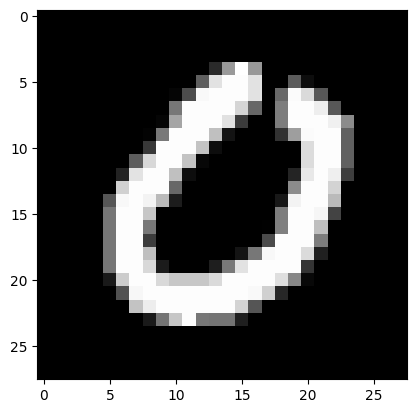

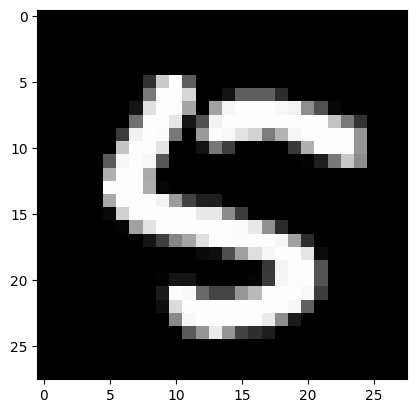

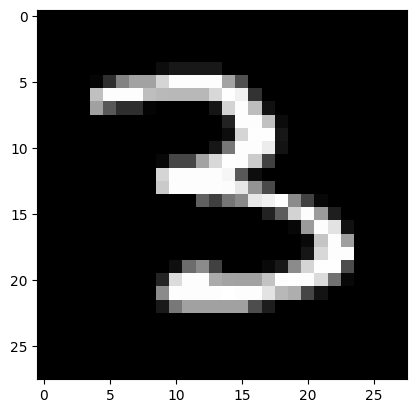

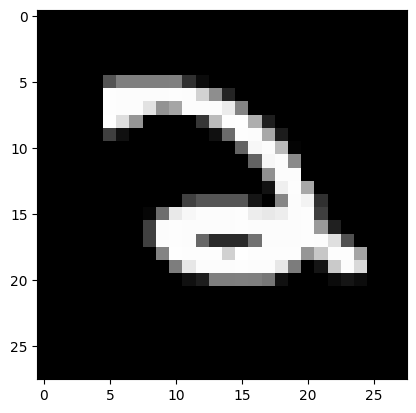

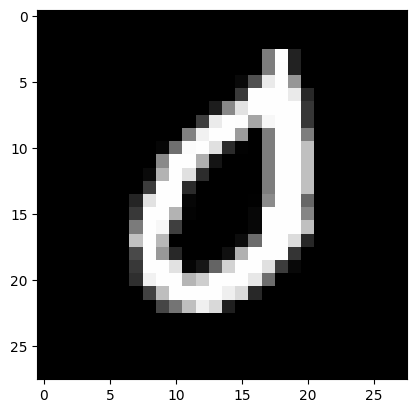

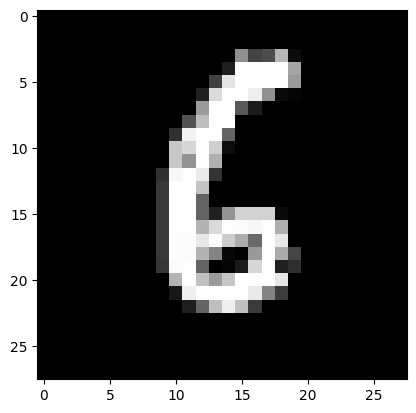

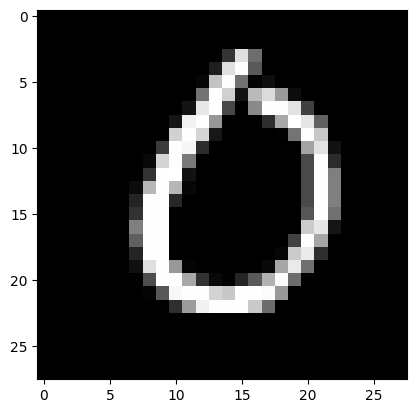

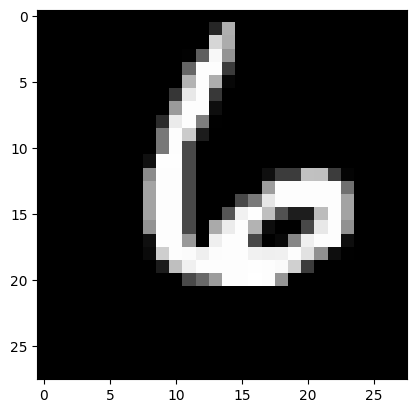

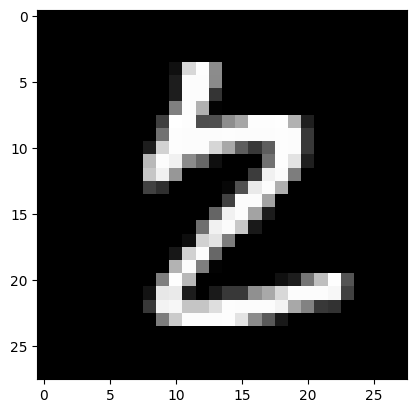

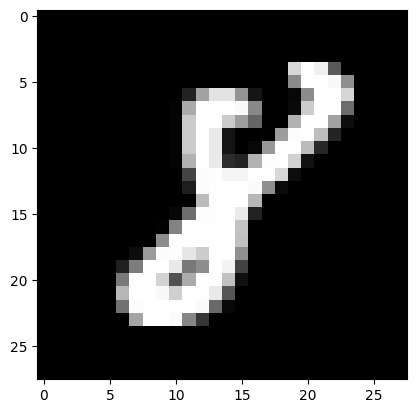

In [ ]:
# single images
d = iter(train_loader)
image, label = next(d)
print(image.shape)
for i in range(10):
  plt.imshow(image[i][0], cmap='gray')
  plt.show()

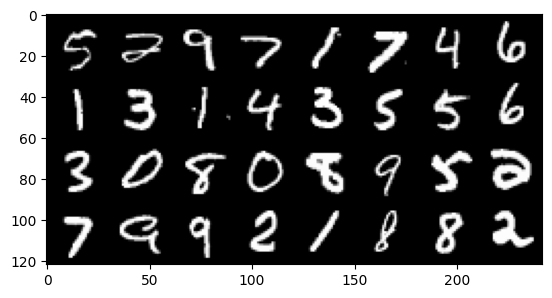

In [ ]:
# grid images
def imshow(img):
   npimg = img.numpy()
   plt.imshow(np.transpose(npimg, (1, 2, 0)))
   plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
labels
# show images
imshow(torchvision.utils.make_grid(images))


In [ ]:
class CNN(nn.Module):
  def __init__(self, in_channels, num_classes):
    super().__init__()
    # 1st conv layer
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size = 3, stride=1, padding= 1)
    self.conv2 = nn.Conv2d(8,16,3, padding= 1)
    self.conv3 = nn.Conv2d(16,32,3, padding= 1)
    self.pool = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
    self.relu = nn.PReLU()
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear( 32*7*7, num_classes)
  def forward(self,x):
    x = self.relu(self.conv1(x))
    x = self.pool(x)
    x = self.relu(self.conv2(x))
    x = self.pool(x)
    x = self.relu(self.conv3(x))
    x = self.flatten(x)
    x = self.fc1(x)
    return x


In [ ]:
device = t.device('cuda' if t.cuda.is_available() else 'cpu')
model = CNN(in_channels=1, num_classes=10).to(device)
print(model)
criterion = nn.CrossEntropyLoss()
optimizer = t.optim.Adam(model.parameters(), lr=0.01)

CNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (relu): PReLU(num_parameters=1)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1568, out_features=10, bias=True)
)


In [ ]:
# Variables to store the best model
minimum_loss = float('inf')
best_model = None

epochs = 10
for epoch in range(epochs):
  print(f"Epoch [{epoch + 1}/{epochs}]")
  # , desc= f"Epoch {epoch+1}/{epochs}"
  for images, labels in tqdm(train_loader ):
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch [{epoch+1}/{epochs}], Loss:{loss.item():.4f}") #loss.item()converts the loss tensor into a standard python number
    if(loss.item() < minimum_loss):
      minimum_loss = loss.item()
      best_model = model.state_dict()
      print("Model saved")
      print(model.state_dict())


Epoch [1/10]


  0%|          | 4/1875 [00:00<00:53, 35.13it/s]

Epoch [1/10], Loss:0.1076
Model saved
OrderedDict([('conv1.weight', tensor([[[[-0.0540, -0.2008,  0.1900],
          [-0.1445, -0.6394, -0.6554],
          [-0.2974, -0.2465, -0.1272]]],


        [[[-0.2609,  0.1935,  0.1983],
          [ 0.0148,  0.5832,  0.1948],
          [ 0.4728, -0.0724, -0.3748]]],


        [[[ 0.3206, -0.2080, -0.7025],
          [-0.1231, -0.9344, -0.0737],
          [-1.0365, -0.4851,  0.3879]]],


        [[[ 0.0516,  0.3409,  0.2771],
          [-0.3853, -0.0089, -0.0548],
          [-0.8606, -0.6233, -0.4701]]],


        [[[ 0.3142, -0.3476, -0.1481],
          [ 0.0687, -1.0439, -0.2392],
          [-0.0233, -0.1050, -0.1773]]],


        [[[-0.1090,  0.0055, -0.7614],
          [ 0.1545, -0.2143, -0.0835],
          [ 0.4366,  0.0573, -0.0171]]],


        [[[-0.1682, -0.2549,  0.0941],
          [-0.1573,  0.0654,  0.0484],
          [-0.3247, -0.4512, -0.0871]]],


        [[[-0.2449, -0.4353,  0.4493],
          [-0.1768, -0.4950, -0.3145],
       

  1%|          | 20/1875 [00:00<00:29, 63.89it/s]

Epoch [1/10], Loss:0.0028
Model saved
OrderedDict([('conv1.weight', tensor([[[[-0.0554, -0.2049,  0.1801],
          [-0.1446, -0.6473, -0.6620],
          [-0.3010, -0.2539, -0.1333]]],


        [[[-0.2826,  0.1736,  0.1737],
          [ 0.0076,  0.5712,  0.1698],
          [ 0.4702, -0.0724, -0.3707]]],


        [[[ 0.3029, -0.2105, -0.6770],
          [-0.1356, -0.9409, -0.0932],
          [-1.0184, -0.4817,  0.3797]]],


        [[[ 0.0418,  0.3208,  0.2547],
          [-0.3860, -0.0085, -0.0683],
          [-0.8625, -0.6246, -0.4932]]],


        [[[ 0.3078, -0.3598, -0.1554],
          [ 0.0638, -1.0537, -0.2415],
          [-0.0285, -0.1095, -0.1808]]],


        [[[-0.0983,  0.0187, -0.7559],
          [ 0.1587, -0.2084, -0.0930],
          [ 0.4376,  0.0315, -0.0372]]],


        [[[-0.1709, -0.2597,  0.0899],
          [-0.1613,  0.0568,  0.0429],
          [-0.3329, -0.4647, -0.0938]]],


        [[[-0.2401, -0.4667,  0.4287],
          [-0.1630, -0.4982, -0.3152],
       

  2%|▏         | 35/1875 [00:00<00:27, 67.80it/s]

Epoch [1/10], Loss:0.5355
Epoch [1/10], Loss:0.0050
Epoch [1/10], Loss:0.0310
Epoch [1/10], Loss:0.2390
Epoch [1/10], Loss:0.6507
Epoch [1/10], Loss:0.0000
Model saved
OrderedDict([('conv1.weight', tensor([[[[-0.0522, -0.2062,  0.1660],
          [-0.1383, -0.6406, -0.6628],
          [-0.2891, -0.2451, -0.1292]]],


        [[[-0.2682,  0.2142,  0.2085],
          [ 0.0379,  0.6036,  0.1977],
          [ 0.5039, -0.0490, -0.3513]]],


        [[[ 0.3073, -0.2152, -0.6232],
          [-0.1279, -0.9672, -0.1009],
          [-1.0321, -0.4624,  0.3941]]],


        [[[ 0.0262,  0.3218,  0.2783],
          [-0.3869,  0.0057, -0.0950],
          [-0.8773, -0.6327, -0.5207]]],


        [[[ 0.3120, -0.3645, -0.1605],
          [ 0.0710, -1.0492, -0.2391],
          [-0.0193, -0.1032, -0.1802]]],


        [[[-0.0526,  0.0363, -0.7551],
          [ 0.1952, -0.1902, -0.0667],
          [ 0.4994,  0.0551, -0.0019]]],


        [[[-0.1720, -0.2672,  0.0871],
          [-0.1651,  0.0447,  0.0424]

  3%|▎         | 49/1875 [00:00<00:26, 68.40it/s]

Epoch [1/10], Loss:0.0031
Epoch [1/10], Loss:0.0047
Epoch [1/10], Loss:0.0015
Epoch [1/10], Loss:0.0374
Epoch [1/10], Loss:0.0122
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0410
Epoch [1/10], Loss:0.0034
Epoch [1/10], Loss:0.0054
Epoch [1/10], Loss:0.0107
Epoch [1/10], Loss:0.0447
Epoch [1/10], Loss:0.0440
Epoch [1/10], Loss:0.2344
Epoch [1/10], Loss:0.0014
Epoch [1/10], Loss:0.0067


  3%|▎         | 64/1875 [00:00<00:25, 71.34it/s]

Epoch [1/10], Loss:0.1478
Epoch [1/10], Loss:0.1978
Epoch [1/10], Loss:0.0025
Epoch [1/10], Loss:0.0054
Epoch [1/10], Loss:0.0964
Epoch [1/10], Loss:0.0148
Epoch [1/10], Loss:0.0049
Epoch [1/10], Loss:0.0230
Epoch [1/10], Loss:0.0036
Epoch [1/10], Loss:0.0331
Epoch [1/10], Loss:0.0014
Epoch [1/10], Loss:0.0524
Epoch [1/10], Loss:0.0051
Epoch [1/10], Loss:0.0042
Epoch [1/10], Loss:0.3470
Epoch [1/10], Loss:0.4722


  4%|▍         | 80/1875 [00:01<00:25, 70.45it/s]

Epoch [1/10], Loss:0.0945
Epoch [1/10], Loss:0.0330
Epoch [1/10], Loss:0.2788
Epoch [1/10], Loss:0.0545
Epoch [1/10], Loss:0.0505
Epoch [1/10], Loss:0.0047
Epoch [1/10], Loss:0.0208
Epoch [1/10], Loss:0.0839
Epoch [1/10], Loss:0.0528
Epoch [1/10], Loss:0.0574
Epoch [1/10], Loss:0.2278
Epoch [1/10], Loss:0.3122
Epoch [1/10], Loss:0.3807
Epoch [1/10], Loss:0.0478


  5%|▌         | 96/1875 [00:01<00:24, 72.02it/s]

Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0802
Epoch [1/10], Loss:0.0005
Epoch [1/10], Loss:0.0152
Epoch [1/10], Loss:0.0109
Epoch [1/10], Loss:0.0015
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0062
Epoch [1/10], Loss:0.0021
Epoch [1/10], Loss:0.0605
Epoch [1/10], Loss:0.5061
Epoch [1/10], Loss:0.0134
Epoch [1/10], Loss:0.0223
Epoch [1/10], Loss:0.0021
Epoch [1/10], Loss:0.3605


  6%|▌         | 112/1875 [00:01<00:24, 72.03it/s]

Epoch [1/10], Loss:0.0000
Model saved
OrderedDict([('conv1.weight', tensor([[[[-0.0536, -0.2126,  0.1368],
          [-0.1329, -0.6474, -0.6695],
          [-0.2776, -0.2333, -0.1131]]],


        [[[-0.2851,  0.1731,  0.1445],
          [ 0.0327,  0.5903,  0.1718],
          [ 0.4443, -0.1142, -0.3659]]],


        [[[ 0.2898, -0.2161, -0.6775],
          [-0.0543, -0.9946, -0.1484],
          [-0.9862, -0.4519,  0.3578]]],


        [[[ 0.0094,  0.3557,  0.3052],
          [-0.3741,  0.0817, -0.0289],
          [-0.8689, -0.5750, -0.5385]]],


        [[[ 0.3170, -0.3721, -0.1759],
          [ 0.0720, -1.0495, -0.2434],
          [-0.0166, -0.0994, -0.1794]]],


        [[[-0.0538,  0.0055, -0.7317],
          [ 0.1826, -0.1696, -0.0374],
          [ 0.4926,  0.0954,  0.0713]]],


        [[[-0.1705, -0.2684,  0.0733],
          [-0.1628,  0.0460,  0.0263],
          [-0.3425, -0.4886, -0.1197]]],


        [[[-0.2882, -0.4670,  0.4766],
          [-0.1692, -0.5419, -0.2950],
       

  7%|▋         | 128/1875 [00:01<00:24, 71.49it/s]

Epoch [1/10], Loss:0.4089
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.1173
Epoch [1/10], Loss:0.0305
Epoch [1/10], Loss:0.0004
Epoch [1/10], Loss:0.0738
Epoch [1/10], Loss:0.0573
Epoch [1/10], Loss:0.0025
Epoch [1/10], Loss:0.0159
Epoch [1/10], Loss:0.1885
Epoch [1/10], Loss:0.0003
Epoch [1/10], Loss:0.0068
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0008
Epoch [1/10], Loss:0.1693


  8%|▊         | 144/1875 [00:02<00:24, 69.48it/s]

Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0067
Epoch [1/10], Loss:0.0264
Epoch [1/10], Loss:0.4808
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0061
Epoch [1/10], Loss:0.0030
Epoch [1/10], Loss:0.1185
Epoch [1/10], Loss:0.0000
Model saved
OrderedDict([('conv1.weight', tensor([[[[-0.0574, -0.2232,  0.1231],
          [-0.1374, -0.6585, -0.6653],
          [-0.2941, -0.2362, -0.1036]]],


        [[[-0.3342,  0.1747,  0.1337],
          [ 0.0315,  0.5972,  0.1652],
          [ 0.4499, -0.1035, -0.3508]]],


        [[[ 0.2909, -0.2303, -0.6540],
          [-0.0353, -0.9804, -0.1835],
          [-0.9707, -0.4034,  0.3678]]],


        [[[-0.0041,  0.3306,  0.2894],
          [-0.3988,  0.0823, -0.0069],
          [-0.8659, -0.5926, -0.5205]]],


        [[[ 0.2920, -0.4225, -0.2128],
          [ 0.0442, -1.1133, -0.2544],
          [-0.0449, -0.1144, -0.1827]]],


        [[[-0.0573,  0.0111, -0.6525],
          [ 0.2021, -0.1260, -0.0190],
          [ 0.4

  9%|▊         | 160/1875 [00:02<00:24, 71.30it/s]

Epoch [1/10], Loss:0.1085
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0136
Epoch [1/10], Loss:0.0054
Epoch [1/10], Loss:0.2219
Epoch [1/10], Loss:0.0059
Epoch [1/10], Loss:0.0238
Epoch [1/10], Loss:0.1735
Epoch [1/10], Loss:0.0567
Epoch [1/10], Loss:0.1414
Epoch [1/10], Loss:0.0461
Epoch [1/10], Loss:0.0665
Epoch [1/10], Loss:0.0071
Epoch [1/10], Loss:0.0626
Epoch [1/10], Loss:0.2355


  9%|▉         | 176/1875 [00:02<00:23, 72.44it/s]

Epoch [1/10], Loss:0.1583
Epoch [1/10], Loss:0.1686
Epoch [1/10], Loss:0.0549
Epoch [1/10], Loss:0.0477
Epoch [1/10], Loss:0.0044
Epoch [1/10], Loss:0.2516
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0070
Epoch [1/10], Loss:0.0064
Epoch [1/10], Loss:0.0368
Epoch [1/10], Loss:0.0728
Epoch [1/10], Loss:0.0025
Epoch [1/10], Loss:0.0379
Epoch [1/10], Loss:0.0005
Epoch [1/10], Loss:0.0011


 10%|█         | 192/1875 [00:02<00:22, 74.77it/s]

Epoch [1/10], Loss:0.0031
Epoch [1/10], Loss:0.0111
Epoch [1/10], Loss:0.1196
Epoch [1/10], Loss:0.0066
Epoch [1/10], Loss:0.0004
Epoch [1/10], Loss:0.1974
Epoch [1/10], Loss:0.0107
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0014
Epoch [1/10], Loss:0.1446
Epoch [1/10], Loss:0.0510
Epoch [1/10], Loss:0.0013
Epoch [1/10], Loss:0.0019
Epoch [1/10], Loss:0.1395
Epoch [1/10], Loss:0.2788
Epoch [1/10], Loss:0.0005


 11%|█         | 200/1875 [00:02<00:23, 72.10it/s]

Epoch [1/10], Loss:0.1605
Epoch [1/10], Loss:0.0312
Epoch [1/10], Loss:0.0075
Epoch [1/10], Loss:0.4158
Epoch [1/10], Loss:0.0007
Epoch [1/10], Loss:0.0561
Epoch [1/10], Loss:0.0198
Epoch [1/10], Loss:0.1279
Epoch [1/10], Loss:0.3649
Epoch [1/10], Loss:0.0142
Epoch [1/10], Loss:0.0233
Epoch [1/10], Loss:0.0246
Epoch [1/10], Loss:0.1175
Epoch [1/10], Loss:0.2488
Epoch [1/10], Loss:0.2251
Epoch [1/10], Loss:0.0000


 12%|█▏        | 217/1875 [00:03<00:22, 73.65it/s]

Epoch [1/10], Loss:0.0249
Epoch [1/10], Loss:0.0092
Epoch [1/10], Loss:0.0085
Epoch [1/10], Loss:0.0594
Epoch [1/10], Loss:0.2828
Epoch [1/10], Loss:0.1012
Epoch [1/10], Loss:0.0013
Epoch [1/10], Loss:0.0527
Epoch [1/10], Loss:0.0373
Epoch [1/10], Loss:0.1865
Epoch [1/10], Loss:0.0032
Epoch [1/10], Loss:0.0026
Epoch [1/10], Loss:0.1767
Epoch [1/10], Loss:0.0006
Epoch [1/10], Loss:0.0036
Epoch [1/10], Loss:0.0001


 12%|█▏        | 233/1875 [00:03<00:21, 75.90it/s]

Epoch [1/10], Loss:0.1134
Epoch [1/10], Loss:0.0348
Epoch [1/10], Loss:0.1081
Epoch [1/10], Loss:0.0503
Epoch [1/10], Loss:0.1389
Epoch [1/10], Loss:0.0069
Epoch [1/10], Loss:0.1059
Epoch [1/10], Loss:0.0643
Epoch [1/10], Loss:0.1133
Epoch [1/10], Loss:0.0020
Epoch [1/10], Loss:0.0014
Epoch [1/10], Loss:0.0505
Epoch [1/10], Loss:0.2693
Epoch [1/10], Loss:0.0073
Epoch [1/10], Loss:0.0009
Epoch [1/10], Loss:0.3190


 13%|█▎        | 250/1875 [00:03<00:21, 76.73it/s]

Epoch [1/10], Loss:0.2306
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.1497
Epoch [1/10], Loss:0.6541
Epoch [1/10], Loss:0.0181
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0190
Epoch [1/10], Loss:0.0025
Epoch [1/10], Loss:0.0173
Epoch [1/10], Loss:0.0535
Epoch [1/10], Loss:0.0073
Epoch [1/10], Loss:0.1239
Epoch [1/10], Loss:0.0828
Epoch [1/10], Loss:0.0019
Epoch [1/10], Loss:0.0024
Epoch [1/10], Loss:0.0281


 14%|█▍        | 266/1875 [00:03<00:20, 77.07it/s]

Epoch [1/10], Loss:0.2262
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0025
Epoch [1/10], Loss:1.1012
Epoch [1/10], Loss:0.0168
Epoch [1/10], Loss:0.1602
Epoch [1/10], Loss:0.0429
Epoch [1/10], Loss:0.0170
Epoch [1/10], Loss:0.0307
Epoch [1/10], Loss:0.4719
Epoch [1/10], Loss:0.1093
Epoch [1/10], Loss:0.0074
Epoch [1/10], Loss:0.1693
Epoch [1/10], Loss:0.1213
Epoch [1/10], Loss:0.0631
Epoch [1/10], Loss:0.0236


 15%|█▌        | 282/1875 [00:03<00:21, 73.59it/s]

Epoch [1/10], Loss:0.0051
Epoch [1/10], Loss:0.0130
Epoch [1/10], Loss:0.0053
Epoch [1/10], Loss:0.0025
Epoch [1/10], Loss:0.0435
Epoch [1/10], Loss:0.0017
Epoch [1/10], Loss:0.0038
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0100
Epoch [1/10], Loss:0.0027
Epoch [1/10], Loss:0.0040
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0249
Epoch [1/10], Loss:0.0126
Epoch [1/10], Loss:0.2238


 16%|█▌        | 298/1875 [00:04<00:21, 73.32it/s]

Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0047
Epoch [1/10], Loss:0.1244
Epoch [1/10], Loss:0.0103
Epoch [1/10], Loss:0.0086
Epoch [1/10], Loss:0.0162
Epoch [1/10], Loss:0.0421
Epoch [1/10], Loss:0.0028
Epoch [1/10], Loss:0.4460
Epoch [1/10], Loss:0.1868
Epoch [1/10], Loss:0.0456
Epoch [1/10], Loss:0.0003
Epoch [1/10], Loss:0.0021
Epoch [1/10], Loss:0.2524
Epoch [1/10], Loss:0.1573
Epoch [1/10], Loss:0.0162


 17%|█▋        | 314/1875 [00:04<00:21, 72.67it/s]

Epoch [1/10], Loss:0.0340
Epoch [1/10], Loss:0.0031
Epoch [1/10], Loss:0.0046
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0780
Epoch [1/10], Loss:0.1572
Epoch [1/10], Loss:0.1593
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.1004
Epoch [1/10], Loss:0.0150
Epoch [1/10], Loss:0.1621
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.5287
Epoch [1/10], Loss:0.1242
Epoch [1/10], Loss:0.0016


 18%|█▊        | 330/1875 [00:04<00:20, 73.87it/s]

Epoch [1/10], Loss:0.0140
Epoch [1/10], Loss:0.0079
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0117
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0531
Epoch [1/10], Loss:0.0463
Epoch [1/10], Loss:0.0009
Epoch [1/10], Loss:0.1537
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0948
Epoch [1/10], Loss:0.0355
Epoch [1/10], Loss:0.2734
Epoch [1/10], Loss:0.0011
Epoch [1/10], Loss:0.1241
Epoch [1/10], Loss:0.0553


 19%|█▊        | 347/1875 [00:04<00:20, 76.23it/s]

Epoch [1/10], Loss:0.0196
Epoch [1/10], Loss:0.0883
Epoch [1/10], Loss:0.0000
Model saved
OrderedDict([('conv1.weight', tensor([[[[-0.0391, -0.2167,  0.1643],
          [-0.1321, -0.6944, -0.6702],
          [-0.2457, -0.2487, -0.1497]]],


        [[[-0.2316,  0.2056,  0.1804],
          [ 0.0941,  0.6252,  0.2074],
          [ 0.5115, -0.0882, -0.3539]]],


        [[[ 0.2859, -0.2965, -0.7788],
          [-0.0523, -1.0127, -0.2645],
          [-1.1054, -0.3919,  0.3294]]],


        [[[ 0.0652,  0.3434,  0.3362],
          [-0.2905,  0.1530, -0.0240],
          [-0.8588, -0.5637, -0.4688]]],


        [[[ 0.3251, -0.3503, -0.1496],
          [ 0.0611, -1.0472, -0.2346],
          [-0.0225, -0.0967, -0.1899]]],


        [[[-0.1569, -0.1990, -0.6404],
          [ 0.1795, -0.3526, -0.0379],
          [ 0.4652,  0.0441,  0.0224]]],


        [[[-0.1564, -0.2582,  0.1486],
          [-0.1417,  0.0633,  0.0862],
          [-0.3207, -0.4707, -0.0698]]],


        [[[-0.3784, -0.5010,  0.4

 19%|█▉        | 363/1875 [00:05<00:20, 74.23it/s]

Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0242
Epoch [1/10], Loss:0.0302
Epoch [1/10], Loss:0.2628
Epoch [1/10], Loss:0.1665
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0008
Epoch [1/10], Loss:0.0008
Epoch [1/10], Loss:0.0004
Epoch [1/10], Loss:0.0835
Epoch [1/10], Loss:0.0218
Epoch [1/10], Loss:0.0021
Epoch [1/10], Loss:0.0230
Epoch [1/10], Loss:0.0907


 20%|██        | 379/1875 [00:05<00:20, 72.55it/s]

Epoch [1/10], Loss:0.4769
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0486
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.3246
Epoch [1/10], Loss:0.0022
Epoch [1/10], Loss:0.0110
Epoch [1/10], Loss:0.0113
Epoch [1/10], Loss:0.0009
Epoch [1/10], Loss:0.4170
Epoch [1/10], Loss:0.0301
Epoch [1/10], Loss:0.0029
Epoch [1/10], Loss:0.0012
Epoch [1/10], Loss:0.1114
Epoch [1/10], Loss:0.0359


 21%|██        | 395/1875 [00:05<00:20, 73.49it/s]

Epoch [1/10], Loss:0.3328
Epoch [1/10], Loss:0.0159
Epoch [1/10], Loss:0.0059
Epoch [1/10], Loss:0.0411
Epoch [1/10], Loss:0.2317
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0192
Epoch [1/10], Loss:0.0009
Epoch [1/10], Loss:0.0013
Epoch [1/10], Loss:0.1606
Epoch [1/10], Loss:0.0120
Epoch [1/10], Loss:0.3693
Epoch [1/10], Loss:0.0057
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0048
Epoch [1/10], Loss:0.0847


 21%|██▏       | 403/1875 [00:05<00:21, 69.68it/s]

Epoch [1/10], Loss:0.0245
Epoch [1/10], Loss:0.6332
Epoch [1/10], Loss:0.0025
Epoch [1/10], Loss:0.2514
Epoch [1/10], Loss:0.0006
Epoch [1/10], Loss:0.1191
Epoch [1/10], Loss:0.1363
Epoch [1/10], Loss:0.0840
Epoch [1/10], Loss:0.0289
Epoch [1/10], Loss:1.1255
Epoch [1/10], Loss:0.0000
Model saved
OrderedDict([('conv1.weight', tensor([[[[-0.0454, -0.2232,  0.1807],
          [-0.1486, -0.7314, -0.6693],
          [-0.2635, -0.2617, -0.1402]]],


        [[[-0.2844,  0.1205,  0.1244],
          [ 0.0337,  0.5507,  0.1144],
          [ 0.4206, -0.1102, -0.3592]]],


        [[[ 0.3182, -0.2558, -0.7970],
          [ 0.0507, -0.9945, -0.2453],
          [-1.0382, -0.3692,  0.3422]]],


        [[[ 0.1173,  0.4076,  0.3239],
          [-0.2788,  0.1881, -0.0309],
          [-0.6903, -0.5845, -0.4700]]],


        [[[ 0.3046, -0.4201, -0.2053],
          [ 0.0539, -1.0801, -0.2388],
          [-0.0273, -0.0955, -0.1787]]],


        [[[-0.1440, -0.1946, -0.6704],
          [ 0.2378, -0.3400,

 22%|██▏       | 419/1875 [00:05<00:20, 69.97it/s]

Epoch [1/10], Loss:0.0153
Epoch [1/10], Loss:0.6959
Epoch [1/10], Loss:0.0755
Epoch [1/10], Loss:0.2585
Epoch [1/10], Loss:0.1420
Epoch [1/10], Loss:0.2505
Epoch [1/10], Loss:0.0052
Epoch [1/10], Loss:0.0375
Epoch [1/10], Loss:0.0166
Epoch [1/10], Loss:0.1159
Epoch [1/10], Loss:0.3042
Epoch [1/10], Loss:0.1590
Epoch [1/10], Loss:0.0317
Epoch [1/10], Loss:0.0647
Epoch [1/10], Loss:0.5560


 23%|██▎       | 435/1875 [00:06<00:20, 69.49it/s]

Epoch [1/10], Loss:0.0005
Epoch [1/10], Loss:0.1097
Epoch [1/10], Loss:0.4215
Epoch [1/10], Loss:0.0031
Epoch [1/10], Loss:0.0318
Epoch [1/10], Loss:0.5412
Epoch [1/10], Loss:0.2774
Epoch [1/10], Loss:0.0595
Epoch [1/10], Loss:0.0030
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0006
Epoch [1/10], Loss:0.5763
Epoch [1/10], Loss:0.1639
Epoch [1/10], Loss:0.2156
Epoch [1/10], Loss:0.0088


 24%|██▍       | 450/1875 [00:06<00:20, 70.57it/s]

Epoch [1/10], Loss:0.0339
Epoch [1/10], Loss:0.0235
Epoch [1/10], Loss:0.0122
Epoch [1/10], Loss:0.1611
Epoch [1/10], Loss:0.0008
Epoch [1/10], Loss:0.1632
Epoch [1/10], Loss:0.1694
Epoch [1/10], Loss:0.3491
Epoch [1/10], Loss:0.2258
Epoch [1/10], Loss:0.0005
Epoch [1/10], Loss:0.3844
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0017
Epoch [1/10], Loss:0.1937
Epoch [1/10], Loss:0.1213


 25%|██▍       | 466/1875 [00:06<00:19, 72.99it/s]

Epoch [1/10], Loss:0.3389
Epoch [1/10], Loss:0.0333
Epoch [1/10], Loss:0.1078
Epoch [1/10], Loss:0.0036
Epoch [1/10], Loss:0.0455
Epoch [1/10], Loss:0.0009
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0138
Epoch [1/10], Loss:0.0147
Epoch [1/10], Loss:0.0151
Epoch [1/10], Loss:0.4981
Epoch [1/10], Loss:0.1814
Epoch [1/10], Loss:0.6834
Epoch [1/10], Loss:0.0006
Epoch [1/10], Loss:0.1775
Epoch [1/10], Loss:0.0432


 26%|██▌       | 482/1875 [00:06<00:19, 72.35it/s]

Epoch [1/10], Loss:0.5958
Epoch [1/10], Loss:0.0119
Epoch [1/10], Loss:0.3352
Epoch [1/10], Loss:0.0061
Epoch [1/10], Loss:0.0351
Epoch [1/10], Loss:0.2679
Epoch [1/10], Loss:0.0224
Epoch [1/10], Loss:0.1412
Epoch [1/10], Loss:0.1696
Epoch [1/10], Loss:0.0198
Epoch [1/10], Loss:0.0478
Epoch [1/10], Loss:0.1661
Epoch [1/10], Loss:0.0274
Epoch [1/10], Loss:0.1816
Epoch [1/10], Loss:0.2616


 27%|██▋       | 498/1875 [00:06<00:19, 72.25it/s]

Epoch [1/10], Loss:0.3278
Epoch [1/10], Loss:0.0031
Epoch [1/10], Loss:0.1858
Epoch [1/10], Loss:0.5253
Epoch [1/10], Loss:0.7143
Epoch [1/10], Loss:0.3743
Epoch [1/10], Loss:0.1617
Epoch [1/10], Loss:0.3260
Epoch [1/10], Loss:0.3863
Epoch [1/10], Loss:0.3468
Epoch [1/10], Loss:0.0352
Epoch [1/10], Loss:0.0458
Epoch [1/10], Loss:0.0371
Epoch [1/10], Loss:0.0730


 27%|██▋       | 514/1875 [00:07<00:19, 71.15it/s]

Epoch [1/10], Loss:0.0410
Epoch [1/10], Loss:0.0194
Epoch [1/10], Loss:0.1021
Epoch [1/10], Loss:0.0004
Epoch [1/10], Loss:0.5725
Epoch [1/10], Loss:0.1221
Epoch [1/10], Loss:0.0956
Epoch [1/10], Loss:0.0313
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0012
Epoch [1/10], Loss:0.0018
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0438
Epoch [1/10], Loss:0.0051
Epoch [1/10], Loss:0.1775


 28%|██▊       | 530/1875 [00:07<00:18, 72.24it/s]

Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0007
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0065
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0004
Epoch [1/10], Loss:0.0006
Epoch [1/10], Loss:0.1412
Epoch [1/10], Loss:0.0052
Epoch [1/10], Loss:0.0006
Epoch [1/10], Loss:0.0464
Epoch [1/10], Loss:0.1112
Epoch [1/10], Loss:0.0023
Epoch [1/10], Loss:0.0003


 29%|██▉       | 546/1875 [00:07<00:18, 73.36it/s]

Epoch [1/10], Loss:0.0287
Epoch [1/10], Loss:0.0014
Epoch [1/10], Loss:0.0224
Epoch [1/10], Loss:0.0011
Epoch [1/10], Loss:0.0145
Epoch [1/10], Loss:0.0054
Epoch [1/10], Loss:0.0437
Epoch [1/10], Loss:0.0016
Epoch [1/10], Loss:0.0472
Epoch [1/10], Loss:0.0013
Epoch [1/10], Loss:0.1534
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0054
Epoch [1/10], Loss:0.0991
Epoch [1/10], Loss:0.1843
Epoch [1/10], Loss:0.0032


 30%|██▉       | 562/1875 [00:07<00:17, 73.27it/s]

Epoch [1/10], Loss:0.1633
Epoch [1/10], Loss:0.0738
Epoch [1/10], Loss:0.0010
Epoch [1/10], Loss:0.0222
Epoch [1/10], Loss:0.0485
Epoch [1/10], Loss:0.1558
Epoch [1/10], Loss:0.0074
Epoch [1/10], Loss:0.3175
Epoch [1/10], Loss:0.6384
Epoch [1/10], Loss:0.0004
Epoch [1/10], Loss:0.0553
Epoch [1/10], Loss:0.1082
Epoch [1/10], Loss:0.0128
Epoch [1/10], Loss:0.0029
Epoch [1/10], Loss:0.0262


 30%|███       | 570/1875 [00:07<00:17, 73.16it/s]

Epoch [1/10], Loss:0.1222
Epoch [1/10], Loss:0.0242
Epoch [1/10], Loss:0.0046
Epoch [1/10], Loss:0.0624
Epoch [1/10], Loss:0.0182
Epoch [1/10], Loss:0.0943
Epoch [1/10], Loss:0.0011
Epoch [1/10], Loss:0.0489
Epoch [1/10], Loss:0.0458
Epoch [1/10], Loss:0.0730
Epoch [1/10], Loss:0.0366
Epoch [1/10], Loss:0.0431
Epoch [1/10], Loss:0.0072
Epoch [1/10], Loss:0.0234
Epoch [1/10], Loss:0.0791


 31%|███▏      | 586/1875 [00:08<00:18, 71.47it/s]

Epoch [1/10], Loss:0.1195
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.1436
Epoch [1/10], Loss:0.0342
Epoch [1/10], Loss:0.0013
Epoch [1/10], Loss:0.0010
Epoch [1/10], Loss:0.2388
Epoch [1/10], Loss:0.2436
Epoch [1/10], Loss:0.0098
Epoch [1/10], Loss:0.2155
Epoch [1/10], Loss:0.0650
Epoch [1/10], Loss:0.0478
Epoch [1/10], Loss:0.0025
Epoch [1/10], Loss:0.0003
Epoch [1/10], Loss:0.1968


 32%|███▏      | 602/1875 [00:08<00:17, 71.07it/s]

Epoch [1/10], Loss:0.0653
Epoch [1/10], Loss:0.0126
Epoch [1/10], Loss:0.0062
Epoch [1/10], Loss:0.0011
Epoch [1/10], Loss:0.1163
Epoch [1/10], Loss:0.0057
Epoch [1/10], Loss:0.0341
Epoch [1/10], Loss:0.2615
Epoch [1/10], Loss:0.0081
Epoch [1/10], Loss:0.0190
Epoch [1/10], Loss:0.0153
Epoch [1/10], Loss:0.0173
Epoch [1/10], Loss:0.0519
Epoch [1/10], Loss:0.0067
Epoch [1/10], Loss:0.0033


 33%|███▎      | 618/1875 [00:08<00:17, 72.15it/s]

Epoch [1/10], Loss:0.0187
Epoch [1/10], Loss:0.0825
Epoch [1/10], Loss:0.0187
Epoch [1/10], Loss:0.0153
Epoch [1/10], Loss:0.0053
Epoch [1/10], Loss:0.0108
Epoch [1/10], Loss:0.0007
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0034
Epoch [1/10], Loss:0.0029
Epoch [1/10], Loss:0.0138
Epoch [1/10], Loss:0.0327
Epoch [1/10], Loss:0.0421
Epoch [1/10], Loss:0.0109
Epoch [1/10], Loss:0.0631


 34%|███▍      | 633/1875 [00:08<00:18, 65.58it/s]

Epoch [1/10], Loss:0.0912
Epoch [1/10], Loss:0.0062
Epoch [1/10], Loss:0.1494
Epoch [1/10], Loss:0.2710
Epoch [1/10], Loss:0.0009
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0004
Epoch [1/10], Loss:0.0467
Epoch [1/10], Loss:0.0059
Epoch [1/10], Loss:0.0108
Epoch [1/10], Loss:0.1029
Epoch [1/10], Loss:0.0001


 34%|███▍      | 640/1875 [00:09<00:20, 60.90it/s]

Epoch [1/10], Loss:0.1554
Epoch [1/10], Loss:0.0004
Epoch [1/10], Loss:0.2410
Epoch [1/10], Loss:0.0003
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0014
Epoch [1/10], Loss:0.1284
Epoch [1/10], Loss:0.1548
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0004


 35%|███▍      | 653/1875 [00:09<00:21, 55.95it/s]

Epoch [1/10], Loss:0.0440
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0310
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0741
Epoch [1/10], Loss:0.3557
Epoch [1/10], Loss:0.1791
Epoch [1/10], Loss:0.0862
Epoch [1/10], Loss:0.0279
Epoch [1/10], Loss:0.0007


 35%|███▌      | 665/1875 [00:09<00:21, 56.16it/s]

Epoch [1/10], Loss:0.2342
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0033
Epoch [1/10], Loss:0.0019
Epoch [1/10], Loss:0.0175
Epoch [1/10], Loss:0.0542
Epoch [1/10], Loss:0.0004
Epoch [1/10], Loss:0.1589
Epoch [1/10], Loss:0.3467
Epoch [1/10], Loss:0.0016
Epoch [1/10], Loss:0.1946
Epoch [1/10], Loss:0.0012


 36%|███▌      | 677/1875 [00:09<00:21, 56.97it/s]

Epoch [1/10], Loss:0.0166
Epoch [1/10], Loss:0.0192
Epoch [1/10], Loss:0.0135
Epoch [1/10], Loss:0.0497
Epoch [1/10], Loss:0.1073
Epoch [1/10], Loss:0.0818
Epoch [1/10], Loss:0.2010
Epoch [1/10], Loss:0.1163
Epoch [1/10], Loss:0.1094
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0006
Epoch [1/10], Loss:0.0001


 37%|███▋      | 689/1875 [00:09<00:21, 54.93it/s]

Epoch [1/10], Loss:0.1139
Epoch [1/10], Loss:0.0406
Epoch [1/10], Loss:0.3112
Epoch [1/10], Loss:0.0008
Epoch [1/10], Loss:0.0284
Epoch [1/10], Loss:0.0010
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0413
Epoch [1/10], Loss:0.0667
Epoch [1/10], Loss:0.0992
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.1616


 37%|███▋      | 701/1875 [00:10<00:21, 54.27it/s]

Epoch [1/10], Loss:0.0104
Epoch [1/10], Loss:0.0113
Epoch [1/10], Loss:0.0008
Epoch [1/10], Loss:0.0166
Epoch [1/10], Loss:0.0102
Epoch [1/10], Loss:0.1933
Epoch [1/10], Loss:0.0690
Epoch [1/10], Loss:0.0004
Epoch [1/10], Loss:0.0217
Epoch [1/10], Loss:0.0799
Epoch [1/10], Loss:0.0071


 38%|███▊      | 713/1875 [00:10<00:22, 52.63it/s]

Epoch [1/10], Loss:0.0216
Epoch [1/10], Loss:0.0004
Epoch [1/10], Loss:0.0244
Epoch [1/10], Loss:0.0020
Epoch [1/10], Loss:0.0397
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0524
Epoch [1/10], Loss:0.0025
Epoch [1/10], Loss:0.0006
Epoch [1/10], Loss:0.0019
Epoch [1/10], Loss:0.1501


 38%|███▊      | 719/1875 [00:10<00:22, 52.29it/s]

Epoch [1/10], Loss:0.0474
Epoch [1/10], Loss:0.0218
Epoch [1/10], Loss:0.3048
Epoch [1/10], Loss:0.0765
Epoch [1/10], Loss:0.0007
Epoch [1/10], Loss:0.6544
Epoch [1/10], Loss:0.2245
Epoch [1/10], Loss:0.5350
Epoch [1/10], Loss:0.0966
Epoch [1/10], Loss:0.0716
Epoch [1/10], Loss:0.4000


 39%|███▉      | 731/1875 [00:10<00:21, 52.20it/s]

Epoch [1/10], Loss:0.5801
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0529
Epoch [1/10], Loss:0.0618
Epoch [1/10], Loss:0.0557
Epoch [1/10], Loss:0.0134
Epoch [1/10], Loss:0.0056
Epoch [1/10], Loss:0.0011
Epoch [1/10], Loss:0.0049
Epoch [1/10], Loss:0.0523
Epoch [1/10], Loss:0.9706


 40%|███▉      | 743/1875 [00:10<00:21, 51.70it/s]

Epoch [1/10], Loss:0.2031
Epoch [1/10], Loss:0.0533
Epoch [1/10], Loss:0.0181
Epoch [1/10], Loss:0.0425
Epoch [1/10], Loss:0.1083
Epoch [1/10], Loss:0.0058
Epoch [1/10], Loss:0.0479
Epoch [1/10], Loss:0.0324
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0000


 40%|████      | 757/1875 [00:11<00:19, 57.26it/s]

Epoch [1/10], Loss:0.2003
Epoch [1/10], Loss:0.0199
Epoch [1/10], Loss:0.0034
Epoch [1/10], Loss:0.6895
Epoch [1/10], Loss:0.0835
Epoch [1/10], Loss:0.0758
Epoch [1/10], Loss:0.2288
Epoch [1/10], Loss:0.0132
Epoch [1/10], Loss:0.0153
Epoch [1/10], Loss:0.0979
Epoch [1/10], Loss:0.1055
Epoch [1/10], Loss:0.3882
Epoch [1/10], Loss:0.1570


 41%|████      | 772/1875 [00:11<00:16, 65.20it/s]

Epoch [1/10], Loss:0.3692
Epoch [1/10], Loss:0.2270
Epoch [1/10], Loss:0.0791
Epoch [1/10], Loss:0.1165
Epoch [1/10], Loss:0.0358
Epoch [1/10], Loss:0.0115
Epoch [1/10], Loss:0.0606
Epoch [1/10], Loss:0.1092
Epoch [1/10], Loss:0.3232
Epoch [1/10], Loss:0.2243
Epoch [1/10], Loss:0.0468
Epoch [1/10], Loss:0.0162
Epoch [1/10], Loss:0.3306
Epoch [1/10], Loss:0.2432
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.1382


 42%|████▏     | 787/1875 [00:11<00:16, 67.63it/s]

Epoch [1/10], Loss:0.3182
Epoch [1/10], Loss:0.0879
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0000
Model saved
OrderedDict([('conv1.weight', tensor([[[[ 2.0315e-02, -1.4080e-01,  2.5179e-01],
          [-8.0277e-02, -6.4523e-01, -6.4496e-01],
          [-1.4897e-01, -1.6934e-01, -3.4522e-02]]],


        [[[-2.2942e-01,  1.7152e-01,  2.0046e-01],
          [ 8.2690e-02,  6.1532e-01,  1.0186e-01],
          [ 4.7717e-01, -3.3564e-02, -2.0207e-01]]],


        [[[ 3.9607e-01, -2.9593e-01, -8.3242e-01],
          [-1.9802e-02, -1.2705e+00, -1.6404e-01],
          [-1.2134e+00, -4.2505e-01,  4.1540e-01]]],


        [[[ 7.7970e-02,  3.6147e-01,  3.9496e-01],
          [-3.9003e-01,  1.4588e-02, -6.6563e-02],
          [-8.1733e-01, -6.7322e-01, -5.2184e-01]]],


        [[[ 2.7089e-01, -3.1740e-01, -7.2279e-02],
          [-5.1118e-02, -1.0423e+00, -1.9145e-01],
          [-8.1653e-02, -5.1349e-02, -1.0727e-01]]],


        [[[-6.9035e-02, -3.0835e-01, -6.646

 43%|████▎     | 803/1875 [00:11<00:15, 71.12it/s]

Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.6853
Epoch [1/10], Loss:0.0940
Epoch [1/10], Loss:0.0024
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0059
Epoch [1/10], Loss:0.2727
Epoch [1/10], Loss:0.0060
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.1547
Epoch [1/10], Loss:0.0204
Epoch [1/10], Loss:0.0003
Epoch [1/10], Loss:0.0435
Epoch [1/10], Loss:0.0005
Epoch [1/10], Loss:0.1428


 44%|████▎     | 819/1875 [00:12<00:14, 72.38it/s]

Epoch [1/10], Loss:0.0030
Epoch [1/10], Loss:0.2806
Epoch [1/10], Loss:0.0461
Epoch [1/10], Loss:0.0017
Epoch [1/10], Loss:0.0004
Epoch [1/10], Loss:0.1725
Epoch [1/10], Loss:0.0089
Epoch [1/10], Loss:0.0033
Epoch [1/10], Loss:0.0009
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0328
Epoch [1/10], Loss:0.0882
Epoch [1/10], Loss:0.0657
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.5329


 45%|████▍     | 835/1875 [00:12<00:14, 71.13it/s]

Epoch [1/10], Loss:0.2571
Epoch [1/10], Loss:0.1355
Epoch [1/10], Loss:0.0011
Epoch [1/10], Loss:0.1013
Epoch [1/10], Loss:0.0877
Epoch [1/10], Loss:0.0040
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.1524
Epoch [1/10], Loss:0.1992
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0004
Epoch [1/10], Loss:0.0553
Epoch [1/10], Loss:0.2684
Epoch [1/10], Loss:0.0000


 45%|████▌     | 844/1875 [00:12<00:14, 73.08it/s]

Epoch [1/10], Loss:0.0944
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.4610
Epoch [1/10], Loss:0.1534
Epoch [1/10], Loss:0.0004
Epoch [1/10], Loss:0.7946
Epoch [1/10], Loss:0.8543
Epoch [1/10], Loss:0.0004
Epoch [1/10], Loss:0.0956
Epoch [1/10], Loss:0.0212
Epoch [1/10], Loss:0.0114
Epoch [1/10], Loss:0.0236
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.1571
Epoch [1/10], Loss:0.0528
Epoch [1/10], Loss:0.3747


 46%|████▌     | 861/1875 [00:12<00:13, 76.25it/s]

Epoch [1/10], Loss:0.1134
Epoch [1/10], Loss:0.0742
Epoch [1/10], Loss:0.3490
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0005
Epoch [1/10], Loss:0.0771
Epoch [1/10], Loss:0.1595
Epoch [1/10], Loss:0.3357
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.3373
Epoch [1/10], Loss:0.0635
Epoch [1/10], Loss:0.0658
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0776
Epoch [1/10], Loss:0.0038
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0996


 47%|████▋     | 878/1875 [00:12<00:12, 78.19it/s]

Epoch [1/10], Loss:0.0040
Epoch [1/10], Loss:0.3453
Epoch [1/10], Loss:0.1163
Epoch [1/10], Loss:0.1529
Epoch [1/10], Loss:0.2588
Epoch [1/10], Loss:0.0004
Epoch [1/10], Loss:0.1155
Epoch [1/10], Loss:0.0241
Epoch [1/10], Loss:0.0045
Epoch [1/10], Loss:0.0406
Epoch [1/10], Loss:0.0023
Epoch [1/10], Loss:0.0005
Epoch [1/10], Loss:0.0207
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.1506
Epoch [1/10], Loss:0.0815


 48%|████▊     | 894/1875 [00:13<00:13, 74.89it/s]

Epoch [1/10], Loss:0.0766
Epoch [1/10], Loss:0.0190
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.3190
Epoch [1/10], Loss:0.0419
Epoch [1/10], Loss:0.0259
Epoch [1/10], Loss:0.1699
Epoch [1/10], Loss:0.0006
Epoch [1/10], Loss:0.0931
Epoch [1/10], Loss:0.0461
Epoch [1/10], Loss:0.0072
Epoch [1/10], Loss:0.0603
Epoch [1/10], Loss:0.0929
Epoch [1/10], Loss:0.0238
Epoch [1/10], Loss:0.0202


 49%|████▊     | 910/1875 [00:13<00:12, 74.78it/s]

Epoch [1/10], Loss:0.0814
Epoch [1/10], Loss:0.1762
Epoch [1/10], Loss:0.2350
Epoch [1/10], Loss:0.1037
Epoch [1/10], Loss:0.2693
Epoch [1/10], Loss:0.1602
Epoch [1/10], Loss:0.0138
Epoch [1/10], Loss:0.0650
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.3414
Epoch [1/10], Loss:0.0336
Epoch [1/10], Loss:0.0944
Epoch [1/10], Loss:0.0665
Epoch [1/10], Loss:0.0031


 49%|████▉     | 926/1875 [00:13<00:13, 71.12it/s]

Epoch [1/10], Loss:2.2761
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0003
Epoch [1/10], Loss:0.0006
Epoch [1/10], Loss:0.5080
Epoch [1/10], Loss:0.5086
Epoch [1/10], Loss:0.2765
Epoch [1/10], Loss:0.0442
Epoch [1/10], Loss:0.0155
Epoch [1/10], Loss:0.2044
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0010
Epoch [1/10], Loss:0.0124
Epoch [1/10], Loss:0.3766
Epoch [1/10], Loss:0.0082
Epoch [1/10], Loss:0.1102


 50%|█████     | 942/1875 [00:13<00:12, 73.44it/s]

Epoch [1/10], Loss:0.4794
Epoch [1/10], Loss:0.0038
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.1272
Epoch [1/10], Loss:0.0013
Epoch [1/10], Loss:0.0310
Epoch [1/10], Loss:0.0425
Epoch [1/10], Loss:0.1562
Epoch [1/10], Loss:0.1992
Epoch [1/10], Loss:0.0093
Epoch [1/10], Loss:0.0003
Epoch [1/10], Loss:0.0077
Epoch [1/10], Loss:0.0025
Epoch [1/10], Loss:0.0360
Epoch [1/10], Loss:0.0269


 51%|█████     | 958/1875 [00:13<00:12, 74.35it/s]

Epoch [1/10], Loss:0.0621
Epoch [1/10], Loss:0.6990
Epoch [1/10], Loss:0.0369
Epoch [1/10], Loss:0.0004
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0037
Epoch [1/10], Loss:0.1244
Epoch [1/10], Loss:0.0206
Epoch [1/10], Loss:0.0720
Epoch [1/10], Loss:0.0230
Epoch [1/10], Loss:0.0984
Epoch [1/10], Loss:0.0014
Epoch [1/10], Loss:0.0131
Epoch [1/10], Loss:0.5770
Epoch [1/10], Loss:0.0017


 52%|█████▏    | 974/1875 [00:14<00:12, 73.73it/s]

Epoch [1/10], Loss:0.0605
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.6441
Epoch [1/10], Loss:0.5574
Epoch [1/10], Loss:0.2556
Epoch [1/10], Loss:0.0019
Epoch [1/10], Loss:0.0008
Epoch [1/10], Loss:0.4756
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0014
Epoch [1/10], Loss:0.1025
Epoch [1/10], Loss:0.0141
Epoch [1/10], Loss:0.0905
Epoch [1/10], Loss:0.0041
Epoch [1/10], Loss:0.0829


 53%|█████▎    | 990/1875 [00:14<00:11, 73.87it/s]

Epoch [1/10], Loss:0.4184
Epoch [1/10], Loss:0.0803
Epoch [1/10], Loss:0.0200
Epoch [1/10], Loss:0.0895
Epoch [1/10], Loss:0.0691
Epoch [1/10], Loss:0.0193
Epoch [1/10], Loss:0.0033
Epoch [1/10], Loss:0.0491
Epoch [1/10], Loss:0.3040
Epoch [1/10], Loss:0.0058
Epoch [1/10], Loss:0.2822
Epoch [1/10], Loss:0.1778
Epoch [1/10], Loss:0.0982
Epoch [1/10], Loss:0.0951
Epoch [1/10], Loss:0.0633
Epoch [1/10], Loss:0.0811


 54%|█████▎    | 1006/1875 [00:14<00:11, 74.96it/s]

Epoch [1/10], Loss:0.4502
Epoch [1/10], Loss:0.0119
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.1244
Epoch [1/10], Loss:0.3878
Epoch [1/10], Loss:0.0173
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.1040
Epoch [1/10], Loss:0.0185
Epoch [1/10], Loss:0.0005
Epoch [1/10], Loss:0.0610
Epoch [1/10], Loss:0.1562
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0001


 55%|█████▍    | 1022/1875 [00:14<00:11, 74.66it/s]

Epoch [1/10], Loss:0.0365
Epoch [1/10], Loss:0.0264
Epoch [1/10], Loss:0.0811
Epoch [1/10], Loss:0.0888
Epoch [1/10], Loss:0.4576
Epoch [1/10], Loss:0.1595
Epoch [1/10], Loss:0.0610
Epoch [1/10], Loss:0.0013
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0592
Epoch [1/10], Loss:0.0058
Epoch [1/10], Loss:0.0050
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0007
Epoch [1/10], Loss:0.4501
Epoch [1/10], Loss:0.4176


 55%|█████▌    | 1039/1875 [00:14<00:10, 78.48it/s]

Epoch [1/10], Loss:0.0545
Epoch [1/10], Loss:0.0153
Epoch [1/10], Loss:0.1247
Epoch [1/10], Loss:0.0441
Epoch [1/10], Loss:0.5188
Epoch [1/10], Loss:0.0111
Epoch [1/10], Loss:0.0198
Epoch [1/10], Loss:0.0006
Epoch [1/10], Loss:0.0650
Epoch [1/10], Loss:0.0028
Epoch [1/10], Loss:0.5291
Epoch [1/10], Loss:0.3344
Epoch [1/10], Loss:0.1456
Epoch [1/10], Loss:0.4898
Epoch [1/10], Loss:0.0442
Epoch [1/10], Loss:1.7629
Epoch [1/10], Loss:0.0700


 56%|█████▋    | 1055/1875 [00:15<00:10, 74.88it/s]

Epoch [1/10], Loss:0.1197
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0006
Epoch [1/10], Loss:0.0055
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0300
Epoch [1/10], Loss:0.0071
Epoch [1/10], Loss:0.0805
Epoch [1/10], Loss:0.0019
Epoch [1/10], Loss:0.0759
Epoch [1/10], Loss:0.2609
Epoch [1/10], Loss:0.1199
Epoch [1/10], Loss:0.0706
Epoch [1/10], Loss:0.0281
Epoch [1/10], Loss:0.0061


 57%|█████▋    | 1063/1875 [00:15<00:10, 74.19it/s]

Epoch [1/10], Loss:0.0027
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.3428
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0028
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0067
Epoch [1/10], Loss:0.0124
Epoch [1/10], Loss:0.0447
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.1112
Epoch [1/10], Loss:0.0046
Epoch [1/10], Loss:0.0022


 58%|█████▊    | 1079/1875 [00:15<00:11, 72.10it/s]

Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.8611
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.5587
Epoch [1/10], Loss:0.0012
Epoch [1/10], Loss:0.0079
Epoch [1/10], Loss:0.0202
Epoch [1/10], Loss:0.2926
Epoch [1/10], Loss:0.1410
Epoch [1/10], Loss:0.1548
Epoch [1/10], Loss:0.0010
Epoch [1/10], Loss:0.3095
Epoch [1/10], Loss:0.0015
Epoch [1/10], Loss:0.0044


 58%|█████▊    | 1095/1875 [00:15<00:10, 74.34it/s]

Epoch [1/10], Loss:0.0902
Epoch [1/10], Loss:0.2558
Epoch [1/10], Loss:0.0255
Epoch [1/10], Loss:0.0726
Epoch [1/10], Loss:0.0241
Epoch [1/10], Loss:0.0006
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0004
Epoch [1/10], Loss:0.1549
Epoch [1/10], Loss:0.0985
Epoch [1/10], Loss:0.5846
Epoch [1/10], Loss:0.4454
Epoch [1/10], Loss:0.0445
Epoch [1/10], Loss:0.0013
Epoch [1/10], Loss:0.0130
Epoch [1/10], Loss:0.0327


 59%|█████▉    | 1111/1875 [00:15<00:10, 75.81it/s]

Epoch [1/10], Loss:0.0064
Epoch [1/10], Loss:0.1618
Epoch [1/10], Loss:0.0065
Epoch [1/10], Loss:0.0024
Epoch [1/10], Loss:0.1356
Epoch [1/10], Loss:0.1637
Epoch [1/10], Loss:0.1268
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0022
Epoch [1/10], Loss:0.5837
Epoch [1/10], Loss:0.4708
Epoch [1/10], Loss:0.1245
Epoch [1/10], Loss:0.3176
Epoch [1/10], Loss:0.0017
Epoch [1/10], Loss:0.2807
Epoch [1/10], Loss:0.0002


 60%|██████    | 1128/1875 [00:16<00:09, 76.31it/s]

Epoch [1/10], Loss:0.1085
Epoch [1/10], Loss:0.2791
Epoch [1/10], Loss:0.1274
Epoch [1/10], Loss:0.0011
Epoch [1/10], Loss:1.5908
Epoch [1/10], Loss:0.5277
Epoch [1/10], Loss:0.1806
Epoch [1/10], Loss:0.1561
Epoch [1/10], Loss:0.3724
Epoch [1/10], Loss:0.0331
Epoch [1/10], Loss:0.2298
Epoch [1/10], Loss:0.1086
Epoch [1/10], Loss:0.0345
Epoch [1/10], Loss:0.6097
Epoch [1/10], Loss:0.0027
Epoch [1/10], Loss:0.2318


 61%|██████    | 1144/1875 [00:16<00:10, 71.76it/s]

Epoch [1/10], Loss:0.4317
Epoch [1/10], Loss:0.2719
Epoch [1/10], Loss:0.2090
Epoch [1/10], Loss:0.0798
Epoch [1/10], Loss:0.4890
Epoch [1/10], Loss:0.0047
Epoch [1/10], Loss:0.0567
Epoch [1/10], Loss:0.0006
Epoch [1/10], Loss:0.0095
Epoch [1/10], Loss:0.0003
Epoch [1/10], Loss:0.0401
Epoch [1/10], Loss:0.5040
Epoch [1/10], Loss:0.0159
Epoch [1/10], Loss:0.0075


 62%|██████▏   | 1160/1875 [00:16<00:09, 73.29it/s]

Epoch [1/10], Loss:0.0584
Epoch [1/10], Loss:0.0068
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0051
Epoch [1/10], Loss:0.0044
Epoch [1/10], Loss:0.3324
Epoch [1/10], Loss:0.2100
Epoch [1/10], Loss:0.0562
Epoch [1/10], Loss:0.1859
Epoch [1/10], Loss:0.0139
Epoch [1/10], Loss:0.1533
Epoch [1/10], Loss:0.3611
Epoch [1/10], Loss:0.0521
Epoch [1/10], Loss:0.0008
Epoch [1/10], Loss:0.0234
Epoch [1/10], Loss:0.4068


 63%|██████▎   | 1176/1875 [00:16<00:09, 72.29it/s]

Epoch [1/10], Loss:0.1485
Epoch [1/10], Loss:0.0391
Epoch [1/10], Loss:0.0145
Epoch [1/10], Loss:0.0055
Epoch [1/10], Loss:0.0257
Epoch [1/10], Loss:0.0971
Epoch [1/10], Loss:0.0101
Epoch [1/10], Loss:0.0229
Epoch [1/10], Loss:0.0044
Epoch [1/10], Loss:0.0202
Epoch [1/10], Loss:0.0234
Epoch [1/10], Loss:0.3106
Epoch [1/10], Loss:0.0005
Epoch [1/10], Loss:0.1358
Epoch [1/10], Loss:0.0044


 64%|██████▎   | 1192/1875 [00:17<00:09, 71.77it/s]

Epoch [1/10], Loss:0.0189
Epoch [1/10], Loss:0.0032
Epoch [1/10], Loss:0.2066
Epoch [1/10], Loss:0.2033
Epoch [1/10], Loss:0.2017
Epoch [1/10], Loss:0.0067
Epoch [1/10], Loss:0.0008
Epoch [1/10], Loss:0.1965
Epoch [1/10], Loss:0.2869
Epoch [1/10], Loss:0.1863
Epoch [1/10], Loss:0.3929
Epoch [1/10], Loss:0.0979
Epoch [1/10], Loss:0.0067
Epoch [1/10], Loss:0.0161
Epoch [1/10], Loss:0.1453


 64%|██████▍   | 1208/1875 [00:17<00:09, 72.59it/s]

Epoch [1/10], Loss:0.1680
Epoch [1/10], Loss:0.4659
Epoch [1/10], Loss:0.1031
Epoch [1/10], Loss:0.1015
Epoch [1/10], Loss:0.0798
Epoch [1/10], Loss:0.0579
Epoch [1/10], Loss:0.2160
Epoch [1/10], Loss:0.2030
Epoch [1/10], Loss:0.0110
Epoch [1/10], Loss:0.0509
Epoch [1/10], Loss:0.2283
Epoch [1/10], Loss:0.0233
Epoch [1/10], Loss:0.2946
Epoch [1/10], Loss:0.0034
Epoch [1/10], Loss:0.0096


 65%|██████▍   | 1216/1875 [00:17<00:09, 69.64it/s]

Epoch [1/10], Loss:0.1002
Epoch [1/10], Loss:0.5972
Epoch [1/10], Loss:0.0439
Epoch [1/10], Loss:0.0062
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0426
Epoch [1/10], Loss:0.0067
Epoch [1/10], Loss:0.0043
Epoch [1/10], Loss:0.0255
Epoch [1/10], Loss:0.0380
Epoch [1/10], Loss:0.0020
Epoch [1/10], Loss:0.0131
Epoch [1/10], Loss:0.0093
Epoch [1/10], Loss:0.0021


 66%|██████▌   | 1232/1875 [00:17<00:08, 72.62it/s]

Epoch [1/10], Loss:0.1650
Epoch [1/10], Loss:0.0027
Epoch [1/10], Loss:0.0078
Epoch [1/10], Loss:0.0180
Epoch [1/10], Loss:0.0026
Epoch [1/10], Loss:0.0593
Epoch [1/10], Loss:0.0276
Epoch [1/10], Loss:0.0276
Epoch [1/10], Loss:0.0014
Epoch [1/10], Loss:0.0230
Epoch [1/10], Loss:0.0165
Epoch [1/10], Loss:0.1826
Epoch [1/10], Loss:0.1527
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0879
Epoch [1/10], Loss:0.0006


 67%|██████▋   | 1248/1875 [00:17<00:08, 74.07it/s]

Epoch [1/10], Loss:0.0416
Epoch [1/10], Loss:0.0297
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.2246
Epoch [1/10], Loss:0.0191
Epoch [1/10], Loss:0.0008
Epoch [1/10], Loss:0.2219
Epoch [1/10], Loss:0.0852
Epoch [1/10], Loss:0.3615
Epoch [1/10], Loss:0.0080
Epoch [1/10], Loss:0.1518
Epoch [1/10], Loss:0.0015
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.4874
Epoch [1/10], Loss:0.0006
Epoch [1/10], Loss:0.0010


 67%|██████▋   | 1264/1875 [00:18<00:08, 72.90it/s]

Epoch [1/10], Loss:0.0372
Epoch [1/10], Loss:0.0308
Epoch [1/10], Loss:0.0120
Epoch [1/10], Loss:0.0060
Epoch [1/10], Loss:0.1024
Epoch [1/10], Loss:0.0584
Epoch [1/10], Loss:0.1128
Epoch [1/10], Loss:0.1294
Epoch [1/10], Loss:0.0080
Epoch [1/10], Loss:0.0399
Epoch [1/10], Loss:0.0043
Epoch [1/10], Loss:0.0102
Epoch [1/10], Loss:0.1003
Epoch [1/10], Loss:0.0264
Epoch [1/10], Loss:0.0098
Epoch [1/10], Loss:0.0465


 68%|██████▊   | 1280/1875 [00:18<00:08, 72.68it/s]

Epoch [1/10], Loss:0.0543
Epoch [1/10], Loss:0.1132
Epoch [1/10], Loss:0.0114
Epoch [1/10], Loss:0.0058
Epoch [1/10], Loss:0.1240
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0020
Epoch [1/10], Loss:0.0532
Epoch [1/10], Loss:0.1219
Epoch [1/10], Loss:0.1336
Epoch [1/10], Loss:0.3251
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.1392


 69%|██████▉   | 1296/1875 [00:18<00:08, 70.21it/s]

Epoch [1/10], Loss:0.0190
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0733
Epoch [1/10], Loss:0.2540
Epoch [1/10], Loss:0.0218
Epoch [1/10], Loss:0.0193
Epoch [1/10], Loss:0.0686
Epoch [1/10], Loss:0.0003
Epoch [1/10], Loss:0.1870
Epoch [1/10], Loss:0.0869
Epoch [1/10], Loss:0.1559
Epoch [1/10], Loss:0.0198
Epoch [1/10], Loss:0.0608
Epoch [1/10], Loss:0.0034


 70%|██████▉   | 1312/1875 [00:18<00:07, 73.34it/s]

Epoch [1/10], Loss:0.0020
Epoch [1/10], Loss:0.0005
Epoch [1/10], Loss:0.3185
Epoch [1/10], Loss:0.0007
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0255
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0220
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0433
Epoch [1/10], Loss:0.0017
Epoch [1/10], Loss:0.0112
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0010
Epoch [1/10], Loss:0.0014
Epoch [1/10], Loss:0.0136
Epoch [1/10], Loss:0.0475


 71%|███████   | 1328/1875 [00:18<00:07, 74.58it/s]

Epoch [1/10], Loss:0.0970
Epoch [1/10], Loss:0.1211
Epoch [1/10], Loss:0.1153
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0055
Epoch [1/10], Loss:0.0142
Epoch [1/10], Loss:0.1133
Epoch [1/10], Loss:0.0067
Epoch [1/10], Loss:0.0134
Epoch [1/10], Loss:0.0026
Epoch [1/10], Loss:0.0054
Epoch [1/10], Loss:0.0321
Epoch [1/10], Loss:0.1990
Epoch [1/10], Loss:0.0001


 72%|███████▏  | 1344/1875 [00:19<00:07, 73.14it/s]

Epoch [1/10], Loss:0.0176
Epoch [1/10], Loss:0.5032
Epoch [1/10], Loss:0.1660
Epoch [1/10], Loss:0.0003
Epoch [1/10], Loss:0.0052
Epoch [1/10], Loss:0.0070
Epoch [1/10], Loss:0.0003
Epoch [1/10], Loss:0.0170
Epoch [1/10], Loss:0.1451
Epoch [1/10], Loss:0.0840
Epoch [1/10], Loss:0.0038
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0399


 73%|███████▎  | 1360/1875 [00:19<00:07, 69.05it/s]

Epoch [1/10], Loss:0.0010
Epoch [1/10], Loss:0.0756
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0376
Epoch [1/10], Loss:0.0979
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0264
Epoch [1/10], Loss:0.2941
Epoch [1/10], Loss:0.0912
Epoch [1/10], Loss:0.0023
Epoch [1/10], Loss:0.1149
Epoch [1/10], Loss:0.0122
Epoch [1/10], Loss:0.0020
Epoch [1/10], Loss:0.1142


 73%|███████▎  | 1367/1875 [00:19<00:07, 66.81it/s]

Epoch [1/10], Loss:0.0880
Epoch [1/10], Loss:0.2719
Epoch [1/10], Loss:0.0537
Epoch [1/10], Loss:0.0194
Epoch [1/10], Loss:0.0063
Epoch [1/10], Loss:0.0762
Epoch [1/10], Loss:0.0981
Epoch [1/10], Loss:0.4185
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0284
Epoch [1/10], Loss:0.2659
Epoch [1/10], Loss:0.0041
Epoch [1/10], Loss:0.0041
Epoch [1/10], Loss:0.0006
Epoch [1/10], Loss:0.0000


 74%|███████▍  | 1389/1875 [00:19<00:07, 68.07it/s]

Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0020
Epoch [1/10], Loss:0.0037
Epoch [1/10], Loss:0.0032
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0686
Epoch [1/10], Loss:0.0007
Epoch [1/10], Loss:0.0008
Epoch [1/10], Loss:0.0187
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.3038
Epoch [1/10], Loss:0.1967
Epoch [1/10], Loss:0.0520
Epoch [1/10], Loss:0.0054


 75%|███████▍  | 1397/1875 [00:19<00:06, 69.36it/s]

Epoch [1/10], Loss:0.0209
Epoch [1/10], Loss:0.0159
Epoch [1/10], Loss:0.0012
Epoch [1/10], Loss:0.1669
Epoch [1/10], Loss:0.0054
Epoch [1/10], Loss:0.0262
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0375
Epoch [1/10], Loss:0.0438
Epoch [1/10], Loss:0.0570
Epoch [1/10], Loss:0.1408
Epoch [1/10], Loss:0.0110
Epoch [1/10], Loss:0.0218
Epoch [1/10], Loss:0.0108
Epoch [1/10], Loss:0.0159


 75%|███████▌  | 1412/1875 [00:20<00:06, 68.58it/s]

Epoch [1/10], Loss:0.2013
Epoch [1/10], Loss:0.0099
Epoch [1/10], Loss:0.0105
Epoch [1/10], Loss:0.0173
Epoch [1/10], Loss:0.0142
Epoch [1/10], Loss:0.1990
Epoch [1/10], Loss:0.0373
Epoch [1/10], Loss:0.1409
Epoch [1/10], Loss:0.1372
Epoch [1/10], Loss:0.0069
Epoch [1/10], Loss:0.0471
Epoch [1/10], Loss:0.1631
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0009


 76%|███████▌  | 1427/1875 [00:20<00:06, 71.03it/s]

Epoch [1/10], Loss:0.0378
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0308
Epoch [1/10], Loss:0.0031
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0124
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0797
Epoch [1/10], Loss:0.0655
Epoch [1/10], Loss:0.1635
Epoch [1/10], Loss:0.0274
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0014
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0005
Epoch [1/10], Loss:0.0019


 77%|███████▋  | 1443/1875 [00:20<00:06, 70.76it/s]

Epoch [1/10], Loss:0.1566
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0851
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0013
Epoch [1/10], Loss:0.1593
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0008
Epoch [1/10], Loss:0.1776
Epoch [1/10], Loss:0.0148
Epoch [1/10], Loss:0.3258
Epoch [1/10], Loss:0.0018
Epoch [1/10], Loss:0.0262
Epoch [1/10], Loss:0.0002


 78%|███████▊  | 1459/1875 [00:20<00:05, 72.14it/s]

Epoch [1/10], Loss:0.0003
Epoch [1/10], Loss:0.0989
Epoch [1/10], Loss:0.0966
Epoch [1/10], Loss:0.2120
Epoch [1/10], Loss:0.0097
Epoch [1/10], Loss:0.0027
Epoch [1/10], Loss:0.0525
Epoch [1/10], Loss:0.0948
Epoch [1/10], Loss:0.1708
Epoch [1/10], Loss:0.0519
Epoch [1/10], Loss:0.0005
Epoch [1/10], Loss:0.0058
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0361
Epoch [1/10], Loss:0.0060
Epoch [1/10], Loss:0.0009


 79%|███████▊  | 1475/1875 [00:21<00:05, 72.77it/s]

Epoch [1/10], Loss:0.0018
Epoch [1/10], Loss:0.0620
Epoch [1/10], Loss:0.1158
Epoch [1/10], Loss:0.0692
Epoch [1/10], Loss:0.0049
Epoch [1/10], Loss:0.0076
Epoch [1/10], Loss:0.0576
Epoch [1/10], Loss:0.0005
Epoch [1/10], Loss:0.0688
Epoch [1/10], Loss:0.0074
Epoch [1/10], Loss:0.0003
Epoch [1/10], Loss:0.0227
Epoch [1/10], Loss:0.0001


 79%|███████▉  | 1483/1875 [00:21<00:06, 63.68it/s]

Epoch [1/10], Loss:0.0007
Epoch [1/10], Loss:0.0029
Epoch [1/10], Loss:0.1758
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.3808
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0158
Epoch [1/10], Loss:0.4504
Epoch [1/10], Loss:0.0015
Epoch [1/10], Loss:0.0003
Epoch [1/10], Loss:0.3999


 80%|███████▉  | 1497/1875 [00:21<00:06, 56.91it/s]

Epoch [1/10], Loss:0.1743
Epoch [1/10], Loss:0.0940
Epoch [1/10], Loss:0.0011
Epoch [1/10], Loss:0.1638
Epoch [1/10], Loss:0.0172
Epoch [1/10], Loss:0.0014
Epoch [1/10], Loss:0.0007
Epoch [1/10], Loss:0.0270
Epoch [1/10], Loss:0.0995
Epoch [1/10], Loss:0.0625


 80%|████████  | 1509/1875 [00:21<00:06, 54.32it/s]

Epoch [1/10], Loss:0.3378
Epoch [1/10], Loss:0.1617
Epoch [1/10], Loss:0.1300
Epoch [1/10], Loss:0.3985
Epoch [1/10], Loss:0.0913
Epoch [1/10], Loss:0.2442
Epoch [1/10], Loss:0.1088
Epoch [1/10], Loss:0.0015
Epoch [1/10], Loss:0.0118
Epoch [1/10], Loss:0.2274
Epoch [1/10], Loss:0.1873
Epoch [1/10], Loss:0.0028


 81%|████████  | 1521/1875 [00:21<00:06, 55.43it/s]

Epoch [1/10], Loss:0.0413
Epoch [1/10], Loss:0.0053
Epoch [1/10], Loss:0.1514
Epoch [1/10], Loss:0.0537
Epoch [1/10], Loss:0.0585
Epoch [1/10], Loss:0.0011
Epoch [1/10], Loss:0.1183
Epoch [1/10], Loss:0.0007
Epoch [1/10], Loss:0.0177
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0747
Epoch [1/10], Loss:0.1213


 82%|████████▏ | 1533/1875 [00:22<00:06, 54.38it/s]

Epoch [1/10], Loss:0.0914
Epoch [1/10], Loss:0.0078
Epoch [1/10], Loss:0.0014
Epoch [1/10], Loss:0.5360
Epoch [1/10], Loss:0.0080
Epoch [1/10], Loss:0.2108
Epoch [1/10], Loss:0.0874
Epoch [1/10], Loss:0.0023
Epoch [1/10], Loss:0.1143
Epoch [1/10], Loss:0.1871
Epoch [1/10], Loss:0.1278


 82%|████████▏ | 1545/1875 [00:22<00:05, 55.21it/s]

Epoch [1/10], Loss:0.0371
Epoch [1/10], Loss:0.2554
Epoch [1/10], Loss:0.0020
Epoch [1/10], Loss:0.0628
Epoch [1/10], Loss:0.0026
Epoch [1/10], Loss:0.0272
Epoch [1/10], Loss:0.0120
Epoch [1/10], Loss:0.1669
Epoch [1/10], Loss:0.0319
Epoch [1/10], Loss:0.0788
Epoch [1/10], Loss:0.2487
Epoch [1/10], Loss:0.0920


 83%|████████▎ | 1558/1875 [00:22<00:05, 58.77it/s]

Epoch [1/10], Loss:0.0171
Epoch [1/10], Loss:0.0238
Epoch [1/10], Loss:0.0570
Epoch [1/10], Loss:0.0441
Epoch [1/10], Loss:0.0562
Epoch [1/10], Loss:0.0384
Epoch [1/10], Loss:0.2682
Epoch [1/10], Loss:0.3561
Epoch [1/10], Loss:0.0073
Epoch [1/10], Loss:0.0484
Epoch [1/10], Loss:0.0928
Epoch [1/10], Loss:0.0186
Epoch [1/10], Loss:0.0666


 83%|████████▎ | 1564/1875 [00:22<00:05, 53.49it/s]

Epoch [1/10], Loss:0.0335
Epoch [1/10], Loss:0.0197
Epoch [1/10], Loss:0.2559
Epoch [1/10], Loss:0.0037
Epoch [1/10], Loss:0.0465
Epoch [1/10], Loss:0.1828
Epoch [1/10], Loss:0.0931
Epoch [1/10], Loss:0.0367
Epoch [1/10], Loss:0.0474
Epoch [1/10], Loss:0.0530


 84%|████████▍ | 1576/1875 [00:22<00:05, 52.28it/s]

Epoch [1/10], Loss:0.0033
Epoch [1/10], Loss:0.0048
Epoch [1/10], Loss:0.0056
Epoch [1/10], Loss:0.0522
Epoch [1/10], Loss:0.0388
Epoch [1/10], Loss:0.0262
Epoch [1/10], Loss:0.0005
Epoch [1/10], Loss:0.1593
Epoch [1/10], Loss:0.0012
Epoch [1/10], Loss:0.0841
Epoch [1/10], Loss:0.1492


 85%|████████▍ | 1588/1875 [00:23<00:05, 50.01it/s]

Epoch [1/10], Loss:0.0003
Epoch [1/10], Loss:0.0646
Epoch [1/10], Loss:0.0852
Epoch [1/10], Loss:0.0077
Epoch [1/10], Loss:0.0042
Epoch [1/10], Loss:0.1137
Epoch [1/10], Loss:0.1939
Epoch [1/10], Loss:0.0105
Epoch [1/10], Loss:0.0254
Epoch [1/10], Loss:0.0020


 85%|████████▌ | 1600/1875 [00:23<00:05, 51.84it/s]

Epoch [1/10], Loss:0.0067
Epoch [1/10], Loss:0.0047
Epoch [1/10], Loss:0.0971
Epoch [1/10], Loss:0.0410
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0158
Epoch [1/10], Loss:0.0150
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0321
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0003
Epoch [1/10], Loss:0.2019


 86%|████████▋ | 1618/1875 [00:23<00:03, 67.14it/s]

Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0044
Epoch [1/10], Loss:0.0013
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.1006
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0020
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0024
Epoch [1/10], Loss:0.2079
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0006
Epoch [1/10], Loss:0.0009
Epoch [1/10], Loss:0.0536
Epoch [1/10], Loss:0.0012
Epoch [1/10], Loss:0.0009


 87%|████████▋ | 1633/1875 [00:23<00:03, 68.02it/s]

Epoch [1/10], Loss:0.0535
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0047
Epoch [1/10], Loss:0.0008
Epoch [1/10], Loss:0.1089
Epoch [1/10], Loss:0.0371
Epoch [1/10], Loss:0.0622
Epoch [1/10], Loss:0.0047
Epoch [1/10], Loss:0.0004
Epoch [1/10], Loss:0.0012
Epoch [1/10], Loss:0.1004
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.0149
Epoch [1/10], Loss:0.1742


 88%|████████▊ | 1649/1875 [00:24<00:03, 71.22it/s]

Epoch [1/10], Loss:0.0235
Epoch [1/10], Loss:0.3551
Epoch [1/10], Loss:0.0006
Epoch [1/10], Loss:0.2782
Epoch [1/10], Loss:0.0964
Epoch [1/10], Loss:0.0248
Epoch [1/10], Loss:0.0034
Epoch [1/10], Loss:0.1228
Epoch [1/10], Loss:0.1736
Epoch [1/10], Loss:0.0936
Epoch [1/10], Loss:0.0006
Epoch [1/10], Loss:0.0014
Epoch [1/10], Loss:0.0016
Epoch [1/10], Loss:0.0263
Epoch [1/10], Loss:0.0011
Epoch [1/10], Loss:0.0092


 89%|████████▉ | 1665/1875 [00:24<00:02, 73.39it/s]

Epoch [1/10], Loss:0.1357
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.1005
Epoch [1/10], Loss:0.0002
Epoch [1/10], Loss:0.3096
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0433
Epoch [1/10], Loss:0.0129
Epoch [1/10], Loss:0.0450
Epoch [1/10], Loss:0.0075
Epoch [1/10], Loss:0.3825
Epoch [1/10], Loss:0.7738
Epoch [1/10], Loss:0.0187
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0003
Epoch [1/10], Loss:0.1662


 90%|████████▉ | 1682/1875 [00:24<00:02, 76.01it/s]

Epoch [1/10], Loss:0.0099
Epoch [1/10], Loss:0.0712
Epoch [1/10], Loss:0.0873
Epoch [1/10], Loss:0.1719
Epoch [1/10], Loss:0.0043
Epoch [1/10], Loss:0.4755
Epoch [1/10], Loss:0.0034
Epoch [1/10], Loss:0.0294
Epoch [1/10], Loss:0.0067
Epoch [1/10], Loss:0.0018
Epoch [1/10], Loss:0.0962
Epoch [1/10], Loss:0.0779
Epoch [1/10], Loss:0.0150
Epoch [1/10], Loss:0.0066
Epoch [1/10], Loss:0.0090
Epoch [1/10], Loss:0.1479
Epoch [1/10], Loss:0.0091


 91%|█████████ | 1700/1875 [00:24<00:02, 79.12it/s]

Epoch [1/10], Loss:0.1287
Epoch [1/10], Loss:0.2106
Epoch [1/10], Loss:0.0016
Epoch [1/10], Loss:0.0540
Epoch [1/10], Loss:0.2784
Epoch [1/10], Loss:0.0015
Epoch [1/10], Loss:0.0072
Epoch [1/10], Loss:0.1453
Epoch [1/10], Loss:0.0084
Epoch [1/10], Loss:0.0099
Epoch [1/10], Loss:0.1068
Epoch [1/10], Loss:0.5616
Epoch [1/10], Loss:0.2263
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.4089
Epoch [1/10], Loss:0.0041
Epoch [1/10], Loss:0.0006
Epoch [1/10], Loss:0.0544


 91%|█████████ | 1708/1875 [00:24<00:02, 76.63it/s]

Epoch [1/10], Loss:0.0402
Epoch [1/10], Loss:0.0054
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0858
Epoch [1/10], Loss:0.0273
Epoch [1/10], Loss:0.1921
Epoch [1/10], Loss:0.1551
Epoch [1/10], Loss:0.3051
Epoch [1/10], Loss:0.0082
Epoch [1/10], Loss:0.0052
Epoch [1/10], Loss:0.2719
Epoch [1/10], Loss:0.1119
Epoch [1/10], Loss:0.2815
Epoch [1/10], Loss:0.1759
Epoch [1/10], Loss:0.3339
Epoch [1/10], Loss:0.0239


 92%|█████████▏| 1725/1875 [00:25<00:01, 78.16it/s]

Epoch [1/10], Loss:0.0121
Epoch [1/10], Loss:0.0867
Epoch [1/10], Loss:0.0028
Epoch [1/10], Loss:0.0275
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.4598
Epoch [1/10], Loss:0.0003
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.4781
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.2120
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.3049
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0052


 93%|█████████▎| 1741/1875 [00:25<00:01, 77.14it/s]

Epoch [1/10], Loss:0.3070
Epoch [1/10], Loss:0.0637
Epoch [1/10], Loss:0.2495
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0022
Epoch [1/10], Loss:0.8622
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.6883
Epoch [1/10], Loss:0.3586
Epoch [1/10], Loss:0.1666
Epoch [1/10], Loss:0.2907
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0000


 94%|█████████▎| 1757/1875 [00:25<00:01, 76.66it/s]

Epoch [1/10], Loss:0.1874
Epoch [1/10], Loss:0.0170
Epoch [1/10], Loss:0.9067
Epoch [1/10], Loss:0.0748
Epoch [1/10], Loss:0.2683
Epoch [1/10], Loss:0.2722
Epoch [1/10], Loss:0.1460
Epoch [1/10], Loss:0.0022
Epoch [1/10], Loss:0.1213
Epoch [1/10], Loss:0.0154
Epoch [1/10], Loss:0.6373
Epoch [1/10], Loss:0.2925
Epoch [1/10], Loss:0.0790
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0035
Epoch [1/10], Loss:0.0001


 95%|█████████▍| 1773/1875 [00:25<00:01, 75.95it/s]

Epoch [1/10], Loss:0.6341
Epoch [1/10], Loss:0.6099
Epoch [1/10], Loss:1.0825
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0026
Epoch [1/10], Loss:0.7365
Epoch [1/10], Loss:1.4400
Epoch [1/10], Loss:1.0610
Epoch [1/10], Loss:1.4463
Epoch [1/10], Loss:0.0012
Epoch [1/10], Loss:0.0769
Epoch [1/10], Loss:0.5729
Epoch [1/10], Loss:0.7805
Epoch [1/10], Loss:0.3987
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0003


 95%|█████████▌| 1789/1875 [00:25<00:01, 74.12it/s]

Epoch [1/10], Loss:2.0466
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.1570
Epoch [1/10], Loss:1.2943
Epoch [1/10], Loss:1.6145
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:4.5043
Epoch [1/10], Loss:0.1374
Epoch [1/10], Loss:1.2732
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:2.0484
Epoch [1/10], Loss:0.9076
Epoch [1/10], Loss:0.9989
Epoch [1/10], Loss:0.0353


 96%|█████████▋| 1805/1875 [00:26<00:00, 71.22it/s]

Epoch [1/10], Loss:1.6059
Epoch [1/10], Loss:0.3180
Epoch [1/10], Loss:0.0970
Epoch [1/10], Loss:0.1748
Epoch [1/10], Loss:2.1073
Epoch [1/10], Loss:0.3179
Epoch [1/10], Loss:1.0335
Epoch [1/10], Loss:0.3836
Epoch [1/10], Loss:0.4890
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.2496
Epoch [1/10], Loss:0.7707
Epoch [1/10], Loss:2.1013
Epoch [1/10], Loss:4.2113


 97%|█████████▋| 1821/1875 [00:26<00:00, 69.94it/s]

Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:9.1014
Epoch [1/10], Loss:2.4708
Epoch [1/10], Loss:0.0163
Epoch [1/10], Loss:1.4336
Epoch [1/10], Loss:0.0073
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:1.3575
Epoch [1/10], Loss:0.8790
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:4.3207
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:1.9402
Epoch [1/10], Loss:1.5446


 98%|█████████▊| 1838/1875 [00:26<00:00, 72.91it/s]

Epoch [1/10], Loss:4.5044
Epoch [1/10], Loss:5.1283
Epoch [1/10], Loss:3.1593
Epoch [1/10], Loss:0.3655
Epoch [1/10], Loss:2.2185
Epoch [1/10], Loss:0.0132
Epoch [1/10], Loss:0.2176
Epoch [1/10], Loss:0.1999
Epoch [1/10], Loss:0.6976
Epoch [1/10], Loss:2.2175
Epoch [1/10], Loss:0.5800
Epoch [1/10], Loss:0.0072
Epoch [1/10], Loss:0.4065
Epoch [1/10], Loss:1.5646
Epoch [1/10], Loss:0.0243
Epoch [1/10], Loss:0.2424


 99%|█████████▉| 1855/1875 [00:26<00:00, 75.46it/s]

Epoch [1/10], Loss:0.0020
Epoch [1/10], Loss:0.4257
Epoch [1/10], Loss:1.0696
Epoch [1/10], Loss:0.0246
Epoch [1/10], Loss:1.7914
Epoch [1/10], Loss:1.6119
Epoch [1/10], Loss:0.2342
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.0932
Epoch [1/10], Loss:0.7635
Epoch [1/10], Loss:0.0000
Epoch [1/10], Loss:0.1475
Epoch [1/10], Loss:1.1255
Epoch [1/10], Loss:0.5642
Epoch [1/10], Loss:0.0830
Epoch [1/10], Loss:1.5488


 99%|█████████▉| 1863/1875 [00:26<00:00, 73.99it/s]

Epoch [1/10], Loss:0.0003
Epoch [1/10], Loss:0.0187
Epoch [1/10], Loss:0.4972
Epoch [1/10], Loss:0.0129
Epoch [1/10], Loss:0.3549
Epoch [1/10], Loss:0.2412
Epoch [1/10], Loss:0.0436
Epoch [1/10], Loss:0.1922
Epoch [1/10], Loss:0.1099
Epoch [1/10], Loss:0.6737
Epoch [1/10], Loss:0.1119
Epoch [1/10], Loss:1.2734
Epoch [1/10], Loss:0.0546
Epoch [1/10], Loss:0.1952
Epoch [1/10], Loss:0.0003
Epoch [1/10], Loss:0.0819


100%|██████████| 1875/1875 [00:27<00:00, 69.13it/s]


Epoch [1/10], Loss:0.0363
Epoch [1/10], Loss:0.4316
Epoch [1/10], Loss:0.0001
Epoch [1/10], Loss:0.6621
Epoch [2/10]


  0%|          | 7/1875 [00:00<00:27, 68.21it/s]

Epoch [2/10], Loss:0.3458
Epoch [2/10], Loss:1.1769
Epoch [2/10], Loss:0.4172
Epoch [2/10], Loss:0.0783
Epoch [2/10], Loss:0.4298
Epoch [2/10], Loss:1.2481
Epoch [2/10], Loss:0.4374
Epoch [2/10], Loss:0.3177
Epoch [2/10], Loss:1.3560
Epoch [2/10], Loss:0.6662


  1%|          | 15/1875 [00:00<00:26, 70.17it/s]

Epoch [2/10], Loss:0.4290
Epoch [2/10], Loss:0.1751
Epoch [2/10], Loss:0.1986
Epoch [2/10], Loss:0.0004
Epoch [2/10], Loss:0.0022


  1%|          | 23/1875 [00:00<00:26, 68.66it/s]

Epoch [2/10], Loss:0.0004
Epoch [2/10], Loss:0.0419
Epoch [2/10], Loss:0.8239
Epoch [2/10], Loss:0.1509
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.9204
Epoch [2/10], Loss:0.3781
Epoch [2/10], Loss:0.0110
Epoch [2/10], Loss:0.0180
Epoch [2/10], Loss:0.0164
Epoch [2/10], Loss:0.3710
Epoch [2/10], Loss:0.3825
Epoch [2/10], Loss:0.0081
Epoch [2/10], Loss:0.8070
Epoch [2/10], Loss:0.0005


  2%|▏         | 39/1875 [00:00<00:25, 72.02it/s]

Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:1.5278
Epoch [2/10], Loss:0.9064
Epoch [2/10], Loss:0.0040
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.1011
Epoch [2/10], Loss:0.3662
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.3590
Epoch [2/10], Loss:0.0052
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0137
Epoch [2/10], Loss:0.0039
Epoch [2/10], Loss:0.1783
Epoch [2/10], Loss:0.9321
Epoch [2/10], Loss:0.5204


  3%|▎         | 56/1875 [00:00<00:24, 75.36it/s]

Epoch [2/10], Loss:0.0956
Epoch [2/10], Loss:0.2511
Epoch [2/10], Loss:0.0011
Epoch [2/10], Loss:0.3512
Epoch [2/10], Loss:0.0176
Epoch [2/10], Loss:0.2517
Epoch [2/10], Loss:0.6089
Epoch [2/10], Loss:0.1279
Epoch [2/10], Loss:0.0316
Epoch [2/10], Loss:0.3632
Epoch [2/10], Loss:0.0116
Epoch [2/10], Loss:0.1147
Epoch [2/10], Loss:0.0042
Epoch [2/10], Loss:0.4381
Epoch [2/10], Loss:0.1293


  3%|▎         | 64/1875 [00:00<00:25, 71.82it/s]

Epoch [2/10], Loss:0.0383
Epoch [2/10], Loss:0.0168
Epoch [2/10], Loss:0.2765
Epoch [2/10], Loss:0.2520
Epoch [2/10], Loss:0.4191
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.3981
Epoch [2/10], Loss:0.0097
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0336


  4%|▍         | 72/1875 [00:01<00:25, 70.07it/s]

Epoch [2/10], Loss:0.1293
Epoch [2/10], Loss:0.0015
Epoch [2/10], Loss:0.1881
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0002


  4%|▍         | 80/1875 [00:01<00:25, 71.03it/s]

Epoch [2/10], Loss:0.0325
Epoch [2/10], Loss:0.0223
Epoch [2/10], Loss:0.7918
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.3697
Epoch [2/10], Loss:0.0004
Epoch [2/10], Loss:0.0009
Epoch [2/10], Loss:0.3077
Epoch [2/10], Loss:0.8593
Epoch [2/10], Loss:0.0064
Epoch [2/10], Loss:0.5289


  5%|▍         | 88/1875 [00:01<00:24, 72.03it/s]

Epoch [2/10], Loss:0.0768
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0088
Epoch [2/10], Loss:0.0038


  5%|▌         | 96/1875 [00:01<00:24, 72.35it/s]

Epoch [2/10], Loss:0.4382
Epoch [2/10], Loss:0.2067
Epoch [2/10], Loss:0.5626
Epoch [2/10], Loss:0.2612
Epoch [2/10], Loss:0.1939
Epoch [2/10], Loss:0.0145
Epoch [2/10], Loss:0.0722
Epoch [2/10], Loss:0.0009
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0058
Epoch [2/10], Loss:0.5240
Epoch [2/10], Loss:0.0013


  6%|▌         | 105/1875 [00:01<00:23, 74.43it/s]

Epoch [2/10], Loss:0.0005
Epoch [2/10], Loss:0.0323
Epoch [2/10], Loss:0.4211
Epoch [2/10], Loss:0.0009


  6%|▌         | 113/1875 [00:01<00:23, 73.92it/s]

Epoch [2/10], Loss:0.4326
Epoch [2/10], Loss:0.0025
Epoch [2/10], Loss:0.0380
Epoch [2/10], Loss:0.0415
Epoch [2/10], Loss:0.0577
Epoch [2/10], Loss:0.6855
Epoch [2/10], Loss:0.5952
Epoch [2/10], Loss:0.0247
Epoch [2/10], Loss:0.0069
Epoch [2/10], Loss:0.0283
Epoch [2/10], Loss:0.0021


  6%|▋         | 121/1875 [00:01<00:24, 71.70it/s]

Epoch [2/10], Loss:0.1280
Epoch [2/10], Loss:0.0047
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0909


  7%|▋         | 129/1875 [00:01<00:24, 72.13it/s]

Epoch [2/10], Loss:0.0042
Epoch [2/10], Loss:0.1799
Epoch [2/10], Loss:0.1508
Epoch [2/10], Loss:0.1008
Epoch [2/10], Loss:0.0111
Epoch [2/10], Loss:0.1253
Epoch [2/10], Loss:0.0623
Epoch [2/10], Loss:0.0012
Epoch [2/10], Loss:0.0248
Epoch [2/10], Loss:0.0085
Epoch [2/10], Loss:0.0769
Epoch [2/10], Loss:0.1398
Epoch [2/10], Loss:0.0146
Epoch [2/10], Loss:0.0007


  8%|▊         | 145/1875 [00:02<00:24, 70.20it/s]

Epoch [2/10], Loss:0.1817
Epoch [2/10], Loss:0.0678
Epoch [2/10], Loss:0.1545
Epoch [2/10], Loss:0.0094
Epoch [2/10], Loss:0.0605
Epoch [2/10], Loss:0.4054
Epoch [2/10], Loss:0.0144
Epoch [2/10], Loss:0.0059
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.2016
Epoch [2/10], Loss:0.0091
Epoch [2/10], Loss:0.0018
Epoch [2/10], Loss:0.3026
Epoch [2/10], Loss:0.0480
Epoch [2/10], Loss:0.0001


  9%|▊         | 161/1875 [00:02<00:24, 69.94it/s]

Epoch [2/10], Loss:0.0208
Epoch [2/10], Loss:0.0250
Epoch [2/10], Loss:0.0048
Epoch [2/10], Loss:0.0007
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0609
Epoch [2/10], Loss:0.0027
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.3523
Epoch [2/10], Loss:0.2863
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.1748
Epoch [2/10], Loss:0.2597
Epoch [2/10], Loss:0.0812


  9%|▉         | 177/1875 [00:02<00:23, 71.14it/s]

Epoch [2/10], Loss:0.1720
Epoch [2/10], Loss:0.0242
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0098
Epoch [2/10], Loss:0.0048
Epoch [2/10], Loss:0.3169
Epoch [2/10], Loss:0.0006
Epoch [2/10], Loss:0.5535
Epoch [2/10], Loss:0.4157
Epoch [2/10], Loss:0.2674
Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.5053
Epoch [2/10], Loss:0.0185
Epoch [2/10], Loss:0.0625
Epoch [2/10], Loss:0.0475


 10%|▉         | 185/1875 [00:02<00:24, 69.34it/s]

Epoch [2/10], Loss:0.5428
Epoch [2/10], Loss:0.3025
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0009
Epoch [2/10], Loss:0.1124
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0081
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0950
Epoch [2/10], Loss:0.0679
Epoch [2/10], Loss:0.2394
Epoch [2/10], Loss:0.0635


 10%|█         | 193/1875 [00:02<00:24, 68.34it/s]

Epoch [2/10], Loss:0.2741
Epoch [2/10], Loss:0.0198


 11%|█         | 201/1875 [00:02<00:23, 70.22it/s]

Epoch [2/10], Loss:0.0013
Epoch [2/10], Loss:0.5624
Epoch [2/10], Loss:0.1651
Epoch [2/10], Loss:0.1337
Epoch [2/10], Loss:0.0014
Epoch [2/10], Loss:0.0017
Epoch [2/10], Loss:0.0932
Epoch [2/10], Loss:0.0510
Epoch [2/10], Loss:0.0008
Epoch [2/10], Loss:0.0014
Epoch [2/10], Loss:0.3498
Epoch [2/10], Loss:0.0034


 11%|█         | 209/1875 [00:02<00:24, 67.90it/s]

Epoch [2/10], Loss:0.0473
Epoch [2/10], Loss:0.0404
Epoch [2/10], Loss:0.0355


 12%|█▏        | 217/1875 [00:03<00:24, 68.50it/s]

Epoch [2/10], Loss:0.0461
Epoch [2/10], Loss:0.0004
Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.0496
Epoch [2/10], Loss:0.0007
Epoch [2/10], Loss:0.3177
Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.0023
Epoch [2/10], Loss:0.3040
Epoch [2/10], Loss:0.1202
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0567


 12%|█▏        | 225/1875 [00:03<00:23, 69.64it/s]

Epoch [2/10], Loss:0.3169
Epoch [2/10], Loss:0.3012
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.8378


 12%|█▏        | 232/1875 [00:03<00:23, 69.25it/s]

Epoch [2/10], Loss:0.0016
Epoch [2/10], Loss:0.0543
Epoch [2/10], Loss:0.0079
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0291
Epoch [2/10], Loss:0.0004
Epoch [2/10], Loss:0.1131
Epoch [2/10], Loss:0.2478
Epoch [2/10], Loss:0.0247
Epoch [2/10], Loss:0.0748
Epoch [2/10], Loss:0.1302


 13%|█▎        | 239/1875 [00:03<00:23, 69.40it/s]

Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.1615
Epoch [2/10], Loss:0.0227
Epoch [2/10], Loss:0.0542


 13%|█▎        | 247/1875 [00:03<00:22, 70.95it/s]

Epoch [2/10], Loss:0.0367
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0153
Epoch [2/10], Loss:0.0071
Epoch [2/10], Loss:0.0422
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.8229
Epoch [2/10], Loss:0.0479
Epoch [2/10], Loss:0.0074
Epoch [2/10], Loss:0.0000


 14%|█▎        | 255/1875 [00:03<00:22, 70.95it/s]

Epoch [2/10], Loss:0.0235
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0004
Epoch [2/10], Loss:0.1618


 14%|█▍        | 263/1875 [00:03<00:22, 71.76it/s]

Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.1360
Epoch [2/10], Loss:0.5639
Epoch [2/10], Loss:0.0487
Epoch [2/10], Loss:0.0094
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.5782
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.4896
Epoch [2/10], Loss:0.0885
Epoch [2/10], Loss:0.0224


 14%|█▍        | 271/1875 [00:03<00:22, 71.43it/s]

Epoch [2/10], Loss:0.0077
Epoch [2/10], Loss:0.4462
Epoch [2/10], Loss:0.0005
Epoch [2/10], Loss:0.0650
Epoch [2/10], Loss:0.0000


 15%|█▍        | 279/1875 [00:03<00:23, 68.39it/s]

Epoch [2/10], Loss:0.0355
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0058
Epoch [2/10], Loss:0.0005
Epoch [2/10], Loss:0.0072
Epoch [2/10], Loss:0.1315
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.1430
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.3767
Epoch [2/10], Loss:0.0005
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0000


 16%|█▌        | 294/1875 [00:04<00:22, 69.60it/s]

Epoch [2/10], Loss:0.0333
Epoch [2/10], Loss:0.0026
Epoch [2/10], Loss:0.0006
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0140
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0759
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0270
Epoch [2/10], Loss:0.0657
Epoch [2/10], Loss:0.3447
Epoch [2/10], Loss:0.0000


 16%|█▋        | 309/1875 [00:04<00:21, 71.61it/s]

Epoch [2/10], Loss:0.0479
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0004
Epoch [2/10], Loss:0.0136
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.2114
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0289
Epoch [2/10], Loss:0.2802
Epoch [2/10], Loss:1.3295
Epoch [2/10], Loss:0.0629
Epoch [2/10], Loss:0.0012
Epoch [2/10], Loss:0.0004
Epoch [2/10], Loss:0.0052


 17%|█▋        | 325/1875 [00:04<00:20, 74.57it/s]

Epoch [2/10], Loss:0.0378
Epoch [2/10], Loss:0.0026
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.2110
Epoch [2/10], Loss:0.0666
Epoch [2/10], Loss:0.3360
Epoch [2/10], Loss:0.0120
Epoch [2/10], Loss:0.1370
Epoch [2/10], Loss:0.0077
Epoch [2/10], Loss:0.1341
Epoch [2/10], Loss:0.3209
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0087
Epoch [2/10], Loss:0.2967
Epoch [2/10], Loss:0.0024


 18%|█▊        | 341/1875 [00:04<00:20, 73.32it/s]

Epoch [2/10], Loss:0.0381
Epoch [2/10], Loss:0.0853
Epoch [2/10], Loss:0.1310
Epoch [2/10], Loss:0.2660
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0137
Epoch [2/10], Loss:0.0033
Epoch [2/10], Loss:0.0267
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.3490
Epoch [2/10], Loss:0.1409
Epoch [2/10], Loss:0.1062
Epoch [2/10], Loss:0.6113
Epoch [2/10], Loss:0.6885
Epoch [2/10], Loss:1.0044


 19%|█▊        | 349/1875 [00:04<00:21, 72.30it/s]

Epoch [2/10], Loss:0.8789
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0594
Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0073
Epoch [2/10], Loss:0.4341
Epoch [2/10], Loss:0.1215
Epoch [2/10], Loss:0.2480


 19%|█▉        | 357/1875 [00:05<00:22, 68.43it/s]

Epoch [2/10], Loss:0.0299
Epoch [2/10], Loss:0.2875
Epoch [2/10], Loss:0.1574
Epoch [2/10], Loss:0.0000


 19%|█▉        | 364/1875 [00:05<00:22, 67.21it/s]

Epoch [2/10], Loss:0.0053
Epoch [2/10], Loss:0.0353
Epoch [2/10], Loss:0.0068
Epoch [2/10], Loss:0.0601
Epoch [2/10], Loss:0.3059
Epoch [2/10], Loss:0.3277
Epoch [2/10], Loss:0.0014
Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0000


 20%|█▉        | 372/1875 [00:05<00:21, 68.48it/s]

Epoch [2/10], Loss:0.1042
Epoch [2/10], Loss:0.0601
Epoch [2/10], Loss:0.0239
Epoch [2/10], Loss:0.0165
Epoch [2/10], Loss:0.1371


 20%|██        | 379/1875 [00:05<00:21, 68.32it/s]

Epoch [2/10], Loss:0.0667
Epoch [2/10], Loss:0.0011
Epoch [2/10], Loss:0.0962
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0027
Epoch [2/10], Loss:0.0783
Epoch [2/10], Loss:0.1544
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0011
Epoch [2/10], Loss:0.0000


 21%|██        | 387/1875 [00:05<00:21, 69.58it/s]

Epoch [2/10], Loss:1.2570
Epoch [2/10], Loss:0.6454
Epoch [2/10], Loss:0.0009
Epoch [2/10], Loss:0.0104
Epoch [2/10], Loss:0.1405
Epoch [2/10], Loss:0.1015


 21%|██        | 395/1875 [00:05<00:20, 71.65it/s]

Epoch [2/10], Loss:0.2522
Epoch [2/10], Loss:0.3008
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0766
Epoch [2/10], Loss:0.0482
Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.0608
Epoch [2/10], Loss:0.3803
Epoch [2/10], Loss:0.4098
Epoch [2/10], Loss:0.0000


 21%|██▏       | 403/1875 [00:05<00:20, 71.00it/s]

Epoch [2/10], Loss:0.2724
Epoch [2/10], Loss:0.1495
Epoch [2/10], Loss:0.0224
Epoch [2/10], Loss:0.0661
Epoch [2/10], Loss:0.1527


 22%|██▏       | 411/1875 [00:05<00:20, 71.36it/s]

Epoch [2/10], Loss:0.0520
Epoch [2/10], Loss:0.0728
Epoch [2/10], Loss:0.2079
Epoch [2/10], Loss:0.0060
Epoch [2/10], Loss:0.0252
Epoch [2/10], Loss:0.0094
Epoch [2/10], Loss:0.0279
Epoch [2/10], Loss:0.0004
Epoch [2/10], Loss:0.1994
Epoch [2/10], Loss:0.0000


 22%|██▏       | 419/1875 [00:05<00:20, 72.58it/s]

Epoch [2/10], Loss:0.0150
Epoch [2/10], Loss:0.0027
Epoch [2/10], Loss:0.0031
Epoch [2/10], Loss:0.1592
Epoch [2/10], Loss:0.0007


 23%|██▎       | 427/1875 [00:06<00:21, 68.63it/s]

Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0405
Epoch [2/10], Loss:0.1726
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.3614
Epoch [2/10], Loss:0.2459


 23%|██▎       | 435/1875 [00:06<00:20, 69.56it/s]

Epoch [2/10], Loss:0.1990
Epoch [2/10], Loss:0.3639
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.3240
Epoch [2/10], Loss:0.0234
Epoch [2/10], Loss:0.0058
Epoch [2/10], Loss:0.4822


 24%|██▎       | 442/1875 [00:06<00:20, 68.64it/s]

Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0167
Epoch [2/10], Loss:0.0458
Epoch [2/10], Loss:0.0025
Epoch [2/10], Loss:0.1155
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0006


 24%|██▍       | 449/1875 [00:06<00:21, 66.28it/s]

Epoch [2/10], Loss:1.3703
Epoch [2/10], Loss:0.0068
Epoch [2/10], Loss:0.3590
Epoch [2/10], Loss:0.0271
Epoch [2/10], Loss:0.2302
Epoch [2/10], Loss:0.8243
Epoch [2/10], Loss:0.0011
Epoch [2/10], Loss:0.1471
Epoch [2/10], Loss:0.0533
Epoch [2/10], Loss:0.0092
Epoch [2/10], Loss:0.1373


 24%|██▍       | 456/1875 [00:06<00:23, 60.41it/s]

Epoch [2/10], Loss:0.1932
Epoch [2/10], Loss:0.3041
Epoch [2/10], Loss:0.2452
Epoch [2/10], Loss:0.4728
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0997


 25%|██▍       | 463/1875 [00:06<00:24, 57.47it/s]

Epoch [2/10], Loss:0.1647
Epoch [2/10], Loss:0.0942
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0014
Epoch [2/10], Loss:0.3288


 25%|██▌       | 469/1875 [00:06<00:24, 57.68it/s]

Epoch [2/10], Loss:0.0159
Epoch [2/10], Loss:0.4958
Epoch [2/10], Loss:1.8989
Epoch [2/10], Loss:0.0088
Epoch [2/10], Loss:0.7797
Epoch [2/10], Loss:0.0024


 25%|██▌       | 475/1875 [00:06<00:25, 54.11it/s]

Epoch [2/10], Loss:0.5601
Epoch [2/10], Loss:0.2835
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0000


 26%|██▌       | 481/1875 [00:07<00:27, 51.06it/s]

Epoch [2/10], Loss:0.0041
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0343
Epoch [2/10], Loss:0.0006
Epoch [2/10], Loss:0.1285
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0047
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.1619
Epoch [2/10], Loss:0.3317


 26%|██▌       | 487/1875 [00:07<00:27, 50.54it/s]

Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0010
Epoch [2/10], Loss:0.0010
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.1549
Epoch [2/10], Loss:0.5337


 26%|██▋       | 493/1875 [00:07<00:27, 50.56it/s]

Epoch [2/10], Loss:0.0013
Epoch [2/10], Loss:0.0191
Epoch [2/10], Loss:0.0452
Epoch [2/10], Loss:0.1952
Epoch [2/10], Loss:0.2334


 27%|██▋       | 499/1875 [00:07<00:26, 52.17it/s]

Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0264
Epoch [2/10], Loss:0.0287
Epoch [2/10], Loss:0.1598
Epoch [2/10], Loss:0.2304
Epoch [2/10], Loss:0.1734


 27%|██▋       | 505/1875 [00:07<00:27, 49.91it/s]

Epoch [2/10], Loss:0.0237
Epoch [2/10], Loss:0.1330
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0023


 27%|██▋       | 511/1875 [00:07<00:26, 50.77it/s]

Epoch [2/10], Loss:0.0028
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0015
Epoch [2/10], Loss:0.0124
Epoch [2/10], Loss:0.0282
Epoch [2/10], Loss:0.0200
Epoch [2/10], Loss:0.1698
Epoch [2/10], Loss:0.2461


 28%|██▊       | 517/1875 [00:07<00:25, 52.55it/s]

Epoch [2/10], Loss:0.1754
Epoch [2/10], Loss:0.0205
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0378


 28%|██▊       | 523/1875 [00:07<00:24, 54.09it/s]

Epoch [2/10], Loss:0.0196
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.1229
Epoch [2/10], Loss:0.0436
Epoch [2/10], Loss:0.2303
Epoch [2/10], Loss:0.0725
Epoch [2/10], Loss:0.0051


 28%|██▊       | 529/1875 [00:07<00:25, 52.80it/s]

Epoch [2/10], Loss:0.0012
Epoch [2/10], Loss:0.0117
Epoch [2/10], Loss:0.3356


 29%|██▊       | 535/1875 [00:08<00:25, 52.04it/s]

Epoch [2/10], Loss:0.5238
Epoch [2/10], Loss:0.0024
Epoch [2/10], Loss:0.0031
Epoch [2/10], Loss:0.0007
Epoch [2/10], Loss:0.0250
Epoch [2/10], Loss:0.0097
Epoch [2/10], Loss:0.0042
Epoch [2/10], Loss:0.1617
Epoch [2/10], Loss:0.1036
Epoch [2/10], Loss:0.1079


 29%|██▉       | 547/1875 [00:08<00:26, 50.32it/s]

Epoch [2/10], Loss:0.0147
Epoch [2/10], Loss:0.2519
Epoch [2/10], Loss:0.0012
Epoch [2/10], Loss:0.1314
Epoch [2/10], Loss:0.2500
Epoch [2/10], Loss:0.0007
Epoch [2/10], Loss:0.1110
Epoch [2/10], Loss:0.0018
Epoch [2/10], Loss:0.1248
Epoch [2/10], Loss:0.0573
Epoch [2/10], Loss:0.0660


 30%|██▉       | 559/1875 [00:08<00:26, 50.26it/s]

Epoch [2/10], Loss:0.0456
Epoch [2/10], Loss:0.0610
Epoch [2/10], Loss:0.1987
Epoch [2/10], Loss:0.0277
Epoch [2/10], Loss:0.1193
Epoch [2/10], Loss:0.2647
Epoch [2/10], Loss:0.0129
Epoch [2/10], Loss:0.0700
Epoch [2/10], Loss:0.0020
Epoch [2/10], Loss:0.0008


 30%|███       | 565/1875 [00:08<00:26, 49.05it/s]

Epoch [2/10], Loss:0.0997
Epoch [2/10], Loss:0.1985
Epoch [2/10], Loss:0.0613
Epoch [2/10], Loss:0.0978
Epoch [2/10], Loss:0.1684
Epoch [2/10], Loss:0.0228
Epoch [2/10], Loss:0.1298
Epoch [2/10], Loss:0.0124


 30%|███       | 570/1875 [00:08<00:27, 48.11it/s]

Epoch [2/10], Loss:0.0752
Epoch [2/10], Loss:0.0079


 31%|███       | 576/1875 [00:08<00:25, 51.20it/s]

Epoch [2/10], Loss:0.0009
Epoch [2/10], Loss:0.0087
Epoch [2/10], Loss:0.0129
Epoch [2/10], Loss:0.0013
Epoch [2/10], Loss:0.2790
Epoch [2/10], Loss:0.4799
Epoch [2/10], Loss:0.0736
Epoch [2/10], Loss:0.0020
Epoch [2/10], Loss:0.0015
Epoch [2/10], Loss:0.0100
Epoch [2/10], Loss:0.0079
Epoch [2/10], Loss:0.1068


 31%|███       | 584/1875 [00:09<00:22, 56.55it/s]

Epoch [2/10], Loss:0.0162
Epoch [2/10], Loss:0.0586


 32%|███▏      | 592/1875 [00:09<00:20, 61.31it/s]

Epoch [2/10], Loss:0.0021
Epoch [2/10], Loss:0.3252
Epoch [2/10], Loss:0.0353
Epoch [2/10], Loss:0.1145
Epoch [2/10], Loss:0.0608
Epoch [2/10], Loss:0.1267
Epoch [2/10], Loss:0.0065
Epoch [2/10], Loss:0.0141
Epoch [2/10], Loss:0.0119
Epoch [2/10], Loss:0.1198
Epoch [2/10], Loss:0.0033
Epoch [2/10], Loss:1.0297
Epoch [2/10], Loss:0.0215


 32%|███▏      | 599/1875 [00:09<00:20, 62.33it/s]

Epoch [2/10], Loss:0.0660


 32%|███▏      | 606/1875 [00:09<00:19, 64.38it/s]

Epoch [2/10], Loss:0.0239
Epoch [2/10], Loss:0.0057
Epoch [2/10], Loss:0.3417
Epoch [2/10], Loss:0.0010
Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.1150
Epoch [2/10], Loss:0.0010
Epoch [2/10], Loss:0.0057
Epoch [2/10], Loss:0.1636
Epoch [2/10], Loss:0.1667
Epoch [2/10], Loss:0.0046
Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.0311
Epoch [2/10], Loss:0.0141


 33%|███▎      | 614/1875 [00:09<00:18, 68.23it/s]

Epoch [2/10], Loss:0.0035
Epoch [2/10], Loss:0.1449


 33%|███▎      | 622/1875 [00:09<00:18, 69.42it/s]

Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.2633
Epoch [2/10], Loss:0.1816
Epoch [2/10], Loss:0.0200
Epoch [2/10], Loss:1.0966
Epoch [2/10], Loss:0.2232
Epoch [2/10], Loss:0.0169
Epoch [2/10], Loss:0.0196
Epoch [2/10], Loss:0.2326
Epoch [2/10], Loss:0.0433
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0316
Epoch [2/10], Loss:0.3607
Epoch [2/10], Loss:0.3678


 34%|███▎      | 631/1875 [00:09<00:16, 73.71it/s]

Epoch [2/10], Loss:0.0246
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0029


 34%|███▍      | 640/1875 [00:09<00:16, 77.09it/s]

Epoch [2/10], Loss:0.0634
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0162
Epoch [2/10], Loss:0.2193
Epoch [2/10], Loss:0.0042
Epoch [2/10], Loss:0.1005
Epoch [2/10], Loss:0.0030
Epoch [2/10], Loss:0.0416
Epoch [2/10], Loss:0.0689
Epoch [2/10], Loss:0.0413
Epoch [2/10], Loss:0.0020
Epoch [2/10], Loss:0.2894


 35%|███▍      | 648/1875 [00:09<00:16, 74.15it/s]

Epoch [2/10], Loss:0.0080
Epoch [2/10], Loss:0.0041
Epoch [2/10], Loss:0.0035


 35%|███▍      | 656/1875 [00:09<00:16, 72.79it/s]

Epoch [2/10], Loss:0.0032
Epoch [2/10], Loss:0.1103
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.1619
Epoch [2/10], Loss:0.2238
Epoch [2/10], Loss:0.4253
Epoch [2/10], Loss:0.0040
Epoch [2/10], Loss:0.0459
Epoch [2/10], Loss:0.0011
Epoch [2/10], Loss:0.0386
Epoch [2/10], Loss:0.0402
Epoch [2/10], Loss:0.0016
Epoch [2/10], Loss:0.7093
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.2294


 36%|███▌      | 672/1875 [00:10<00:16, 70.81it/s]

Epoch [2/10], Loss:0.0063
Epoch [2/10], Loss:0.2295
Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.0444
Epoch [2/10], Loss:0.1410
Epoch [2/10], Loss:0.0393
Epoch [2/10], Loss:0.0073
Epoch [2/10], Loss:0.1019
Epoch [2/10], Loss:0.0031
Epoch [2/10], Loss:0.0359
Epoch [2/10], Loss:0.0013
Epoch [2/10], Loss:0.0201
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0003


 37%|███▋      | 688/1875 [00:10<00:16, 70.47it/s]

Epoch [2/10], Loss:0.0105
Epoch [2/10], Loss:0.0241
Epoch [2/10], Loss:0.3427
Epoch [2/10], Loss:0.1751
Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.0313
Epoch [2/10], Loss:0.0042
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.1849
Epoch [2/10], Loss:0.0010
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.2307
Epoch [2/10], Loss:0.0107
Epoch [2/10], Loss:0.3790
Epoch [2/10], Loss:0.0000


 38%|███▊      | 704/1875 [00:10<00:16, 71.87it/s]

Epoch [2/10], Loss:0.0543
Epoch [2/10], Loss:0.0006
Epoch [2/10], Loss:0.4576
Epoch [2/10], Loss:0.1683
Epoch [2/10], Loss:0.0122
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0085
Epoch [2/10], Loss:0.1621
Epoch [2/10], Loss:0.0070
Epoch [2/10], Loss:0.0836
Epoch [2/10], Loss:0.0445
Epoch [2/10], Loss:0.1383
Epoch [2/10], Loss:0.0870
Epoch [2/10], Loss:0.0009
Epoch [2/10], Loss:0.0005


 38%|███▊      | 712/1875 [00:10<00:16, 71.24it/s]

Epoch [2/10], Loss:0.0450
Epoch [2/10], Loss:0.0207
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0025
Epoch [2/10], Loss:0.0430
Epoch [2/10], Loss:0.0730
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0042
Epoch [2/10], Loss:0.2344
Epoch [2/10], Loss:0.0120
Epoch [2/10], Loss:0.2170
Epoch [2/10], Loss:0.0226
Epoch [2/10], Loss:0.0344


 38%|███▊      | 721/1875 [00:10<00:15, 74.32it/s]

Epoch [2/10], Loss:0.4446
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0001


 39%|███▉      | 729/1875 [00:11<00:15, 72.96it/s]

Epoch [2/10], Loss:0.0111
Epoch [2/10], Loss:0.0012
Epoch [2/10], Loss:0.0123
Epoch [2/10], Loss:0.1981
Epoch [2/10], Loss:0.1013
Epoch [2/10], Loss:0.0808
Epoch [2/10], Loss:0.0072
Epoch [2/10], Loss:0.1174
Epoch [2/10], Loss:0.1576
Epoch [2/10], Loss:0.0692
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.1757


 39%|███▉      | 737/1875 [00:11<00:15, 72.04it/s]

Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0028
Epoch [2/10], Loss:0.2215


 40%|███▉      | 745/1875 [00:11<00:15, 71.32it/s]

Epoch [2/10], Loss:0.0176
Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.0004
Epoch [2/10], Loss:0.0298
Epoch [2/10], Loss:0.1453
Epoch [2/10], Loss:0.1909
Epoch [2/10], Loss:0.2359
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.3285
Epoch [2/10], Loss:0.0012
Epoch [2/10], Loss:0.0005


 40%|████      | 753/1875 [00:11<00:15, 70.16it/s]

Epoch [2/10], Loss:0.1154
Epoch [2/10], Loss:0.0738
Epoch [2/10], Loss:0.0628
Epoch [2/10], Loss:0.2111


 41%|████      | 761/1875 [00:11<00:15, 72.18it/s]

Epoch [2/10], Loss:0.0011
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0571
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.1255
Epoch [2/10], Loss:0.1959
Epoch [2/10], Loss:0.2771
Epoch [2/10], Loss:0.0313
Epoch [2/10], Loss:0.0027
Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.0006


 41%|████      | 769/1875 [00:11<00:15, 72.00it/s]

Epoch [2/10], Loss:0.0006
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.1116
Epoch [2/10], Loss:0.0006


 41%|████▏     | 777/1875 [00:11<00:15, 71.61it/s]

Epoch [2/10], Loss:0.0442
Epoch [2/10], Loss:0.0016
Epoch [2/10], Loss:0.0007
Epoch [2/10], Loss:0.0040
Epoch [2/10], Loss:0.0284
Epoch [2/10], Loss:0.1405
Epoch [2/10], Loss:0.0143
Epoch [2/10], Loss:0.1443
Epoch [2/10], Loss:0.8957
Epoch [2/10], Loss:0.0198
Epoch [2/10], Loss:0.0066
Epoch [2/10], Loss:0.0549
Epoch [2/10], Loss:0.0157
Epoch [2/10], Loss:0.0020
Epoch [2/10], Loss:0.0095


 42%|████▏     | 793/1875 [00:11<00:14, 72.29it/s]

Epoch [2/10], Loss:0.1114
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0004
Epoch [2/10], Loss:0.0198
Epoch [2/10], Loss:0.0004
Epoch [2/10], Loss:0.0032
Epoch [2/10], Loss:0.1019
Epoch [2/10], Loss:0.0124
Epoch [2/10], Loss:0.0829
Epoch [2/10], Loss:0.0005
Epoch [2/10], Loss:0.0050
Epoch [2/10], Loss:0.2036
Epoch [2/10], Loss:0.0027
Epoch [2/10], Loss:0.1177
Epoch [2/10], Loss:0.0045


 43%|████▎     | 810/1875 [00:12<00:14, 75.34it/s]

Epoch [2/10], Loss:0.2385
Epoch [2/10], Loss:0.0076
Epoch [2/10], Loss:0.0146
Epoch [2/10], Loss:0.0006
Epoch [2/10], Loss:0.1977
Epoch [2/10], Loss:0.0670
Epoch [2/10], Loss:0.2443
Epoch [2/10], Loss:0.0017
Epoch [2/10], Loss:0.4639
Epoch [2/10], Loss:0.0037
Epoch [2/10], Loss:0.2732
Epoch [2/10], Loss:0.0062
Epoch [2/10], Loss:0.0542
Epoch [2/10], Loss:0.0391
Epoch [2/10], Loss:0.0871
Epoch [2/10], Loss:0.4285


 44%|████▍     | 826/1875 [00:12<00:14, 71.10it/s]

Epoch [2/10], Loss:0.0815
Epoch [2/10], Loss:0.0532
Epoch [2/10], Loss:0.0132
Epoch [2/10], Loss:0.1659
Epoch [2/10], Loss:0.0509
Epoch [2/10], Loss:0.0087
Epoch [2/10], Loss:0.0326
Epoch [2/10], Loss:0.0048
Epoch [2/10], Loss:0.2624
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0129
Epoch [2/10], Loss:0.0006
Epoch [2/10], Loss:0.1267
Epoch [2/10], Loss:0.0616


 45%|████▍     | 842/1875 [00:12<00:14, 72.80it/s]

Epoch [2/10], Loss:0.0742
Epoch [2/10], Loss:0.5120
Epoch [2/10], Loss:0.1863
Epoch [2/10], Loss:0.1686
Epoch [2/10], Loss:0.0933
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0075
Epoch [2/10], Loss:0.2733
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0127
Epoch [2/10], Loss:0.0434
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0896
Epoch [2/10], Loss:0.0060
Epoch [2/10], Loss:0.0005
Epoch [2/10], Loss:0.0212


 46%|████▌     | 858/1875 [00:12<00:13, 73.06it/s]

Epoch [2/10], Loss:0.0025
Epoch [2/10], Loss:0.0037
Epoch [2/10], Loss:0.0019
Epoch [2/10], Loss:0.0644
Epoch [2/10], Loss:0.5567
Epoch [2/10], Loss:0.0009
Epoch [2/10], Loss:0.1592
Epoch [2/10], Loss:0.0027
Epoch [2/10], Loss:0.0473
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0016
Epoch [2/10], Loss:0.0008
Epoch [2/10], Loss:0.3804
Epoch [2/10], Loss:0.1278
Epoch [2/10], Loss:0.0248


 46%|████▌     | 866/1875 [00:12<00:14, 71.78it/s]

Epoch [2/10], Loss:0.0117
Epoch [2/10], Loss:0.0960
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0094
Epoch [2/10], Loss:0.2274
Epoch [2/10], Loss:0.0572
Epoch [2/10], Loss:0.0273
Epoch [2/10], Loss:0.0359
Epoch [2/10], Loss:0.0343
Epoch [2/10], Loss:0.0071
Epoch [2/10], Loss:0.1883
Epoch [2/10], Loss:0.0080


 47%|████▋     | 874/1875 [00:13<00:14, 70.94it/s]

Epoch [2/10], Loss:0.0505
Epoch [2/10], Loss:0.0003


 47%|████▋     | 882/1875 [00:13<00:13, 72.06it/s]

Epoch [2/10], Loss:0.0006
Epoch [2/10], Loss:0.0446
Epoch [2/10], Loss:0.0123
Epoch [2/10], Loss:0.0889
Epoch [2/10], Loss:0.1227
Epoch [2/10], Loss:0.0164
Epoch [2/10], Loss:0.2135
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.2105
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0037
Epoch [2/10], Loss:0.3616
Epoch [2/10], Loss:0.0308


 47%|████▋     | 890/1875 [00:13<00:13, 71.60it/s]

Epoch [2/10], Loss:0.0004
Epoch [2/10], Loss:0.0368


 48%|████▊     | 898/1875 [00:13<00:14, 69.22it/s]

Epoch [2/10], Loss:0.1800
Epoch [2/10], Loss:0.0035
Epoch [2/10], Loss:0.0038
Epoch [2/10], Loss:0.0223
Epoch [2/10], Loss:0.0107
Epoch [2/10], Loss:0.0073
Epoch [2/10], Loss:0.0012
Epoch [2/10], Loss:0.0782
Epoch [2/10], Loss:0.0792
Epoch [2/10], Loss:0.0204
Epoch [2/10], Loss:0.0053
Epoch [2/10], Loss:0.0713
Epoch [2/10], Loss:0.0010
Epoch [2/10], Loss:0.0007
Epoch [2/10], Loss:0.0430


 49%|████▊     | 914/1875 [00:13<00:13, 71.40it/s]

Epoch [2/10], Loss:0.0076
Epoch [2/10], Loss:0.1316
Epoch [2/10], Loss:0.0043
Epoch [2/10], Loss:0.0006
Epoch [2/10], Loss:0.0345
Epoch [2/10], Loss:0.0084
Epoch [2/10], Loss:0.0213
Epoch [2/10], Loss:0.0025
Epoch [2/10], Loss:0.0025
Epoch [2/10], Loss:0.0630
Epoch [2/10], Loss:0.0116
Epoch [2/10], Loss:0.0196
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.0006


 50%|████▉     | 929/1875 [00:13<00:13, 68.35it/s]

Epoch [2/10], Loss:0.0018
Epoch [2/10], Loss:0.0575
Epoch [2/10], Loss:0.1807
Epoch [2/10], Loss:0.0052
Epoch [2/10], Loss:0.0013
Epoch [2/10], Loss:0.2355
Epoch [2/10], Loss:0.0099
Epoch [2/10], Loss:0.0026
Epoch [2/10], Loss:0.0207
Epoch [2/10], Loss:0.1878
Epoch [2/10], Loss:0.4406
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0864
Epoch [2/10], Loss:0.0111


 50%|█████     | 944/1875 [00:14<00:13, 68.42it/s]

Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.1077
Epoch [2/10], Loss:0.0032
Epoch [2/10], Loss:0.0290
Epoch [2/10], Loss:0.0011
Epoch [2/10], Loss:0.0016
Epoch [2/10], Loss:0.0909
Epoch [2/10], Loss:0.0265
Epoch [2/10], Loss:0.3678
Epoch [2/10], Loss:0.0055
Epoch [2/10], Loss:0.0045
Epoch [2/10], Loss:0.0032
Epoch [2/10], Loss:0.0159
Epoch [2/10], Loss:0.4882
Epoch [2/10], Loss:0.0335


 51%|█████     | 960/1875 [00:14<00:12, 70.61it/s]

Epoch [2/10], Loss:0.0005
Epoch [2/10], Loss:0.0630
Epoch [2/10], Loss:0.0519
Epoch [2/10], Loss:0.0015
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.1694
Epoch [2/10], Loss:0.0050
Epoch [2/10], Loss:0.0012
Epoch [2/10], Loss:0.0560
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0140
Epoch [2/10], Loss:0.1541
Epoch [2/10], Loss:0.0093


 52%|█████▏    | 968/1875 [00:14<00:13, 67.16it/s]

Epoch [2/10], Loss:0.0312
Epoch [2/10], Loss:0.0004
Epoch [2/10], Loss:0.1377
Epoch [2/10], Loss:0.0097
Epoch [2/10], Loss:0.0350
Epoch [2/10], Loss:0.2168
Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0010
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.1595


 52%|█████▏    | 976/1875 [00:14<00:12, 69.49it/s]

Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0056
Epoch [2/10], Loss:0.0626
Epoch [2/10], Loss:0.0053


 52%|█████▏    | 984/1875 [00:14<00:12, 70.38it/s]

Epoch [2/10], Loss:0.2538
Epoch [2/10], Loss:0.5323
Epoch [2/10], Loss:0.0821
Epoch [2/10], Loss:0.0006
Epoch [2/10], Loss:0.0110
Epoch [2/10], Loss:0.0057
Epoch [2/10], Loss:0.0004
Epoch [2/10], Loss:0.3864
Epoch [2/10], Loss:0.0285
Epoch [2/10], Loss:0.0095
Epoch [2/10], Loss:0.0011
Epoch [2/10], Loss:0.1734


 53%|█████▎    | 992/1875 [00:14<00:12, 71.30it/s]

Epoch [2/10], Loss:0.0468
Epoch [2/10], Loss:0.1843
Epoch [2/10], Loss:0.0491


 53%|█████▎    | 1000/1875 [00:14<00:12, 71.41it/s]

Epoch [2/10], Loss:0.0593
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0111
Epoch [2/10], Loss:0.0017
Epoch [2/10], Loss:0.0005
Epoch [2/10], Loss:0.0094
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0006
Epoch [2/10], Loss:0.0279
Epoch [2/10], Loss:0.2211
Epoch [2/10], Loss:0.0064
Epoch [2/10], Loss:0.1603
Epoch [2/10], Loss:0.0560


 54%|█████▍    | 1008/1875 [00:14<00:11, 72.32it/s]

Epoch [2/10], Loss:0.1716
Epoch [2/10], Loss:0.0018


 54%|█████▍    | 1016/1875 [00:15<00:12, 70.72it/s]

Epoch [2/10], Loss:0.0085
Epoch [2/10], Loss:0.0573
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0251
Epoch [2/10], Loss:0.0048
Epoch [2/10], Loss:0.0014
Epoch [2/10], Loss:0.0014
Epoch [2/10], Loss:0.4248
Epoch [2/10], Loss:0.1113
Epoch [2/10], Loss:0.0281
Epoch [2/10], Loss:0.0080
Epoch [2/10], Loss:0.0017
Epoch [2/10], Loss:0.0014
Epoch [2/10], Loss:0.0035
Epoch [2/10], Loss:0.0134


 55%|█████▌    | 1032/1875 [00:15<00:11, 70.95it/s]

Epoch [2/10], Loss:0.0297
Epoch [2/10], Loss:0.0061
Epoch [2/10], Loss:0.0008
Epoch [2/10], Loss:0.0811
Epoch [2/10], Loss:0.1251
Epoch [2/10], Loss:0.3746
Epoch [2/10], Loss:0.0029
Epoch [2/10], Loss:0.1386
Epoch [2/10], Loss:0.1450
Epoch [2/10], Loss:0.0051
Epoch [2/10], Loss:0.0034
Epoch [2/10], Loss:0.0060
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0888


 56%|█████▌    | 1047/1875 [00:15<00:12, 68.33it/s]

Epoch [2/10], Loss:0.0110
Epoch [2/10], Loss:0.0016
Epoch [2/10], Loss:0.0161
Epoch [2/10], Loss:0.1190
Epoch [2/10], Loss:0.1637
Epoch [2/10], Loss:0.0096
Epoch [2/10], Loss:0.0960
Epoch [2/10], Loss:0.0175
Epoch [2/10], Loss:0.0627
Epoch [2/10], Loss:0.0040
Epoch [2/10], Loss:0.0464
Epoch [2/10], Loss:0.0014
Epoch [2/10], Loss:0.0788


 57%|█████▋    | 1063/1875 [00:15<00:11, 72.63it/s]

Epoch [2/10], Loss:0.0016
Epoch [2/10], Loss:0.1524
Epoch [2/10], Loss:0.0067
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0045
Epoch [2/10], Loss:0.1086
Epoch [2/10], Loss:0.0008
Epoch [2/10], Loss:0.0020
Epoch [2/10], Loss:0.2029
Epoch [2/10], Loss:0.0058
Epoch [2/10], Loss:0.0030
Epoch [2/10], Loss:0.0148
Epoch [2/10], Loss:0.0307
Epoch [2/10], Loss:0.0236
Epoch [2/10], Loss:0.0391
Epoch [2/10], Loss:0.1306
Epoch [2/10], Loss:0.4042


 58%|█████▊    | 1079/1875 [00:15<00:10, 74.26it/s]

Epoch [2/10], Loss:0.0199
Epoch [2/10], Loss:0.1826
Epoch [2/10], Loss:0.2548
Epoch [2/10], Loss:0.0681
Epoch [2/10], Loss:0.0047
Epoch [2/10], Loss:0.0011
Epoch [2/10], Loss:0.0006
Epoch [2/10], Loss:0.0006
Epoch [2/10], Loss:0.3952
Epoch [2/10], Loss:0.0054
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0633
Epoch [2/10], Loss:0.0047
Epoch [2/10], Loss:0.3350
Epoch [2/10], Loss:0.0283


 58%|█████▊    | 1095/1875 [00:16<00:10, 72.65it/s]

Epoch [2/10], Loss:0.0019
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0021
Epoch [2/10], Loss:0.1396
Epoch [2/10], Loss:0.0622
Epoch [2/10], Loss:0.1593
Epoch [2/10], Loss:0.8686
Epoch [2/10], Loss:0.0304
Epoch [2/10], Loss:0.0026
Epoch [2/10], Loss:0.1430
Epoch [2/10], Loss:0.0344
Epoch [2/10], Loss:0.2791
Epoch [2/10], Loss:0.0036
Epoch [2/10], Loss:0.0469
Epoch [2/10], Loss:0.0581


 59%|█████▉    | 1103/1875 [00:16<00:10, 71.30it/s]

Epoch [2/10], Loss:0.2470
Epoch [2/10], Loss:0.0043
Epoch [2/10], Loss:0.1199
Epoch [2/10], Loss:0.0257
Epoch [2/10], Loss:0.1383
Epoch [2/10], Loss:0.3716
Epoch [2/10], Loss:0.0098
Epoch [2/10], Loss:0.0015
Epoch [2/10], Loss:0.0483
Epoch [2/10], Loss:0.1204
Epoch [2/10], Loss:0.0256
Epoch [2/10], Loss:0.0303
Epoch [2/10], Loss:0.1072


 59%|█████▉    | 1111/1875 [00:16<00:10, 71.69it/s]

Epoch [2/10], Loss:0.0838
Epoch [2/10], Loss:0.2500


 60%|█████▉    | 1119/1875 [00:16<00:10, 69.42it/s]

Epoch [2/10], Loss:0.0396
Epoch [2/10], Loss:0.0005
Epoch [2/10], Loss:0.0113
Epoch [2/10], Loss:0.0280
Epoch [2/10], Loss:0.0010
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0133
Epoch [2/10], Loss:0.0028
Epoch [2/10], Loss:0.0490
Epoch [2/10], Loss:0.0008
Epoch [2/10], Loss:0.0024
Epoch [2/10], Loss:0.0108
Epoch [2/10], Loss:0.0045
Epoch [2/10], Loss:0.0162
Epoch [2/10], Loss:0.0085


 61%|██████    | 1135/1875 [00:16<00:10, 71.13it/s]

Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.0045
Epoch [2/10], Loss:0.0496
Epoch [2/10], Loss:0.1615
Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0111
Epoch [2/10], Loss:0.0036
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0066
Epoch [2/10], Loss:0.0013
Epoch [2/10], Loss:0.0036
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0076


 61%|██████▏   | 1151/1875 [00:16<00:10, 71.03it/s]

Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0008
Epoch [2/10], Loss:0.2073
Epoch [2/10], Loss:0.0590
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.1488
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0013
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0326
Epoch [2/10], Loss:0.0110


 62%|██████▏   | 1167/1875 [00:17<00:09, 71.83it/s]

Epoch [2/10], Loss:0.2063
Epoch [2/10], Loss:0.0038
Epoch [2/10], Loss:0.0444
Epoch [2/10], Loss:0.0085
Epoch [2/10], Loss:0.0026
Epoch [2/10], Loss:0.3302
Epoch [2/10], Loss:0.0068
Epoch [2/10], Loss:0.1320
Epoch [2/10], Loss:0.0416
Epoch [2/10], Loss:0.0005
Epoch [2/10], Loss:0.2167
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0469
Epoch [2/10], Loss:0.0005
Epoch [2/10], Loss:0.0061


 63%|██████▎   | 1183/1875 [00:17<00:09, 72.06it/s]

Epoch [2/10], Loss:0.0046
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0107
Epoch [2/10], Loss:0.0854
Epoch [2/10], Loss:0.1377
Epoch [2/10], Loss:0.0014
Epoch [2/10], Loss:0.0047
Epoch [2/10], Loss:0.2423
Epoch [2/10], Loss:0.0079
Epoch [2/10], Loss:0.0845
Epoch [2/10], Loss:0.0025
Epoch [2/10], Loss:0.0030
Epoch [2/10], Loss:0.1309
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.3088


 64%|██████▍   | 1199/1875 [00:17<00:09, 68.49it/s]

Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0780
Epoch [2/10], Loss:0.0139
Epoch [2/10], Loss:0.0165
Epoch [2/10], Loss:0.0647
Epoch [2/10], Loss:0.0241
Epoch [2/10], Loss:0.0030
Epoch [2/10], Loss:0.0004
Epoch [2/10], Loss:0.0006
Epoch [2/10], Loss:0.0033
Epoch [2/10], Loss:0.0725
Epoch [2/10], Loss:0.0048
Epoch [2/10], Loss:0.0694
Epoch [2/10], Loss:0.1424


 65%|██████▍   | 1214/1875 [00:17<00:09, 70.64it/s]

Epoch [2/10], Loss:0.0015
Epoch [2/10], Loss:0.0007
Epoch [2/10], Loss:0.0030
Epoch [2/10], Loss:0.0033
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.0064
Epoch [2/10], Loss:0.1004
Epoch [2/10], Loss:0.1207
Epoch [2/10], Loss:0.0140
Epoch [2/10], Loss:0.0004
Epoch [2/10], Loss:0.1353
Epoch [2/10], Loss:0.0511
Epoch [2/10], Loss:0.3571
Epoch [2/10], Loss:0.2668


 65%|██████▌   | 1222/1875 [00:18<00:09, 69.32it/s]

Epoch [2/10], Loss:0.0532
Epoch [2/10], Loss:0.0006
Epoch [2/10], Loss:0.0971
Epoch [2/10], Loss:0.0008
Epoch [2/10], Loss:0.0079
Epoch [2/10], Loss:0.3654
Epoch [2/10], Loss:0.0031
Epoch [2/10], Loss:0.0013
Epoch [2/10], Loss:0.0005
Epoch [2/10], Loss:0.0118
Epoch [2/10], Loss:0.0658
Epoch [2/10], Loss:0.0998
Epoch [2/10], Loss:0.0009
Epoch [2/10], Loss:0.0665


 66%|██████▌   | 1230/1875 [00:18<00:09, 69.98it/s]

Epoch [2/10], Loss:0.0025


 66%|██████▌   | 1238/1875 [00:18<00:08, 71.14it/s]

Epoch [2/10], Loss:0.0005
Epoch [2/10], Loss:0.2230
Epoch [2/10], Loss:0.0035
Epoch [2/10], Loss:0.0089
Epoch [2/10], Loss:0.0015
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.2167
Epoch [2/10], Loss:0.0107
Epoch [2/10], Loss:0.0027
Epoch [2/10], Loss:0.0018
Epoch [2/10], Loss:0.0058
Epoch [2/10], Loss:0.0152
Epoch [2/10], Loss:0.0072
Epoch [2/10], Loss:0.0144


 66%|██████▋   | 1246/1875 [00:18<00:08, 70.45it/s]

Epoch [2/10], Loss:0.0922
Epoch [2/10], Loss:0.0209


 67%|██████▋   | 1254/1875 [00:18<00:08, 72.10it/s]

Epoch [2/10], Loss:0.1026
Epoch [2/10], Loss:0.2310
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0936
Epoch [2/10], Loss:0.1222
Epoch [2/10], Loss:0.1186
Epoch [2/10], Loss:0.0016
Epoch [2/10], Loss:0.5034
Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.0106
Epoch [2/10], Loss:0.0266
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0736
Epoch [2/10], Loss:0.7154
Epoch [2/10], Loss:0.0063


 68%|██████▊   | 1270/1875 [00:18<00:08, 71.73it/s]

Epoch [2/10], Loss:0.0275
Epoch [2/10], Loss:0.2731
Epoch [2/10], Loss:0.3339
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0318
Epoch [2/10], Loss:0.0011
Epoch [2/10], Loss:0.1917
Epoch [2/10], Loss:0.0272
Epoch [2/10], Loss:0.0050
Epoch [2/10], Loss:0.0520
Epoch [2/10], Loss:0.0013
Epoch [2/10], Loss:0.0010
Epoch [2/10], Loss:0.1141
Epoch [2/10], Loss:0.1861
Epoch [2/10], Loss:0.0002


 69%|██████▊   | 1286/1875 [00:18<00:08, 67.94it/s]

Epoch [2/10], Loss:0.0007
Epoch [2/10], Loss:0.2826
Epoch [2/10], Loss:0.0034
Epoch [2/10], Loss:0.0026
Epoch [2/10], Loss:0.1137
Epoch [2/10], Loss:0.0412
Epoch [2/10], Loss:0.2526
Epoch [2/10], Loss:0.6701
Epoch [2/10], Loss:0.0176
Epoch [2/10], Loss:0.1887
Epoch [2/10], Loss:0.2500
Epoch [2/10], Loss:0.0001


 69%|██████▉   | 1293/1875 [00:19<00:09, 61.70it/s]

Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.1732
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0720
Epoch [2/10], Loss:0.2534
Epoch [2/10], Loss:0.4043
Epoch [2/10], Loss:0.0020
Epoch [2/10], Loss:0.0219
Epoch [2/10], Loss:0.1257
Epoch [2/10], Loss:0.3245
Epoch [2/10], Loss:0.0001


 70%|██████▉   | 1306/1875 [00:19<00:09, 57.46it/s]

Epoch [2/10], Loss:0.0192
Epoch [2/10], Loss:0.0081
Epoch [2/10], Loss:0.0011
Epoch [2/10], Loss:0.0469
Epoch [2/10], Loss:0.5146
Epoch [2/10], Loss:0.0036
Epoch [2/10], Loss:0.5980
Epoch [2/10], Loss:0.2910
Epoch [2/10], Loss:0.0154
Epoch [2/10], Loss:0.3443
Epoch [2/10], Loss:0.0114


 70%|███████   | 1318/1875 [00:19<00:10, 53.46it/s]

Epoch [2/10], Loss:0.3896
Epoch [2/10], Loss:0.0113
Epoch [2/10], Loss:0.0271
Epoch [2/10], Loss:0.2271
Epoch [2/10], Loss:0.0077
Epoch [2/10], Loss:0.0086
Epoch [2/10], Loss:0.0603
Epoch [2/10], Loss:0.1598
Epoch [2/10], Loss:0.0112
Epoch [2/10], Loss:0.0501


 71%|███████   | 1330/1875 [00:19<00:10, 51.79it/s]

Epoch [2/10], Loss:0.1203
Epoch [2/10], Loss:0.1010
Epoch [2/10], Loss:0.0323
Epoch [2/10], Loss:0.0436
Epoch [2/10], Loss:0.0536
Epoch [2/10], Loss:0.0280
Epoch [2/10], Loss:0.0229
Epoch [2/10], Loss:0.0237
Epoch [2/10], Loss:0.1486
Epoch [2/10], Loss:0.0240
Epoch [2/10], Loss:0.0112


 71%|███████▏  | 1336/1875 [00:19<00:10, 51.28it/s]

Epoch [2/10], Loss:0.0332
Epoch [2/10], Loss:0.2163
Epoch [2/10], Loss:0.0266
Epoch [2/10], Loss:0.0103
Epoch [2/10], Loss:0.0050
Epoch [2/10], Loss:0.2108
Epoch [2/10], Loss:0.0539
Epoch [2/10], Loss:0.0181
Epoch [2/10], Loss:0.0720
Epoch [2/10], Loss:0.0014


 72%|███████▏  | 1342/1875 [00:20<00:10, 51.43it/s]

Epoch [2/10], Loss:0.0003


 72%|███████▏  | 1348/1875 [00:20<00:09, 53.14it/s]

Epoch [2/10], Loss:0.0357
Epoch [2/10], Loss:0.0360
Epoch [2/10], Loss:0.0162
Epoch [2/10], Loss:0.0247
Epoch [2/10], Loss:0.3237
Epoch [2/10], Loss:0.0219
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0114
Epoch [2/10], Loss:0.0008
Epoch [2/10], Loss:0.2645
Epoch [2/10], Loss:0.1133
Epoch [2/10], Loss:0.1773


 72%|███████▏  | 1355/1875 [00:20<00:09, 55.79it/s]

Epoch [2/10], Loss:0.0014


 73%|███████▎  | 1361/1875 [00:20<00:09, 56.62it/s]

Epoch [2/10], Loss:0.0717
Epoch [2/10], Loss:0.0018
Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.1529
Epoch [2/10], Loss:0.0828
Epoch [2/10], Loss:0.0015
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0689
Epoch [2/10], Loss:0.0280
Epoch [2/10], Loss:0.0494


 73%|███████▎  | 1367/1875 [00:20<00:08, 57.56it/s]

Epoch [2/10], Loss:0.3014


 73%|███████▎  | 1373/1875 [00:20<00:09, 54.38it/s]

Epoch [2/10], Loss:0.4628
Epoch [2/10], Loss:0.3445
Epoch [2/10], Loss:0.0438
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.2071
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0125
Epoch [2/10], Loss:0.0025
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.2445


 74%|███████▍  | 1385/1875 [00:20<00:09, 49.59it/s]

Epoch [2/10], Loss:0.0134
Epoch [2/10], Loss:0.1057
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0005
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0030
Epoch [2/10], Loss:0.2172
Epoch [2/10], Loss:0.4806
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0001


 74%|███████▍  | 1391/1875 [00:20<00:10, 47.03it/s]

Epoch [2/10], Loss:0.0802
Epoch [2/10], Loss:0.1726
Epoch [2/10], Loss:0.0370
Epoch [2/10], Loss:0.2173
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0040
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.1229


 75%|███████▍  | 1397/1875 [00:21<00:09, 48.60it/s]

Epoch [2/10], Loss:0.0098
Epoch [2/10], Loss:0.2254
Epoch [2/10], Loss:0.1087


 75%|███████▍  | 1403/1875 [00:21<00:09, 49.15it/s]

Epoch [2/10], Loss:0.0314
Epoch [2/10], Loss:0.0126
Epoch [2/10], Loss:0.1179
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0200
Epoch [2/10], Loss:0.0591


 75%|███████▌  | 1408/1875 [00:21<00:09, 47.92it/s]

Epoch [2/10], Loss:0.0107
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0969


 76%|███████▌  | 1416/1875 [00:21<00:08, 54.71it/s]

Epoch [2/10], Loss:0.0007
Epoch [2/10], Loss:0.0111
Epoch [2/10], Loss:0.0028
Epoch [2/10], Loss:0.1875
Epoch [2/10], Loss:0.0116
Epoch [2/10], Loss:0.0043
Epoch [2/10], Loss:0.0833
Epoch [2/10], Loss:0.0011
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0152
Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.0010


 76%|███████▌  | 1424/1875 [00:21<00:07, 59.80it/s]

Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0398
Epoch [2/10], Loss:0.0068


 76%|███████▋  | 1432/1875 [00:21<00:06, 63.93it/s]

Epoch [2/10], Loss:0.2516
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0012
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.1541
Epoch [2/10], Loss:0.0008
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.8095
Epoch [2/10], Loss:0.2048
Epoch [2/10], Loss:0.0003


 77%|███████▋  | 1439/1875 [00:21<00:06, 65.34it/s]

Epoch [2/10], Loss:0.0023
Epoch [2/10], Loss:0.0039
Epoch [2/10], Loss:0.0713


 77%|███████▋  | 1446/1875 [00:21<00:06, 64.57it/s]

Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.2125
Epoch [2/10], Loss:0.0843
Epoch [2/10], Loss:0.0200
Epoch [2/10], Loss:0.0078
Epoch [2/10], Loss:0.0084
Epoch [2/10], Loss:0.0023
Epoch [2/10], Loss:0.0005
Epoch [2/10], Loss:0.0013
Epoch [2/10], Loss:0.0052
Epoch [2/10], Loss:0.0013
Epoch [2/10], Loss:0.0432
Epoch [2/10], Loss:0.0025


 78%|███████▊  | 1461/1875 [00:22<00:06, 65.66it/s]

Epoch [2/10], Loss:0.0061
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0006
Epoch [2/10], Loss:0.0004
Epoch [2/10], Loss:0.0668
Epoch [2/10], Loss:0.1035
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0875
Epoch [2/10], Loss:0.0051
Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.6854
Epoch [2/10], Loss:0.0249
Epoch [2/10], Loss:0.4941
Epoch [2/10], Loss:0.0001


 79%|███████▊  | 1476/1875 [00:22<00:05, 68.85it/s]

Epoch [2/10], Loss:0.0154
Epoch [2/10], Loss:0.0316
Epoch [2/10], Loss:0.1929
Epoch [2/10], Loss:0.0164
Epoch [2/10], Loss:0.0941
Epoch [2/10], Loss:0.1564
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0980
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0008
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.4644
Epoch [2/10], Loss:0.1925
Epoch [2/10], Loss:0.0094
Epoch [2/10], Loss:0.0734


 80%|███████▉  | 1491/1875 [00:22<00:05, 71.06it/s]

Epoch [2/10], Loss:0.0050
Epoch [2/10], Loss:0.0053
Epoch [2/10], Loss:0.0689
Epoch [2/10], Loss:0.0434
Epoch [2/10], Loss:0.0048
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0025
Epoch [2/10], Loss:0.0089
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0135
Epoch [2/10], Loss:0.1304
Epoch [2/10], Loss:0.0896
Epoch [2/10], Loss:0.5961
Epoch [2/10], Loss:0.0173
Epoch [2/10], Loss:0.0299


 80%|████████  | 1507/1875 [00:22<00:05, 72.85it/s]

Epoch [2/10], Loss:0.4373
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0922
Epoch [2/10], Loss:0.0092
Epoch [2/10], Loss:0.0018
Epoch [2/10], Loss:0.0060
Epoch [2/10], Loss:0.0012
Epoch [2/10], Loss:0.0025
Epoch [2/10], Loss:0.2765
Epoch [2/10], Loss:0.0039
Epoch [2/10], Loss:0.0333
Epoch [2/10], Loss:0.0032
Epoch [2/10], Loss:0.0473
Epoch [2/10], Loss:0.0582


 81%|████████  | 1523/1875 [00:22<00:05, 67.44it/s]

Epoch [2/10], Loss:0.0248
Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.1075
Epoch [2/10], Loss:0.0014
Epoch [2/10], Loss:0.3036
Epoch [2/10], Loss:0.1720
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0492
Epoch [2/10], Loss:0.0290
Epoch [2/10], Loss:0.1641
Epoch [2/10], Loss:0.0394
Epoch [2/10], Loss:0.1650


 82%|████████▏ | 1538/1875 [00:23<00:04, 70.32it/s]

Epoch [2/10], Loss:0.0065
Epoch [2/10], Loss:0.0309
Epoch [2/10], Loss:0.0005
Epoch [2/10], Loss:0.0256
Epoch [2/10], Loss:0.0011
Epoch [2/10], Loss:0.1693
Epoch [2/10], Loss:0.3119
Epoch [2/10], Loss:0.0626
Epoch [2/10], Loss:0.0030
Epoch [2/10], Loss:0.0495
Epoch [2/10], Loss:0.0020
Epoch [2/10], Loss:0.0593
Epoch [2/10], Loss:0.0822
Epoch [2/10], Loss:0.3904
Epoch [2/10], Loss:0.0018


 83%|████████▎ | 1554/1875 [00:23<00:04, 72.08it/s]

Epoch [2/10], Loss:0.0484
Epoch [2/10], Loss:0.0054
Epoch [2/10], Loss:0.0028
Epoch [2/10], Loss:0.0099
Epoch [2/10], Loss:0.0007
Epoch [2/10], Loss:0.0240
Epoch [2/10], Loss:0.0062
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0005
Epoch [2/10], Loss:0.0187
Epoch [2/10], Loss:0.0015
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.2677
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.1775


 84%|████████▎ | 1570/1875 [00:23<00:04, 73.12it/s]

Epoch [2/10], Loss:0.3445
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.1580
Epoch [2/10], Loss:0.0015
Epoch [2/10], Loss:0.0769
Epoch [2/10], Loss:0.0322
Epoch [2/10], Loss:0.0017
Epoch [2/10], Loss:0.0764
Epoch [2/10], Loss:0.0800
Epoch [2/10], Loss:0.4150
Epoch [2/10], Loss:0.0426
Epoch [2/10], Loss:0.1700
Epoch [2/10], Loss:0.1963
Epoch [2/10], Loss:0.0041
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0045


 84%|████████▍ | 1578/1875 [00:23<00:04, 72.62it/s]

Epoch [2/10], Loss:0.1448
Epoch [2/10], Loss:0.0922
Epoch [2/10], Loss:0.0052
Epoch [2/10], Loss:0.0029
Epoch [2/10], Loss:0.0013
Epoch [2/10], Loss:0.1844
Epoch [2/10], Loss:0.0129
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.4567
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.1137
Epoch [2/10], Loss:0.2414
Epoch [2/10], Loss:0.0004


 85%|████████▌ | 1594/1875 [00:23<00:04, 68.82it/s]

Epoch [2/10], Loss:0.0026
Epoch [2/10], Loss:0.0006
Epoch [2/10], Loss:0.0154
Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.3956
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0698
Epoch [2/10], Loss:0.0324
Epoch [2/10], Loss:0.2185
Epoch [2/10], Loss:0.0083
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0007
Epoch [2/10], Loss:0.0670
Epoch [2/10], Loss:0.0000


 86%|████████▌ | 1609/1875 [00:24<00:03, 71.36it/s]

Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0033
Epoch [2/10], Loss:0.1263
Epoch [2/10], Loss:0.0313
Epoch [2/10], Loss:0.0111
Epoch [2/10], Loss:0.0110
Epoch [2/10], Loss:0.0129
Epoch [2/10], Loss:0.2384
Epoch [2/10], Loss:0.0703
Epoch [2/10], Loss:0.0700
Epoch [2/10], Loss:0.0026
Epoch [2/10], Loss:0.0212
Epoch [2/10], Loss:0.3974
Epoch [2/10], Loss:0.1863
Epoch [2/10], Loss:0.0008
Epoch [2/10], Loss:0.0002


 87%|████████▋ | 1625/1875 [00:24<00:03, 73.59it/s]

Epoch [2/10], Loss:0.0126
Epoch [2/10], Loss:0.0009
Epoch [2/10], Loss:0.0221
Epoch [2/10], Loss:0.0085
Epoch [2/10], Loss:0.0098
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.6751
Epoch [2/10], Loss:0.0016
Epoch [2/10], Loss:0.2504
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0024
Epoch [2/10], Loss:0.2008
Epoch [2/10], Loss:0.0016
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0179
Epoch [2/10], Loss:0.0640
Epoch [2/10], Loss:0.0007


 88%|████████▊ | 1643/1875 [00:24<00:02, 78.14it/s]

Epoch [2/10], Loss:0.0077
Epoch [2/10], Loss:0.0657
Epoch [2/10], Loss:0.1715
Epoch [2/10], Loss:0.0217
Epoch [2/10], Loss:0.2169
Epoch [2/10], Loss:0.0353
Epoch [2/10], Loss:0.0420
Epoch [2/10], Loss:0.1999
Epoch [2/10], Loss:0.2594
Epoch [2/10], Loss:0.0236
Epoch [2/10], Loss:0.0004
Epoch [2/10], Loss:0.0011
Epoch [2/10], Loss:0.0041
Epoch [2/10], Loss:0.0375
Epoch [2/10], Loss:0.0072
Epoch [2/10], Loss:0.0485
Epoch [2/10], Loss:0.1699


 88%|████████▊ | 1659/1875 [00:24<00:02, 76.07it/s]

Epoch [2/10], Loss:0.1315
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0100
Epoch [2/10], Loss:0.0119
Epoch [2/10], Loss:0.0982
Epoch [2/10], Loss:0.0255
Epoch [2/10], Loss:0.0383
Epoch [2/10], Loss:0.0874
Epoch [2/10], Loss:0.0019
Epoch [2/10], Loss:0.1423
Epoch [2/10], Loss:0.0685
Epoch [2/10], Loss:0.0006
Epoch [2/10], Loss:0.0009


 89%|████████▉ | 1674/1875 [00:25<00:02, 67.39it/s]

Epoch [2/10], Loss:0.0053
Epoch [2/10], Loss:0.3521
Epoch [2/10], Loss:0.1787
Epoch [2/10], Loss:0.0018
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0009
Epoch [2/10], Loss:0.0371
Epoch [2/10], Loss:0.0238
Epoch [2/10], Loss:0.0034
Epoch [2/10], Loss:0.2030
Epoch [2/10], Loss:0.0039
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0035


 90%|█████████ | 1688/1875 [00:25<00:02, 64.52it/s]

Epoch [2/10], Loss:0.0018
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0135
Epoch [2/10], Loss:0.0008
Epoch [2/10], Loss:0.0005
Epoch [2/10], Loss:0.3115
Epoch [2/10], Loss:0.3199
Epoch [2/10], Loss:0.0561
Epoch [2/10], Loss:0.0587
Epoch [2/10], Loss:0.0148
Epoch [2/10], Loss:0.1157
Epoch [2/10], Loss:0.0038
Epoch [2/10], Loss:0.1179


 90%|█████████ | 1695/1875 [00:25<00:02, 61.70it/s]

Epoch [2/10], Loss:0.0025
Epoch [2/10], Loss:0.0898
Epoch [2/10], Loss:0.0008
Epoch [2/10], Loss:0.0867
Epoch [2/10], Loss:0.1413
Epoch [2/10], Loss:0.0413
Epoch [2/10], Loss:0.0011
Epoch [2/10], Loss:0.0034
Epoch [2/10], Loss:0.0190
Epoch [2/10], Loss:0.0418
Epoch [2/10], Loss:0.2071
Epoch [2/10], Loss:0.0994


 91%|█████████ | 1708/1875 [00:25<00:02, 58.45it/s]

Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0016
Epoch [2/10], Loss:0.0058
Epoch [2/10], Loss:0.0021
Epoch [2/10], Loss:0.0006
Epoch [2/10], Loss:0.0025
Epoch [2/10], Loss:0.0007
Epoch [2/10], Loss:0.0031
Epoch [2/10], Loss:0.0571
Epoch [2/10], Loss:0.0979
Epoch [2/10], Loss:0.0008


 92%|█████████▏| 1721/1875 [00:25<00:02, 60.17it/s]

Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0317
Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0183
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0119
Epoch [2/10], Loss:0.0647
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.2140


 92%|█████████▏| 1734/1875 [00:26<00:02, 56.24it/s]

Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0011
Epoch [2/10], Loss:0.0027
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.1528
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.1687
Epoch [2/10], Loss:0.0658
Epoch [2/10], Loss:0.0086
Epoch [2/10], Loss:0.1513
Epoch [2/10], Loss:0.0000


 93%|█████████▎| 1746/1875 [00:26<00:02, 56.36it/s]

Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0010
Epoch [2/10], Loss:0.0259
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0034
Epoch [2/10], Loss:0.2008
Epoch [2/10], Loss:0.0047
Epoch [2/10], Loss:0.0012
Epoch [2/10], Loss:0.4186
Epoch [2/10], Loss:0.0396
Epoch [2/10], Loss:0.0053
Epoch [2/10], Loss:0.1388


 94%|█████████▍| 1758/1875 [00:26<00:02, 56.56it/s]

Epoch [2/10], Loss:0.0109
Epoch [2/10], Loss:0.0053
Epoch [2/10], Loss:0.0692
Epoch [2/10], Loss:0.0346
Epoch [2/10], Loss:0.0372
Epoch [2/10], Loss:0.0011
Epoch [2/10], Loss:0.1879
Epoch [2/10], Loss:0.1190
Epoch [2/10], Loss:0.0219
Epoch [2/10], Loss:0.0071
Epoch [2/10], Loss:0.0765
Epoch [2/10], Loss:0.0026
Epoch [2/10], Loss:0.1018


 94%|█████████▍| 1771/1875 [00:26<00:01, 58.06it/s]

Epoch [2/10], Loss:0.0294
Epoch [2/10], Loss:0.2188
Epoch [2/10], Loss:0.0637
Epoch [2/10], Loss:0.0946
Epoch [2/10], Loss:0.0046
Epoch [2/10], Loss:0.1285
Epoch [2/10], Loss:0.0031
Epoch [2/10], Loss:0.0021
Epoch [2/10], Loss:0.0038
Epoch [2/10], Loss:0.0161
Epoch [2/10], Loss:0.2666
Epoch [2/10], Loss:0.0004


 95%|█████████▌| 1783/1875 [00:27<00:01, 56.75it/s]

Epoch [2/10], Loss:0.1557
Epoch [2/10], Loss:0.0224
Epoch [2/10], Loss:0.0271
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0005
Epoch [2/10], Loss:0.2111
Epoch [2/10], Loss:0.0029
Epoch [2/10], Loss:0.0214
Epoch [2/10], Loss:0.0046
Epoch [2/10], Loss:0.1412
Epoch [2/10], Loss:0.0901
Epoch [2/10], Loss:0.0004


 96%|█████████▌| 1795/1875 [00:27<00:01, 56.03it/s]

Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.0327
Epoch [2/10], Loss:0.0123
Epoch [2/10], Loss:0.0038
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0014
Epoch [2/10], Loss:0.0131
Epoch [2/10], Loss:0.4192
Epoch [2/10], Loss:0.1766
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0000


 96%|█████████▋| 1807/1875 [00:27<00:01, 54.92it/s]

Epoch [2/10], Loss:0.0004
Epoch [2/10], Loss:0.1168
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0394
Epoch [2/10], Loss:0.0037
Epoch [2/10], Loss:0.0048
Epoch [2/10], Loss:0.0083
Epoch [2/10], Loss:0.1845
Epoch [2/10], Loss:0.0567
Epoch [2/10], Loss:0.0800
Epoch [2/10], Loss:0.0093
Epoch [2/10], Loss:0.0145
Epoch [2/10], Loss:0.0915


 97%|█████████▋| 1821/1875 [00:27<00:00, 61.21it/s]

Epoch [2/10], Loss:0.0211
Epoch [2/10], Loss:0.0153
Epoch [2/10], Loss:0.0023
Epoch [2/10], Loss:0.1029
Epoch [2/10], Loss:0.0015
Epoch [2/10], Loss:0.0137
Epoch [2/10], Loss:0.0253
Epoch [2/10], Loss:0.0305
Epoch [2/10], Loss:0.0241
Epoch [2/10], Loss:0.0594
Epoch [2/10], Loss:0.0011
Epoch [2/10], Loss:0.2752
Epoch [2/10], Loss:0.0005
Epoch [2/10], Loss:0.0087


 98%|█████████▊| 1836/1875 [00:27<00:00, 66.07it/s]

Epoch [2/10], Loss:0.0003
Epoch [2/10], Loss:0.1153
Epoch [2/10], Loss:0.0716
Epoch [2/10], Loss:0.0083
Epoch [2/10], Loss:0.0054
Epoch [2/10], Loss:0.0119
Epoch [2/10], Loss:0.0458
Epoch [2/10], Loss:0.0060
Epoch [2/10], Loss:0.2799
Epoch [2/10], Loss:0.0016
Epoch [2/10], Loss:0.0119
Epoch [2/10], Loss:0.0092
Epoch [2/10], Loss:0.0062
Epoch [2/10], Loss:0.0109
Epoch [2/10], Loss:0.0574


 99%|█████████▊| 1851/1875 [00:28<00:00, 68.39it/s]

Epoch [2/10], Loss:0.0320
Epoch [2/10], Loss:0.0984
Epoch [2/10], Loss:0.0705
Epoch [2/10], Loss:0.1455
Epoch [2/10], Loss:0.0035
Epoch [2/10], Loss:0.0827
Epoch [2/10], Loss:0.1746
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0631
Epoch [2/10], Loss:0.0001
Epoch [2/10], Loss:0.0733
Epoch [2/10], Loss:0.0803
Epoch [2/10], Loss:0.0017
Epoch [2/10], Loss:0.3458


100%|█████████▉| 1866/1875 [00:28<00:00, 68.80it/s]

Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.1669
Epoch [2/10], Loss:0.0056
Epoch [2/10], Loss:0.0127
Epoch [2/10], Loss:0.0769
Epoch [2/10], Loss:0.0000
Epoch [2/10], Loss:0.0090
Epoch [2/10], Loss:0.0008
Epoch [2/10], Loss:0.0242
Epoch [2/10], Loss:0.0012
Epoch [2/10], Loss:0.1177
Epoch [2/10], Loss:0.0021
Epoch [2/10], Loss:0.0013
Epoch [2/10], Loss:0.1693
Epoch [2/10], Loss:0.0434


100%|██████████| 1875/1875 [00:28<00:00, 65.93it/s]


Epoch [2/10], Loss:0.1758
Epoch [2/10], Loss:0.2821
Epoch [2/10], Loss:0.0109
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0223
Epoch [2/10], Loss:0.0002
Epoch [2/10], Loss:0.0160
Epoch [3/10]


  0%|          | 7/1875 [00:00<00:29, 63.97it/s]

Epoch [3/10], Loss:0.0008
Epoch [3/10], Loss:0.0047
Epoch [3/10], Loss:0.0215
Epoch [3/10], Loss:0.0396
Epoch [3/10], Loss:0.1493
Epoch [3/10], Loss:0.0336
Epoch [3/10], Loss:0.0781


  1%|          | 14/1875 [00:00<00:27, 66.88it/s]

Epoch [3/10], Loss:0.0365
Epoch [3/10], Loss:0.0017
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0005
Epoch [3/10], Loss:0.0332
Epoch [3/10], Loss:0.0646


  1%|          | 21/1875 [00:00<00:28, 66.06it/s]

Epoch [3/10], Loss:0.0532
Epoch [3/10], Loss:0.0007
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000


  1%|▏         | 28/1875 [00:00<00:27, 66.65it/s]

Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0121
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0285


  2%|▏         | 35/1875 [00:00<00:27, 66.80it/s]

Epoch [3/10], Loss:0.0404
Epoch [3/10], Loss:0.1616
Epoch [3/10], Loss:0.0217
Epoch [3/10], Loss:0.0069
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0001


  2%|▏         | 42/1875 [00:00<00:27, 66.11it/s]

Epoch [3/10], Loss:0.0286
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0611
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0016


  3%|▎         | 49/1875 [00:00<00:28, 65.16it/s]

Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.1128
Epoch [3/10], Loss:0.0743
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000


  3%|▎         | 57/1875 [00:00<00:26, 67.58it/s]

Epoch [3/10], Loss:0.5780
Epoch [3/10], Loss:0.2490
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.1848
Epoch [3/10], Loss:0.3207
Epoch [3/10], Loss:0.0000


  3%|▎         | 64/1875 [00:00<00:26, 67.77it/s]

Epoch [3/10], Loss:0.1862
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.3975
Epoch [3/10], Loss:0.1067
Epoch [3/10], Loss:0.0012
Epoch [3/10], Loss:0.0806


  4%|▍         | 72/1875 [00:01<00:25, 69.86it/s]

Epoch [3/10], Loss:0.0004
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0005
Epoch [3/10], Loss:0.2357
Epoch [3/10], Loss:0.2634
Epoch [3/10], Loss:0.0296


  4%|▍         | 80/1875 [00:01<00:25, 71.20it/s]

Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0598
Epoch [3/10], Loss:0.1178
Epoch [3/10], Loss:0.0016
Epoch [3/10], Loss:0.0011
Epoch [3/10], Loss:0.0040


  5%|▍         | 88/1875 [00:01<00:24, 71.90it/s]

Epoch [3/10], Loss:0.0038
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0084
Epoch [3/10], Loss:0.3450
Epoch [3/10], Loss:0.0014
Epoch [3/10], Loss:0.0624
Epoch [3/10], Loss:0.2469
Epoch [3/10], Loss:0.1054


  5%|▌         | 96/1875 [00:01<00:24, 72.00it/s]

Epoch [3/10], Loss:0.1466
Epoch [3/10], Loss:0.0006
Epoch [3/10], Loss:0.0410
Epoch [3/10], Loss:0.3571
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0613
Epoch [3/10], Loss:0.5737


  6%|▌         | 104/1875 [00:01<00:24, 70.94it/s]

Epoch [3/10], Loss:0.0066
Epoch [3/10], Loss:0.0380
Epoch [3/10], Loss:0.0011
Epoch [3/10], Loss:0.1968
Epoch [3/10], Loss:0.1613
Epoch [3/10], Loss:0.0354
Epoch [3/10], Loss:0.0849
Epoch [3/10], Loss:0.0138
Epoch [3/10], Loss:0.0114
Epoch [3/10], Loss:0.0639
Epoch [3/10], Loss:0.2924
Epoch [3/10], Loss:0.1030
Epoch [3/10], Loss:0.1781
Epoch [3/10], Loss:0.5764
Epoch [3/10], Loss:0.1159


  6%|▋         | 120/1875 [00:01<00:23, 73.50it/s]

Epoch [3/10], Loss:0.0439
Epoch [3/10], Loss:0.0051
Epoch [3/10], Loss:0.4266
Epoch [3/10], Loss:0.0223
Epoch [3/10], Loss:0.0059
Epoch [3/10], Loss:0.0334
Epoch [3/10], Loss:0.1123
Epoch [3/10], Loss:0.0524
Epoch [3/10], Loss:0.0189
Epoch [3/10], Loss:0.1216
Epoch [3/10], Loss:0.0058
Epoch [3/10], Loss:0.0453
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0295
Epoch [3/10], Loss:0.0015


  7%|▋         | 128/1875 [00:01<00:24, 70.11it/s]

Epoch [3/10], Loss:0.0120
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.0006
Epoch [3/10], Loss:0.0147
Epoch [3/10], Loss:0.1734
Epoch [3/10], Loss:0.0004
Epoch [3/10], Loss:0.0519
Epoch [3/10], Loss:0.5912


  7%|▋         | 136/1875 [00:01<00:24, 69.73it/s]

Epoch [3/10], Loss:0.0010
Epoch [3/10], Loss:0.0315
Epoch [3/10], Loss:0.0779
Epoch [3/10], Loss:0.0030
Epoch [3/10], Loss:0.1043
Epoch [3/10], Loss:0.2443
Epoch [3/10], Loss:0.1664


  8%|▊         | 144/1875 [00:02<00:24, 71.26it/s]

Epoch [3/10], Loss:0.1414
Epoch [3/10], Loss:0.1824
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0496
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0154
Epoch [3/10], Loss:0.0093
Epoch [3/10], Loss:0.0164


  8%|▊         | 152/1875 [00:02<00:24, 70.39it/s]

Epoch [3/10], Loss:0.2541
Epoch [3/10], Loss:0.4331
Epoch [3/10], Loss:0.2830
Epoch [3/10], Loss:0.1101
Epoch [3/10], Loss:0.1752
Epoch [3/10], Loss:0.0699
Epoch [3/10], Loss:0.1321


  9%|▊         | 160/1875 [00:02<00:24, 71.01it/s]

Epoch [3/10], Loss:0.0365
Epoch [3/10], Loss:0.0041
Epoch [3/10], Loss:0.5459
Epoch [3/10], Loss:0.1838
Epoch [3/10], Loss:0.1866
Epoch [3/10], Loss:0.0048
Epoch [3/10], Loss:0.1576
Epoch [3/10], Loss:0.0627


  9%|▉         | 168/1875 [00:02<00:23, 72.18it/s]

Epoch [3/10], Loss:0.0868
Epoch [3/10], Loss:0.1817
Epoch [3/10], Loss:0.0097
Epoch [3/10], Loss:0.0058
Epoch [3/10], Loss:0.0298
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0001


  9%|▉         | 176/1875 [00:02<00:24, 70.09it/s]

Epoch [3/10], Loss:0.0023
Epoch [3/10], Loss:0.0007
Epoch [3/10], Loss:0.0836
Epoch [3/10], Loss:0.0090
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0012


 10%|▉         | 184/1875 [00:02<00:24, 69.08it/s]

Epoch [3/10], Loss:0.0009
Epoch [3/10], Loss:0.1397
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0036
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0064


 10%|█         | 191/1875 [00:02<00:24, 69.14it/s]

Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.1434
Epoch [3/10], Loss:0.0041
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0067
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.2522


 11%|█         | 198/1875 [00:02<00:25, 66.29it/s]

Epoch [3/10], Loss:0.0193
Epoch [3/10], Loss:0.0232
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0043
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0283
Epoch [3/10], Loss:0.0000


 11%|█         | 205/1875 [00:02<00:25, 64.40it/s]

Epoch [3/10], Loss:0.0019
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0260
Epoch [3/10], Loss:0.0611
Epoch [3/10], Loss:0.2181
Epoch [3/10], Loss:0.0182
Epoch [3/10], Loss:0.1178
Epoch [3/10], Loss:0.1524
Epoch [3/10], Loss:0.0147
Epoch [3/10], Loss:0.0245
Epoch [3/10], Loss:0.0383


 11%|█▏        | 212/1875 [00:03<00:27, 61.26it/s]

Epoch [3/10], Loss:0.0025
Epoch [3/10], Loss:0.5692
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0125


 12%|█▏        | 219/1875 [00:03<00:28, 57.30it/s]

Epoch [3/10], Loss:0.2104
Epoch [3/10], Loss:0.0214
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0017
Epoch [3/10], Loss:0.0013
Epoch [3/10], Loss:0.0077


 12%|█▏        | 225/1875 [00:03<00:29, 56.69it/s]

Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.2900
Epoch [3/10], Loss:0.5823
Epoch [3/10], Loss:0.0414
Epoch [3/10], Loss:0.0687
Epoch [3/10], Loss:0.0650


 12%|█▏        | 231/1875 [00:03<00:29, 55.49it/s]

Epoch [3/10], Loss:0.0269
Epoch [3/10], Loss:0.1412
Epoch [3/10], Loss:0.1026
Epoch [3/10], Loss:0.3670
Epoch [3/10], Loss:0.1235


 13%|█▎        | 237/1875 [00:03<00:29, 54.92it/s]

Epoch [3/10], Loss:0.0019
Epoch [3/10], Loss:0.0209
Epoch [3/10], Loss:0.1118
Epoch [3/10], Loss:0.0134
Epoch [3/10], Loss:0.0397
Epoch [3/10], Loss:0.0029
Epoch [3/10], Loss:0.0219


 13%|█▎        | 243/1875 [00:03<00:29, 54.88it/s]

Epoch [3/10], Loss:0.0006
Epoch [3/10], Loss:0.0375
Epoch [3/10], Loss:0.0513
Epoch [3/10], Loss:0.2061
Epoch [3/10], Loss:0.0002


 13%|█▎        | 249/1875 [00:03<00:29, 55.60it/s]

Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.1745
Epoch [3/10], Loss:0.0035
Epoch [3/10], Loss:0.0484
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.2275
Epoch [3/10], Loss:0.1940


 14%|█▎        | 255/1875 [00:03<00:30, 53.84it/s]

Epoch [3/10], Loss:0.0060
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.0005
Epoch [3/10], Loss:0.0028


 14%|█▍        | 261/1875 [00:04<00:30, 52.60it/s]

Epoch [3/10], Loss:0.0504
Epoch [3/10], Loss:0.4426
Epoch [3/10], Loss:0.0523
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0062
Epoch [3/10], Loss:0.0001


 14%|█▍        | 267/1875 [00:04<00:31, 51.40it/s]

Epoch [3/10], Loss:0.1391
Epoch [3/10], Loss:0.0045
Epoch [3/10], Loss:0.0248
Epoch [3/10], Loss:0.0068
Epoch [3/10], Loss:0.1028


 15%|█▍        | 273/1875 [00:04<00:30, 52.32it/s]

Epoch [3/10], Loss:0.5343
Epoch [3/10], Loss:0.4120
Epoch [3/10], Loss:0.0430
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.3593
Epoch [3/10], Loss:0.0188
Epoch [3/10], Loss:0.0050
Epoch [3/10], Loss:0.2613
Epoch [3/10], Loss:0.2694
Epoch [3/10], Loss:0.0017
Epoch [3/10], Loss:0.0067


 15%|█▍        | 279/1875 [00:04<00:31, 50.42it/s]

Epoch [3/10], Loss:0.0230
Epoch [3/10], Loss:0.0449
Epoch [3/10], Loss:0.0022
Epoch [3/10], Loss:0.0678
Epoch [3/10], Loss:0.1400
Epoch [3/10], Loss:0.0002


 15%|█▌        | 285/1875 [00:04<00:31, 50.01it/s]

Epoch [3/10], Loss:0.0047
Epoch [3/10], Loss:0.2277
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.1051


 16%|█▌        | 291/1875 [00:04<00:32, 48.24it/s]

Epoch [3/10], Loss:0.1306
Epoch [3/10], Loss:0.1372
Epoch [3/10], Loss:0.2181
Epoch [3/10], Loss:0.0073
Epoch [3/10], Loss:0.0203
Epoch [3/10], Loss:0.0005


 16%|█▌        | 296/1875 [00:04<00:32, 48.23it/s]

Epoch [3/10], Loss:0.0468
Epoch [3/10], Loss:0.1012
Epoch [3/10], Loss:0.0308
Epoch [3/10], Loss:0.1037


 16%|█▌        | 301/1875 [00:04<00:33, 47.33it/s]

Epoch [3/10], Loss:0.0344
Epoch [3/10], Loss:0.1203
Epoch [3/10], Loss:0.1482
Epoch [3/10], Loss:0.0316
Epoch [3/10], Loss:0.0186


 16%|█▋        | 306/1875 [00:04<00:34, 45.04it/s]

Epoch [3/10], Loss:0.0088
Epoch [3/10], Loss:0.0431
Epoch [3/10], Loss:0.0661
Epoch [3/10], Loss:0.0025


 17%|█▋        | 311/1875 [00:05<00:34, 45.70it/s]

Epoch [3/10], Loss:0.0080
Epoch [3/10], Loss:0.0782
Epoch [3/10], Loss:0.0026
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.0194
Epoch [3/10], Loss:0.0504


 17%|█▋        | 316/1875 [00:05<00:33, 45.90it/s]

Epoch [3/10], Loss:0.0022
Epoch [3/10], Loss:0.0046
Epoch [3/10], Loss:0.0376


 17%|█▋        | 321/1875 [00:05<00:34, 45.59it/s]

Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0025
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.0026
Epoch [3/10], Loss:0.0512
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.0549


 17%|█▋        | 327/1875 [00:05<00:32, 48.00it/s]

Epoch [3/10], Loss:0.0197
Epoch [3/10], Loss:0.0004
Epoch [3/10], Loss:0.0289
Epoch [3/10], Loss:0.0001


 18%|█▊        | 332/1875 [00:05<00:32, 48.10it/s]

Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.0499
Epoch [3/10], Loss:0.3164
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0026


 18%|█▊        | 339/1875 [00:05<00:28, 53.56it/s]

Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.2622
Epoch [3/10], Loss:0.0001


 19%|█▊        | 347/1875 [00:05<00:25, 60.23it/s]

Epoch [3/10], Loss:0.0304
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0115
Epoch [3/10], Loss:0.3530
Epoch [3/10], Loss:0.0009
Epoch [3/10], Loss:0.0418
Epoch [3/10], Loss:0.1875
Epoch [3/10], Loss:0.0421
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0058
Epoch [3/10], Loss:0.0001


 19%|█▉        | 355/1875 [00:05<00:23, 63.97it/s]

Epoch [3/10], Loss:0.0342
Epoch [3/10], Loss:0.0212
Epoch [3/10], Loss:0.0029
Epoch [3/10], Loss:0.2595
Epoch [3/10], Loss:0.3501


 19%|█▉        | 363/1875 [00:05<00:22, 67.14it/s]

Epoch [3/10], Loss:0.0026
Epoch [3/10], Loss:0.0013
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0224
Epoch [3/10], Loss:0.0194
Epoch [3/10], Loss:0.0588
Epoch [3/10], Loss:0.1250
Epoch [3/10], Loss:0.4774
Epoch [3/10], Loss:0.0056
Epoch [3/10], Loss:0.1612


 20%|█▉        | 370/1875 [00:06<00:22, 67.10it/s]

Epoch [3/10], Loss:0.6700
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0053
Epoch [3/10], Loss:0.0000


 20%|██        | 378/1875 [00:06<00:21, 69.21it/s]

Epoch [3/10], Loss:0.0036
Epoch [3/10], Loss:0.1322
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.1873
Epoch [3/10], Loss:0.0369
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.1288
Epoch [3/10], Loss:0.0143
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.0000


 21%|██        | 386/1875 [00:06<00:21, 70.16it/s]

Epoch [3/10], Loss:0.0115
Epoch [3/10], Loss:0.0009
Epoch [3/10], Loss:0.0099
Epoch [3/10], Loss:0.1313
Epoch [3/10], Loss:0.1180
Epoch [3/10], Loss:0.0064


 21%|██        | 394/1875 [00:06<00:21, 69.10it/s]

Epoch [3/10], Loss:0.1074
Epoch [3/10], Loss:0.0092
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0075
Epoch [3/10], Loss:0.0162
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0154
Epoch [3/10], Loss:0.0040
Epoch [3/10], Loss:0.1647
Epoch [3/10], Loss:0.1369
Epoch [3/10], Loss:0.0037
Epoch [3/10], Loss:0.1249
Epoch [3/10], Loss:0.0045
Epoch [3/10], Loss:0.2567


 22%|██▏       | 409/1875 [00:06<00:21, 67.90it/s]

Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0009
Epoch [3/10], Loss:0.1318
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0369
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.0010
Epoch [3/10], Loss:0.0049
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.1493
Epoch [3/10], Loss:0.1028
Epoch [3/10], Loss:0.0204
Epoch [3/10], Loss:0.2264
Epoch [3/10], Loss:0.0018


 23%|██▎       | 424/1875 [00:06<00:20, 69.89it/s]

Epoch [3/10], Loss:0.1139
Epoch [3/10], Loss:0.0194
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.0338
Epoch [3/10], Loss:0.0575
Epoch [3/10], Loss:0.0250
Epoch [3/10], Loss:0.3140
Epoch [3/10], Loss:0.0098
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0005
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.0004
Epoch [3/10], Loss:0.0380
Epoch [3/10], Loss:0.0006
Epoch [3/10], Loss:0.0026


 23%|██▎       | 438/1875 [00:07<00:21, 67.99it/s]

Epoch [3/10], Loss:0.0017
Epoch [3/10], Loss:0.1772
Epoch [3/10], Loss:0.0743
Epoch [3/10], Loss:0.1433
Epoch [3/10], Loss:0.0109
Epoch [3/10], Loss:0.0570
Epoch [3/10], Loss:0.0288
Epoch [3/10], Loss:0.4713
Epoch [3/10], Loss:0.4114
Epoch [3/10], Loss:0.0268
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0004
Epoch [3/10], Loss:0.1714
Epoch [3/10], Loss:0.0002


 24%|██▍       | 446/1875 [00:07<00:20, 68.11it/s]

Epoch [3/10], Loss:0.0952
Epoch [3/10], Loss:0.1093
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.5382
Epoch [3/10], Loss:0.0019
Epoch [3/10], Loss:0.0396
Epoch [3/10], Loss:0.0941
Epoch [3/10], Loss:0.0023
Epoch [3/10], Loss:0.5731


 24%|██▍       | 454/1875 [00:07<00:20, 69.15it/s]

Epoch [3/10], Loss:0.2436
Epoch [3/10], Loss:0.0137
Epoch [3/10], Loss:0.3918
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.0013
Epoch [3/10], Loss:0.4635


 25%|██▍       | 461/1875 [00:07<00:20, 68.41it/s]

Epoch [3/10], Loss:0.1001
Epoch [3/10], Loss:0.0038
Epoch [3/10], Loss:0.0701
Epoch [3/10], Loss:0.3114
Epoch [3/10], Loss:0.0036
Epoch [3/10], Loss:0.0764
Epoch [3/10], Loss:0.0964
Epoch [3/10], Loss:0.0160
Epoch [3/10], Loss:0.0168


 25%|██▌       | 469/1875 [00:07<00:20, 69.79it/s]

Epoch [3/10], Loss:0.5130
Epoch [3/10], Loss:0.0020
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0966
Epoch [3/10], Loss:0.1425
Epoch [3/10], Loss:0.0781


 25%|██▌       | 476/1875 [00:07<00:20, 67.79it/s]

Epoch [3/10], Loss:0.0068
Epoch [3/10], Loss:0.0147
Epoch [3/10], Loss:0.0310
Epoch [3/10], Loss:0.1422
Epoch [3/10], Loss:0.0013
Epoch [3/10], Loss:0.0006
Epoch [3/10], Loss:0.0201
Epoch [3/10], Loss:0.0001


 26%|██▌       | 484/1875 [00:07<00:19, 69.64it/s]

Epoch [3/10], Loss:0.0101
Epoch [3/10], Loss:0.0104
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0035
Epoch [3/10], Loss:0.1774
Epoch [3/10], Loss:0.1131
Epoch [3/10], Loss:0.0016


 26%|██▌       | 492/1875 [00:07<00:19, 71.45it/s]

Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0036
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.0167
Epoch [3/10], Loss:0.1610
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.1630
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000


 27%|██▋       | 500/1875 [00:07<00:19, 71.78it/s]

Epoch [3/10], Loss:0.0048
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0110
Epoch [3/10], Loss:0.1571
Epoch [3/10], Loss:0.0148
Epoch [3/10], Loss:0.0772


 27%|██▋       | 508/1875 [00:08<00:18, 72.77it/s]

Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0005
Epoch [3/10], Loss:0.0267
Epoch [3/10], Loss:0.0282
Epoch [3/10], Loss:0.0793
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.1846
Epoch [3/10], Loss:0.2848
Epoch [3/10], Loss:0.0419


 28%|██▊       | 516/1875 [00:08<00:19, 69.96it/s]

Epoch [3/10], Loss:0.4409
Epoch [3/10], Loss:0.0006
Epoch [3/10], Loss:0.0158
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.3479


 28%|██▊       | 524/1875 [00:08<00:19, 69.64it/s]

Epoch [3/10], Loss:0.2073
Epoch [3/10], Loss:0.0034
Epoch [3/10], Loss:0.0825
Epoch [3/10], Loss:0.0010
Epoch [3/10], Loss:0.0100
Epoch [3/10], Loss:0.5874
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.6196
Epoch [3/10], Loss:0.3671
Epoch [3/10], Loss:0.3278


 28%|██▊       | 532/1875 [00:08<00:18, 71.74it/s]

Epoch [3/10], Loss:0.0334
Epoch [3/10], Loss:0.0618
Epoch [3/10], Loss:0.0021
Epoch [3/10], Loss:0.0991
Epoch [3/10], Loss:0.0021


 29%|██▉       | 540/1875 [00:08<00:18, 71.49it/s]

Epoch [3/10], Loss:0.0563
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.0885
Epoch [3/10], Loss:0.0623
Epoch [3/10], Loss:0.0307
Epoch [3/10], Loss:0.0026
Epoch [3/10], Loss:0.2011
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0024
Epoch [3/10], Loss:0.0706


 29%|██▉       | 548/1875 [00:08<00:18, 71.17it/s]

Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0064
Epoch [3/10], Loss:0.0099
Epoch [3/10], Loss:0.0000


 30%|██▉       | 556/1875 [00:08<00:18, 71.09it/s]

Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0382
Epoch [3/10], Loss:0.6761
Epoch [3/10], Loss:0.6428
Epoch [3/10], Loss:0.2792
Epoch [3/10], Loss:0.0014
Epoch [3/10], Loss:0.0162
Epoch [3/10], Loss:0.0141
Epoch [3/10], Loss:0.0224
Epoch [3/10], Loss:0.2235
Epoch [3/10], Loss:0.2456
Epoch [3/10], Loss:0.0244
Epoch [3/10], Loss:0.0053
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0002


 31%|███       | 572/1875 [00:08<00:18, 72.12it/s]

Epoch [3/10], Loss:0.3477
Epoch [3/10], Loss:0.0696
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0162
Epoch [3/10], Loss:0.0014
Epoch [3/10], Loss:0.0017
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.1410
Epoch [3/10], Loss:0.0037
Epoch [3/10], Loss:0.0007
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0904
Epoch [3/10], Loss:0.0029
Epoch [3/10], Loss:0.0233
Epoch [3/10], Loss:0.1006


 31%|███▏      | 588/1875 [00:09<00:17, 71.85it/s]

Epoch [3/10], Loss:0.4419
Epoch [3/10], Loss:0.0563
Epoch [3/10], Loss:0.0724
Epoch [3/10], Loss:0.0458
Epoch [3/10], Loss:0.0032
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0037
Epoch [3/10], Loss:0.2000
Epoch [3/10], Loss:0.0127
Epoch [3/10], Loss:0.1791
Epoch [3/10], Loss:0.4031
Epoch [3/10], Loss:0.1331
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.1276


 32%|███▏      | 604/1875 [00:09<00:18, 70.34it/s]

Epoch [3/10], Loss:0.3390
Epoch [3/10], Loss:0.2625
Epoch [3/10], Loss:0.2943
Epoch [3/10], Loss:0.3707
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0026
Epoch [3/10], Loss:0.0417
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.3365
Epoch [3/10], Loss:0.0867
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0006


 33%|███▎      | 612/1875 [00:09<00:18, 67.57it/s]

Epoch [3/10], Loss:0.0017
Epoch [3/10], Loss:0.0953
Epoch [3/10], Loss:0.0004
Epoch [3/10], Loss:0.0014
Epoch [3/10], Loss:0.0031
Epoch [3/10], Loss:0.5699
Epoch [3/10], Loss:0.1515
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.3623
Epoch [3/10], Loss:0.0038
Epoch [3/10], Loss:0.0028
Epoch [3/10], Loss:0.0011


 33%|███▎      | 619/1875 [00:09<00:18, 67.80it/s]

Epoch [3/10], Loss:0.0209
Epoch [3/10], Loss:0.0930


 33%|███▎      | 626/1875 [00:09<00:18, 67.68it/s]

Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.1538
Epoch [3/10], Loss:0.0723
Epoch [3/10], Loss:0.3031
Epoch [3/10], Loss:0.0542
Epoch [3/10], Loss:0.0262
Epoch [3/10], Loss:0.0170
Epoch [3/10], Loss:0.0539
Epoch [3/10], Loss:0.5254
Epoch [3/10], Loss:0.0035
Epoch [3/10], Loss:0.0206
Epoch [3/10], Loss:0.0370
Epoch [3/10], Loss:0.2223


 34%|███▍      | 634/1875 [00:09<00:17, 69.70it/s]

Epoch [3/10], Loss:0.0249
Epoch [3/10], Loss:0.0043


 34%|███▍      | 642/1875 [00:09<00:17, 70.61it/s]

Epoch [3/10], Loss:0.0557
Epoch [3/10], Loss:0.2509
Epoch [3/10], Loss:0.1143
Epoch [3/10], Loss:0.1099
Epoch [3/10], Loss:0.0355
Epoch [3/10], Loss:0.0555
Epoch [3/10], Loss:0.0026
Epoch [3/10], Loss:0.0953
Epoch [3/10], Loss:0.0344
Epoch [3/10], Loss:0.0642
Epoch [3/10], Loss:0.2252
Epoch [3/10], Loss:0.3706
Epoch [3/10], Loss:0.1982
Epoch [3/10], Loss:0.0048


 35%|███▍      | 650/1875 [00:10<00:16, 72.20it/s]

Epoch [3/10], Loss:0.0541
Epoch [3/10], Loss:0.3074


 35%|███▌      | 658/1875 [00:10<00:18, 66.54it/s]

Epoch [3/10], Loss:0.0057
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0725
Epoch [3/10], Loss:0.0170
Epoch [3/10], Loss:0.0174
Epoch [3/10], Loss:0.0112
Epoch [3/10], Loss:0.0055
Epoch [3/10], Loss:0.0409
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.0148
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.3608
Epoch [3/10], Loss:0.0501


 36%|███▌      | 673/1875 [00:10<00:17, 69.77it/s]

Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0388
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.2243
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0174
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.1087


 37%|███▋      | 688/1875 [00:10<00:17, 68.44it/s]

Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0947
Epoch [3/10], Loss:0.0015
Epoch [3/10], Loss:0.0005
Epoch [3/10], Loss:0.0284
Epoch [3/10], Loss:0.0328
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.3446
Epoch [3/10], Loss:0.0097
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.0086


 37%|███▋      | 703/1875 [00:10<00:17, 68.88it/s]

Epoch [3/10], Loss:0.0166
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0085
Epoch [3/10], Loss:0.0017
Epoch [3/10], Loss:0.0311
Epoch [3/10], Loss:0.3810
Epoch [3/10], Loss:0.1254
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.0795
Epoch [3/10], Loss:0.1988
Epoch [3/10], Loss:0.0835
Epoch [3/10], Loss:0.0771
Epoch [3/10], Loss:0.0018
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.1827


 38%|███▊      | 718/1875 [00:11<00:16, 70.80it/s]

Epoch [3/10], Loss:0.0014
Epoch [3/10], Loss:0.0250
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0395
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0007
Epoch [3/10], Loss:0.0007
Epoch [3/10], Loss:0.1049
Epoch [3/10], Loss:0.0056
Epoch [3/10], Loss:0.3855
Epoch [3/10], Loss:0.0005
Epoch [3/10], Loss:0.0082
Epoch [3/10], Loss:0.0005
Epoch [3/10], Loss:0.0158
Epoch [3/10], Loss:0.1195


 39%|███▉      | 734/1875 [00:11<00:16, 68.12it/s]

Epoch [3/10], Loss:0.0226
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0009
Epoch [3/10], Loss:0.0052
Epoch [3/10], Loss:0.1142
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0005
Epoch [3/10], Loss:0.0004
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.1309
Epoch [3/10], Loss:0.0127
Epoch [3/10], Loss:0.2703


 40%|███▉      | 749/1875 [00:11<00:16, 68.32it/s]

Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0042
Epoch [3/10], Loss:0.0408
Epoch [3/10], Loss:0.0445
Epoch [3/10], Loss:0.0138
Epoch [3/10], Loss:0.1639
Epoch [3/10], Loss:0.0725
Epoch [3/10], Loss:0.0246
Epoch [3/10], Loss:0.0241
Epoch [3/10], Loss:0.0154
Epoch [3/10], Loss:0.0006
Epoch [3/10], Loss:0.0014
Epoch [3/10], Loss:0.0259
Epoch [3/10], Loss:0.0051
Epoch [3/10], Loss:0.0930


 41%|████      | 766/1875 [00:11<00:14, 74.66it/s]

Epoch [3/10], Loss:0.7050
Epoch [3/10], Loss:0.0130
Epoch [3/10], Loss:0.0015
Epoch [3/10], Loss:0.0262
Epoch [3/10], Loss:0.5210
Epoch [3/10], Loss:0.0064
Epoch [3/10], Loss:0.0944
Epoch [3/10], Loss:0.0015
Epoch [3/10], Loss:0.0004
Epoch [3/10], Loss:0.0048
Epoch [3/10], Loss:0.0037
Epoch [3/10], Loss:0.0028
Epoch [3/10], Loss:0.0801
Epoch [3/10], Loss:0.0284
Epoch [3/10], Loss:0.1057
Epoch [3/10], Loss:0.0193
Epoch [3/10], Loss:0.1690


 41%|████▏     | 774/1875 [00:11<00:15, 71.52it/s]

Epoch [3/10], Loss:0.0893
Epoch [3/10], Loss:0.0025
Epoch [3/10], Loss:0.0074
Epoch [3/10], Loss:0.0335
Epoch [3/10], Loss:0.0081
Epoch [3/10], Loss:0.1056
Epoch [3/10], Loss:0.0111
Epoch [3/10], Loss:0.0030
Epoch [3/10], Loss:0.0087
Epoch [3/10], Loss:0.0071
Epoch [3/10], Loss:0.0102
Epoch [3/10], Loss:0.0043
Epoch [3/10], Loss:0.0485


 42%|████▏     | 782/1875 [00:11<00:15, 70.87it/s]

Epoch [3/10], Loss:0.0994
Epoch [3/10], Loss:0.0402


 42%|████▏     | 790/1875 [00:12<00:15, 70.27it/s]

Epoch [3/10], Loss:0.1643
Epoch [3/10], Loss:0.0929
Epoch [3/10], Loss:0.0013
Epoch [3/10], Loss:0.0428
Epoch [3/10], Loss:0.2494
Epoch [3/10], Loss:0.0392
Epoch [3/10], Loss:0.1335
Epoch [3/10], Loss:0.1023
Epoch [3/10], Loss:0.2937
Epoch [3/10], Loss:0.0712
Epoch [3/10], Loss:0.0004
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0164


 43%|████▎     | 798/1875 [00:12<00:15, 69.94it/s]

Epoch [3/10], Loss:0.0048
Epoch [3/10], Loss:0.0011


 43%|████▎     | 806/1875 [00:12<00:15, 67.75it/s]

Epoch [3/10], Loss:0.1367
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.0104
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.1099
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.2091
Epoch [3/10], Loss:0.1536
Epoch [3/10], Loss:0.0448
Epoch [3/10], Loss:0.0512
Epoch [3/10], Loss:0.2113
Epoch [3/10], Loss:0.0004
Epoch [3/10], Loss:0.1442


 44%|████▎     | 820/1875 [00:12<00:15, 67.13it/s]

Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0015
Epoch [3/10], Loss:0.0342
Epoch [3/10], Loss:0.1360
Epoch [3/10], Loss:0.0126
Epoch [3/10], Loss:0.0004
Epoch [3/10], Loss:0.0986
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0983
Epoch [3/10], Loss:0.1394
Epoch [3/10], Loss:0.1743
Epoch [3/10], Loss:0.1680
Epoch [3/10], Loss:0.0056


 44%|████▍     | 834/1875 [00:12<00:15, 67.13it/s]

Epoch [3/10], Loss:0.0836
Epoch [3/10], Loss:0.1006
Epoch [3/10], Loss:0.0919
Epoch [3/10], Loss:0.0014
Epoch [3/10], Loss:0.1389
Epoch [3/10], Loss:0.1303
Epoch [3/10], Loss:0.2289
Epoch [3/10], Loss:0.3745
Epoch [3/10], Loss:0.1827
Epoch [3/10], Loss:0.0078
Epoch [3/10], Loss:0.0397
Epoch [3/10], Loss:0.0645
Epoch [3/10], Loss:0.1053
Epoch [3/10], Loss:0.0652


 45%|████▌     | 849/1875 [00:12<00:14, 68.44it/s]

Epoch [3/10], Loss:0.0157
Epoch [3/10], Loss:0.1626
Epoch [3/10], Loss:0.0928
Epoch [3/10], Loss:0.2127
Epoch [3/10], Loss:0.0010
Epoch [3/10], Loss:0.1638
Epoch [3/10], Loss:0.0285
Epoch [3/10], Loss:0.0052
Epoch [3/10], Loss:0.0117
Epoch [3/10], Loss:0.0057
Epoch [3/10], Loss:0.0863
Epoch [3/10], Loss:0.9665
Epoch [3/10], Loss:0.1166
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0016


 46%|████▌     | 864/1875 [00:13<00:14, 70.52it/s]

Epoch [3/10], Loss:0.0015
Epoch [3/10], Loss:0.0278
Epoch [3/10], Loss:0.0025
Epoch [3/10], Loss:0.1273
Epoch [3/10], Loss:0.1398
Epoch [3/10], Loss:0.0105
Epoch [3/10], Loss:0.1497
Epoch [3/10], Loss:0.0023
Epoch [3/10], Loss:0.0573
Epoch [3/10], Loss:0.1002
Epoch [3/10], Loss:0.0368
Epoch [3/10], Loss:0.5216
Epoch [3/10], Loss:0.1093
Epoch [3/10], Loss:0.0018
Epoch [3/10], Loss:0.0125


 47%|████▋     | 880/1875 [00:13<00:14, 68.65it/s]

Epoch [3/10], Loss:0.1081
Epoch [3/10], Loss:0.0638
Epoch [3/10], Loss:0.0184
Epoch [3/10], Loss:0.0744
Epoch [3/10], Loss:0.0118
Epoch [3/10], Loss:0.1954
Epoch [3/10], Loss:0.1608
Epoch [3/10], Loss:0.1671
Epoch [3/10], Loss:0.0018
Epoch [3/10], Loss:0.2708
Epoch [3/10], Loss:0.0020
Epoch [3/10], Loss:0.0171
Epoch [3/10], Loss:0.3778
Epoch [3/10], Loss:0.0086


 48%|████▊     | 895/1875 [00:13<00:14, 69.96it/s]

Epoch [3/10], Loss:0.0016
Epoch [3/10], Loss:0.1017
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.0066
Epoch [3/10], Loss:0.0648
Epoch [3/10], Loss:0.0173
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0795
Epoch [3/10], Loss:0.0420
Epoch [3/10], Loss:0.0816
Epoch [3/10], Loss:0.1871
Epoch [3/10], Loss:0.0017
Epoch [3/10], Loss:0.0560
Epoch [3/10], Loss:0.1049
Epoch [3/10], Loss:0.0006
Epoch [3/10], Loss:0.0006


 49%|████▊     | 911/1875 [00:13<00:13, 70.39it/s]

Epoch [3/10], Loss:0.0134
Epoch [3/10], Loss:0.3708
Epoch [3/10], Loss:0.0209
Epoch [3/10], Loss:0.0422
Epoch [3/10], Loss:0.3943
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0006
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.1802
Epoch [3/10], Loss:0.0024
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.0016


 49%|████▉     | 919/1875 [00:13<00:13, 68.95it/s]

Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.2032
Epoch [3/10], Loss:0.1514
Epoch [3/10], Loss:0.0004
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.0050
Epoch [3/10], Loss:0.3554
Epoch [3/10], Loss:0.0028
Epoch [3/10], Loss:0.0328
Epoch [3/10], Loss:0.2402
Epoch [3/10], Loss:0.0114
Epoch [3/10], Loss:0.2023


 49%|████▉     | 927/1875 [00:14<00:13, 70.57it/s]

Epoch [3/10], Loss:0.0042
Epoch [3/10], Loss:0.0218


 50%|████▉     | 935/1875 [00:14<00:13, 68.78it/s]

Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0874
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0038
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.1366
Epoch [3/10], Loss:0.2091
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0008
Epoch [3/10], Loss:0.0251
Epoch [3/10], Loss:0.0563


 50%|█████     | 942/1875 [00:14<00:13, 67.55it/s]

Epoch [3/10], Loss:0.0094
Epoch [3/10], Loss:0.4930


 51%|█████     | 949/1875 [00:14<00:13, 66.15it/s]

Epoch [3/10], Loss:0.0928
Epoch [3/10], Loss:0.0536
Epoch [3/10], Loss:0.0037
Epoch [3/10], Loss:0.0010
Epoch [3/10], Loss:0.0237
Epoch [3/10], Loss:0.2629
Epoch [3/10], Loss:0.3222
Epoch [3/10], Loss:0.0060
Epoch [3/10], Loss:0.0009
Epoch [3/10], Loss:0.2863
Epoch [3/10], Loss:0.0135


 51%|█████     | 956/1875 [00:14<00:13, 66.25it/s]

Epoch [3/10], Loss:0.2103
Epoch [3/10], Loss:0.1814
Epoch [3/10], Loss:0.0068
Epoch [3/10], Loss:0.0002


 51%|█████▏    | 963/1875 [00:14<00:13, 65.71it/s]

Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.0073
Epoch [3/10], Loss:0.0014
Epoch [3/10], Loss:0.4573
Epoch [3/10], Loss:0.1249
Epoch [3/10], Loss:0.0015
Epoch [3/10], Loss:0.0660
Epoch [3/10], Loss:0.0007
Epoch [3/10], Loss:0.1788


 52%|█████▏    | 970/1875 [00:14<00:13, 66.57it/s]

Epoch [3/10], Loss:0.0563
Epoch [3/10], Loss:0.0819
Epoch [3/10], Loss:0.1802
Epoch [3/10], Loss:0.0039
Epoch [3/10], Loss:0.0296


 52%|█████▏    | 977/1875 [00:14<00:13, 67.27it/s]

Epoch [3/10], Loss:0.4087
Epoch [3/10], Loss:0.0045
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0489
Epoch [3/10], Loss:0.0247
Epoch [3/10], Loss:0.2305
Epoch [3/10], Loss:0.1148
Epoch [3/10], Loss:0.1144
Epoch [3/10], Loss:0.1988
Epoch [3/10], Loss:0.0858


 52%|█████▏    | 984/1875 [00:14<00:13, 68.03it/s]

Epoch [3/10], Loss:0.0006
Epoch [3/10], Loss:0.0008
Epoch [3/10], Loss:0.0198
Epoch [3/10], Loss:0.3563


 53%|█████▎    | 991/1875 [00:15<00:13, 67.82it/s]

Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.0957
Epoch [3/10], Loss:0.0339
Epoch [3/10], Loss:0.1854
Epoch [3/10], Loss:0.5082
Epoch [3/10], Loss:0.4630
Epoch [3/10], Loss:0.0110
Epoch [3/10], Loss:0.0028
Epoch [3/10], Loss:0.2614
Epoch [3/10], Loss:0.0042
Epoch [3/10], Loss:0.0263


 53%|█████▎    | 998/1875 [00:15<00:12, 68.09it/s]

Epoch [3/10], Loss:0.1311
Epoch [3/10], Loss:0.3183
Epoch [3/10], Loss:0.0895
Epoch [3/10], Loss:0.0304


 54%|█████▎    | 1005/1875 [00:15<00:12, 67.95it/s]

Epoch [3/10], Loss:0.0242
Epoch [3/10], Loss:0.1946
Epoch [3/10], Loss:0.0042
Epoch [3/10], Loss:0.1713
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0692
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0325
Epoch [3/10], Loss:0.0049
Epoch [3/10], Loss:0.0004


 54%|█████▍    | 1012/1875 [00:15<00:12, 67.20it/s]

Epoch [3/10], Loss:0.0004
Epoch [3/10], Loss:0.0007
Epoch [3/10], Loss:0.0143


 54%|█████▍    | 1019/1875 [00:15<00:13, 64.89it/s]

Epoch [3/10], Loss:0.0014
Epoch [3/10], Loss:0.0642
Epoch [3/10], Loss:0.0377
Epoch [3/10], Loss:0.0063
Epoch [3/10], Loss:0.0017
Epoch [3/10], Loss:0.0196
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0015
Epoch [3/10], Loss:0.0004
Epoch [3/10], Loss:0.0037


 55%|█████▍    | 1026/1875 [00:15<00:13, 61.30it/s]

Epoch [3/10], Loss:0.4235
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0052


 55%|█████▌    | 1033/1875 [00:15<00:14, 58.81it/s]

Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.1841
Epoch [3/10], Loss:0.0005
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.6736
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:1.0359
Epoch [3/10], Loss:0.0048
Epoch [3/10], Loss:0.1423
Epoch [3/10], Loss:0.2584


 56%|█████▌    | 1045/1875 [00:15<00:14, 56.13it/s]

Epoch [3/10], Loss:0.0064
Epoch [3/10], Loss:0.2164
Epoch [3/10], Loss:0.0032
Epoch [3/10], Loss:0.2476
Epoch [3/10], Loss:0.2295
Epoch [3/10], Loss:0.1745
Epoch [3/10], Loss:0.1439
Epoch [3/10], Loss:0.0603
Epoch [3/10], Loss:0.2320
Epoch [3/10], Loss:0.2015
Epoch [3/10], Loss:0.1441


 56%|█████▋    | 1058/1875 [00:16<00:14, 55.93it/s]

Epoch [3/10], Loss:0.4147
Epoch [3/10], Loss:0.1126
Epoch [3/10], Loss:0.3312
Epoch [3/10], Loss:0.0049
Epoch [3/10], Loss:0.0023
Epoch [3/10], Loss:0.4682
Epoch [3/10], Loss:0.0528
Epoch [3/10], Loss:0.4091
Epoch [3/10], Loss:0.0086
Epoch [3/10], Loss:0.0387
Epoch [3/10], Loss:0.3124
Epoch [3/10], Loss:0.0000


 57%|█████▋    | 1064/1875 [00:16<00:15, 53.87it/s]

Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.3819
Epoch [3/10], Loss:0.0909
Epoch [3/10], Loss:0.0058
Epoch [3/10], Loss:0.1805
Epoch [3/10], Loss:0.0000


 57%|█████▋    | 1070/1875 [00:16<00:15, 53.28it/s]

Epoch [3/10], Loss:0.0008
Epoch [3/10], Loss:0.0224


 57%|█████▋    | 1076/1875 [00:16<00:15, 51.91it/s]

Epoch [3/10], Loss:0.1861
Epoch [3/10], Loss:0.0181
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0223
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0705
Epoch [3/10], Loss:0.0005
Epoch [3/10], Loss:0.0004
Epoch [3/10], Loss:0.0816


 58%|█████▊    | 1082/1875 [00:16<00:15, 51.71it/s]

Epoch [3/10], Loss:0.0032
Epoch [3/10], Loss:0.0006


 58%|█████▊    | 1088/1875 [00:16<00:15, 51.33it/s]

Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0372
Epoch [3/10], Loss:0.0859
Epoch [3/10], Loss:0.0071
Epoch [3/10], Loss:0.0133
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.1736
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.5214
Epoch [3/10], Loss:0.0026
Epoch [3/10], Loss:0.2388


 59%|█████▊    | 1100/1875 [00:17<00:15, 51.41it/s]

Epoch [3/10], Loss:0.0008
Epoch [3/10], Loss:0.7249
Epoch [3/10], Loss:0.2062
Epoch [3/10], Loss:0.0060
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0096
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.0006
Epoch [3/10], Loss:0.0013


 59%|█████▉    | 1112/1875 [00:17<00:14, 53.30it/s]

Epoch [3/10], Loss:0.3121
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0052
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0037
Epoch [3/10], Loss:0.0439
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0160
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.4253
Epoch [3/10], Loss:0.6128


 60%|█████▉    | 1118/1875 [00:17<00:14, 52.98it/s]

Epoch [3/10], Loss:0.0348
Epoch [3/10], Loss:0.2314
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0007
Epoch [3/10], Loss:0.1241
Epoch [3/10], Loss:0.0227


 60%|█████▉    | 1124/1875 [00:17<00:14, 51.33it/s]

Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.1829


 60%|██████    | 1130/1875 [00:17<00:15, 47.37it/s]

Epoch [3/10], Loss:0.4403
Epoch [3/10], Loss:0.0018
Epoch [3/10], Loss:0.0004
Epoch [3/10], Loss:0.0770
Epoch [3/10], Loss:0.1840
Epoch [3/10], Loss:0.0034
Epoch [3/10], Loss:0.2724


 61%|██████    | 1135/1875 [00:17<00:15, 48.01it/s]

Epoch [3/10], Loss:0.0368
Epoch [3/10], Loss:0.1922
Epoch [3/10], Loss:0.0006


 61%|██████    | 1140/1875 [00:17<00:15, 47.20it/s]

Epoch [3/10], Loss:0.1281
Epoch [3/10], Loss:0.0013
Epoch [3/10], Loss:0.0112
Epoch [3/10], Loss:0.2242
Epoch [3/10], Loss:0.3259
Epoch [3/10], Loss:0.2096
Epoch [3/10], Loss:0.2205


 61%|██████    | 1145/1875 [00:17<00:15, 46.90it/s]

Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0372
Epoch [3/10], Loss:0.0028


 61%|██████▏   | 1150/1875 [00:18<00:16, 45.28it/s]

Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.3878
Epoch [3/10], Loss:0.2627
Epoch [3/10], Loss:0.0142
Epoch [3/10], Loss:0.0000


 62%|██████▏   | 1155/1875 [00:18<00:15, 46.40it/s]

Epoch [3/10], Loss:0.1283
Epoch [3/10], Loss:0.0309
Epoch [3/10], Loss:0.5221
Epoch [3/10], Loss:0.0001


 62%|██████▏   | 1163/1875 [00:18<00:13, 53.96it/s]

Epoch [3/10], Loss:0.0008
Epoch [3/10], Loss:0.0008
Epoch [3/10], Loss:0.0059
Epoch [3/10], Loss:0.0072
Epoch [3/10], Loss:0.2491
Epoch [3/10], Loss:0.8195
Epoch [3/10], Loss:0.0320
Epoch [3/10], Loss:0.0181
Epoch [3/10], Loss:0.3624
Epoch [3/10], Loss:0.0360


 62%|██████▏   | 1171/1875 [00:18<00:11, 59.83it/s]

Epoch [3/10], Loss:0.1636
Epoch [3/10], Loss:0.1004
Epoch [3/10], Loss:0.0760
Epoch [3/10], Loss:0.0007
Epoch [3/10], Loss:0.2170
Epoch [3/10], Loss:0.0787


 63%|██████▎   | 1178/1875 [00:18<00:11, 61.32it/s]

Epoch [3/10], Loss:0.0659
Epoch [3/10], Loss:0.0905
Epoch [3/10], Loss:0.0919
Epoch [3/10], Loss:0.1689
Epoch [3/10], Loss:0.0133
Epoch [3/10], Loss:0.0043
Epoch [3/10], Loss:0.1266
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0011
Epoch [3/10], Loss:0.0005
Epoch [3/10], Loss:0.3400
Epoch [3/10], Loss:0.2051
Epoch [3/10], Loss:0.2900


 64%|██████▎   | 1194/1875 [00:18<00:10, 67.68it/s]

Epoch [3/10], Loss:0.0476
Epoch [3/10], Loss:0.0227
Epoch [3/10], Loss:0.0080
Epoch [3/10], Loss:0.1129
Epoch [3/10], Loss:0.2097
Epoch [3/10], Loss:0.0220
Epoch [3/10], Loss:0.3068
Epoch [3/10], Loss:0.1349
Epoch [3/10], Loss:0.0126
Epoch [3/10], Loss:0.5092
Epoch [3/10], Loss:0.0021
Epoch [3/10], Loss:0.1595
Epoch [3/10], Loss:0.0074
Epoch [3/10], Loss:0.1321
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0407


 64%|██████▍   | 1209/1875 [00:18<00:09, 70.44it/s]

Epoch [3/10], Loss:0.0383
Epoch [3/10], Loss:0.0278
Epoch [3/10], Loss:0.0004
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0089
Epoch [3/10], Loss:0.0057
Epoch [3/10], Loss:0.0080
Epoch [3/10], Loss:0.0218
Epoch [3/10], Loss:0.0345
Epoch [3/10], Loss:0.0077
Epoch [3/10], Loss:0.0151
Epoch [3/10], Loss:0.0026
Epoch [3/10], Loss:0.0179
Epoch [3/10], Loss:0.1886
Epoch [3/10], Loss:0.0066


 65%|██████▍   | 1217/1875 [00:19<00:09, 68.79it/s]

Epoch [3/10], Loss:0.0018
Epoch [3/10], Loss:0.0014
Epoch [3/10], Loss:0.0020
Epoch [3/10], Loss:0.1651
Epoch [3/10], Loss:0.0010
Epoch [3/10], Loss:0.0486
Epoch [3/10], Loss:0.0282
Epoch [3/10], Loss:0.0227
Epoch [3/10], Loss:0.1943


 65%|██████▌   | 1225/1875 [00:19<00:09, 70.36it/s]

Epoch [3/10], Loss:0.1002
Epoch [3/10], Loss:0.0030
Epoch [3/10], Loss:0.1586
Epoch [3/10], Loss:0.0004
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.1676


 66%|██████▌   | 1233/1875 [00:19<00:09, 70.34it/s]

Epoch [3/10], Loss:0.0019
Epoch [3/10], Loss:0.0547
Epoch [3/10], Loss:0.1569
Epoch [3/10], Loss:0.0859
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.2729
Epoch [3/10], Loss:0.0000


 66%|██████▌   | 1241/1875 [00:19<00:09, 69.45it/s]

Epoch [3/10], Loss:0.0056
Epoch [3/10], Loss:0.0163
Epoch [3/10], Loss:0.0061
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0302
Epoch [3/10], Loss:0.0002


 67%|██████▋   | 1248/1875 [00:19<00:09, 67.58it/s]

Epoch [3/10], Loss:0.5308
Epoch [3/10], Loss:0.0386
Epoch [3/10], Loss:0.0019
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0112
Epoch [3/10], Loss:0.0005
Epoch [3/10], Loss:0.0369
Epoch [3/10], Loss:0.0193


 67%|██████▋   | 1256/1875 [00:19<00:08, 69.35it/s]

Epoch [3/10], Loss:0.0601
Epoch [3/10], Loss:0.0006
Epoch [3/10], Loss:0.0686
Epoch [3/10], Loss:0.0270
Epoch [3/10], Loss:0.0605
Epoch [3/10], Loss:0.1789


 67%|██████▋   | 1263/1875 [00:19<00:09, 67.10it/s]

Epoch [3/10], Loss:0.0078
Epoch [3/10], Loss:0.0071
Epoch [3/10], Loss:0.0231
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.2463
Epoch [3/10], Loss:0.3131
Epoch [3/10], Loss:0.1478


 68%|██████▊   | 1270/1875 [00:19<00:09, 67.21it/s]

Epoch [3/10], Loss:0.3150
Epoch [3/10], Loss:0.0005
Epoch [3/10], Loss:0.0218
Epoch [3/10], Loss:0.2842
Epoch [3/10], Loss:0.0079
Epoch [3/10], Loss:0.1434
Epoch [3/10], Loss:0.0009


 68%|██████▊   | 1277/1875 [00:19<00:08, 67.84it/s]

Epoch [3/10], Loss:0.1801
Epoch [3/10], Loss:0.0728
Epoch [3/10], Loss:0.5461
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0029
Epoch [3/10], Loss:0.0942
Epoch [3/10], Loss:0.0106


 68%|██████▊   | 1284/1875 [00:20<00:08, 68.27it/s]

Epoch [3/10], Loss:0.0014
Epoch [3/10], Loss:0.2126
Epoch [3/10], Loss:0.0010
Epoch [3/10], Loss:0.1697
Epoch [3/10], Loss:0.1507
Epoch [3/10], Loss:0.0270
Epoch [3/10], Loss:0.1839
Epoch [3/10], Loss:0.6984


 69%|██████▉   | 1292/1875 [00:20<00:08, 70.29it/s]

Epoch [3/10], Loss:0.0051
Epoch [3/10], Loss:0.0026
Epoch [3/10], Loss:0.0006
Epoch [3/10], Loss:0.1810
Epoch [3/10], Loss:0.1015
Epoch [3/10], Loss:0.0371
Epoch [3/10], Loss:0.0141


 69%|██████▉   | 1300/1875 [00:20<00:08, 69.50it/s]

Epoch [3/10], Loss:0.0355
Epoch [3/10], Loss:0.0063
Epoch [3/10], Loss:0.0419
Epoch [3/10], Loss:0.0084
Epoch [3/10], Loss:0.1491
Epoch [3/10], Loss:0.0569
Epoch [3/10], Loss:0.0522
Epoch [3/10], Loss:0.0091


 70%|██████▉   | 1307/1875 [00:20<00:08, 69.09it/s]

Epoch [3/10], Loss:0.1744
Epoch [3/10], Loss:0.0085
Epoch [3/10], Loss:0.0383
Epoch [3/10], Loss:0.0017
Epoch [3/10], Loss:0.1382
Epoch [3/10], Loss:0.2503


 70%|███████   | 1314/1875 [00:20<00:08, 69.26it/s]

Epoch [3/10], Loss:0.0296
Epoch [3/10], Loss:0.0028
Epoch [3/10], Loss:0.1631
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.1991
Epoch [3/10], Loss:0.0412
Epoch [3/10], Loss:0.0016
Epoch [3/10], Loss:0.0645
Epoch [3/10], Loss:0.0041


 70%|███████   | 1321/1875 [00:20<00:08, 68.36it/s]

Epoch [3/10], Loss:0.0493
Epoch [3/10], Loss:0.0005
Epoch [3/10], Loss:0.2119
Epoch [3/10], Loss:0.0016
Epoch [3/10], Loss:0.2640


 71%|███████   | 1328/1875 [00:20<00:08, 67.24it/s]

Epoch [3/10], Loss:0.0423
Epoch [3/10], Loss:0.0073
Epoch [3/10], Loss:0.0240
Epoch [3/10], Loss:0.4663
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0080
Epoch [3/10], Loss:0.1751
Epoch [3/10], Loss:0.1287
Epoch [3/10], Loss:0.3287


 71%|███████   | 1335/1875 [00:20<00:08, 66.05it/s]

Epoch [3/10], Loss:0.0134
Epoch [3/10], Loss:0.5158
Epoch [3/10], Loss:0.3397
Epoch [3/10], Loss:0.2311


 72%|███████▏  | 1342/1875 [00:20<00:08, 66.62it/s]

Epoch [3/10], Loss:0.0822
Epoch [3/10], Loss:0.0054
Epoch [3/10], Loss:0.1492
Epoch [3/10], Loss:0.1517
Epoch [3/10], Loss:0.6054
Epoch [3/10], Loss:0.0962
Epoch [3/10], Loss:0.1021
Epoch [3/10], Loss:0.0602
Epoch [3/10], Loss:0.0007
Epoch [3/10], Loss:0.0024
Epoch [3/10], Loss:0.2638


 72%|███████▏  | 1350/1875 [00:21<00:07, 68.08it/s]

Epoch [3/10], Loss:0.1663
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.1185
Epoch [3/10], Loss:0.7425


 72%|███████▏  | 1357/1875 [00:21<00:07, 68.58it/s]

Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0054
Epoch [3/10], Loss:0.0096
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.4623
Epoch [3/10], Loss:0.3203
Epoch [3/10], Loss:0.0010
Epoch [3/10], Loss:0.0052
Epoch [3/10], Loss:0.0533
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.1373


 73%|███████▎  | 1364/1875 [00:21<00:07, 68.54it/s]

Epoch [3/10], Loss:1.0320
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.0125
Epoch [3/10], Loss:0.1649


 73%|███████▎  | 1372/1875 [00:21<00:07, 70.71it/s]

Epoch [3/10], Loss:0.1783
Epoch [3/10], Loss:0.2686
Epoch [3/10], Loss:0.0910
Epoch [3/10], Loss:0.0318
Epoch [3/10], Loss:0.0048
Epoch [3/10], Loss:0.2155
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0032
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0016
Epoch [3/10], Loss:0.1471


 74%|███████▎  | 1380/1875 [00:21<00:06, 71.08it/s]

Epoch [3/10], Loss:0.1873
Epoch [3/10], Loss:0.5086
Epoch [3/10], Loss:0.9471
Epoch [3/10], Loss:0.1487


 74%|███████▍  | 1388/1875 [00:21<00:06, 70.31it/s]

Epoch [3/10], Loss:0.2360
Epoch [3/10], Loss:0.0230
Epoch [3/10], Loss:0.0083
Epoch [3/10], Loss:0.0098
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.1419
Epoch [3/10], Loss:0.0002


 74%|███████▍  | 1396/1875 [00:21<00:06, 70.62it/s]

Epoch [3/10], Loss:0.0787
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0005
Epoch [3/10], Loss:0.2407


 75%|███████▍  | 1404/1875 [00:21<00:06, 69.31it/s]

Epoch [3/10], Loss:0.1912
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0047
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.1914
Epoch [3/10], Loss:0.3320
Epoch [3/10], Loss:0.0017
Epoch [3/10], Loss:0.0027
Epoch [3/10], Loss:0.0015
Epoch [3/10], Loss:0.0071
Epoch [3/10], Loss:0.0134


 76%|███████▌  | 1419/1875 [00:22<00:06, 69.32it/s]

Epoch [3/10], Loss:0.1065
Epoch [3/10], Loss:0.0101
Epoch [3/10], Loss:0.0651
Epoch [3/10], Loss:0.0380
Epoch [3/10], Loss:0.2015
Epoch [3/10], Loss:0.1323
Epoch [3/10], Loss:0.0108
Epoch [3/10], Loss:0.0579
Epoch [3/10], Loss:0.2433
Epoch [3/10], Loss:0.0061
Epoch [3/10], Loss:0.2316
Epoch [3/10], Loss:0.0022
Epoch [3/10], Loss:0.0004
Epoch [3/10], Loss:0.0001


 76%|███████▋  | 1434/1875 [00:22<00:06, 69.53it/s]

Epoch [3/10], Loss:0.9104
Epoch [3/10], Loss:0.4461
Epoch [3/10], Loss:0.2357
Epoch [3/10], Loss:0.0277
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0185
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.2092
Epoch [3/10], Loss:0.2239
Epoch [3/10], Loss:0.0092
Epoch [3/10], Loss:0.2564
Epoch [3/10], Loss:0.0017
Epoch [3/10], Loss:0.1370
Epoch [3/10], Loss:0.0042


 77%|███████▋  | 1449/1875 [00:22<00:06, 69.58it/s]

Epoch [3/10], Loss:0.0151
Epoch [3/10], Loss:0.1471
Epoch [3/10], Loss:0.3154
Epoch [3/10], Loss:0.1727
Epoch [3/10], Loss:0.8171
Epoch [3/10], Loss:0.0919
Epoch [3/10], Loss:0.0207
Epoch [3/10], Loss:0.1235
Epoch [3/10], Loss:0.2225
Epoch [3/10], Loss:0.0129
Epoch [3/10], Loss:0.3250
Epoch [3/10], Loss:0.3637
Epoch [3/10], Loss:0.5094
Epoch [3/10], Loss:0.0657


 78%|███████▊  | 1464/1875 [00:22<00:05, 69.42it/s]

Epoch [3/10], Loss:0.0147
Epoch [3/10], Loss:0.0005
Epoch [3/10], Loss:0.0697
Epoch [3/10], Loss:0.0134
Epoch [3/10], Loss:0.0041
Epoch [3/10], Loss:0.0545
Epoch [3/10], Loss:0.1127
Epoch [3/10], Loss:0.0030
Epoch [3/10], Loss:0.0195
Epoch [3/10], Loss:0.1051
Epoch [3/10], Loss:0.0026
Epoch [3/10], Loss:0.0729
Epoch [3/10], Loss:0.1115
Epoch [3/10], Loss:0.0022


 79%|███████▉  | 1478/1875 [00:22<00:06, 66.10it/s]

Epoch [3/10], Loss:0.0472
Epoch [3/10], Loss:0.0054
Epoch [3/10], Loss:0.0269
Epoch [3/10], Loss:0.1306
Epoch [3/10], Loss:0.0182
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.3388
Epoch [3/10], Loss:0.1255
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0028
Epoch [3/10], Loss:0.2649
Epoch [3/10], Loss:0.2612
Epoch [3/10], Loss:0.2234


 80%|███████▉  | 1493/1875 [00:23<00:05, 69.79it/s]

Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.1242
Epoch [3/10], Loss:0.2108
Epoch [3/10], Loss:0.1298
Epoch [3/10], Loss:0.4186
Epoch [3/10], Loss:0.1333
Epoch [3/10], Loss:0.0047
Epoch [3/10], Loss:0.0025
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.1421
Epoch [3/10], Loss:0.0253
Epoch [3/10], Loss:0.0640
Epoch [3/10], Loss:0.0411
Epoch [3/10], Loss:0.1735
Epoch [3/10], Loss:0.0025


 80%|████████  | 1509/1875 [00:23<00:05, 71.38it/s]

Epoch [3/10], Loss:0.0030
Epoch [3/10], Loss:0.0013
Epoch [3/10], Loss:0.0008
Epoch [3/10], Loss:0.2181
Epoch [3/10], Loss:0.2019
Epoch [3/10], Loss:0.0159
Epoch [3/10], Loss:0.5519
Epoch [3/10], Loss:0.5163
Epoch [3/10], Loss:0.0238
Epoch [3/10], Loss:0.1706
Epoch [3/10], Loss:0.1255
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.0845
Epoch [3/10], Loss:0.0453
Epoch [3/10], Loss:0.0482
Epoch [3/10], Loss:0.2330


 81%|████████▏ | 1525/1875 [00:23<00:04, 73.21it/s]

Epoch [3/10], Loss:0.1361
Epoch [3/10], Loss:0.0255
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.1836
Epoch [3/10], Loss:0.0043
Epoch [3/10], Loss:0.0017
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.1252
Epoch [3/10], Loss:0.5372
Epoch [3/10], Loss:0.1537
Epoch [3/10], Loss:0.0155
Epoch [3/10], Loss:0.2419
Epoch [3/10], Loss:0.2031
Epoch [3/10], Loss:0.2489
Epoch [3/10], Loss:0.0390


 82%|████████▏ | 1533/1875 [00:23<00:04, 69.55it/s]

Epoch [3/10], Loss:0.0005
Epoch [3/10], Loss:0.1057
Epoch [3/10], Loss:0.3399
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.3326
Epoch [3/10], Loss:0.0553
Epoch [3/10], Loss:0.0004
Epoch [3/10], Loss:0.2632
Epoch [3/10], Loss:0.1421
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.1189
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.0022


 82%|████████▏ | 1541/1875 [00:23<00:04, 70.83it/s]

Epoch [3/10], Loss:0.2139
Epoch [3/10], Loss:0.0075


 83%|████████▎ | 1549/1875 [00:23<00:04, 67.78it/s]

Epoch [3/10], Loss:0.0298
Epoch [3/10], Loss:0.0036
Epoch [3/10], Loss:0.1171
Epoch [3/10], Loss:0.0348
Epoch [3/10], Loss:0.0977
Epoch [3/10], Loss:0.5685
Epoch [3/10], Loss:0.2801
Epoch [3/10], Loss:0.0609
Epoch [3/10], Loss:0.1894
Epoch [3/10], Loss:0.1009
Epoch [3/10], Loss:0.0020
Epoch [3/10], Loss:0.6181


 83%|████████▎ | 1556/1875 [00:23<00:04, 68.19it/s]

Epoch [3/10], Loss:0.0395
Epoch [3/10], Loss:0.0534


 83%|████████▎ | 1564/1875 [00:24<00:04, 69.22it/s]

Epoch [3/10], Loss:0.1932
Epoch [3/10], Loss:0.0032
Epoch [3/10], Loss:0.3181
Epoch [3/10], Loss:0.0887
Epoch [3/10], Loss:0.1120
Epoch [3/10], Loss:0.4030
Epoch [3/10], Loss:0.1560
Epoch [3/10], Loss:0.0456
Epoch [3/10], Loss:0.1853
Epoch [3/10], Loss:0.7442
Epoch [3/10], Loss:0.0551
Epoch [3/10], Loss:0.2385
Epoch [3/10], Loss:0.0502


 84%|████████▍ | 1571/1875 [00:24<00:04, 68.09it/s]

Epoch [3/10], Loss:0.0008
Epoch [3/10], Loss:0.5469


 84%|████████▍ | 1579/1875 [00:24<00:04, 69.05it/s]

Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.0006
Epoch [3/10], Loss:0.1265
Epoch [3/10], Loss:0.1515
Epoch [3/10], Loss:0.1886
Epoch [3/10], Loss:0.6098
Epoch [3/10], Loss:0.4944
Epoch [3/10], Loss:0.2916
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0195
Epoch [3/10], Loss:0.0010
Epoch [3/10], Loss:0.0205
Epoch [3/10], Loss:0.0562


 85%|████████▍ | 1586/1875 [00:24<00:04, 68.27it/s]

Epoch [3/10], Loss:0.4053
Epoch [3/10], Loss:0.8749


 85%|████████▌ | 1594/1875 [00:24<00:04, 69.90it/s]

Epoch [3/10], Loss:0.1808
Epoch [3/10], Loss:0.0169
Epoch [3/10], Loss:0.0780
Epoch [3/10], Loss:0.0598
Epoch [3/10], Loss:0.0080
Epoch [3/10], Loss:0.0159
Epoch [3/10], Loss:0.0278
Epoch [3/10], Loss:0.0786
Epoch [3/10], Loss:0.0004
Epoch [3/10], Loss:0.1830
Epoch [3/10], Loss:0.0018
Epoch [3/10], Loss:0.0440
Epoch [3/10], Loss:0.0007


 85%|████████▌ | 1601/1875 [00:24<00:03, 68.81it/s]

Epoch [3/10], Loss:0.0009
Epoch [3/10], Loss:0.0775


 86%|████████▌ | 1608/1875 [00:24<00:03, 69.02it/s]

Epoch [3/10], Loss:0.3125
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.4704
Epoch [3/10], Loss:0.0497
Epoch [3/10], Loss:0.0093
Epoch [3/10], Loss:0.0007
Epoch [3/10], Loss:0.0939
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0449
Epoch [3/10], Loss:0.2600
Epoch [3/10], Loss:0.0016
Epoch [3/10], Loss:0.0034


 86%|████████▌ | 1616/1875 [00:24<00:03, 68.37it/s]

Epoch [3/10], Loss:0.3589
Epoch [3/10], Loss:0.0049


 87%|████████▋ | 1623/1875 [00:24<00:03, 67.65it/s]

Epoch [3/10], Loss:0.0016
Epoch [3/10], Loss:0.0393
Epoch [3/10], Loss:0.0446
Epoch [3/10], Loss:0.0333
Epoch [3/10], Loss:0.0016
Epoch [3/10], Loss:0.2095
Epoch [3/10], Loss:0.2318
Epoch [3/10], Loss:0.1530
Epoch [3/10], Loss:0.1490
Epoch [3/10], Loss:0.0629
Epoch [3/10], Loss:0.0019
Epoch [3/10], Loss:0.3691


 87%|████████▋ | 1630/1875 [00:25<00:03, 67.63it/s]

Epoch [3/10], Loss:0.2071
Epoch [3/10], Loss:0.0409
Epoch [3/10], Loss:0.0003


 87%|████████▋ | 1638/1875 [00:25<00:03, 69.20it/s]

Epoch [3/10], Loss:0.1901
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.1238
Epoch [3/10], Loss:0.3102
Epoch [3/10], Loss:0.1764
Epoch [3/10], Loss:0.0068
Epoch [3/10], Loss:0.2068
Epoch [3/10], Loss:0.0424
Epoch [3/10], Loss:0.3072
Epoch [3/10], Loss:0.0133
Epoch [3/10], Loss:0.1892
Epoch [3/10], Loss:0.0080


 88%|████████▊ | 1646/1875 [00:25<00:03, 69.35it/s]

Epoch [3/10], Loss:0.0009
Epoch [3/10], Loss:0.0004
Epoch [3/10], Loss:0.0653


 88%|████████▊ | 1653/1875 [00:25<00:03, 67.84it/s]

Epoch [3/10], Loss:0.0792
Epoch [3/10], Loss:0.0589
Epoch [3/10], Loss:0.1416
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0186
Epoch [3/10], Loss:0.0082
Epoch [3/10], Loss:0.0417
Epoch [3/10], Loss:0.0009
Epoch [3/10], Loss:0.0166
Epoch [3/10], Loss:0.0555
Epoch [3/10], Loss:0.0018


 89%|████████▊ | 1661/1875 [00:25<00:03, 68.96it/s]

Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0808
Epoch [3/10], Loss:0.0321
Epoch [3/10], Loss:0.0000


 89%|████████▉ | 1668/1875 [00:25<00:03, 68.86it/s]

Epoch [3/10], Loss:0.0416
Epoch [3/10], Loss:0.6049
Epoch [3/10], Loss:0.4164
Epoch [3/10], Loss:0.0114
Epoch [3/10], Loss:0.0018
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.0066
Epoch [3/10], Loss:0.0038
Epoch [3/10], Loss:0.2665
Epoch [3/10], Loss:0.1368


 89%|████████▉ | 1675/1875 [00:25<00:02, 69.12it/s]

Epoch [3/10], Loss:0.0033
Epoch [3/10], Loss:0.1321
Epoch [3/10], Loss:0.2611
Epoch [3/10], Loss:0.0197
Epoch [3/10], Loss:0.2571


 90%|████████▉ | 1682/1875 [00:25<00:02, 69.03it/s]

Epoch [3/10], Loss:0.1073
Epoch [3/10], Loss:0.3304
Epoch [3/10], Loss:0.1085
Epoch [3/10], Loss:0.0365
Epoch [3/10], Loss:0.0530
Epoch [3/10], Loss:0.2095
Epoch [3/10], Loss:0.0505
Epoch [3/10], Loss:0.3794
Epoch [3/10], Loss:0.0292
Epoch [3/10], Loss:0.0049


 90%|█████████ | 1689/1875 [00:25<00:02, 65.73it/s]

Epoch [3/10], Loss:0.0183
Epoch [3/10], Loss:0.1516
Epoch [3/10], Loss:0.0253


 90%|█████████ | 1696/1875 [00:26<00:02, 66.80it/s]

Epoch [3/10], Loss:0.1849
Epoch [3/10], Loss:0.0010
Epoch [3/10], Loss:0.0635
Epoch [3/10], Loss:0.0311
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.1597
Epoch [3/10], Loss:0.0012
Epoch [3/10], Loss:0.0103
Epoch [3/10], Loss:0.0115
Epoch [3/10], Loss:0.0019
Epoch [3/10], Loss:0.0831


 91%|█████████ | 1703/1875 [00:26<00:02, 66.67it/s]

Epoch [3/10], Loss:0.0400
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0535


 91%|█████████ | 1710/1875 [00:26<00:02, 66.70it/s]

Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.1112
Epoch [3/10], Loss:0.2314
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0012
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.4286
Epoch [3/10], Loss:0.1089
Epoch [3/10], Loss:0.0634


 92%|█████████▏| 1718/1875 [00:26<00:02, 68.81it/s]

Epoch [3/10], Loss:0.0046
Epoch [3/10], Loss:0.0028
Epoch [3/10], Loss:0.0014
Epoch [3/10], Loss:0.0448


 92%|█████████▏| 1725/1875 [00:26<00:02, 67.32it/s]

Epoch [3/10], Loss:0.0009
Epoch [3/10], Loss:0.1205
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:1.5403
Epoch [3/10], Loss:0.0795
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.0585
Epoch [3/10], Loss:0.3122
Epoch [3/10], Loss:0.1410
Epoch [3/10], Loss:0.0516


 92%|█████████▏| 1732/1875 [00:26<00:02, 66.69it/s]

Epoch [3/10], Loss:0.3924
Epoch [3/10], Loss:1.1922
Epoch [3/10], Loss:0.3664
Epoch [3/10], Loss:0.0995


 93%|█████████▎| 1740/1875 [00:26<00:01, 69.10it/s]

Epoch [3/10], Loss:0.0021
Epoch [3/10], Loss:0.0228
Epoch [3/10], Loss:0.0235
Epoch [3/10], Loss:0.6817
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.5138
Epoch [3/10], Loss:0.1029
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.2568
Epoch [3/10], Loss:0.1435


 93%|█████████▎| 1747/1875 [00:26<00:01, 68.75it/s]

Epoch [3/10], Loss:0.7883
Epoch [3/10], Loss:0.1166
Epoch [3/10], Loss:0.0010
Epoch [3/10], Loss:0.0022
Epoch [3/10], Loss:0.4441


 94%|█████████▎| 1754/1875 [00:26<00:01, 68.44it/s]

Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.2841
Epoch [3/10], Loss:0.0038
Epoch [3/10], Loss:0.0037
Epoch [3/10], Loss:0.0126
Epoch [3/10], Loss:0.1665
Epoch [3/10], Loss:0.1560
Epoch [3/10], Loss:0.0326
Epoch [3/10], Loss:0.2452


 94%|█████████▍| 1761/1875 [00:27<00:01, 65.36it/s]

Epoch [3/10], Loss:0.0215
Epoch [3/10], Loss:0.0202
Epoch [3/10], Loss:0.0109
Epoch [3/10], Loss:0.0730
Epoch [3/10], Loss:0.0004


 94%|█████████▍| 1768/1875 [00:27<00:01, 66.24it/s]

Epoch [3/10], Loss:0.0928
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.1352
Epoch [3/10], Loss:0.0734
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.2682
Epoch [3/10], Loss:0.0013
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0000


 95%|█████████▍| 1775/1875 [00:27<00:01, 67.02it/s]

Epoch [3/10], Loss:0.2540
Epoch [3/10], Loss:0.0008
Epoch [3/10], Loss:0.0015
Epoch [3/10], Loss:0.2680
Epoch [3/10], Loss:0.0293
Epoch [3/10], Loss:0.0019


 95%|█████████▌| 1783/1875 [00:27<00:01, 68.76it/s]

Epoch [3/10], Loss:0.0007
Epoch [3/10], Loss:0.0005
Epoch [3/10], Loss:0.3512
Epoch [3/10], Loss:0.1209
Epoch [3/10], Loss:0.1008
Epoch [3/10], Loss:0.0783
Epoch [3/10], Loss:0.2499
Epoch [3/10], Loss:0.0259
Epoch [3/10], Loss:0.0346


 95%|█████████▌| 1790/1875 [00:27<00:01, 68.15it/s]

Epoch [3/10], Loss:0.0146
Epoch [3/10], Loss:0.0014
Epoch [3/10], Loss:0.0101
Epoch [3/10], Loss:0.0295
Epoch [3/10], Loss:0.3051
Epoch [3/10], Loss:0.0006


 96%|█████████▌| 1797/1875 [00:27<00:01, 68.34it/s]

Epoch [3/10], Loss:0.0108
Epoch [3/10], Loss:0.0711
Epoch [3/10], Loss:0.1488
Epoch [3/10], Loss:0.0006
Epoch [3/10], Loss:0.0084
Epoch [3/10], Loss:0.0010
Epoch [3/10], Loss:0.0014
Epoch [3/10], Loss:0.0732
Epoch [3/10], Loss:0.2071


 96%|█████████▌| 1804/1875 [00:27<00:01, 67.45it/s]

Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0071
Epoch [3/10], Loss:0.0027


 97%|█████████▋| 1812/1875 [00:27<00:00, 68.78it/s]

Epoch [3/10], Loss:0.0894
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0310
Epoch [3/10], Loss:0.3900
Epoch [3/10], Loss:0.0135
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0092
Epoch [3/10], Loss:0.0262
Epoch [3/10], Loss:0.0060
Epoch [3/10], Loss:0.1208


 97%|█████████▋| 1819/1875 [00:27<00:00, 67.53it/s]

Epoch [3/10], Loss:0.8985
Epoch [3/10], Loss:0.1496
Epoch [3/10], Loss:0.0012
Epoch [3/10], Loss:0.0753


 97%|█████████▋| 1826/1875 [00:27<00:00, 67.53it/s]

Epoch [3/10], Loss:0.1180
Epoch [3/10], Loss:0.1256
Epoch [3/10], Loss:0.2817
Epoch [3/10], Loss:0.0308
Epoch [3/10], Loss:0.0033
Epoch [3/10], Loss:0.0123
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.4493
Epoch [3/10], Loss:0.1993


 98%|█████████▊| 1833/1875 [00:28<00:00, 65.69it/s]

Epoch [3/10], Loss:0.0110
Epoch [3/10], Loss:0.0095
Epoch [3/10], Loss:0.0438
Epoch [3/10], Loss:0.0035
Epoch [3/10], Loss:0.0018


 98%|█████████▊| 1840/1875 [00:28<00:00, 66.78it/s]

Epoch [3/10], Loss:0.0280
Epoch [3/10], Loss:0.0338
Epoch [3/10], Loss:0.6503
Epoch [3/10], Loss:0.0014
Epoch [3/10], Loss:0.0809
Epoch [3/10], Loss:0.6130
Epoch [3/10], Loss:0.0094
Epoch [3/10], Loss:0.0914
Epoch [3/10], Loss:0.0451
Epoch [3/10], Loss:0.0926
Epoch [3/10], Loss:0.1716
Epoch [3/10], Loss:0.1635
Epoch [3/10], Loss:0.2249


 99%|█████████▊| 1847/1875 [00:28<00:00, 62.03it/s]

Epoch [3/10], Loss:0.1104
Epoch [3/10], Loss:0.0261
Epoch [3/10], Loss:0.0097
Epoch [3/10], Loss:0.0006
Epoch [3/10], Loss:0.0725
Epoch [3/10], Loss:0.0679
Epoch [3/10], Loss:0.0000


 99%|█████████▉| 1854/1875 [00:28<00:00, 58.66it/s]

Epoch [3/10], Loss:0.0006
Epoch [3/10], Loss:0.0002
Epoch [3/10], Loss:0.0045
Epoch [3/10], Loss:0.0000


 99%|█████████▉| 1860/1875 [00:28<00:00, 57.18it/s]

Epoch [3/10], Loss:0.2537
Epoch [3/10], Loss:0.2055
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.6332
Epoch [3/10], Loss:0.0003
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0378


100%|█████████▉| 1867/1875 [00:28<00:00, 58.43it/s]

Epoch [3/10], Loss:0.0000
Epoch [3/10], Loss:0.0001
Epoch [3/10], Loss:0.0639
Epoch [3/10], Loss:0.0015


100%|██████████| 1875/1875 [00:28<00:00, 65.07it/s]


Epoch [3/10], Loss:0.0326
Epoch [3/10], Loss:0.0705
Epoch [3/10], Loss:0.1581
Epoch [3/10], Loss:0.0938
Epoch [3/10], Loss:0.0022
Epoch [3/10], Loss:0.0000
Epoch [4/10]


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch [4/10], Loss:0.0033
Epoch [4/10], Loss:0.1063
Epoch [4/10], Loss:0.0003
Epoch [4/10], Loss:0.0116
Epoch [4/10], Loss:0.0024


  1%|          | 12/1875 [00:00<00:34, 54.04it/s]

Epoch [4/10], Loss:0.0032
Epoch [4/10], Loss:0.3094
Epoch [4/10], Loss:0.0170
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0748
Epoch [4/10], Loss:0.0036
Epoch [4/10], Loss:0.0043
Epoch [4/10], Loss:0.0193
Epoch [4/10], Loss:0.0043
Epoch [4/10], Loss:0.0020
Epoch [4/10], Loss:0.2658


  1%|          | 18/1875 [00:00<00:35, 51.89it/s]

Epoch [4/10], Loss:0.0145
Epoch [4/10], Loss:0.0669
Epoch [4/10], Loss:0.1371
Epoch [4/10], Loss:0.0393
Epoch [4/10], Loss:0.0084
Epoch [4/10], Loss:0.0423
Epoch [4/10], Loss:0.0104


  1%|▏         | 24/1875 [00:00<00:34, 54.15it/s]

Epoch [4/10], Loss:0.0369
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.7556
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0001


  2%|▏         | 30/1875 [00:00<00:33, 55.33it/s]

Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.5533
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0098
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000


  2%|▏         | 36/1875 [00:00<00:32, 56.04it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.3855
Epoch [4/10], Loss:0.1897
Epoch [4/10], Loss:0.0623
Epoch [4/10], Loss:0.0015


  2%|▏         | 42/1875 [00:00<00:32, 56.27it/s]

Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.2722
Epoch [4/10], Loss:0.0111
Epoch [4/10], Loss:0.0142
Epoch [4/10], Loss:0.0021
Epoch [4/10], Loss:0.0001


  3%|▎         | 48/1875 [00:00<00:34, 52.85it/s]

Epoch [4/10], Loss:0.1722
Epoch [4/10], Loss:0.2411
Epoch [4/10], Loss:0.5051
Epoch [4/10], Loss:0.1019
Epoch [4/10], Loss:0.0634


  3%|▎         | 54/1875 [00:00<00:33, 53.61it/s]

Epoch [4/10], Loss:0.0064
Epoch [4/10], Loss:0.2039
Epoch [4/10], Loss:0.0011
Epoch [4/10], Loss:0.0086
Epoch [4/10], Loss:0.0074
Epoch [4/10], Loss:0.0138


  3%|▎         | 60/1875 [00:01<00:33, 54.73it/s]

Epoch [4/10], Loss:0.0092
Epoch [4/10], Loss:0.0211
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.3996
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0689


  4%|▎         | 66/1875 [00:01<00:32, 55.02it/s]

Epoch [4/10], Loss:0.1082
Epoch [4/10], Loss:0.0601
Epoch [4/10], Loss:0.0003
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0075
Epoch [4/10], Loss:0.0266
Epoch [4/10], Loss:0.0013
Epoch [4/10], Loss:0.0000


  4%|▍         | 72/1875 [00:01<00:33, 54.32it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0039


  4%|▍         | 78/1875 [00:01<00:34, 52.46it/s]

Epoch [4/10], Loss:0.0322
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0028
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0018
Epoch [4/10], Loss:0.0000


  4%|▍         | 84/1875 [00:01<00:34, 52.20it/s]

Epoch [4/10], Loss:0.1333
Epoch [4/10], Loss:0.0908
Epoch [4/10], Loss:0.3255


  5%|▍         | 90/1875 [00:01<00:34, 51.12it/s]

Epoch [4/10], Loss:0.1009
Epoch [4/10], Loss:0.0004
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.3707
Epoch [4/10], Loss:0.0408
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.1696
Epoch [4/10], Loss:0.0285
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0237


  5%|▌         | 96/1875 [00:01<00:37, 47.67it/s]

Epoch [4/10], Loss:0.2279
Epoch [4/10], Loss:0.1594
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0185
Epoch [4/10], Loss:0.0361
Epoch [4/10], Loss:0.3378


  5%|▌         | 101/1875 [00:01<00:37, 47.27it/s]

Epoch [4/10], Loss:0.0034
Epoch [4/10], Loss:0.0288
Epoch [4/10], Loss:0.0843


  6%|▌         | 106/1875 [00:02<00:38, 46.20it/s]

Epoch [4/10], Loss:0.0004
Epoch [4/10], Loss:0.0056
Epoch [4/10], Loss:0.0163
Epoch [4/10], Loss:0.0082
Epoch [4/10], Loss:0.2609
Epoch [4/10], Loss:0.0058
Epoch [4/10], Loss:0.3272


  6%|▌         | 111/1875 [00:02<00:37, 46.99it/s]

Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0006
Epoch [4/10], Loss:0.1905


  6%|▌         | 116/1875 [00:02<00:37, 46.90it/s]

Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.1441
Epoch [4/10], Loss:0.0438
Epoch [4/10], Loss:0.2215
Epoch [4/10], Loss:0.0541
Epoch [4/10], Loss:0.0606
Epoch [4/10], Loss:0.1564
Epoch [4/10], Loss:0.0727


  7%|▋         | 122/1875 [00:02<00:35, 49.11it/s]

Epoch [4/10], Loss:0.0470
Epoch [4/10], Loss:0.0299
Epoch [4/10], Loss:0.0453


  7%|▋         | 127/1875 [00:02<00:35, 48.60it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0072
Epoch [4/10], Loss:0.0035
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.2310


  7%|▋         | 132/1875 [00:02<00:35, 48.61it/s]

Epoch [4/10], Loss:0.0193
Epoch [4/10], Loss:0.3514


  7%|▋         | 137/1875 [00:02<00:37, 46.42it/s]

Epoch [4/10], Loss:0.0091
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0541
Epoch [4/10], Loss:0.2433
Epoch [4/10], Loss:0.7734
Epoch [4/10], Loss:0.3687
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0005


  8%|▊         | 143/1875 [00:02<00:35, 48.33it/s]

Epoch [4/10], Loss:0.0663
Epoch [4/10], Loss:0.0127
Epoch [4/10], Loss:0.0000


  8%|▊         | 150/1875 [00:02<00:31, 54.26it/s]

Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0139
Epoch [4/10], Loss:0.1439
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0021
Epoch [4/10], Loss:0.0220
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.3144
Epoch [4/10], Loss:0.0016
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0957


  8%|▊         | 157/1875 [00:03<00:29, 57.52it/s]

Epoch [4/10], Loss:0.0210
Epoch [4/10], Loss:0.0046
Epoch [4/10], Loss:0.0009


  9%|▉         | 165/1875 [00:03<00:27, 61.93it/s]

Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.0366
Epoch [4/10], Loss:0.2597
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0004
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.1091


  9%|▉         | 172/1875 [00:03<00:27, 62.79it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0017
Epoch [4/10], Loss:0.0735


 10%|▉         | 179/1875 [00:03<00:26, 64.43it/s]

Epoch [4/10], Loss:0.0498
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0044
Epoch [4/10], Loss:0.0725
Epoch [4/10], Loss:0.0023
Epoch [4/10], Loss:0.2654
Epoch [4/10], Loss:0.0297
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.5562
Epoch [4/10], Loss:0.0327
Epoch [4/10], Loss:0.1555


 10%|▉         | 186/1875 [00:03<00:26, 63.95it/s]

Epoch [4/10], Loss:0.2272
Epoch [4/10], Loss:0.0739
Epoch [4/10], Loss:0.0220


 10%|█         | 193/1875 [00:03<00:26, 62.96it/s]

Epoch [4/10], Loss:0.1824
Epoch [4/10], Loss:0.1883
Epoch [4/10], Loss:0.0013
Epoch [4/10], Loss:0.2049
Epoch [4/10], Loss:0.0076
Epoch [4/10], Loss:0.0198
Epoch [4/10], Loss:0.0020
Epoch [4/10], Loss:0.0236
Epoch [4/10], Loss:0.0209
Epoch [4/10], Loss:0.0114


 11%|█         | 200/1875 [00:03<00:26, 63.68it/s]

Epoch [4/10], Loss:0.0498
Epoch [4/10], Loss:0.0017
Epoch [4/10], Loss:0.0189
Epoch [4/10], Loss:0.0799


 11%|█         | 208/1875 [00:03<00:25, 66.11it/s]

Epoch [4/10], Loss:0.0134
Epoch [4/10], Loss:0.0820
Epoch [4/10], Loss:0.1487
Epoch [4/10], Loss:0.3711
Epoch [4/10], Loss:0.1190
Epoch [4/10], Loss:0.0699
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.2187
Epoch [4/10], Loss:0.1623
Epoch [4/10], Loss:0.0878
Epoch [4/10], Loss:0.0713
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0001


 12%|█▏        | 222/1875 [00:04<00:25, 65.76it/s]

Epoch [4/10], Loss:0.2967
Epoch [4/10], Loss:0.0032
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.2008
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.1174
Epoch [4/10], Loss:0.1640
Epoch [4/10], Loss:0.0092
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0727
Epoch [4/10], Loss:0.0566
Epoch [4/10], Loss:0.1372
Epoch [4/10], Loss:0.0241
Epoch [4/10], Loss:0.0044


 13%|█▎        | 237/1875 [00:04<00:24, 67.47it/s]

Epoch [4/10], Loss:0.2325
Epoch [4/10], Loss:0.0068
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0025
Epoch [4/10], Loss:0.0053
Epoch [4/10], Loss:0.0192
Epoch [4/10], Loss:0.0082
Epoch [4/10], Loss:0.1856
Epoch [4/10], Loss:0.0037
Epoch [4/10], Loss:0.0012
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0009
Epoch [4/10], Loss:0.0995
Epoch [4/10], Loss:0.1311


 13%|█▎        | 252/1875 [00:04<00:23, 68.87it/s]

Epoch [4/10], Loss:0.3652
Epoch [4/10], Loss:0.5490
Epoch [4/10], Loss:0.0084
Epoch [4/10], Loss:0.0028
Epoch [4/10], Loss:0.0009
Epoch [4/10], Loss:0.0455
Epoch [4/10], Loss:0.0513
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0309
Epoch [4/10], Loss:0.1918
Epoch [4/10], Loss:0.1510
Epoch [4/10], Loss:0.5915
Epoch [4/10], Loss:0.0080
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0010


 14%|█▍        | 259/1875 [00:04<00:24, 65.00it/s]

Epoch [4/10], Loss:0.0025
Epoch [4/10], Loss:0.0003
Epoch [4/10], Loss:0.2435
Epoch [4/10], Loss:0.2688
Epoch [4/10], Loss:0.0130
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.2886


 14%|█▍        | 266/1875 [00:04<00:24, 65.70it/s]

Epoch [4/10], Loss:0.3103
Epoch [4/10], Loss:0.0171
Epoch [4/10], Loss:0.0506
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0217
Epoch [4/10], Loss:0.0005


 15%|█▍        | 273/1875 [00:04<00:25, 63.40it/s]

Epoch [4/10], Loss:0.1944
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.1437
Epoch [4/10], Loss:0.4071
Epoch [4/10], Loss:0.0256
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0034
Epoch [4/10], Loss:0.1143


 15%|█▍        | 281/1875 [00:04<00:23, 66.69it/s]

Epoch [4/10], Loss:0.3010
Epoch [4/10], Loss:0.0029
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.1315
Epoch [4/10], Loss:0.4236
Epoch [4/10], Loss:0.0150


 15%|█▌        | 288/1875 [00:05<00:24, 64.60it/s]

Epoch [4/10], Loss:0.3154
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0208
Epoch [4/10], Loss:0.0404
Epoch [4/10], Loss:0.0118
Epoch [4/10], Loss:0.3311
Epoch [4/10], Loss:0.0833
Epoch [4/10], Loss:0.0037
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0007


 16%|█▌        | 296/1875 [00:05<00:24, 65.65it/s]

Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.2401
Epoch [4/10], Loss:0.0178
Epoch [4/10], Loss:0.0002


 16%|█▌        | 303/1875 [00:05<00:23, 66.19it/s]

Epoch [4/10], Loss:0.0486
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0285
Epoch [4/10], Loss:0.0293
Epoch [4/10], Loss:0.0260
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.7370
Epoch [4/10], Loss:0.1524
Epoch [4/10], Loss:0.1479
Epoch [4/10], Loss:0.1648
Epoch [4/10], Loss:0.0058


 17%|█▋        | 311/1875 [00:05<00:23, 67.35it/s]

Epoch [4/10], Loss:0.0008
Epoch [4/10], Loss:0.0262
Epoch [4/10], Loss:0.0004


 17%|█▋        | 318/1875 [00:05<00:22, 67.71it/s]

Epoch [4/10], Loss:0.0131
Epoch [4/10], Loss:0.0399
Epoch [4/10], Loss:0.0022
Epoch [4/10], Loss:0.0067
Epoch [4/10], Loss:0.0073
Epoch [4/10], Loss:0.0155
Epoch [4/10], Loss:0.3153
Epoch [4/10], Loss:0.0006
Epoch [4/10], Loss:0.0045
Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.0146


 17%|█▋        | 325/1875 [00:05<00:24, 64.45it/s]

Epoch [4/10], Loss:0.0563
Epoch [4/10], Loss:0.0069


 18%|█▊        | 332/1875 [00:05<00:24, 63.42it/s]

Epoch [4/10], Loss:0.1563
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0003
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0176
Epoch [4/10], Loss:0.0029
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.1393
Epoch [4/10], Loss:0.1052
Epoch [4/10], Loss:0.2302
Epoch [4/10], Loss:0.0008


 18%|█▊        | 339/1875 [00:05<00:24, 62.49it/s]

Epoch [4/10], Loss:0.0566
Epoch [4/10], Loss:0.0001


 18%|█▊        | 346/1875 [00:05<00:24, 63.16it/s]

Epoch [4/10], Loss:0.1613
Epoch [4/10], Loss:0.0117
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.5704
Epoch [4/10], Loss:0.0013
Epoch [4/10], Loss:0.0807
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0364
Epoch [4/10], Loss:0.0430
Epoch [4/10], Loss:0.0067


 19%|█▉        | 353/1875 [00:06<00:23, 63.48it/s]

Epoch [4/10], Loss:0.1656
Epoch [4/10], Loss:0.0292
Epoch [4/10], Loss:0.0275


 19%|█▉        | 360/1875 [00:06<00:23, 64.12it/s]

Epoch [4/10], Loss:0.0966
Epoch [4/10], Loss:0.0452
Epoch [4/10], Loss:0.0050
Epoch [4/10], Loss:0.0631
Epoch [4/10], Loss:0.0214
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.1912
Epoch [4/10], Loss:0.0049
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.2372


 20%|█▉        | 367/1875 [00:06<00:23, 63.45it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.7676
Epoch [4/10], Loss:0.0021
Epoch [4/10], Loss:0.0000


 20%|█▉        | 374/1875 [00:06<00:23, 64.67it/s]

Epoch [4/10], Loss:0.0017
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0390
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0926
Epoch [4/10], Loss:0.0060
Epoch [4/10], Loss:0.2242
Epoch [4/10], Loss:0.2342


 20%|██        | 381/1875 [00:06<00:23, 62.84it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0479
Epoch [4/10], Loss:0.0423
Epoch [4/10], Loss:0.0536
Epoch [4/10], Loss:0.1951


 21%|██        | 388/1875 [00:06<00:23, 64.57it/s]

Epoch [4/10], Loss:0.0365
Epoch [4/10], Loss:0.2191
Epoch [4/10], Loss:0.0859
Epoch [4/10], Loss:0.0011
Epoch [4/10], Loss:0.0417
Epoch [4/10], Loss:0.0009
Epoch [4/10], Loss:0.0495
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.1073
Epoch [4/10], Loss:0.2378
Epoch [4/10], Loss:0.1845
Epoch [4/10], Loss:0.2128
Epoch [4/10], Loss:0.8294


 21%|██        | 395/1875 [00:06<00:24, 61.39it/s]

Epoch [4/10], Loss:0.0683
Epoch [4/10], Loss:0.0019
Epoch [4/10], Loss:0.0489
Epoch [4/10], Loss:0.0003
Epoch [4/10], Loss:0.0015
Epoch [4/10], Loss:0.0001


 21%|██▏       | 402/1875 [00:06<00:23, 61.50it/s]

Epoch [4/10], Loss:0.0006
Epoch [4/10], Loss:0.0127
Epoch [4/10], Loss:0.0008
Epoch [4/10], Loss:0.0007
Epoch [4/10], Loss:0.0010
Epoch [4/10], Loss:0.0221
Epoch [4/10], Loss:0.0003
Epoch [4/10], Loss:0.2492


 22%|██▏       | 409/1875 [00:06<00:23, 62.02it/s]

Epoch [4/10], Loss:0.4052
Epoch [4/10], Loss:0.0007
Epoch [4/10], Loss:0.0025
Epoch [4/10], Loss:0.0316
Epoch [4/10], Loss:0.0519
Epoch [4/10], Loss:0.0993


 22%|██▏       | 416/1875 [00:07<00:22, 63.61it/s]

Epoch [4/10], Loss:0.4054
Epoch [4/10], Loss:0.0452
Epoch [4/10], Loss:0.2309
Epoch [4/10], Loss:0.0546
Epoch [4/10], Loss:0.2440
Epoch [4/10], Loss:0.0091
Epoch [4/10], Loss:0.1306
Epoch [4/10], Loss:0.0608


 23%|██▎       | 423/1875 [00:07<00:22, 64.42it/s]

Epoch [4/10], Loss:0.0020
Epoch [4/10], Loss:0.0626
Epoch [4/10], Loss:0.1267
Epoch [4/10], Loss:0.0046
Epoch [4/10], Loss:0.1205
Epoch [4/10], Loss:0.0704


 23%|██▎       | 430/1875 [00:07<00:22, 65.64it/s]

Epoch [4/10], Loss:0.1834
Epoch [4/10], Loss:0.0058
Epoch [4/10], Loss:0.0278
Epoch [4/10], Loss:0.0792
Epoch [4/10], Loss:0.0372
Epoch [4/10], Loss:0.0034
Epoch [4/10], Loss:0.0343
Epoch [4/10], Loss:0.0085
Epoch [4/10], Loss:0.0332


 23%|██▎       | 438/1875 [00:07<00:21, 67.56it/s]

Epoch [4/10], Loss:0.0982
Epoch [4/10], Loss:0.0037
Epoch [4/10], Loss:0.0055
Epoch [4/10], Loss:0.0029
Epoch [4/10], Loss:0.0010


 24%|██▎       | 445/1875 [00:07<00:21, 67.72it/s]

Epoch [4/10], Loss:0.1469
Epoch [4/10], Loss:0.0017
Epoch [4/10], Loss:0.1957
Epoch [4/10], Loss:0.0501
Epoch [4/10], Loss:0.0536
Epoch [4/10], Loss:0.0333
Epoch [4/10], Loss:0.0175
Epoch [4/10], Loss:0.0433
Epoch [4/10], Loss:0.0636


 24%|██▍       | 452/1875 [00:07<00:21, 67.27it/s]

Epoch [4/10], Loss:0.0349
Epoch [4/10], Loss:0.0297
Epoch [4/10], Loss:0.0529
Epoch [4/10], Loss:0.0006
Epoch [4/10], Loss:0.1570


 24%|██▍       | 459/1875 [00:07<00:21, 66.64it/s]

Epoch [4/10], Loss:0.0149
Epoch [4/10], Loss:0.3862
Epoch [4/10], Loss:0.0061
Epoch [4/10], Loss:0.2081
Epoch [4/10], Loss:0.0047
Epoch [4/10], Loss:0.0051
Epoch [4/10], Loss:0.0036
Epoch [4/10], Loss:0.0005


 25%|██▍       | 466/1875 [00:07<00:22, 62.58it/s]

Epoch [4/10], Loss:0.0018
Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.1248
Epoch [4/10], Loss:0.0376
Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.1804
Epoch [4/10], Loss:0.0023
Epoch [4/10], Loss:0.0811


 25%|██▌       | 473/1875 [00:07<00:22, 63.20it/s]

Epoch [4/10], Loss:0.3018
Epoch [4/10], Loss:0.0761
Epoch [4/10], Loss:0.0048
Epoch [4/10], Loss:0.0485
Epoch [4/10], Loss:0.0503
Epoch [4/10], Loss:0.0001


 26%|██▌       | 481/1875 [00:08<00:21, 65.68it/s]

Epoch [4/10], Loss:0.0022
Epoch [4/10], Loss:0.0737
Epoch [4/10], Loss:0.1523
Epoch [4/10], Loss:0.0111
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0009
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0357


 26%|██▌       | 488/1875 [00:08<00:21, 64.84it/s]

Epoch [4/10], Loss:0.2647
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0011
Epoch [4/10], Loss:0.2381


 26%|██▋       | 495/1875 [00:08<00:20, 66.05it/s]

Epoch [4/10], Loss:0.0003
Epoch [4/10], Loss:0.0909
Epoch [4/10], Loss:0.3126
Epoch [4/10], Loss:0.0348
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0057
Epoch [4/10], Loss:1.1637
Epoch [4/10], Loss:0.0291


 27%|██▋       | 502/1875 [00:08<00:21, 65.07it/s]

Epoch [4/10], Loss:0.0109
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.1958
Epoch [4/10], Loss:0.0030
Epoch [4/10], Loss:0.0079
Epoch [4/10], Loss:0.2057


 27%|██▋       | 510/1875 [00:08<00:20, 67.13it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.4637
Epoch [4/10], Loss:0.0264
Epoch [4/10], Loss:0.6706
Epoch [4/10], Loss:0.0030
Epoch [4/10], Loss:0.0552
Epoch [4/10], Loss:0.0639


 28%|██▊       | 517/1875 [00:08<00:20, 66.25it/s]

Epoch [4/10], Loss:0.0612
Epoch [4/10], Loss:0.2028
Epoch [4/10], Loss:0.0362
Epoch [4/10], Loss:0.4735
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0873


 28%|██▊       | 524/1875 [00:08<00:20, 66.21it/s]

Epoch [4/10], Loss:0.0078
Epoch [4/10], Loss:0.0134
Epoch [4/10], Loss:0.0687
Epoch [4/10], Loss:0.1236
Epoch [4/10], Loss:0.0237
Epoch [4/10], Loss:0.0072
Epoch [4/10], Loss:0.0391


 28%|██▊       | 531/1875 [00:08<00:21, 61.86it/s]

Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.5100
Epoch [4/10], Loss:0.1074
Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.0307


 29%|██▊       | 538/1875 [00:08<00:20, 63.92it/s]

Epoch [4/10], Loss:0.1727
Epoch [4/10], Loss:0.0659
Epoch [4/10], Loss:0.0144
Epoch [4/10], Loss:0.2809
Epoch [4/10], Loss:0.0449
Epoch [4/10], Loss:0.3633
Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.0854


 29%|██▉       | 545/1875 [00:08<00:20, 63.98it/s]

Epoch [4/10], Loss:0.0253
Epoch [4/10], Loss:0.0309
Epoch [4/10], Loss:0.0558
Epoch [4/10], Loss:0.0280
Epoch [4/10], Loss:0.0485
Epoch [4/10], Loss:0.1587


 29%|██▉       | 552/1875 [00:09<00:20, 64.86it/s]

Epoch [4/10], Loss:0.2849
Epoch [4/10], Loss:0.0976
Epoch [4/10], Loss:0.0376
Epoch [4/10], Loss:0.0019
Epoch [4/10], Loss:0.0874
Epoch [4/10], Loss:0.0083
Epoch [4/10], Loss:0.0378
Epoch [4/10], Loss:0.0002


 30%|██▉       | 559/1875 [00:09<00:20, 64.44it/s]

Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.2731
Epoch [4/10], Loss:0.1565
Epoch [4/10], Loss:0.0003
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0042


 30%|███       | 566/1875 [00:09<00:20, 64.84it/s]

Epoch [4/10], Loss:0.0950
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.7420
Epoch [4/10], Loss:0.0056


 31%|███       | 573/1875 [00:09<00:20, 65.04it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0017
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0006
Epoch [4/10], Loss:0.2206
Epoch [4/10], Loss:0.0263
Epoch [4/10], Loss:0.1212


 31%|███       | 580/1875 [00:09<00:19, 65.59it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.4417
Epoch [4/10], Loss:0.0354
Epoch [4/10], Loss:0.0516
Epoch [4/10], Loss:0.0029
Epoch [4/10], Loss:0.1419


 31%|███▏      | 587/1875 [00:09<00:19, 65.05it/s]

Epoch [4/10], Loss:0.0268
Epoch [4/10], Loss:0.0016
Epoch [4/10], Loss:0.7678
Epoch [4/10], Loss:0.0455
Epoch [4/10], Loss:0.1430
Epoch [4/10], Loss:0.3360
Epoch [4/10], Loss:0.1833


 32%|███▏      | 594/1875 [00:09<00:19, 64.14it/s]

Epoch [4/10], Loss:0.3076
Epoch [4/10], Loss:0.0003
Epoch [4/10], Loss:0.0129
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.5005
Epoch [4/10], Loss:0.2440
Epoch [4/10], Loss:0.0021


 32%|███▏      | 601/1875 [00:09<00:20, 61.23it/s]

Epoch [4/10], Loss:0.0113
Epoch [4/10], Loss:0.0123
Epoch [4/10], Loss:0.2420
Epoch [4/10], Loss:0.0059
Epoch [4/10], Loss:0.3516
Epoch [4/10], Loss:0.0137
Epoch [4/10], Loss:0.0508
Epoch [4/10], Loss:0.1777
Epoch [4/10], Loss:0.1286
Epoch [4/10], Loss:0.0004
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0003


 32%|███▏      | 608/1875 [00:09<00:20, 61.62it/s]

Epoch [4/10], Loss:0.2761


 33%|███▎      | 615/1875 [00:10<00:19, 63.52it/s]

Epoch [4/10], Loss:0.8218
Epoch [4/10], Loss:0.2218
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0221
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0094
Epoch [4/10], Loss:0.0148
Epoch [4/10], Loss:0.0003
Epoch [4/10], Loss:0.0347
Epoch [4/10], Loss:0.1769


 34%|███▎      | 631/1875 [00:10<00:18, 68.15it/s]

Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0004
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0009
Epoch [4/10], Loss:0.0408
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.2098
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0429
Epoch [4/10], Loss:0.0851
Epoch [4/10], Loss:0.1796
Epoch [4/10], Loss:0.0443


 34%|███▍      | 646/1875 [00:10<00:17, 69.96it/s]

Epoch [4/10], Loss:0.1745
Epoch [4/10], Loss:0.1117
Epoch [4/10], Loss:0.1700
Epoch [4/10], Loss:0.0211
Epoch [4/10], Loss:0.0251
Epoch [4/10], Loss:0.0023
Epoch [4/10], Loss:0.0009
Epoch [4/10], Loss:0.0959
Epoch [4/10], Loss:0.0083
Epoch [4/10], Loss:0.3268
Epoch [4/10], Loss:0.3584
Epoch [4/10], Loss:0.4599
Epoch [4/10], Loss:0.0931
Epoch [4/10], Loss:0.0032
Epoch [4/10], Loss:0.2280


 35%|███▍      | 654/1875 [00:10<00:17, 68.39it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0015
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.3460
Epoch [4/10], Loss:0.0462
Epoch [4/10], Loss:0.0048
Epoch [4/10], Loss:0.0259


 35%|███▌      | 661/1875 [00:10<00:18, 66.40it/s]

Epoch [4/10], Loss:0.0017
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0012
Epoch [4/10], Loss:0.0213


 36%|███▌      | 668/1875 [00:10<00:18, 63.85it/s]

Epoch [4/10], Loss:0.0093
Epoch [4/10], Loss:0.0973
Epoch [4/10], Loss:0.0075
Epoch [4/10], Loss:0.3548
Epoch [4/10], Loss:0.0562
Epoch [4/10], Loss:0.0018
Epoch [4/10], Loss:0.0090
Epoch [4/10], Loss:0.0000


 36%|███▌      | 675/1875 [00:10<00:18, 64.96it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0019
Epoch [4/10], Loss:0.2903
Epoch [4/10], Loss:0.0012


 36%|███▋      | 682/1875 [00:11<00:18, 66.00it/s]

Epoch [4/10], Loss:0.3639
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0007
Epoch [4/10], Loss:0.0942
Epoch [4/10], Loss:0.0015
Epoch [4/10], Loss:0.0680
Epoch [4/10], Loss:0.0080
Epoch [4/10], Loss:0.4010
Epoch [4/10], Loss:0.0010


 37%|███▋      | 689/1875 [00:11<00:17, 67.12it/s]

Epoch [4/10], Loss:0.1591
Epoch [4/10], Loss:0.0003
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0248
Epoch [4/10], Loss:0.0162


 37%|███▋      | 696/1875 [00:11<00:17, 67.75it/s]

Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.0079
Epoch [4/10], Loss:0.0797
Epoch [4/10], Loss:0.3725
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0511
Epoch [4/10], Loss:0.0000


 37%|███▋      | 703/1875 [00:11<00:17, 66.15it/s]

Epoch [4/10], Loss:0.0767
Epoch [4/10], Loss:0.7178
Epoch [4/10], Loss:0.0004
Epoch [4/10], Loss:0.0004


 38%|███▊      | 710/1875 [00:11<00:17, 66.72it/s]

Epoch [4/10], Loss:0.0451
Epoch [4/10], Loss:0.0960
Epoch [4/10], Loss:0.3208
Epoch [4/10], Loss:0.0010
Epoch [4/10], Loss:0.0542
Epoch [4/10], Loss:0.0003
Epoch [4/10], Loss:0.2080
Epoch [4/10], Loss:0.1895
Epoch [4/10], Loss:0.1157
Epoch [4/10], Loss:0.0033
Epoch [4/10], Loss:0.2210


 38%|███▊      | 718/1875 [00:11<00:16, 68.52it/s]

Epoch [4/10], Loss:0.0040
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0027
Epoch [4/10], Loss:0.0166


 39%|███▊      | 725/1875 [00:11<00:17, 66.20it/s]

Epoch [4/10], Loss:0.1401
Epoch [4/10], Loss:0.5015
Epoch [4/10], Loss:0.0013
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0010
Epoch [4/10], Loss:0.0217
Epoch [4/10], Loss:0.0359
Epoch [4/10], Loss:0.0213
Epoch [4/10], Loss:0.0010


 39%|███▉      | 732/1875 [00:11<00:17, 66.20it/s]

Epoch [4/10], Loss:0.1725
Epoch [4/10], Loss:0.0311
Epoch [4/10], Loss:0.1353
Epoch [4/10], Loss:0.0061
Epoch [4/10], Loss:0.0001


 39%|███▉      | 739/1875 [00:11<00:17, 64.18it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.1007
Epoch [4/10], Loss:0.3546
Epoch [4/10], Loss:0.0053
Epoch [4/10], Loss:0.0003
Epoch [4/10], Loss:0.0115
Epoch [4/10], Loss:0.0004
Epoch [4/10], Loss:0.0319


 40%|███▉      | 747/1875 [00:12<00:16, 66.53it/s]

Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0021
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.4131


 40%|████      | 755/1875 [00:12<00:16, 68.53it/s]

Epoch [4/10], Loss:0.1699
Epoch [4/10], Loss:0.0028
Epoch [4/10], Loss:0.1437
Epoch [4/10], Loss:0.1510
Epoch [4/10], Loss:0.4007
Epoch [4/10], Loss:0.0085
Epoch [4/10], Loss:0.0009
Epoch [4/10], Loss:0.1144
Epoch [4/10], Loss:0.2020


 41%|████      | 762/1875 [00:12<00:16, 68.85it/s]

Epoch [4/10], Loss:0.1100
Epoch [4/10], Loss:0.0121
Epoch [4/10], Loss:0.2773
Epoch [4/10], Loss:0.0283
Epoch [4/10], Loss:0.2162
Epoch [4/10], Loss:0.3291


 41%|████      | 769/1875 [00:12<00:16, 68.18it/s]

Epoch [4/10], Loss:0.0119
Epoch [4/10], Loss:0.1189
Epoch [4/10], Loss:0.0792
Epoch [4/10], Loss:0.1029
Epoch [4/10], Loss:0.0019
Epoch [4/10], Loss:0.0029
Epoch [4/10], Loss:0.1917
Epoch [4/10], Loss:0.0073


 41%|████▏     | 776/1875 [00:12<00:16, 67.05it/s]

Epoch [4/10], Loss:0.0087
Epoch [4/10], Loss:0.0014
Epoch [4/10], Loss:0.0004
Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.1823


 42%|████▏     | 784/1875 [00:12<00:15, 69.52it/s]

Epoch [4/10], Loss:0.0070
Epoch [4/10], Loss:0.5747
Epoch [4/10], Loss:0.0046
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0031
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0645


 42%|████▏     | 791/1875 [00:12<00:16, 67.48it/s]

Epoch [4/10], Loss:0.0214
Epoch [4/10], Loss:0.4939
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0318
Epoch [4/10], Loss:0.0255
Epoch [4/10], Loss:0.8365
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0213
Epoch [4/10], Loss:0.1305
Epoch [4/10], Loss:0.0062
Epoch [4/10], Loss:0.0000


 43%|████▎     | 798/1875 [00:12<00:18, 59.05it/s]

Epoch [4/10], Loss:0.6494
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.2285
Epoch [4/10], Loss:1.9101


 43%|████▎     | 805/1875 [00:13<00:20, 53.48it/s]

Epoch [4/10], Loss:0.5680
Epoch [4/10], Loss:0.3014
Epoch [4/10], Loss:0.2742
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0250
Epoch [4/10], Loss:0.1265


 43%|████▎     | 811/1875 [00:13<00:20, 53.08it/s]

Epoch [4/10], Loss:0.0006
Epoch [4/10], Loss:0.1441
Epoch [4/10], Loss:0.1855
Epoch [4/10], Loss:0.5746


 44%|████▎     | 817/1875 [00:13<00:19, 53.31it/s]

Epoch [4/10], Loss:0.3269
Epoch [4/10], Loss:0.2809
Epoch [4/10], Loss:0.4941
Epoch [4/10], Loss:0.0757
Epoch [4/10], Loss:0.7467
Epoch [4/10], Loss:0.0847
Epoch [4/10], Loss:0.2408
Epoch [4/10], Loss:0.2585
Epoch [4/10], Loss:0.1359
Epoch [4/10], Loss:0.0092
Epoch [4/10], Loss:0.4360


 44%|████▍     | 830/1875 [00:13<00:19, 54.34it/s]

Epoch [4/10], Loss:0.3084
Epoch [4/10], Loss:0.0297
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0482
Epoch [4/10], Loss:0.2408
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.1986
Epoch [4/10], Loss:0.0815
Epoch [4/10], Loss:0.0039
Epoch [4/10], Loss:0.1553
Epoch [4/10], Loss:0.2676


 45%|████▍     | 836/1875 [00:13<00:19, 52.85it/s]

Epoch [4/10], Loss:0.0682
Epoch [4/10], Loss:0.3786
Epoch [4/10], Loss:0.1305
Epoch [4/10], Loss:0.8282
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000


 45%|████▍     | 842/1875 [00:13<00:19, 52.31it/s]

Epoch [4/10], Loss:0.2841
Epoch [4/10], Loss:0.0033
Epoch [4/10], Loss:0.0154
Epoch [4/10], Loss:0.4182


 45%|████▌     | 848/1875 [00:13<00:19, 52.74it/s]

Epoch [4/10], Loss:0.0492
Epoch [4/10], Loss:0.0667
Epoch [4/10], Loss:0.0276
Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.0133
Epoch [4/10], Loss:0.2274
Epoch [4/10], Loss:0.8633
Epoch [4/10], Loss:0.6805


 46%|████▌     | 854/1875 [00:13<00:19, 52.76it/s]

Epoch [4/10], Loss:0.1076
Epoch [4/10], Loss:0.0571
Epoch [4/10], Loss:0.0845


 46%|████▌     | 860/1875 [00:14<00:20, 48.87it/s]

Epoch [4/10], Loss:0.0253
Epoch [4/10], Loss:0.5389
Epoch [4/10], Loss:0.6486
Epoch [4/10], Loss:0.2471
Epoch [4/10], Loss:0.2418
Epoch [4/10], Loss:0.0868


 46%|████▌     | 865/1875 [00:14<00:21, 47.16it/s]

Epoch [4/10], Loss:0.2143
Epoch [4/10], Loss:0.0069
Epoch [4/10], Loss:0.0000


 46%|████▋     | 870/1875 [00:14<00:21, 46.54it/s]

Epoch [4/10], Loss:0.0920
Epoch [4/10], Loss:0.0260
Epoch [4/10], Loss:0.6561
Epoch [4/10], Loss:0.0004
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.7967
Epoch [4/10], Loss:0.0000


 47%|████▋     | 875/1875 [00:14<00:21, 47.30it/s]

Epoch [4/10], Loss:0.1265
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.1797


 47%|████▋     | 880/1875 [00:14<00:20, 47.57it/s]

Epoch [4/10], Loss:0.6159
Epoch [4/10], Loss:0.0145
Epoch [4/10], Loss:0.0004
Epoch [4/10], Loss:0.1980
Epoch [4/10], Loss:0.2187
Epoch [4/10], Loss:0.0673
Epoch [4/10], Loss:0.4726
Epoch [4/10], Loss:0.0153


 47%|████▋     | 886/1875 [00:14<00:20, 49.19it/s]

Epoch [4/10], Loss:0.3145
Epoch [4/10], Loss:1.6075
Epoch [4/10], Loss:1.0456


 48%|████▊     | 891/1875 [00:14<00:20, 48.04it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0934
Epoch [4/10], Loss:0.0010
Epoch [4/10], Loss:0.3307
Epoch [4/10], Loss:0.0013
Epoch [4/10], Loss:0.4013
Epoch [4/10], Loss:0.0311
Epoch [4/10], Loss:0.0797
Epoch [4/10], Loss:0.0804


 48%|████▊     | 902/1875 [00:14<00:20, 48.25it/s]

Epoch [4/10], Loss:0.1027
Epoch [4/10], Loss:0.0017
Epoch [4/10], Loss:0.3390
Epoch [4/10], Loss:0.0140
Epoch [4/10], Loss:0.0004
Epoch [4/10], Loss:0.0026
Epoch [4/10], Loss:0.3258
Epoch [4/10], Loss:0.1417
Epoch [4/10], Loss:0.0716
Epoch [4/10], Loss:0.0023


 48%|████▊     | 907/1875 [00:15<00:21, 44.55it/s]

Epoch [4/10], Loss:0.6548
Epoch [4/10], Loss:0.0015
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0224
Epoch [4/10], Loss:0.5343
Epoch [4/10], Loss:0.0016
Epoch [4/10], Loss:0.2750


 49%|████▊     | 913/1875 [00:15<00:20, 47.13it/s]

Epoch [4/10], Loss:0.2975
Epoch [4/10], Loss:0.1090
Epoch [4/10], Loss:0.2038
Epoch [4/10], Loss:0.0033


 49%|████▉     | 919/1875 [00:15<00:19, 47.83it/s]

Epoch [4/10], Loss:0.0207
Epoch [4/10], Loss:0.1322
Epoch [4/10], Loss:0.0016
Epoch [4/10], Loss:0.0013
Epoch [4/10], Loss:0.1506
Epoch [4/10], Loss:0.0014


 49%|████▉     | 924/1875 [00:15<00:20, 46.16it/s]

Epoch [4/10], Loss:0.1291
Epoch [4/10], Loss:0.0055
Epoch [4/10], Loss:0.1606


 50%|████▉     | 932/1875 [00:15<00:17, 53.90it/s]

Epoch [4/10], Loss:0.1101
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.1061
Epoch [4/10], Loss:0.0045
Epoch [4/10], Loss:0.0518
Epoch [4/10], Loss:0.1713
Epoch [4/10], Loss:0.0054
Epoch [4/10], Loss:0.2179
Epoch [4/10], Loss:0.0807
Epoch [4/10], Loss:0.0018


 50%|█████     | 939/1875 [00:15<00:16, 57.27it/s]

Epoch [4/10], Loss:0.0600
Epoch [4/10], Loss:0.2069
Epoch [4/10], Loss:0.0026
Epoch [4/10], Loss:0.1233
Epoch [4/10], Loss:0.0260


 50%|█████     | 946/1875 [00:15<00:15, 59.96it/s]

Epoch [4/10], Loss:0.0004
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0936
Epoch [4/10], Loss:0.1580
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.5118
Epoch [4/10], Loss:0.0007
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0403


 51%|█████     | 953/1875 [00:15<00:14, 62.10it/s]

Epoch [4/10], Loss:0.2093
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.1047
Epoch [4/10], Loss:0.0265
Epoch [4/10], Loss:0.0276
Epoch [4/10], Loss:0.3072


 51%|█████     | 960/1875 [00:15<00:14, 64.19it/s]

Epoch [4/10], Loss:0.0018
Epoch [4/10], Loss:0.0967
Epoch [4/10], Loss:0.0036
Epoch [4/10], Loss:0.0345
Epoch [4/10], Loss:0.0474
Epoch [4/10], Loss:0.0047
Epoch [4/10], Loss:0.1227
Epoch [4/10], Loss:0.2830


 52%|█████▏    | 967/1875 [00:16<00:13, 65.30it/s]

Epoch [4/10], Loss:0.0070
Epoch [4/10], Loss:0.0036
Epoch [4/10], Loss:0.0015
Epoch [4/10], Loss:0.0152
Epoch [4/10], Loss:0.0835
Epoch [4/10], Loss:0.0386
Epoch [4/10], Loss:0.0008


 52%|█████▏    | 974/1875 [00:16<00:14, 63.74it/s]

Epoch [4/10], Loss:0.3651
Epoch [4/10], Loss:0.0145
Epoch [4/10], Loss:0.0003
Epoch [4/10], Loss:0.0134
Epoch [4/10], Loss:0.0009
Epoch [4/10], Loss:0.0006
Epoch [4/10], Loss:0.0022


 52%|█████▏    | 981/1875 [00:16<00:13, 64.51it/s]

Epoch [4/10], Loss:0.0751
Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.1776
Epoch [4/10], Loss:0.2792
Epoch [4/10], Loss:0.2375
Epoch [4/10], Loss:0.1311


 53%|█████▎    | 988/1875 [00:16<00:13, 65.98it/s]

Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0094
Epoch [4/10], Loss:0.0295
Epoch [4/10], Loss:0.0161
Epoch [4/10], Loss:0.1680
Epoch [4/10], Loss:0.1628
Epoch [4/10], Loss:0.0942
Epoch [4/10], Loss:0.0930
Epoch [4/10], Loss:0.0012


 53%|█████▎    | 995/1875 [00:16<00:13, 66.71it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.3522
Epoch [4/10], Loss:0.0489
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0022


 53%|█████▎    | 1002/1875 [00:16<00:13, 65.99it/s]

Epoch [4/10], Loss:0.0188
Epoch [4/10], Loss:0.0026
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0908
Epoch [4/10], Loss:0.0048
Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.0000


 54%|█████▍    | 1009/1875 [00:16<00:13, 64.77it/s]

Epoch [4/10], Loss:0.0131
Epoch [4/10], Loss:0.0048
Epoch [4/10], Loss:0.2247
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000


 54%|█████▍    | 1016/1875 [00:16<00:13, 64.97it/s]

Epoch [4/10], Loss:0.1805
Epoch [4/10], Loss:0.2070
Epoch [4/10], Loss:1.2835
Epoch [4/10], Loss:0.0944
Epoch [4/10], Loss:0.0231
Epoch [4/10], Loss:0.2040
Epoch [4/10], Loss:0.2692
Epoch [4/10], Loss:0.0245


 55%|█████▍    | 1023/1875 [00:16<00:13, 64.25it/s]

Epoch [4/10], Loss:0.4647
Epoch [4/10], Loss:0.0528
Epoch [4/10], Loss:0.1057
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0093


 55%|█████▍    | 1030/1875 [00:17<00:12, 65.23it/s]

Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0013
Epoch [4/10], Loss:0.0012
Epoch [4/10], Loss:0.1262
Epoch [4/10], Loss:0.2016


 55%|█████▌    | 1037/1875 [00:17<00:12, 66.18it/s]

Epoch [4/10], Loss:0.0008
Epoch [4/10], Loss:0.0427
Epoch [4/10], Loss:0.1251
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.2139
Epoch [4/10], Loss:0.0035


 56%|█████▌    | 1044/1875 [00:17<00:13, 63.04it/s]

Epoch [4/10], Loss:0.1991
Epoch [4/10], Loss:0.1879
Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.6082


 56%|█████▌    | 1052/1875 [00:17<00:12, 65.22it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0003
Epoch [4/10], Loss:1.2774
Epoch [4/10], Loss:0.9868
Epoch [4/10], Loss:0.3752
Epoch [4/10], Loss:0.0160


 57%|█████▋    | 1060/1875 [00:17<00:12, 67.11it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0027
Epoch [4/10], Loss:0.0033
Epoch [4/10], Loss:0.0048
Epoch [4/10], Loss:0.6601
Epoch [4/10], Loss:0.1492
Epoch [4/10], Loss:0.0156
Epoch [4/10], Loss:0.0519


 57%|█████▋    | 1067/1875 [00:17<00:12, 66.77it/s]

Epoch [4/10], Loss:0.0351
Epoch [4/10], Loss:0.4023
Epoch [4/10], Loss:0.0014
Epoch [4/10], Loss:0.9218
Epoch [4/10], Loss:0.5833
Epoch [4/10], Loss:0.0019
Epoch [4/10], Loss:0.1756


 57%|█████▋    | 1074/1875 [00:17<00:12, 66.71it/s]

Epoch [4/10], Loss:0.0217
Epoch [4/10], Loss:0.3051
Epoch [4/10], Loss:0.4580
Epoch [4/10], Loss:0.1261
Epoch [4/10], Loss:0.0636
Epoch [4/10], Loss:1.2242
Epoch [4/10], Loss:0.4972


 58%|█████▊    | 1081/1875 [00:17<00:11, 66.56it/s]

Epoch [4/10], Loss:0.4385
Epoch [4/10], Loss:0.2090
Epoch [4/10], Loss:0.1348
Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.0345
Epoch [4/10], Loss:0.0030
Epoch [4/10], Loss:0.0016


 58%|█████▊    | 1089/1875 [00:17<00:11, 68.00it/s]

Epoch [4/10], Loss:0.0010
Epoch [4/10], Loss:0.0711
Epoch [4/10], Loss:0.0026
Epoch [4/10], Loss:0.0927
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0701
Epoch [4/10], Loss:0.2707
Epoch [4/10], Loss:0.0253
Epoch [4/10], Loss:0.5685
Epoch [4/10], Loss:0.2176
Epoch [4/10], Loss:0.0492
Epoch [4/10], Loss:0.4805
Epoch [4/10], Loss:0.5795
Epoch [4/10], Loss:0.0093


 59%|█████▉    | 1104/1875 [00:18<00:11, 69.11it/s]

Epoch [4/10], Loss:0.0030
Epoch [4/10], Loss:0.0994
Epoch [4/10], Loss:0.1689
Epoch [4/10], Loss:0.4770
Epoch [4/10], Loss:0.0006
Epoch [4/10], Loss:0.1436
Epoch [4/10], Loss:0.0745
Epoch [4/10], Loss:0.5017
Epoch [4/10], Loss:0.0043
Epoch [4/10], Loss:0.0299
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.1816
Epoch [4/10], Loss:0.0013
Epoch [4/10], Loss:0.0119
Epoch [4/10], Loss:0.0049


 60%|█████▉    | 1118/1875 [00:18<00:11, 67.65it/s]

Epoch [4/10], Loss:0.3095
Epoch [4/10], Loss:0.2833
Epoch [4/10], Loss:0.0036
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.3547
Epoch [4/10], Loss:0.1592
Epoch [4/10], Loss:1.0678
Epoch [4/10], Loss:0.0013
Epoch [4/10], Loss:0.0085
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.2119
Epoch [4/10], Loss:0.2263
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0001


 60%|██████    | 1133/1875 [00:18<00:10, 69.95it/s]

Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0822
Epoch [4/10], Loss:0.0044
Epoch [4/10], Loss:0.0075
Epoch [4/10], Loss:0.0977
Epoch [4/10], Loss:0.0523
Epoch [4/10], Loss:0.3868
Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.3489
Epoch [4/10], Loss:0.3456
Epoch [4/10], Loss:0.0178
Epoch [4/10], Loss:0.5160
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0190


 61%|██████    | 1148/1875 [00:18<00:10, 70.70it/s]

Epoch [4/10], Loss:0.0170
Epoch [4/10], Loss:0.0042
Epoch [4/10], Loss:0.1703
Epoch [4/10], Loss:0.1523
Epoch [4/10], Loss:0.1345
Epoch [4/10], Loss:0.0021
Epoch [4/10], Loss:0.0012
Epoch [4/10], Loss:0.0016
Epoch [4/10], Loss:0.0279
Epoch [4/10], Loss:0.0594
Epoch [4/10], Loss:0.0731
Epoch [4/10], Loss:0.0049
Epoch [4/10], Loss:0.2420
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0002


 62%|██████▏   | 1156/1875 [00:18<00:10, 69.15it/s]

Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0113
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.2519
Epoch [4/10], Loss:0.8366
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0081
Epoch [4/10], Loss:0.0697
Epoch [4/10], Loss:0.0700


 62%|██████▏   | 1164/1875 [00:19<00:10, 70.57it/s]

Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.1188
Epoch [4/10], Loss:0.1003
Epoch [4/10], Loss:0.0439
Epoch [4/10], Loss:0.0926
Epoch [4/10], Loss:0.0279


 63%|██████▎   | 1172/1875 [00:19<00:10, 69.49it/s]

Epoch [4/10], Loss:0.0181
Epoch [4/10], Loss:0.0405
Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0168
Epoch [4/10], Loss:0.0123
Epoch [4/10], Loss:0.0519
Epoch [4/10], Loss:0.0706


 63%|██████▎   | 1179/1875 [00:19<00:10, 69.26it/s]

Epoch [4/10], Loss:0.2080
Epoch [4/10], Loss:0.7418
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.3267
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0034


 63%|██████▎   | 1186/1875 [00:19<00:10, 67.01it/s]

Epoch [4/10], Loss:0.0180
Epoch [4/10], Loss:0.0977
Epoch [4/10], Loss:0.0379
Epoch [4/10], Loss:0.0003
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0078


 64%|██████▎   | 1193/1875 [00:19<00:10, 66.74it/s]

Epoch [4/10], Loss:0.0446
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0007
Epoch [4/10], Loss:0.0165
Epoch [4/10], Loss:0.0023
Epoch [4/10], Loss:0.2537
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0054


 64%|██████▍   | 1201/1875 [00:19<00:09, 68.62it/s]

Epoch [4/10], Loss:0.0058
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0443
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.6779


 64%|██████▍   | 1208/1875 [00:19<00:09, 67.42it/s]

Epoch [4/10], Loss:0.0220
Epoch [4/10], Loss:0.1652
Epoch [4/10], Loss:0.0007
Epoch [4/10], Loss:0.0479
Epoch [4/10], Loss:0.0550
Epoch [4/10], Loss:0.0004
Epoch [4/10], Loss:0.0907


 65%|██████▍   | 1215/1875 [00:19<00:09, 67.42it/s]

Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0588
Epoch [4/10], Loss:0.1177
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0036
Epoch [4/10], Loss:0.0281


 65%|██████▌   | 1222/1875 [00:19<00:09, 66.82it/s]

Epoch [4/10], Loss:0.0054
Epoch [4/10], Loss:0.0649
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0169
Epoch [4/10], Loss:0.0332
Epoch [4/10], Loss:0.0003
Epoch [4/10], Loss:0.0014


 66%|██████▌   | 1229/1875 [00:19<00:09, 66.73it/s]

Epoch [4/10], Loss:0.0039
Epoch [4/10], Loss:0.0031
Epoch [4/10], Loss:0.0015
Epoch [4/10], Loss:0.0967
Epoch [4/10], Loss:0.0070
Epoch [4/10], Loss:0.1167
Epoch [4/10], Loss:0.0002


 66%|██████▌   | 1236/1875 [00:20<00:09, 67.23it/s]

Epoch [4/10], Loss:0.2139
Epoch [4/10], Loss:0.0306
Epoch [4/10], Loss:0.0049
Epoch [4/10], Loss:0.2497
Epoch [4/10], Loss:0.0830
Epoch [4/10], Loss:0.2706
Epoch [4/10], Loss:0.0904


 66%|██████▋   | 1243/1875 [00:20<00:09, 67.86it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.1597
Epoch [4/10], Loss:0.0114
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0000


 67%|██████▋   | 1250/1875 [00:20<00:09, 68.04it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0078
Epoch [4/10], Loss:0.0220
Epoch [4/10], Loss:0.3579
Epoch [4/10], Loss:0.3962
Epoch [4/10], Loss:0.3483
Epoch [4/10], Loss:0.0000


 67%|██████▋   | 1257/1875 [00:20<00:09, 67.07it/s]

Epoch [4/10], Loss:0.2280
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.2482
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.3699
Epoch [4/10], Loss:0.0003
Epoch [4/10], Loss:0.1206


 67%|██████▋   | 1265/1875 [00:20<00:08, 68.70it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0675
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.2457
Epoch [4/10], Loss:0.3385
Epoch [4/10], Loss:0.0002


 68%|██████▊   | 1272/1875 [00:20<00:08, 68.41it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0971
Epoch [4/10], Loss:0.1964
Epoch [4/10], Loss:0.0015
Epoch [4/10], Loss:0.0041
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.1983
Epoch [4/10], Loss:0.1690


 68%|██████▊   | 1279/1875 [00:20<00:08, 66.96it/s]

Epoch [4/10], Loss:0.0158
Epoch [4/10], Loss:0.0024
Epoch [4/10], Loss:0.1925
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0041
Epoch [4/10], Loss:0.1098


 69%|██████▊   | 1286/1875 [00:20<00:08, 67.60it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.4278
Epoch [4/10], Loss:0.0523
Epoch [4/10], Loss:0.1236
Epoch [4/10], Loss:0.1964
Epoch [4/10], Loss:0.0199
Epoch [4/10], Loss:0.0180
Epoch [4/10], Loss:0.0000


 69%|██████▉   | 1293/1875 [00:20<00:08, 67.68it/s]

Epoch [4/10], Loss:0.0772
Epoch [4/10], Loss:0.2456
Epoch [4/10], Loss:0.4165
Epoch [4/10], Loss:0.0853
Epoch [4/10], Loss:0.0026
Epoch [4/10], Loss:0.0335
Epoch [4/10], Loss:0.2898


 69%|██████▉   | 1300/1875 [00:21<00:08, 68.22it/s]

Epoch [4/10], Loss:0.3716
Epoch [4/10], Loss:0.0463
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0405
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.2064
Epoch [4/10], Loss:0.0000


 70%|██████▉   | 1307/1875 [00:21<00:08, 68.31it/s]

Epoch [4/10], Loss:0.0148
Epoch [4/10], Loss:0.4304
Epoch [4/10], Loss:0.0396
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0553
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0133
Epoch [4/10], Loss:0.0119


 70%|███████   | 1314/1875 [00:21<00:08, 68.66it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0128
Epoch [4/10], Loss:0.1662
Epoch [4/10], Loss:0.1751
Epoch [4/10], Loss:0.4556
Epoch [4/10], Loss:0.2151
Epoch [4/10], Loss:0.0000


 71%|███████   | 1322/1875 [00:21<00:08, 68.59it/s]

Epoch [4/10], Loss:0.1323
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0169
Epoch [4/10], Loss:0.0027
Epoch [4/10], Loss:0.0094
Epoch [4/10], Loss:1.1004
Epoch [4/10], Loss:0.0519


 71%|███████   | 1329/1875 [00:21<00:08, 64.68it/s]

Epoch [4/10], Loss:0.3097
Epoch [4/10], Loss:0.0118
Epoch [4/10], Loss:0.2061
Epoch [4/10], Loss:0.0957
Epoch [4/10], Loss:0.0632


 71%|███████▏  | 1336/1875 [00:21<00:08, 63.86it/s]

Epoch [4/10], Loss:0.1197
Epoch [4/10], Loss:0.0959
Epoch [4/10], Loss:0.2253
Epoch [4/10], Loss:0.0874
Epoch [4/10], Loss:0.3214
Epoch [4/10], Loss:0.0049
Epoch [4/10], Loss:0.0992


 72%|███████▏  | 1343/1875 [00:21<00:08, 64.65it/s]

Epoch [4/10], Loss:0.0224
Epoch [4/10], Loss:0.0024
Epoch [4/10], Loss:0.2291
Epoch [4/10], Loss:0.1831
Epoch [4/10], Loss:0.9299
Epoch [4/10], Loss:0.0169


 72%|███████▏  | 1350/1875 [00:21<00:08, 64.38it/s]

Epoch [4/10], Loss:0.0148
Epoch [4/10], Loss:0.0041
Epoch [4/10], Loss:0.0138
Epoch [4/10], Loss:0.0190
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.3912
Epoch [4/10], Loss:0.4075


 72%|███████▏  | 1357/1875 [00:21<00:07, 65.22it/s]

Epoch [4/10], Loss:0.1778
Epoch [4/10], Loss:0.0025
Epoch [4/10], Loss:0.1215
Epoch [4/10], Loss:0.0106
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0032
Epoch [4/10], Loss:0.1470


 73%|███████▎  | 1364/1875 [00:22<00:07, 64.82it/s]

Epoch [4/10], Loss:0.0040
Epoch [4/10], Loss:0.4468
Epoch [4/10], Loss:0.2820
Epoch [4/10], Loss:0.0094
Epoch [4/10], Loss:0.0343
Epoch [4/10], Loss:0.0867
Epoch [4/10], Loss:0.0002


 73%|███████▎  | 1372/1875 [00:22<00:07, 67.00it/s]

Epoch [4/10], Loss:0.0568
Epoch [4/10], Loss:0.0383
Epoch [4/10], Loss:0.0611
Epoch [4/10], Loss:0.0020
Epoch [4/10], Loss:0.0033
Epoch [4/10], Loss:0.3942
Epoch [4/10], Loss:0.0046


 74%|███████▎  | 1379/1875 [00:22<00:07, 67.68it/s]

Epoch [4/10], Loss:0.0323
Epoch [4/10], Loss:0.0428
Epoch [4/10], Loss:0.0038
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0309
Epoch [4/10], Loss:0.0401
Epoch [4/10], Loss:0.0006
Epoch [4/10], Loss:0.0068


 74%|███████▍  | 1386/1875 [00:22<00:07, 67.05it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0011
Epoch [4/10], Loss:0.0204
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.1817
Epoch [4/10], Loss:0.0164


 74%|███████▍  | 1393/1875 [00:22<00:07, 67.07it/s]

Epoch [4/10], Loss:0.0003
Epoch [4/10], Loss:0.1526
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0028
Epoch [4/10], Loss:0.0047
Epoch [4/10], Loss:0.2025
Epoch [4/10], Loss:0.0985
Epoch [4/10], Loss:0.0000


 75%|███████▍  | 1400/1875 [00:22<00:07, 65.27it/s]

Epoch [4/10], Loss:0.0021
Epoch [4/10], Loss:0.1271
Epoch [4/10], Loss:0.0024
Epoch [4/10], Loss:0.0601
Epoch [4/10], Loss:0.0124
Epoch [4/10], Loss:0.2508


 75%|███████▌  | 1407/1875 [00:22<00:07, 65.80it/s]

Epoch [4/10], Loss:0.1859
Epoch [4/10], Loss:0.0130
Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.0834
Epoch [4/10], Loss:0.0108
Epoch [4/10], Loss:0.2004
Epoch [4/10], Loss:0.4829


 75%|███████▌  | 1414/1875 [00:22<00:06, 66.18it/s]

Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0098
Epoch [4/10], Loss:0.1373
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0481
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.2620


 76%|███████▌  | 1421/1875 [00:22<00:06, 66.67it/s]

Epoch [4/10], Loss:0.0003
Epoch [4/10], Loss:0.0955
Epoch [4/10], Loss:0.2264
Epoch [4/10], Loss:0.0004
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.1388
Epoch [4/10], Loss:0.0000


 76%|███████▌  | 1428/1875 [00:22<00:06, 65.26it/s]

Epoch [4/10], Loss:0.1732
Epoch [4/10], Loss:0.0027
Epoch [4/10], Loss:0.1123
Epoch [4/10], Loss:0.0030
Epoch [4/10], Loss:0.0149
Epoch [4/10], Loss:0.1383
Epoch [4/10], Loss:0.1673


 77%|███████▋  | 1435/1875 [00:23<00:06, 65.52it/s]

Epoch [4/10], Loss:0.0340
Epoch [4/10], Loss:0.0008
Epoch [4/10], Loss:0.1818
Epoch [4/10], Loss:0.0006
Epoch [4/10], Loss:0.0738
Epoch [4/10], Loss:0.0437
Epoch [4/10], Loss:0.0151


 77%|███████▋  | 1443/1875 [00:23<00:06, 67.98it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0744
Epoch [4/10], Loss:0.3990
Epoch [4/10], Loss:0.0857
Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.0084
Epoch [4/10], Loss:0.0068
Epoch [4/10], Loss:0.0003


 77%|███████▋  | 1450/1875 [00:23<00:06, 67.21it/s]

Epoch [4/10], Loss:0.0007
Epoch [4/10], Loss:0.0029
Epoch [4/10], Loss:0.1531
Epoch [4/10], Loss:0.0003
Epoch [4/10], Loss:0.3648
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0020


 78%|███████▊  | 1458/1875 [00:23<00:05, 69.64it/s]

Epoch [4/10], Loss:0.0031
Epoch [4/10], Loss:0.3837
Epoch [4/10], Loss:0.2065
Epoch [4/10], Loss:0.3553
Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.9648
Epoch [4/10], Loss:0.2502
Epoch [4/10], Loss:0.4898
Epoch [4/10], Loss:0.2973
Epoch [4/10], Loss:0.0032
Epoch [4/10], Loss:0.1693
Epoch [4/10], Loss:0.0676
Epoch [4/10], Loss:0.0200
Epoch [4/10], Loss:0.0720
Epoch [4/10], Loss:0.2364


 78%|███████▊  | 1466/1875 [00:23<00:06, 68.12it/s]

Epoch [4/10], Loss:0.0869
Epoch [4/10], Loss:0.0351
Epoch [4/10], Loss:0.1425
Epoch [4/10], Loss:0.3239
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.1558


 79%|███████▊  | 1473/1875 [00:23<00:06, 65.86it/s]

Epoch [4/10], Loss:0.0355
Epoch [4/10], Loss:0.0073
Epoch [4/10], Loss:0.1293
Epoch [4/10], Loss:0.0744
Epoch [4/10], Loss:0.1906
Epoch [4/10], Loss:0.1853
Epoch [4/10], Loss:0.0043
Epoch [4/10], Loss:0.0307


 79%|███████▉  | 1480/1875 [00:23<00:05, 65.84it/s]

Epoch [4/10], Loss:0.0231
Epoch [4/10], Loss:0.0014
Epoch [4/10], Loss:0.0019
Epoch [4/10], Loss:0.0024
Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.1096


 79%|███████▉  | 1487/1875 [00:23<00:05, 66.74it/s]

Epoch [4/10], Loss:0.0096
Epoch [4/10], Loss:0.0117
Epoch [4/10], Loss:0.0404
Epoch [4/10], Loss:0.0980
Epoch [4/10], Loss:0.0313
Epoch [4/10], Loss:0.0619
Epoch [4/10], Loss:0.0597
Epoch [4/10], Loss:0.0014
Epoch [4/10], Loss:0.0028


 80%|███████▉  | 1495/1875 [00:23<00:05, 69.37it/s]

Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.6781
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.1817
Epoch [4/10], Loss:0.0016
Epoch [4/10], Loss:0.0119


 80%|████████  | 1502/1875 [00:24<00:05, 68.61it/s]

Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0031
Epoch [4/10], Loss:0.0043
Epoch [4/10], Loss:0.1228
Epoch [4/10], Loss:0.0012
Epoch [4/10], Loss:0.1653
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.4079
Epoch [4/10], Loss:0.1987


 81%|████████  | 1510/1875 [00:24<00:05, 69.06it/s]

Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0011
Epoch [4/10], Loss:0.2054
Epoch [4/10], Loss:0.1622
Epoch [4/10], Loss:0.0302
Epoch [4/10], Loss:0.0047


 81%|████████  | 1517/1875 [00:24<00:05, 68.79it/s]

Epoch [4/10], Loss:0.0740
Epoch [4/10], Loss:0.0870
Epoch [4/10], Loss:0.0223
Epoch [4/10], Loss:0.0026
Epoch [4/10], Loss:0.0174
Epoch [4/10], Loss:0.1365
Epoch [4/10], Loss:0.0032
Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.1100


 81%|████████▏ | 1525/1875 [00:24<00:05, 69.57it/s]

Epoch [4/10], Loss:0.0882
Epoch [4/10], Loss:0.2805
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.1295
Epoch [4/10], Loss:0.0116
Epoch [4/10], Loss:0.4546


 82%|████████▏ | 1532/1875 [00:24<00:05, 68.05it/s]

Epoch [4/10], Loss:0.0215
Epoch [4/10], Loss:0.0219
Epoch [4/10], Loss:0.0061
Epoch [4/10], Loss:0.7531
Epoch [4/10], Loss:0.0018
Epoch [4/10], Loss:0.0492
Epoch [4/10], Loss:0.0035


 82%|████████▏ | 1539/1875 [00:24<00:05, 66.21it/s]

Epoch [4/10], Loss:0.0121
Epoch [4/10], Loss:0.0020
Epoch [4/10], Loss:0.1735
Epoch [4/10], Loss:0.0765
Epoch [4/10], Loss:0.0141
Epoch [4/10], Loss:0.2102


 82%|████████▏ | 1546/1875 [00:24<00:04, 66.36it/s]

Epoch [4/10], Loss:0.0020
Epoch [4/10], Loss:0.0923
Epoch [4/10], Loss:0.1082
Epoch [4/10], Loss:0.0026
Epoch [4/10], Loss:0.0260
Epoch [4/10], Loss:0.0126
Epoch [4/10], Loss:0.0094
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0055


 83%|████████▎ | 1554/1875 [00:24<00:04, 68.14it/s]

Epoch [4/10], Loss:0.0418
Epoch [4/10], Loss:0.0515
Epoch [4/10], Loss:0.0222
Epoch [4/10], Loss:0.0786
Epoch [4/10], Loss:0.0001


 83%|████████▎ | 1561/1875 [00:24<00:04, 67.79it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.1962
Epoch [4/10], Loss:0.0011
Epoch [4/10], Loss:0.1353
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.8783
Epoch [4/10], Loss:0.3733
Epoch [4/10], Loss:0.0002


 84%|████████▎ | 1569/1875 [00:25<00:04, 68.72it/s]

Epoch [4/10], Loss:0.0080
Epoch [4/10], Loss:0.0023
Epoch [4/10], Loss:0.1201
Epoch [4/10], Loss:0.0010
Epoch [4/10], Loss:0.1250


 84%|████████▍ | 1577/1875 [00:25<00:04, 70.42it/s]

Epoch [4/10], Loss:0.0018
Epoch [4/10], Loss:0.1634
Epoch [4/10], Loss:0.0298
Epoch [4/10], Loss:0.1419
Epoch [4/10], Loss:0.0260
Epoch [4/10], Loss:0.0111
Epoch [4/10], Loss:0.0949
Epoch [4/10], Loss:0.0387
Epoch [4/10], Loss:0.3296
Epoch [4/10], Loss:0.1129


 85%|████████▍ | 1585/1875 [00:25<00:04, 69.62it/s]

Epoch [4/10], Loss:0.2599
Epoch [4/10], Loss:0.0039
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.3913


 85%|████████▍ | 1592/1875 [00:25<00:04, 67.76it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0220
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0180
Epoch [4/10], Loss:0.0111
Epoch [4/10], Loss:0.2465
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0006
Epoch [4/10], Loss:0.0013


 85%|████████▌ | 1599/1875 [00:25<00:04, 66.19it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0181
Epoch [4/10], Loss:0.0008


 86%|████████▌ | 1606/1875 [00:25<00:04, 59.10it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0510
Epoch [4/10], Loss:0.0351
Epoch [4/10], Loss:0.0494
Epoch [4/10], Loss:0.3798
Epoch [4/10], Loss:0.6143
Epoch [4/10], Loss:0.0153
Epoch [4/10], Loss:0.3578
Epoch [4/10], Loss:0.0565


 86%|████████▌ | 1613/1875 [00:25<00:04, 53.81it/s]

Epoch [4/10], Loss:0.0004
Epoch [4/10], Loss:0.0051
Epoch [4/10], Loss:0.0879
Epoch [4/10], Loss:0.0096
Epoch [4/10], Loss:0.0043
Epoch [4/10], Loss:0.0871
Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0828
Epoch [4/10], Loss:0.1467


 87%|████████▋ | 1625/1875 [00:26<00:04, 51.33it/s]

Epoch [4/10], Loss:0.1079
Epoch [4/10], Loss:0.0080
Epoch [4/10], Loss:0.2040
Epoch [4/10], Loss:0.0123
Epoch [4/10], Loss:0.1118
Epoch [4/10], Loss:0.0056
Epoch [4/10], Loss:0.1857
Epoch [4/10], Loss:0.0747
Epoch [4/10], Loss:0.1702
Epoch [4/10], Loss:0.1779
Epoch [4/10], Loss:0.1128


 87%|████████▋ | 1637/1875 [00:26<00:04, 53.69it/s]

Epoch [4/10], Loss:0.1436
Epoch [4/10], Loss:0.1980
Epoch [4/10], Loss:0.1314
Epoch [4/10], Loss:0.0500
Epoch [4/10], Loss:0.0209
Epoch [4/10], Loss:0.2863
Epoch [4/10], Loss:0.1281
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0003
Epoch [4/10], Loss:0.0578
Epoch [4/10], Loss:0.0011
Epoch [4/10], Loss:0.0141


 88%|████████▊ | 1649/1875 [00:26<00:04, 54.96it/s]

Epoch [4/10], Loss:0.0533
Epoch [4/10], Loss:0.0160
Epoch [4/10], Loss:0.0027
Epoch [4/10], Loss:0.0067
Epoch [4/10], Loss:0.2688
Epoch [4/10], Loss:0.0015
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0130
Epoch [4/10], Loss:0.1589
Epoch [4/10], Loss:0.0003
Epoch [4/10], Loss:0.0404
Epoch [4/10], Loss:0.0105


 88%|████████▊ | 1655/1875 [00:26<00:04, 54.14it/s]

Epoch [4/10], Loss:0.4713
Epoch [4/10], Loss:0.1028
Epoch [4/10], Loss:0.0045
Epoch [4/10], Loss:0.0228
Epoch [4/10], Loss:0.2617
Epoch [4/10], Loss:0.2420
Epoch [4/10], Loss:0.5980


 89%|████████▊ | 1661/1875 [00:26<00:04, 50.75it/s]

Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.3642


 89%|████████▉ | 1667/1875 [00:26<00:04, 51.08it/s]

Epoch [4/10], Loss:0.0918
Epoch [4/10], Loss:0.6133
Epoch [4/10], Loss:0.1993
Epoch [4/10], Loss:0.1352
Epoch [4/10], Loss:0.1708
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0007
Epoch [4/10], Loss:0.0433
Epoch [4/10], Loss:0.1179


 89%|████████▉ | 1673/1875 [00:26<00:03, 52.22it/s]

Epoch [4/10], Loss:0.0402
Epoch [4/10], Loss:0.0072
Epoch [4/10], Loss:0.0151


 90%|████████▉ | 1679/1875 [00:27<00:03, 53.00it/s]

Epoch [4/10], Loss:0.0031
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.3688
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0047
Epoch [4/10], Loss:0.0433
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0567
Epoch [4/10], Loss:0.0029


 90%|████████▉ | 1685/1875 [00:27<00:03, 53.70it/s]

Epoch [4/10], Loss:0.2383
Epoch [4/10], Loss:0.0028
Epoch [4/10], Loss:0.1837


 90%|█████████ | 1691/1875 [00:27<00:03, 55.24it/s]

Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0025
Epoch [4/10], Loss:0.0194
Epoch [4/10], Loss:0.0012
Epoch [4/10], Loss:0.0510
Epoch [4/10], Loss:0.0121
Epoch [4/10], Loss:0.3776
Epoch [4/10], Loss:0.0171


 91%|█████████ | 1697/1875 [00:27<00:03, 55.85it/s]

Epoch [4/10], Loss:0.7928
Epoch [4/10], Loss:0.0295


 91%|█████████ | 1703/1875 [00:27<00:03, 52.19it/s]

Epoch [4/10], Loss:0.0178
Epoch [4/10], Loss:0.0822
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0056
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0052
Epoch [4/10], Loss:0.3438
Epoch [4/10], Loss:0.1754
Epoch [4/10], Loss:0.0049


 91%|█████████▏| 1715/1875 [00:27<00:03, 48.92it/s]

Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.2062
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0556
Epoch [4/10], Loss:0.2152
Epoch [4/10], Loss:0.3178
Epoch [4/10], Loss:0.0060
Epoch [4/10], Loss:0.2329
Epoch [4/10], Loss:0.5012


 92%|█████████▏| 1720/1875 [00:27<00:03, 46.04it/s]

Epoch [4/10], Loss:1.0407
Epoch [4/10], Loss:0.0473
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0097
Epoch [4/10], Loss:0.0005
Epoch [4/10], Loss:0.0386
Epoch [4/10], Loss:0.5831
Epoch [4/10], Loss:0.1936


 92%|█████████▏| 1726/1875 [00:28<00:03, 47.30it/s]

Epoch [4/10], Loss:0.6440
Epoch [4/10], Loss:0.0001


 92%|█████████▏| 1731/1875 [00:28<00:03, 46.75it/s]

Epoch [4/10], Loss:0.1175
Epoch [4/10], Loss:0.1115
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.1357
Epoch [4/10], Loss:0.0018
Epoch [4/10], Loss:0.0199
Epoch [4/10], Loss:0.4997
Epoch [4/10], Loss:0.2379


 93%|█████████▎| 1736/1875 [00:28<00:02, 46.78it/s]

Epoch [4/10], Loss:0.2077
Epoch [4/10], Loss:0.0586


 93%|█████████▎| 1741/1875 [00:28<00:02, 45.40it/s]

Epoch [4/10], Loss:0.0153
Epoch [4/10], Loss:0.8268
Epoch [4/10], Loss:0.0074
Epoch [4/10], Loss:0.2545
Epoch [4/10], Loss:0.0037
Epoch [4/10], Loss:0.4854
Epoch [4/10], Loss:0.0487


 93%|█████████▎| 1746/1875 [00:28<00:02, 44.05it/s]

Epoch [4/10], Loss:0.2846
Epoch [4/10], Loss:0.0326


 93%|█████████▎| 1752/1875 [00:28<00:02, 47.15it/s]

Epoch [4/10], Loss:0.1379
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.0098
Epoch [4/10], Loss:0.2904
Epoch [4/10], Loss:0.1098
Epoch [4/10], Loss:0.0872
Epoch [4/10], Loss:0.7523
Epoch [4/10], Loss:0.1891
Epoch [4/10], Loss:0.0089
Epoch [4/10], Loss:0.0000


 94%|█████████▍| 1759/1875 [00:28<00:02, 51.44it/s]

Epoch [4/10], Loss:0.0007
Epoch [4/10], Loss:0.2852
Epoch [4/10], Loss:0.0000


 94%|█████████▍| 1767/1875 [00:28<00:01, 58.18it/s]

Epoch [4/10], Loss:0.4377
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.1776
Epoch [4/10], Loss:0.7539
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0017
Epoch [4/10], Loss:0.3750
Epoch [4/10], Loss:0.1582
Epoch [4/10], Loss:1.1568


 95%|█████████▍| 1774/1875 [00:28<00:01, 60.42it/s]

Epoch [4/10], Loss:0.0250
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.2768


 95%|█████████▍| 1781/1875 [00:29<00:01, 62.56it/s]

Epoch [4/10], Loss:0.0086
Epoch [4/10], Loss:0.3238
Epoch [4/10], Loss:0.2438
Epoch [4/10], Loss:0.0051
Epoch [4/10], Loss:0.0002
Epoch [4/10], Loss:0.2623
Epoch [4/10], Loss:0.0206
Epoch [4/10], Loss:0.7952
Epoch [4/10], Loss:0.1967
Epoch [4/10], Loss:0.4648
Epoch [4/10], Loss:0.1348


 95%|█████████▌| 1788/1875 [00:29<00:01, 64.42it/s]

Epoch [4/10], Loss:0.0502
Epoch [4/10], Loss:0.0290
Epoch [4/10], Loss:0.6950


 96%|█████████▌| 1795/1875 [00:29<00:01, 65.60it/s]

Epoch [4/10], Loss:0.6705
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.4272
Epoch [4/10], Loss:0.0170
Epoch [4/10], Loss:0.2615
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0009
Epoch [4/10], Loss:0.5342
Epoch [4/10], Loss:0.7530
Epoch [4/10], Loss:0.0104
Epoch [4/10], Loss:0.1938
Epoch [4/10], Loss:0.0010


 96%|█████████▌| 1802/1875 [00:29<00:01, 65.65it/s]

Epoch [4/10], Loss:0.0455
Epoch [4/10], Loss:0.0003


 97%|█████████▋| 1810/1875 [00:29<00:00, 67.47it/s]

Epoch [4/10], Loss:0.0251
Epoch [4/10], Loss:0.0299
Epoch [4/10], Loss:0.3195
Epoch [4/10], Loss:0.0066
Epoch [4/10], Loss:0.0007
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.2890
Epoch [4/10], Loss:0.2056
Epoch [4/10], Loss:0.0024
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0346
Epoch [4/10], Loss:0.0055


 97%|█████████▋| 1817/1875 [00:29<00:00, 66.18it/s]

Epoch [4/10], Loss:0.3831
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.2552


 97%|█████████▋| 1824/1875 [00:29<00:00, 66.66it/s]

Epoch [4/10], Loss:2.2539
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.5308
Epoch [4/10], Loss:0.0926
Epoch [4/10], Loss:0.1390
Epoch [4/10], Loss:0.2169
Epoch [4/10], Loss:0.0813
Epoch [4/10], Loss:0.2093
Epoch [4/10], Loss:0.4923
Epoch [4/10], Loss:0.0868
Epoch [4/10], Loss:0.0287


 98%|█████████▊| 1831/1875 [00:29<00:00, 66.82it/s]

Epoch [4/10], Loss:0.1359
Epoch [4/10], Loss:0.1303
Epoch [4/10], Loss:0.4398


 98%|█████████▊| 1838/1875 [00:29<00:00, 66.22it/s]

Epoch [4/10], Loss:0.1362
Epoch [4/10], Loss:0.0128
Epoch [4/10], Loss:0.0114
Epoch [4/10], Loss:0.0174
Epoch [4/10], Loss:0.2769
Epoch [4/10], Loss:0.1904
Epoch [4/10], Loss:0.1140
Epoch [4/10], Loss:0.0121
Epoch [4/10], Loss:0.0098
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000


 98%|█████████▊| 1845/1875 [00:29<00:00, 65.93it/s]

Epoch [4/10], Loss:0.0287
Epoch [4/10], Loss:0.0754
Epoch [4/10], Loss:0.2538


 99%|█████████▉| 1852/1875 [00:30<00:00, 66.36it/s]

Epoch [4/10], Loss:0.0395
Epoch [4/10], Loss:0.0079
Epoch [4/10], Loss:0.1229
Epoch [4/10], Loss:0.3214
Epoch [4/10], Loss:0.2523
Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.1116
Epoch [4/10], Loss:0.0090
Epoch [4/10], Loss:0.3490
Epoch [4/10], Loss:0.3667
Epoch [4/10], Loss:0.2445


 99%|█████████▉| 1859/1875 [00:30<00:00, 66.29it/s]

Epoch [4/10], Loss:0.1348
Epoch [4/10], Loss:0.5013


100%|█████████▉| 1866/1875 [00:30<00:00, 67.04it/s]

Epoch [4/10], Loss:0.5282
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0458
Epoch [4/10], Loss:0.0156
Epoch [4/10], Loss:0.0034
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.8053
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.0000
Epoch [4/10], Loss:0.1074
Epoch [4/10], Loss:0.0176
Epoch [4/10], Loss:0.0583


100%|█████████▉| 1873/1875 [00:30<00:00, 66.72it/s]

Epoch [4/10], Loss:0.0001
Epoch [4/10], Loss:0.3619
Epoch [4/10], Loss:0.0002


100%|██████████| 1875/1875 [00:30<00:00, 61.62it/s]


Epoch [4/10], Loss:0.0198
Epoch [5/10]


  0%|          | 7/1875 [00:00<00:29, 62.60it/s]

Epoch [5/10], Loss:0.1546
Epoch [5/10], Loss:0.0011
Epoch [5/10], Loss:0.1502
Epoch [5/10], Loss:0.0500
Epoch [5/10], Loss:0.4813
Epoch [5/10], Loss:0.1047
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.3962
Epoch [5/10], Loss:0.0049
Epoch [5/10], Loss:0.0666
Epoch [5/10], Loss:0.1364


  1%|          | 21/1875 [00:00<00:29, 63.44it/s]

Epoch [5/10], Loss:0.0197
Epoch [5/10], Loss:0.0040
Epoch [5/10], Loss:0.0016
Epoch [5/10], Loss:0.1546
Epoch [5/10], Loss:0.0003
Epoch [5/10], Loss:0.0022
Epoch [5/10], Loss:0.0007
Epoch [5/10], Loss:0.0003
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0058
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.2482
Epoch [5/10], Loss:0.0006


  2%|▏         | 35/1875 [00:00<00:29, 62.59it/s]

Epoch [5/10], Loss:0.0122
Epoch [5/10], Loss:0.1417
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0391
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.1921
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0021
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0194
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.3156


  3%|▎         | 50/1875 [00:00<00:27, 66.07it/s]

Epoch [5/10], Loss:0.1965
Epoch [5/10], Loss:0.0108
Epoch [5/10], Loss:0.0026
Epoch [5/10], Loss:0.0047
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.4600
Epoch [5/10], Loss:0.2189
Epoch [5/10], Loss:0.0004
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0181
Epoch [5/10], Loss:0.2584
Epoch [5/10], Loss:0.0024
Epoch [5/10], Loss:0.2663
Epoch [5/10], Loss:0.0188
Epoch [5/10], Loss:0.4574

  3%|▎         | 57/1875 [00:00<00:28, 64.34it/s]


Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.2703
Epoch [5/10], Loss:0.0017
Epoch [5/10], Loss:0.0141
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0032
Epoch [5/10], Loss:0.0035
Epoch [5/10], Loss:0.0416
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.2398
Epoch [5/10], Loss:0.0004


  4%|▎         | 66/1875 [00:01<00:26, 69.14it/s]

Epoch [5/10], Loss:0.0193
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.2393


  4%|▍         | 73/1875 [00:01<00:26, 68.33it/s]

Epoch [5/10], Loss:0.2273
Epoch [5/10], Loss:0.0035
Epoch [5/10], Loss:0.0043
Epoch [5/10], Loss:0.0045
Epoch [5/10], Loss:0.1010
Epoch [5/10], Loss:0.0054
Epoch [5/10], Loss:0.5503
Epoch [5/10], Loss:0.0546
Epoch [5/10], Loss:0.0234
Epoch [5/10], Loss:0.0750
Epoch [5/10], Loss:0.0241
Epoch [5/10], Loss:0.2393


  4%|▍         | 82/1875 [00:01<00:25, 71.15it/s]

Epoch [5/10], Loss:0.0778
Epoch [5/10], Loss:0.0100
Epoch [5/10], Loss:0.0317
Epoch [5/10], Loss:0.0237


  5%|▍         | 90/1875 [00:01<00:24, 71.90it/s]

Epoch [5/10], Loss:0.0073
Epoch [5/10], Loss:0.6600
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.3885
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0351
Epoch [5/10], Loss:0.0229
Epoch [5/10], Loss:0.0774
Epoch [5/10], Loss:0.5617
Epoch [5/10], Loss:0.0019


  5%|▌         | 98/1875 [00:01<00:25, 69.79it/s]

Epoch [5/10], Loss:0.0554
Epoch [5/10], Loss:0.0032
Epoch [5/10], Loss:0.1224
Epoch [5/10], Loss:0.0930
Epoch [5/10], Loss:0.1391


  6%|▌         | 105/1875 [00:01<00:26, 66.94it/s]

Epoch [5/10], Loss:0.0296
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0003
Epoch [5/10], Loss:0.4796
Epoch [5/10], Loss:0.0396
Epoch [5/10], Loss:0.0276
Epoch [5/10], Loss:0.0330
Epoch [5/10], Loss:0.0591


  6%|▌         | 112/1875 [00:01<00:26, 67.29it/s]

Epoch [5/10], Loss:0.0567
Epoch [5/10], Loss:0.0445
Epoch [5/10], Loss:0.1801
Epoch [5/10], Loss:0.1002
Epoch [5/10], Loss:0.0680
Epoch [5/10], Loss:0.0119


  6%|▋         | 119/1875 [00:01<00:26, 66.79it/s]

Epoch [5/10], Loss:0.0227
Epoch [5/10], Loss:0.2562
Epoch [5/10], Loss:0.0373
Epoch [5/10], Loss:0.0347
Epoch [5/10], Loss:0.0244
Epoch [5/10], Loss:0.5454
Epoch [5/10], Loss:0.0821
Epoch [5/10], Loss:0.1691


  7%|▋         | 126/1875 [00:01<00:25, 67.36it/s]

Epoch [5/10], Loss:0.0452
Epoch [5/10], Loss:0.0010
Epoch [5/10], Loss:0.9266
Epoch [5/10], Loss:0.0660
Epoch [5/10], Loss:0.0003
Epoch [5/10], Loss:0.0119


  7%|▋         | 134/1875 [00:02<00:25, 68.68it/s]

Epoch [5/10], Loss:0.1890
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0387
Epoch [5/10], Loss:0.1426
Epoch [5/10], Loss:0.0472
Epoch [5/10], Loss:0.0009
Epoch [5/10], Loss:0.0042
Epoch [5/10], Loss:0.0151
Epoch [5/10], Loss:0.1764


  8%|▊         | 141/1875 [00:02<00:25, 68.70it/s]

Epoch [5/10], Loss:0.1171
Epoch [5/10], Loss:0.3237
Epoch [5/10], Loss:1.0207
Epoch [5/10], Loss:0.0006
Epoch [5/10], Loss:0.0052
Epoch [5/10], Loss:0.0051


  8%|▊         | 148/1875 [00:02<00:25, 68.47it/s]

Epoch [5/10], Loss:0.0049
Epoch [5/10], Loss:0.2059
Epoch [5/10], Loss:0.0007
Epoch [5/10], Loss:0.2149
Epoch [5/10], Loss:0.6006
Epoch [5/10], Loss:0.0913
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.1275
Epoch [5/10], Loss:0.0000


  8%|▊         | 155/1875 [00:02<00:25, 67.83it/s]

Epoch [5/10], Loss:0.4148
Epoch [5/10], Loss:0.4955
Epoch [5/10], Loss:0.3736
Epoch [5/10], Loss:0.1444
Epoch [5/10], Loss:0.0029


  9%|▊         | 162/1875 [00:02<00:25, 67.75it/s]

Epoch [5/10], Loss:0.1669
Epoch [5/10], Loss:0.3715
Epoch [5/10], Loss:0.0399
Epoch [5/10], Loss:0.0413
Epoch [5/10], Loss:0.0070
Epoch [5/10], Loss:0.1206
Epoch [5/10], Loss:0.0279
Epoch [5/10], Loss:0.2632
Epoch [5/10], Loss:0.3108
Epoch [5/10], Loss:0.1762


  9%|▉         | 170/1875 [00:02<00:24, 69.44it/s]

Epoch [5/10], Loss:0.0003
Epoch [5/10], Loss:0.2683
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0116
Epoch [5/10], Loss:0.0206


  9%|▉         | 177/1875 [00:02<00:25, 66.28it/s]

Epoch [5/10], Loss:0.0006
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0049
Epoch [5/10], Loss:0.3472
Epoch [5/10], Loss:1.2630
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.1851
Epoch [5/10], Loss:0.5165
Epoch [5/10], Loss:0.0000


 10%|▉         | 185/1875 [00:02<00:24, 68.43it/s]

Epoch [5/10], Loss:0.1873
Epoch [5/10], Loss:0.1332
Epoch [5/10], Loss:0.0204
Epoch [5/10], Loss:0.0016
Epoch [5/10], Loss:0.0001


 10%|█         | 193/1875 [00:02<00:24, 69.49it/s]

Epoch [5/10], Loss:0.1977
Epoch [5/10], Loss:0.1463
Epoch [5/10], Loss:0.0006
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.2515
Epoch [5/10], Loss:0.0412
Epoch [5/10], Loss:0.0375
Epoch [5/10], Loss:0.0538
Epoch [5/10], Loss:0.0100


 11%|█         | 200/1875 [00:02<00:24, 68.70it/s]

Epoch [5/10], Loss:0.2188
Epoch [5/10], Loss:0.1294
Epoch [5/10], Loss:0.3180
Epoch [5/10], Loss:0.0015
Epoch [5/10], Loss:0.0735
Epoch [5/10], Loss:0.2290


 11%|█         | 207/1875 [00:03<00:24, 69.03it/s]

Epoch [5/10], Loss:0.0010
Epoch [5/10], Loss:0.1576
Epoch [5/10], Loss:0.0136
Epoch [5/10], Loss:0.1006
Epoch [5/10], Loss:0.0500
Epoch [5/10], Loss:0.0005
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0287


 11%|█▏        | 214/1875 [00:03<00:24, 67.71it/s]

Epoch [5/10], Loss:0.1165
Epoch [5/10], Loss:0.0523
Epoch [5/10], Loss:0.0007
Epoch [5/10], Loss:0.0089
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0046


 12%|█▏        | 221/1875 [00:03<00:24, 67.35it/s]

Epoch [5/10], Loss:0.0806
Epoch [5/10], Loss:0.0645
Epoch [5/10], Loss:0.0721
Epoch [5/10], Loss:0.0360
Epoch [5/10], Loss:0.1098
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.1609
Epoch [5/10], Loss:0.0000


 12%|█▏        | 229/1875 [00:03<00:23, 69.39it/s]

Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.1698
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000


 13%|█▎        | 236/1875 [00:03<00:24, 67.45it/s]

Epoch [5/10], Loss:1.1203
Epoch [5/10], Loss:0.6085
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.2365
Epoch [5/10], Loss:0.3824
Epoch [5/10], Loss:0.4152


 13%|█▎        | 243/1875 [00:03<00:24, 65.83it/s]

Epoch [5/10], Loss:0.0007
Epoch [5/10], Loss:0.3947
Epoch [5/10], Loss:0.2570
Epoch [5/10], Loss:0.0136
Epoch [5/10], Loss:0.3056
Epoch [5/10], Loss:0.4145
Epoch [5/10], Loss:0.0223
Epoch [5/10], Loss:0.1758
Epoch [5/10], Loss:0.0048
Epoch [5/10], Loss:0.2147
Epoch [5/10], Loss:0.0064
Epoch [5/10], Loss:0.0004
Epoch [5/10], Loss:0.0000


 14%|█▎        | 257/1875 [00:03<00:24, 65.13it/s]

Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.5365
Epoch [5/10], Loss:0.0479
Epoch [5/10], Loss:0.6874
Epoch [5/10], Loss:0.3820
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.6242
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.1187
Epoch [5/10], Loss:0.6824
Epoch [5/10], Loss:0.0164
Epoch [5/10], Loss:0.0646
Epoch [5/10], Loss:0.0005


 14%|█▍        | 264/1875 [00:03<00:25, 63.62it/s]

Epoch [5/10], Loss:0.2445
Epoch [5/10], Loss:0.2472
Epoch [5/10], Loss:0.3017
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0494
Epoch [5/10], Loss:0.0017
Epoch [5/10], Loss:0.1755
Epoch [5/10], Loss:0.0016


 15%|█▍        | 272/1875 [00:04<00:23, 66.82it/s]

Epoch [5/10], Loss:0.2278
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.5154
Epoch [5/10], Loss:0.0055
Epoch [5/10], Loss:0.0025
Epoch [5/10], Loss:0.0666


 15%|█▍        | 279/1875 [00:04<00:24, 65.28it/s]

Epoch [5/10], Loss:0.1724
Epoch [5/10], Loss:0.0131
Epoch [5/10], Loss:0.1470
Epoch [5/10], Loss:0.0181
Epoch [5/10], Loss:0.1546
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0412
Epoch [5/10], Loss:0.0752


 15%|█▌        | 287/1875 [00:04<00:24, 65.85it/s]

Epoch [5/10], Loss:0.0016
Epoch [5/10], Loss:0.0004
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0078
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0401


 16%|█▌        | 294/1875 [00:04<00:23, 65.97it/s]

Epoch [5/10], Loss:0.0730
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.2276
Epoch [5/10], Loss:0.0150
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.5305
Epoch [5/10], Loss:0.0018


 16%|█▌        | 301/1875 [00:04<00:23, 66.73it/s]

Epoch [5/10], Loss:0.0009
Epoch [5/10], Loss:0.1836
Epoch [5/10], Loss:0.0172
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.1409
Epoch [5/10], Loss:0.0031


 16%|█▋        | 308/1875 [00:04<00:23, 66.50it/s]

Epoch [5/10], Loss:0.0900
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0030
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0074
Epoch [5/10], Loss:0.0013
Epoch [5/10], Loss:0.4079


 17%|█▋        | 315/1875 [00:04<00:24, 64.85it/s]

Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.2391
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0397
Epoch [5/10], Loss:0.0871
Epoch [5/10], Loss:0.4442


 17%|█▋        | 322/1875 [00:04<00:23, 66.13it/s]

Epoch [5/10], Loss:0.1309
Epoch [5/10], Loss:0.0035
Epoch [5/10], Loss:0.4020
Epoch [5/10], Loss:0.2068
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0008


 18%|█▊        | 329/1875 [00:04<00:23, 66.43it/s]

Epoch [5/10], Loss:0.0706
Epoch [5/10], Loss:0.0520
Epoch [5/10], Loss:0.0188
Epoch [5/10], Loss:0.0689
Epoch [5/10], Loss:0.1873
Epoch [5/10], Loss:0.0154
Epoch [5/10], Loss:0.0423


 18%|█▊        | 336/1875 [00:05<00:22, 67.37it/s]

Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0003
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0004
Epoch [5/10], Loss:0.2664
Epoch [5/10], Loss:0.2423


 18%|█▊        | 343/1875 [00:05<00:22, 67.86it/s]

Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0008
Epoch [5/10], Loss:0.0992
Epoch [5/10], Loss:0.0018
Epoch [5/10], Loss:0.1582
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0008


 19%|█▊        | 350/1875 [00:05<00:23, 65.24it/s]

Epoch [5/10], Loss:0.1954
Epoch [5/10], Loss:0.0331
Epoch [5/10], Loss:0.3621
Epoch [5/10], Loss:0.0943
Epoch [5/10], Loss:0.0672
Epoch [5/10], Loss:0.0006


 19%|█▉        | 357/1875 [00:05<00:23, 64.84it/s]

Epoch [5/10], Loss:0.0129
Epoch [5/10], Loss:0.0408
Epoch [5/10], Loss:0.2965
Epoch [5/10], Loss:0.0061
Epoch [5/10], Loss:0.0119
Epoch [5/10], Loss:0.3875
Epoch [5/10], Loss:0.0015


 19%|█▉        | 364/1875 [00:05<00:23, 63.70it/s]

Epoch [5/10], Loss:0.0062
Epoch [5/10], Loss:0.0818
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.1230
Epoch [5/10], Loss:0.1211
Epoch [5/10], Loss:0.0029
Epoch [5/10], Loss:0.2490


 20%|█▉        | 371/1875 [00:05<00:23, 64.92it/s]

Epoch [5/10], Loss:0.0035
Epoch [5/10], Loss:0.0260
Epoch [5/10], Loss:0.3573
Epoch [5/10], Loss:0.0263
Epoch [5/10], Loss:0.0005
Epoch [5/10], Loss:0.1110
Epoch [5/10], Loss:0.0078


 20%|██        | 378/1875 [00:05<00:22, 65.84it/s]

Epoch [5/10], Loss:0.0014
Epoch [5/10], Loss:0.1896
Epoch [5/10], Loss:0.0941
Epoch [5/10], Loss:0.4583
Epoch [5/10], Loss:0.0335
Epoch [5/10], Loss:0.0244


 21%|██        | 385/1875 [00:05<00:23, 63.42it/s]

Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0054
Epoch [5/10], Loss:0.1832
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0049
Epoch [5/10], Loss:0.0007


 21%|██        | 392/1875 [00:05<00:22, 65.02it/s]

Epoch [5/10], Loss:0.0020
Epoch [5/10], Loss:0.0004
Epoch [5/10], Loss:0.0006
Epoch [5/10], Loss:0.8778
Epoch [5/10], Loss:0.4945
Epoch [5/10], Loss:0.0238
Epoch [5/10], Loss:0.1499
Epoch [5/10], Loss:0.0001


 21%|██▏       | 399/1875 [00:05<00:22, 65.88it/s]

Epoch [5/10], Loss:0.2192
Epoch [5/10], Loss:0.0040
Epoch [5/10], Loss:0.0942
Epoch [5/10], Loss:0.0108
Epoch [5/10], Loss:0.0025
Epoch [5/10], Loss:0.0045
Epoch [5/10], Loss:0.0905


 22%|██▏       | 406/1875 [00:06<00:22, 65.65it/s]

Epoch [5/10], Loss:0.0676
Epoch [5/10], Loss:0.3745
Epoch [5/10], Loss:0.0676
Epoch [5/10], Loss:0.0173
Epoch [5/10], Loss:0.0054
Epoch [5/10], Loss:0.0020
Epoch [5/10], Loss:0.0052


 22%|██▏       | 414/1875 [00:06<00:21, 67.88it/s]

Epoch [5/10], Loss:0.0294
Epoch [5/10], Loss:0.1820
Epoch [5/10], Loss:0.0798
Epoch [5/10], Loss:0.1337
Epoch [5/10], Loss:0.0770
Epoch [5/10], Loss:0.0329
Epoch [5/10], Loss:0.0277
Epoch [5/10], Loss:0.0066


 22%|██▏       | 421/1875 [00:06<00:21, 67.00it/s]

Epoch [5/10], Loss:0.1739
Epoch [5/10], Loss:0.4582
Epoch [5/10], Loss:0.0007
Epoch [5/10], Loss:0.0153
Epoch [5/10], Loss:0.0020
Epoch [5/10], Loss:0.0063


 23%|██▎       | 428/1875 [00:06<00:21, 67.29it/s]

Epoch [5/10], Loss:0.2743
Epoch [5/10], Loss:0.0427
Epoch [5/10], Loss:0.0007
Epoch [5/10], Loss:0.0116
Epoch [5/10], Loss:0.8129
Epoch [5/10], Loss:0.0026
Epoch [5/10], Loss:0.1024
Epoch [5/10], Loss:0.5021
Epoch [5/10], Loss:0.0139


 23%|██▎       | 436/1875 [00:06<00:20, 69.50it/s]

Epoch [5/10], Loss:0.0751
Epoch [5/10], Loss:0.1950
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0017
Epoch [5/10], Loss:0.0092
Epoch [5/10], Loss:0.0000


 24%|██▎       | 443/1875 [00:06<00:20, 68.71it/s]

Epoch [5/10], Loss:0.0030
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0021
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0045
Epoch [5/10], Loss:0.3843
Epoch [5/10], Loss:0.0128
Epoch [5/10], Loss:0.1411


 24%|██▍       | 451/1875 [00:06<00:20, 70.00it/s]

Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.1101
Epoch [5/10], Loss:0.0909
Epoch [5/10], Loss:0.1559


 24%|██▍       | 458/1875 [00:06<00:20, 68.63it/s]

Epoch [5/10], Loss:0.1582
Epoch [5/10], Loss:0.0008
Epoch [5/10], Loss:0.0591
Epoch [5/10], Loss:0.0096
Epoch [5/10], Loss:0.0452
Epoch [5/10], Loss:0.0382
Epoch [5/10], Loss:0.0670
Epoch [5/10], Loss:0.1709
Epoch [5/10], Loss:0.2320


 25%|██▍       | 465/1875 [00:06<00:20, 67.62it/s]

Epoch [5/10], Loss:0.1683
Epoch [5/10], Loss:0.1302
Epoch [5/10], Loss:0.0046
Epoch [5/10], Loss:0.0370
Epoch [5/10], Loss:0.1371


 25%|██▌       | 472/1875 [00:07<00:20, 67.35it/s]

Epoch [5/10], Loss:0.0068
Epoch [5/10], Loss:0.0342
Epoch [5/10], Loss:0.0232
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0226
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0208
Epoch [5/10], Loss:0.0017
Epoch [5/10], Loss:0.1912
Epoch [5/10], Loss:0.0004


 26%|██▌       | 479/1875 [00:07<00:20, 66.69it/s]

Epoch [5/10], Loss:0.0738
Epoch [5/10], Loss:0.2635
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0034


 26%|██▌       | 486/1875 [00:07<00:20, 66.22it/s]

Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0008
Epoch [5/10], Loss:0.2216
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0368
Epoch [5/10], Loss:0.0003
Epoch [5/10], Loss:0.0536
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0005
Epoch [5/10], Loss:0.0016


 26%|██▋       | 493/1875 [00:07<00:20, 66.12it/s]

Epoch [5/10], Loss:0.0537
Epoch [5/10], Loss:0.0342
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.1042


 27%|██▋       | 501/1875 [00:07<00:19, 68.84it/s]

Epoch [5/10], Loss:0.1693
Epoch [5/10], Loss:0.0078
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.1803
Epoch [5/10], Loss:0.0058
Epoch [5/10], Loss:0.0655
Epoch [5/10], Loss:0.0010
Epoch [5/10], Loss:0.0006
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0168


 27%|██▋       | 508/1875 [00:07<00:20, 67.61it/s]

Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0068
Epoch [5/10], Loss:0.0474
Epoch [5/10], Loss:0.0054


 27%|██▋       | 515/1875 [00:07<00:19, 68.06it/s]

Epoch [5/10], Loss:0.0010
Epoch [5/10], Loss:0.0253
Epoch [5/10], Loss:0.0291
Epoch [5/10], Loss:0.0667
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.2323
Epoch [5/10], Loss:0.0038
Epoch [5/10], Loss:0.0115
Epoch [5/10], Loss:0.0296
Epoch [5/10], Loss:0.0850


 28%|██▊       | 523/1875 [00:07<00:19, 69.89it/s]

Epoch [5/10], Loss:0.1924
Epoch [5/10], Loss:0.0022
Epoch [5/10], Loss:0.1600


 28%|██▊       | 530/1875 [00:07<00:20, 64.90it/s]

Epoch [5/10], Loss:0.0247
Epoch [5/10], Loss:0.0013
Epoch [5/10], Loss:0.0926
Epoch [5/10], Loss:0.0004
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0826
Epoch [5/10], Loss:0.2231
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0000


 29%|██▊       | 537/1875 [00:08<00:20, 66.03it/s]

Epoch [5/10], Loss:0.0492
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0295
Epoch [5/10], Loss:0.0389
Epoch [5/10], Loss:0.0141


 29%|██▉       | 545/1875 [00:08<00:19, 67.09it/s]

Epoch [5/10], Loss:0.0311
Epoch [5/10], Loss:0.0015
Epoch [5/10], Loss:0.1253
Epoch [5/10], Loss:0.0451
Epoch [5/10], Loss:0.2851
Epoch [5/10], Loss:0.0042
Epoch [5/10], Loss:0.2923
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.2184
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0122
Epoch [5/10], Loss:0.1376


 29%|██▉       | 552/1875 [00:08<00:22, 58.23it/s]

Epoch [5/10], Loss:0.0615
Epoch [5/10], Loss:0.0005
Epoch [5/10], Loss:0.2677
Epoch [5/10], Loss:0.0182
Epoch [5/10], Loss:0.0758
Epoch [5/10], Loss:0.2308
Epoch [5/10], Loss:0.0628


 30%|██▉       | 559/1875 [00:08<00:23, 55.55it/s]

Epoch [5/10], Loss:0.0224
Epoch [5/10], Loss:0.0788
Epoch [5/10], Loss:0.0008


 30%|███       | 565/1875 [00:08<00:25, 51.64it/s]

Epoch [5/10], Loss:0.0695
Epoch [5/10], Loss:0.0031
Epoch [5/10], Loss:0.0321
Epoch [5/10], Loss:0.0525
Epoch [5/10], Loss:0.0156
Epoch [5/10], Loss:0.0098
Epoch [5/10], Loss:0.0353
Epoch [5/10], Loss:0.5184
Epoch [5/10], Loss:0.1583
Epoch [5/10], Loss:0.0005


 30%|███       | 571/1875 [00:08<00:25, 50.50it/s]

Epoch [5/10], Loss:0.0099
Epoch [5/10], Loss:0.0052
Epoch [5/10], Loss:0.0269
Epoch [5/10], Loss:0.2145
Epoch [5/10], Loss:0.0523
Epoch [5/10], Loss:0.0305


 31%|███       | 577/1875 [00:08<00:25, 50.28it/s]

Epoch [5/10], Loss:0.0636
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0118
Epoch [5/10], Loss:0.0402


 31%|███       | 583/1875 [00:08<00:26, 48.43it/s]

Epoch [5/10], Loss:0.0187
Epoch [5/10], Loss:0.0004
Epoch [5/10], Loss:0.1571
Epoch [5/10], Loss:0.0023
Epoch [5/10], Loss:0.0096
Epoch [5/10], Loss:0.0044


 31%|███▏      | 589/1875 [00:09<00:25, 49.89it/s]

Epoch [5/10], Loss:0.1592
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0036
Epoch [5/10], Loss:0.0007


 32%|███▏      | 595/1875 [00:09<00:26, 47.96it/s]

Epoch [5/10], Loss:0.0003
Epoch [5/10], Loss:0.0008
Epoch [5/10], Loss:0.1417
Epoch [5/10], Loss:0.0053
Epoch [5/10], Loss:0.0181
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0004
Epoch [5/10], Loss:0.0349
Epoch [5/10], Loss:0.0151


 32%|███▏      | 605/1875 [00:09<00:27, 46.33it/s]

Epoch [5/10], Loss:0.1756
Epoch [5/10], Loss:0.1956
Epoch [5/10], Loss:0.1611
Epoch [5/10], Loss:0.0608
Epoch [5/10], Loss:0.0010
Epoch [5/10], Loss:0.2164
Epoch [5/10], Loss:0.0004
Epoch [5/10], Loss:0.0009
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0007
Epoch [5/10], Loss:0.4493


 33%|███▎      | 617/1875 [00:09<00:25, 49.63it/s]

Epoch [5/10], Loss:0.1919
Epoch [5/10], Loss:0.0849
Epoch [5/10], Loss:0.0022
Epoch [5/10], Loss:0.0206
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0931
Epoch [5/10], Loss:0.1091
Epoch [5/10], Loss:0.0521
Epoch [5/10], Loss:0.0122
Epoch [5/10], Loss:0.0582
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0642


 34%|███▎      | 630/1875 [00:09<00:22, 54.67it/s]

Epoch [5/10], Loss:0.0025
Epoch [5/10], Loss:0.1556
Epoch [5/10], Loss:0.0018
Epoch [5/10], Loss:0.0211
Epoch [5/10], Loss:0.0005
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.3427
Epoch [5/10], Loss:0.0047
Epoch [5/10], Loss:0.0386
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0029


 34%|███▍      | 636/1875 [00:10<00:25, 48.27it/s]

Epoch [5/10], Loss:0.4191
Epoch [5/10], Loss:0.0007
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0008
Epoch [5/10], Loss:0.0028


 34%|███▍      | 641/1875 [00:10<00:26, 46.21it/s]

Epoch [5/10], Loss:0.0230
Epoch [5/10], Loss:0.0961
Epoch [5/10], Loss:0.3466


 34%|███▍      | 646/1875 [00:10<00:27, 45.29it/s]

Epoch [5/10], Loss:0.0165
Epoch [5/10], Loss:0.2989
Epoch [5/10], Loss:0.0032
Epoch [5/10], Loss:0.0276
Epoch [5/10], Loss:0.5225
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.1114
Epoch [5/10], Loss:0.0031
Epoch [5/10], Loss:0.0002


 35%|███▍      | 656/1875 [00:10<00:28, 43.51it/s]

Epoch [5/10], Loss:0.1978
Epoch [5/10], Loss:0.0201
Epoch [5/10], Loss:0.3636
Epoch [5/10], Loss:0.0207
Epoch [5/10], Loss:0.1832
Epoch [5/10], Loss:0.0936
Epoch [5/10], Loss:0.0006


 35%|███▌      | 661/1875 [00:10<00:27, 43.73it/s]

Epoch [5/10], Loss:0.0867
Epoch [5/10], Loss:0.0816
Epoch [5/10], Loss:0.0292


 36%|███▌      | 666/1875 [00:10<00:27, 43.49it/s]

Epoch [5/10], Loss:0.0832
Epoch [5/10], Loss:0.1236
Epoch [5/10], Loss:0.0101
Epoch [5/10], Loss:0.2099
Epoch [5/10], Loss:0.0269
Epoch [5/10], Loss:0.3234


 36%|███▌      | 671/1875 [00:10<00:26, 45.03it/s]

Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0009
Epoch [5/10], Loss:0.0591
Epoch [5/10], Loss:0.0000


 36%|███▌      | 676/1875 [00:10<00:25, 46.17it/s]

Epoch [5/10], Loss:0.0701
Epoch [5/10], Loss:0.1548
Epoch [5/10], Loss:0.0004
Epoch [5/10], Loss:0.4481
Epoch [5/10], Loss:0.1521
Epoch [5/10], Loss:0.0007
Epoch [5/10], Loss:0.0000


 36%|███▋      | 681/1875 [00:11<00:26, 45.23it/s]

Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0005
Epoch [5/10], Loss:0.0052


 37%|███▋      | 687/1875 [00:11<00:25, 47.00it/s]

Epoch [5/10], Loss:0.1635
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.1451
Epoch [5/10], Loss:0.0065
Epoch [5/10], Loss:0.0075
Epoch [5/10], Loss:0.0031
Epoch [5/10], Loss:0.0943
Epoch [5/10], Loss:0.0052
Epoch [5/10], Loss:0.0005


 37%|███▋      | 698/1875 [00:11<00:23, 49.28it/s]

Epoch [5/10], Loss:0.0916
Epoch [5/10], Loss:0.0041
Epoch [5/10], Loss:0.0046
Epoch [5/10], Loss:0.0036
Epoch [5/10], Loss:0.0266
Epoch [5/10], Loss:0.0087
Epoch [5/10], Loss:0.1059
Epoch [5/10], Loss:0.0053
Epoch [5/10], Loss:0.0064
Epoch [5/10], Loss:0.0008
Epoch [5/10], Loss:0.1073
Epoch [5/10], Loss:0.0025
Epoch [5/10], Loss:0.0768


 38%|███▊      | 713/1875 [00:11<00:19, 58.96it/s]

Epoch [5/10], Loss:0.0005
Epoch [5/10], Loss:0.0026
Epoch [5/10], Loss:0.1552
Epoch [5/10], Loss:0.1896
Epoch [5/10], Loss:0.0003
Epoch [5/10], Loss:0.1466
Epoch [5/10], Loss:0.1547
Epoch [5/10], Loss:0.0025
Epoch [5/10], Loss:0.0016
Epoch [5/10], Loss:0.0063
Epoch [5/10], Loss:0.0861
Epoch [5/10], Loss:0.0264
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0065


 39%|███▉      | 728/1875 [00:11<00:17, 64.95it/s]

Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0017
Epoch [5/10], Loss:0.0112
Epoch [5/10], Loss:0.0014
Epoch [5/10], Loss:0.0352
Epoch [5/10], Loss:0.1963
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0005
Epoch [5/10], Loss:0.1787
Epoch [5/10], Loss:0.0028
Epoch [5/10], Loss:0.0016
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0063


 39%|███▉      | 735/1875 [00:11<00:17, 63.88it/s]

Epoch [5/10], Loss:0.2564
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.2275
Epoch [5/10], Loss:0.3588
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0053
Epoch [5/10], Loss:0.0010
Epoch [5/10], Loss:0.0035
Epoch [5/10], Loss:0.0011
Epoch [5/10], Loss:0.0197


 40%|███▉      | 743/1875 [00:12<00:17, 66.24it/s]

Epoch [5/10], Loss:0.0647
Epoch [5/10], Loss:0.0164
Epoch [5/10], Loss:0.0881
Epoch [5/10], Loss:0.0329


 40%|████      | 750/1875 [00:12<00:18, 62.41it/s]

Epoch [5/10], Loss:0.2055
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0007
Epoch [5/10], Loss:0.0018
Epoch [5/10], Loss:0.0042
Epoch [5/10], Loss:0.0030
Epoch [5/10], Loss:0.0022
Epoch [5/10], Loss:0.2377


 40%|████      | 757/1875 [00:12<00:17, 62.87it/s]

Epoch [5/10], Loss:0.0200
Epoch [5/10], Loss:0.0032
Epoch [5/10], Loss:0.0705
Epoch [5/10], Loss:0.0362
Epoch [5/10], Loss:0.1240


 41%|████      | 764/1875 [00:12<00:17, 64.60it/s]

Epoch [5/10], Loss:0.0249
Epoch [5/10], Loss:0.0005
Epoch [5/10], Loss:0.0029
Epoch [5/10], Loss:0.1400
Epoch [5/10], Loss:0.1095
Epoch [5/10], Loss:0.0008
Epoch [5/10], Loss:0.0139
Epoch [5/10], Loss:0.0420
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0005


 41%|████      | 772/1875 [00:12<00:16, 67.53it/s]

Epoch [5/10], Loss:0.0267
Epoch [5/10], Loss:0.0852
Epoch [5/10], Loss:0.0152
Epoch [5/10], Loss:0.0006
Epoch [5/10], Loss:0.4189


 42%|████▏     | 779/1875 [00:12<00:16, 67.96it/s]

Epoch [5/10], Loss:0.0896
Epoch [5/10], Loss:0.0003
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0007
Epoch [5/10], Loss:0.0005
Epoch [5/10], Loss:0.0004
Epoch [5/10], Loss:0.3038
Epoch [5/10], Loss:0.0524
Epoch [5/10], Loss:0.0125
Epoch [5/10], Loss:0.0266


 42%|████▏     | 786/1875 [00:12<00:16, 68.04it/s]

Epoch [5/10], Loss:0.0035
Epoch [5/10], Loss:0.0011
Epoch [5/10], Loss:0.0014
Epoch [5/10], Loss:0.3013


 42%|████▏     | 793/1875 [00:12<00:16, 67.47it/s]

Epoch [5/10], Loss:0.4042
Epoch [5/10], Loss:0.0632
Epoch [5/10], Loss:0.0343
Epoch [5/10], Loss:0.0078
Epoch [5/10], Loss:0.0402
Epoch [5/10], Loss:0.0016
Epoch [5/10], Loss:0.0615
Epoch [5/10], Loss:0.1194
Epoch [5/10], Loss:0.0776
Epoch [5/10], Loss:0.0041


 43%|████▎     | 800/1875 [00:12<00:16, 66.64it/s]

Epoch [5/10], Loss:0.0199
Epoch [5/10], Loss:0.0023
Epoch [5/10], Loss:0.1528


 43%|████▎     | 807/1875 [00:13<00:16, 66.42it/s]

Epoch [5/10], Loss:0.0018
Epoch [5/10], Loss:0.3267
Epoch [5/10], Loss:0.0016
Epoch [5/10], Loss:0.1019
Epoch [5/10], Loss:0.0192
Epoch [5/10], Loss:0.4188
Epoch [5/10], Loss:0.0602
Epoch [5/10], Loss:0.2846
Epoch [5/10], Loss:0.0022
Epoch [5/10], Loss:0.0144
Epoch [5/10], Loss:0.0006


 43%|████▎     | 814/1875 [00:13<00:15, 66.56it/s]

Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000


 44%|████▍     | 821/1875 [00:13<00:16, 63.36it/s]

Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0893
Epoch [5/10], Loss:0.0011
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.3300


 44%|████▍     | 828/1875 [00:13<00:16, 63.47it/s]

Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0010
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000


 45%|████▍     | 835/1875 [00:13<00:16, 64.49it/s]

Epoch [5/10], Loss:0.0005
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0009
Epoch [5/10], Loss:0.0382
Epoch [5/10], Loss:0.1533
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0008
Epoch [5/10], Loss:0.2557
Epoch [5/10], Loss:0.1141


 45%|████▍     | 842/1875 [00:13<00:15, 64.83it/s]

Epoch [5/10], Loss:0.0582
Epoch [5/10], Loss:0.0311
Epoch [5/10], Loss:0.0479
Epoch [5/10], Loss:0.0002


 45%|████▌     | 849/1875 [00:13<00:16, 63.99it/s]

Epoch [5/10], Loss:0.0653
Epoch [5/10], Loss:0.5136
Epoch [5/10], Loss:0.6062
Epoch [5/10], Loss:0.3055
Epoch [5/10], Loss:0.0353
Epoch [5/10], Loss:0.0005
Epoch [5/10], Loss:0.3181
Epoch [5/10], Loss:0.2345
Epoch [5/10], Loss:0.0864


 46%|████▌     | 856/1875 [00:13<00:15, 64.92it/s]

Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.6927
Epoch [5/10], Loss:0.3083
Epoch [5/10], Loss:0.2249
Epoch [5/10], Loss:0.6123


 46%|████▌     | 863/1875 [00:13<00:15, 64.63it/s]

Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0293
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.3371
Epoch [5/10], Loss:0.9193
Epoch [5/10], Loss:0.0492
Epoch [5/10], Loss:0.3059
Epoch [5/10], Loss:0.2058


 46%|████▋     | 870/1875 [00:14<00:15, 65.81it/s]

Epoch [5/10], Loss:0.0347
Epoch [5/10], Loss:0.8949
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.1697
Epoch [5/10], Loss:0.1128


 47%|████▋     | 877/1875 [00:14<00:15, 66.09it/s]

Epoch [5/10], Loss:0.0005
Epoch [5/10], Loss:0.2347
Epoch [5/10], Loss:0.1357
Epoch [5/10], Loss:0.0081
Epoch [5/10], Loss:0.2230
Epoch [5/10], Loss:0.0005
Epoch [5/10], Loss:0.0726
Epoch [5/10], Loss:0.0050
Epoch [5/10], Loss:0.3416
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0024
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.2145


 48%|████▊     | 891/1875 [00:14<00:15, 62.84it/s]

Epoch [5/10], Loss:0.1789
Epoch [5/10], Loss:0.0016
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.1631
Epoch [5/10], Loss:0.0024
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0042
Epoch [5/10], Loss:0.6433
Epoch [5/10], Loss:0.0092
Epoch [5/10], Loss:0.0406
Epoch [5/10], Loss:0.0063
Epoch [5/10], Loss:0.0005
Epoch [5/10], Loss:0.6968


 48%|████▊     | 905/1875 [00:14<00:15, 63.44it/s]

Epoch [5/10], Loss:0.4825
Epoch [5/10], Loss:0.0157
Epoch [5/10], Loss:0.0011
Epoch [5/10], Loss:0.1958
Epoch [5/10], Loss:0.2284
Epoch [5/10], Loss:0.4953
Epoch [5/10], Loss:1.0006
Epoch [5/10], Loss:0.0010
Epoch [5/10], Loss:0.0084
Epoch [5/10], Loss:0.3551
Epoch [5/10], Loss:0.0580
Epoch [5/10], Loss:1.7853
Epoch [5/10], Loss:0.0000


 49%|████▊     | 912/1875 [00:14<00:15, 62.87it/s]

Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0962
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0020
Epoch [5/10], Loss:0.0116
Epoch [5/10], Loss:0.0292
Epoch [5/10], Loss:0.0342
Epoch [5/10], Loss:0.3234
Epoch [5/10], Loss:0.1910
Epoch [5/10], Loss:0.0937


 49%|████▉     | 920/1875 [00:14<00:14, 65.47it/s]

Epoch [5/10], Loss:0.4913
Epoch [5/10], Loss:0.0158
Epoch [5/10], Loss:0.1475
Epoch [5/10], Loss:0.0067


 49%|████▉     | 927/1875 [00:14<00:14, 64.32it/s]

Epoch [5/10], Loss:0.1277
Epoch [5/10], Loss:0.1723
Epoch [5/10], Loss:0.0040
Epoch [5/10], Loss:0.9447
Epoch [5/10], Loss:0.0379
Epoch [5/10], Loss:0.0157
Epoch [5/10], Loss:0.0355
Epoch [5/10], Loss:0.0836
Epoch [5/10], Loss:0.2874
Epoch [5/10], Loss:0.0092


 50%|████▉     | 934/1875 [00:15<00:14, 64.77it/s]

Epoch [5/10], Loss:0.5970
Epoch [5/10], Loss:0.3531
Epoch [5/10], Loss:0.0077
Epoch [5/10], Loss:0.0125


 50%|█████     | 941/1875 [00:15<00:14, 64.68it/s]

Epoch [5/10], Loss:0.0783
Epoch [5/10], Loss:0.0304
Epoch [5/10], Loss:0.1695
Epoch [5/10], Loss:0.0302
Epoch [5/10], Loss:0.0067
Epoch [5/10], Loss:0.0024
Epoch [5/10], Loss:0.0255
Epoch [5/10], Loss:0.2337
Epoch [5/10], Loss:0.0007


 51%|█████     | 948/1875 [00:15<00:14, 62.08it/s]

Epoch [5/10], Loss:0.0014
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.2624


 51%|█████     | 955/1875 [00:15<00:15, 58.85it/s]

Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0069
Epoch [5/10], Loss:0.0664
Epoch [5/10], Loss:0.1465
Epoch [5/10], Loss:0.0935
Epoch [5/10], Loss:0.0066
Epoch [5/10], Loss:0.0009
Epoch [5/10], Loss:0.0034


 51%|█████▏    | 962/1875 [00:15<00:15, 59.96it/s]

Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0052
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.3868
Epoch [5/10], Loss:0.0016


 52%|█████▏    | 969/1875 [00:15<00:14, 60.44it/s]

Epoch [5/10], Loss:0.3846
Epoch [5/10], Loss:0.1281
Epoch [5/10], Loss:0.5149
Epoch [5/10], Loss:0.3494
Epoch [5/10], Loss:0.0004
Epoch [5/10], Loss:0.6028
Epoch [5/10], Loss:0.1799
Epoch [5/10], Loss:0.0770
Epoch [5/10], Loss:0.0855
Epoch [5/10], Loss:0.2286
Epoch [5/10], Loss:0.0688
Epoch [5/10], Loss:0.6479
Epoch [5/10], Loss:0.3322


 52%|█████▏    | 983/1875 [00:15<00:14, 61.63it/s]

Epoch [5/10], Loss:0.3512
Epoch [5/10], Loss:0.1152
Epoch [5/10], Loss:0.5035
Epoch [5/10], Loss:0.3556
Epoch [5/10], Loss:0.6319
Epoch [5/10], Loss:0.2579
Epoch [5/10], Loss:0.0611
Epoch [5/10], Loss:0.0072
Epoch [5/10], Loss:0.1701
Epoch [5/10], Loss:0.3773
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0623
Epoch [5/10], Loss:0.0060


 53%|█████▎    | 990/1875 [00:15<00:14, 60.62it/s]

Epoch [5/10], Loss:0.0741
Epoch [5/10], Loss:0.3275
Epoch [5/10], Loss:0.0050
Epoch [5/10], Loss:0.0445
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.3016
Epoch [5/10], Loss:0.0040
Epoch [5/10], Loss:0.0000


 53%|█████▎    | 997/1875 [00:16<00:14, 61.98it/s]

Epoch [5/10], Loss:0.6432
Epoch [5/10], Loss:0.2980
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0018
Epoch [5/10], Loss:0.0001


 54%|█████▎    | 1004/1875 [00:16<00:14, 61.85it/s]

Epoch [5/10], Loss:0.0422
Epoch [5/10], Loss:0.3571
Epoch [5/10], Loss:0.0017
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0072
Epoch [5/10], Loss:0.0040
Epoch [5/10], Loss:0.0000


 54%|█████▍    | 1011/1875 [00:16<00:14, 58.97it/s]

Epoch [5/10], Loss:0.3511
Epoch [5/10], Loss:0.0555
Epoch [5/10], Loss:0.3879
Epoch [5/10], Loss:0.0001


 54%|█████▍    | 1017/1875 [00:16<00:15, 56.63it/s]

Epoch [5/10], Loss:0.0078
Epoch [5/10], Loss:0.5155
Epoch [5/10], Loss:0.3792
Epoch [5/10], Loss:0.0319
Epoch [5/10], Loss:0.0198
Epoch [5/10], Loss:0.4187
Epoch [5/10], Loss:0.3264


 55%|█████▍    | 1023/1875 [00:16<00:15, 56.16it/s]

Epoch [5/10], Loss:0.1304
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000


 55%|█████▍    | 1030/1875 [00:16<00:14, 58.36it/s]

Epoch [5/10], Loss:0.1693
Epoch [5/10], Loss:0.1987
Epoch [5/10], Loss:0.0375
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0130
Epoch [5/10], Loss:0.5126
Epoch [5/10], Loss:0.3510
Epoch [5/10], Loss:0.0000


 55%|█████▌    | 1037/1875 [00:16<00:13, 60.28it/s]

Epoch [5/10], Loss:0.1892
Epoch [5/10], Loss:0.0013
Epoch [5/10], Loss:0.1409
Epoch [5/10], Loss:0.1028
Epoch [5/10], Loss:0.0080
Epoch [5/10], Loss:0.4303


 56%|█████▌    | 1044/1875 [00:16<00:13, 61.61it/s]

Epoch [5/10], Loss:0.0836
Epoch [5/10], Loss:0.0100
Epoch [5/10], Loss:0.1400
Epoch [5/10], Loss:0.2319
Epoch [5/10], Loss:0.0005
Epoch [5/10], Loss:0.0845
Epoch [5/10], Loss:0.1816
Epoch [5/10], Loss:0.0130


 56%|█████▌    | 1051/1875 [00:16<00:13, 62.28it/s]

Epoch [5/10], Loss:0.1832
Epoch [5/10], Loss:0.0014
Epoch [5/10], Loss:0.0072
Epoch [5/10], Loss:0.2143
Epoch [5/10], Loss:0.5142
Epoch [5/10], Loss:0.0067


 56%|█████▋    | 1058/1875 [00:17<00:12, 63.60it/s]

Epoch [5/10], Loss:0.3546
Epoch [5/10], Loss:0.1256
Epoch [5/10], Loss:0.0014
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0478
Epoch [5/10], Loss:0.0032
Epoch [5/10], Loss:0.2690
Epoch [5/10], Loss:0.0000


 57%|█████▋    | 1065/1875 [00:17<00:12, 62.74it/s]

Epoch [5/10], Loss:0.0219
Epoch [5/10], Loss:0.0166
Epoch [5/10], Loss:0.2357
Epoch [5/10], Loss:0.0063
Epoch [5/10], Loss:0.1899
Epoch [5/10], Loss:0.0141


 57%|█████▋    | 1072/1875 [00:17<00:12, 62.37it/s]

Epoch [5/10], Loss:0.0008
Epoch [5/10], Loss:0.2376
Epoch [5/10], Loss:0.0248
Epoch [5/10], Loss:0.0025
Epoch [5/10], Loss:0.0008
Epoch [5/10], Loss:0.4203
Epoch [5/10], Loss:0.0042
Epoch [5/10], Loss:0.0022
Epoch [5/10], Loss:0.0975
Epoch [5/10], Loss:0.0013
Epoch [5/10], Loss:0.0102
Epoch [5/10], Loss:0.1592
Epoch [5/10], Loss:0.0091


 58%|█████▊    | 1079/1875 [00:17<00:13, 60.31it/s]

Epoch [5/10], Loss:0.0611
Epoch [5/10], Loss:0.1274
Epoch [5/10], Loss:0.2395
Epoch [5/10], Loss:0.0314
Epoch [5/10], Loss:0.0348
Epoch [5/10], Loss:0.1043


 58%|█████▊    | 1086/1875 [00:17<00:13, 58.67it/s]

Epoch [5/10], Loss:0.3648
Epoch [5/10], Loss:0.0522
Epoch [5/10], Loss:0.0992
Epoch [5/10], Loss:0.1780
Epoch [5/10], Loss:0.1253
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.1300


 58%|█████▊    | 1093/1875 [00:17<00:12, 60.56it/s]

Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.1064
Epoch [5/10], Loss:0.1991
Epoch [5/10], Loss:0.0579
Epoch [5/10], Loss:0.0878
Epoch [5/10], Loss:0.0008


 59%|█████▊    | 1100/1875 [00:17<00:12, 62.69it/s]

Epoch [5/10], Loss:0.1576
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0008
Epoch [5/10], Loss:0.2553
Epoch [5/10], Loss:0.4772
Epoch [5/10], Loss:0.3641
Epoch [5/10], Loss:0.0000


 59%|█████▉    | 1107/1875 [00:17<00:12, 62.38it/s]

Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0031
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.2682
Epoch [5/10], Loss:0.1306
Epoch [5/10], Loss:0.0228


 59%|█████▉    | 1114/1875 [00:18<00:12, 62.32it/s]

Epoch [5/10], Loss:0.0030
Epoch [5/10], Loss:0.0419
Epoch [5/10], Loss:0.0469
Epoch [5/10], Loss:0.0056
Epoch [5/10], Loss:0.1651
Epoch [5/10], Loss:0.4053
Epoch [5/10], Loss:0.0537
Epoch [5/10], Loss:0.1916


 60%|█████▉    | 1121/1875 [00:18<00:11, 63.42it/s]

Epoch [5/10], Loss:0.0038
Epoch [5/10], Loss:0.0859
Epoch [5/10], Loss:0.3645
Epoch [5/10], Loss:0.3465
Epoch [5/10], Loss:0.2128
Epoch [5/10], Loss:0.0977


 60%|██████    | 1128/1875 [00:18<00:11, 63.93it/s]

Epoch [5/10], Loss:0.4629
Epoch [5/10], Loss:0.0013
Epoch [5/10], Loss:0.0013
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:1.0414
Epoch [5/10], Loss:0.0069
Epoch [5/10], Loss:0.0560
Epoch [5/10], Loss:0.0000


 61%|██████    | 1135/1875 [00:18<00:11, 63.40it/s]

Epoch [5/10], Loss:0.4981
Epoch [5/10], Loss:0.0535
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.4376


 61%|██████    | 1142/1875 [00:18<00:11, 63.19it/s]

Epoch [5/10], Loss:0.4134
Epoch [5/10], Loss:0.1291
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.2000
Epoch [5/10], Loss:0.7164
Epoch [5/10], Loss:1.1731
Epoch [5/10], Loss:0.2290
Epoch [5/10], Loss:0.2598


 61%|██████▏   | 1149/1875 [00:18<00:11, 60.73it/s]

Epoch [5/10], Loss:0.0576
Epoch [5/10], Loss:0.0112
Epoch [5/10], Loss:0.6001
Epoch [5/10], Loss:0.0059
Epoch [5/10], Loss:0.0024


 62%|██████▏   | 1156/1875 [00:18<00:11, 62.16it/s]

Epoch [5/10], Loss:0.0286
Epoch [5/10], Loss:0.0890
Epoch [5/10], Loss:0.0313
Epoch [5/10], Loss:0.3885
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.1168
Epoch [5/10], Loss:0.3642
Epoch [5/10], Loss:0.1657


 62%|██████▏   | 1163/1875 [00:18<00:11, 62.86it/s]

Epoch [5/10], Loss:0.1987
Epoch [5/10], Loss:0.1187
Epoch [5/10], Loss:0.4260
Epoch [5/10], Loss:0.4799
Epoch [5/10], Loss:0.0022
Epoch [5/10], Loss:0.0015


 62%|██████▏   | 1170/1875 [00:18<00:11, 63.79it/s]

Epoch [5/10], Loss:0.0155
Epoch [5/10], Loss:0.2610
Epoch [5/10], Loss:0.3918
Epoch [5/10], Loss:0.1283
Epoch [5/10], Loss:0.1485
Epoch [5/10], Loss:0.0127
Epoch [5/10], Loss:0.0888
Epoch [5/10], Loss:0.0614


 63%|██████▎   | 1177/1875 [00:19<00:10, 63.61it/s]

Epoch [5/10], Loss:0.4856
Epoch [5/10], Loss:0.1073
Epoch [5/10], Loss:0.0010
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.3761
Epoch [5/10], Loss:0.0004


 63%|██████▎   | 1184/1875 [00:19<00:10, 65.03it/s]

Epoch [5/10], Loss:0.0016
Epoch [5/10], Loss:0.0110
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0007
Epoch [5/10], Loss:0.2325
Epoch [5/10], Loss:0.1480
Epoch [5/10], Loss:1.0423
Epoch [5/10], Loss:0.1468


 64%|██████▎   | 1191/1875 [00:19<00:10, 64.30it/s]

Epoch [5/10], Loss:0.0058
Epoch [5/10], Loss:0.0035
Epoch [5/10], Loss:0.0723
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0263
Epoch [5/10], Loss:0.0004


 64%|██████▍   | 1198/1875 [00:19<00:10, 63.50it/s]

Epoch [5/10], Loss:0.1158
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0084
Epoch [5/10], Loss:0.3123
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0238
Epoch [5/10], Loss:0.0002


 64%|██████▍   | 1205/1875 [00:19<00:10, 62.33it/s]

Epoch [5/10], Loss:0.1181
Epoch [5/10], Loss:0.2129
Epoch [5/10], Loss:0.0833
Epoch [5/10], Loss:0.2828
Epoch [5/10], Loss:0.0093
Epoch [5/10], Loss:0.2067
Epoch [5/10], Loss:0.7602
Epoch [5/10], Loss:0.0185
Epoch [5/10], Loss:0.0302
Epoch [5/10], Loss:0.1015
Epoch [5/10], Loss:0.2696
Epoch [5/10], Loss:0.0718


 65%|██████▍   | 1212/1875 [00:19<00:11, 59.05it/s]

Epoch [5/10], Loss:0.0004
Epoch [5/10], Loss:0.0579
Epoch [5/10], Loss:0.0758
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0315
Epoch [5/10], Loss:0.5610


 65%|██████▌   | 1219/1875 [00:19<00:11, 59.41it/s]

Epoch [5/10], Loss:0.8665
Epoch [5/10], Loss:0.1503
Epoch [5/10], Loss:0.0499
Epoch [5/10], Loss:0.0147
Epoch [5/10], Loss:0.0687
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0011


 65%|██████▌   | 1226/1875 [00:19<00:10, 60.65it/s]

Epoch [5/10], Loss:0.0037
Epoch [5/10], Loss:0.0012
Epoch [5/10], Loss:0.0037
Epoch [5/10], Loss:0.7957
Epoch [5/10], Loss:0.2854
Epoch [5/10], Loss:0.0108
Epoch [5/10], Loss:0.0368


 66%|██████▌   | 1233/1875 [00:19<00:10, 61.11it/s]

Epoch [5/10], Loss:0.0082
Epoch [5/10], Loss:0.1817
Epoch [5/10], Loss:0.0353
Epoch [5/10], Loss:0.0910
Epoch [5/10], Loss:0.0644
Epoch [5/10], Loss:0.0499


 66%|██████▌   | 1240/1875 [00:20<00:10, 61.58it/s]

Epoch [5/10], Loss:0.0325
Epoch [5/10], Loss:0.0144
Epoch [5/10], Loss:0.2069
Epoch [5/10], Loss:0.1142
Epoch [5/10], Loss:0.1595
Epoch [5/10], Loss:0.0786
Epoch [5/10], Loss:0.0723


 67%|██████▋   | 1247/1875 [00:20<00:10, 62.59it/s]

Epoch [5/10], Loss:0.0459
Epoch [5/10], Loss:0.0076
Epoch [5/10], Loss:0.0184
Epoch [5/10], Loss:0.2636
Epoch [5/10], Loss:0.3527
Epoch [5/10], Loss:0.0169
Epoch [5/10], Loss:0.2572


 67%|██████▋   | 1254/1875 [00:20<00:09, 62.62it/s]

Epoch [5/10], Loss:0.0330
Epoch [5/10], Loss:0.4222
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0058
Epoch [5/10], Loss:0.0008
Epoch [5/10], Loss:0.0003


 67%|██████▋   | 1261/1875 [00:20<00:09, 62.60it/s]

Epoch [5/10], Loss:0.0604
Epoch [5/10], Loss:0.2944
Epoch [5/10], Loss:0.0005
Epoch [5/10], Loss:0.6043
Epoch [5/10], Loss:0.0015
Epoch [5/10], Loss:0.0293
Epoch [5/10], Loss:0.0000


 68%|██████▊   | 1268/1875 [00:20<00:09, 62.22it/s]

Epoch [5/10], Loss:0.0012
Epoch [5/10], Loss:0.0510
Epoch [5/10], Loss:0.0296
Epoch [5/10], Loss:0.0099
Epoch [5/10], Loss:0.0143
Epoch [5/10], Loss:0.0829
Epoch [5/10], Loss:0.1433


 68%|██████▊   | 1275/1875 [00:20<00:09, 61.14it/s]

Epoch [5/10], Loss:0.0316
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0218
Epoch [5/10], Loss:0.1356
Epoch [5/10], Loss:0.0010
Epoch [5/10], Loss:0.0062


 68%|██████▊   | 1282/1875 [00:20<00:09, 63.25it/s]

Epoch [5/10], Loss:0.6109
Epoch [5/10], Loss:0.0054
Epoch [5/10], Loss:0.0183
Epoch [5/10], Loss:0.1288
Epoch [5/10], Loss:0.0055
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.6079
Epoch [5/10], Loss:0.1167


 69%|██████▊   | 1289/1875 [00:20<00:09, 64.43it/s]

Epoch [5/10], Loss:0.5594
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0273
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0005
Epoch [5/10], Loss:0.0357


 69%|██████▉   | 1296/1875 [00:20<00:09, 63.96it/s]

Epoch [5/10], Loss:0.0007
Epoch [5/10], Loss:0.1034
Epoch [5/10], Loss:0.1375
Epoch [5/10], Loss:0.2092
Epoch [5/10], Loss:0.0006
Epoch [5/10], Loss:0.3128
Epoch [5/10], Loss:0.1159


 69%|██████▉   | 1303/1875 [00:21<00:08, 64.35it/s]

Epoch [5/10], Loss:0.0022
Epoch [5/10], Loss:0.0063
Epoch [5/10], Loss:0.0532
Epoch [5/10], Loss:0.0285
Epoch [5/10], Loss:0.0029
Epoch [5/10], Loss:0.0473


 70%|██████▉   | 1310/1875 [00:21<00:08, 63.57it/s]

Epoch [5/10], Loss:0.0069
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0766
Epoch [5/10], Loss:0.0232
Epoch [5/10], Loss:0.2289
Epoch [5/10], Loss:0.0255
Epoch [5/10], Loss:0.0051


 70%|███████   | 1317/1875 [00:21<00:08, 62.79it/s]

Epoch [5/10], Loss:0.0016
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.1763
Epoch [5/10], Loss:0.0058
Epoch [5/10], Loss:0.1045


 71%|███████   | 1324/1875 [00:21<00:08, 61.59it/s]

Epoch [5/10], Loss:0.0728
Epoch [5/10], Loss:0.1258
Epoch [5/10], Loss:0.0027
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0198
Epoch [5/10], Loss:0.0080
Epoch [5/10], Loss:0.1553
Epoch [5/10], Loss:0.2873
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0383
Epoch [5/10], Loss:0.5319


 71%|███████   | 1331/1875 [00:21<00:10, 53.91it/s]

Epoch [5/10], Loss:0.0450
Epoch [5/10], Loss:0.0008
Epoch [5/10], Loss:0.0021
Epoch [5/10], Loss:0.2664
Epoch [5/10], Loss:0.4458
Epoch [5/10], Loss:0.0004
Epoch [5/10], Loss:0.0112
Epoch [5/10], Loss:0.0216


 71%|███████▏  | 1337/1875 [00:21<00:10, 48.99it/s]

Epoch [5/10], Loss:0.1525
Epoch [5/10], Loss:0.0011
Epoch [5/10], Loss:0.0067
Epoch [5/10], Loss:0.0014
Epoch [5/10], Loss:0.1297
Epoch [5/10], Loss:0.5940


 72%|███████▏  | 1343/1875 [00:21<00:11, 46.99it/s]

Epoch [5/10], Loss:0.2913
Epoch [5/10], Loss:0.0013
Epoch [5/10], Loss:0.0107


 72%|███████▏  | 1348/1875 [00:21<00:11, 47.35it/s]

Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0022
Epoch [5/10], Loss:0.1135
Epoch [5/10], Loss:0.0284
Epoch [5/10], Loss:0.0031
Epoch [5/10], Loss:0.1469
Epoch [5/10], Loss:0.4323


 72%|███████▏  | 1353/1875 [00:22<00:11, 45.00it/s]

Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.1899


 72%|███████▏  | 1358/1875 [00:22<00:11, 44.33it/s]

Epoch [5/10], Loss:0.0875
Epoch [5/10], Loss:0.6161
Epoch [5/10], Loss:0.1099
Epoch [5/10], Loss:0.0007
Epoch [5/10], Loss:0.0027
Epoch [5/10], Loss:0.0043
Epoch [5/10], Loss:0.0560
Epoch [5/10], Loss:0.0235


 73%|███████▎  | 1363/1875 [00:22<00:11, 45.62it/s]

Epoch [5/10], Loss:0.0399
Epoch [5/10], Loss:0.1764


 73%|███████▎  | 1369/1875 [00:22<00:10, 47.41it/s]

Epoch [5/10], Loss:0.0102
Epoch [5/10], Loss:0.1058
Epoch [5/10], Loss:0.0650
Epoch [5/10], Loss:0.0055
Epoch [5/10], Loss:0.0460
Epoch [5/10], Loss:0.0898
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.1187
Epoch [5/10], Loss:0.0333
Epoch [5/10], Loss:0.0120


 73%|███████▎  | 1375/1875 [00:22<00:09, 50.24it/s]

Epoch [5/10], Loss:0.0016
Epoch [5/10], Loss:0.0107


 74%|███████▎  | 1381/1875 [00:22<00:09, 52.27it/s]

Epoch [5/10], Loss:0.0122
Epoch [5/10], Loss:0.0967
Epoch [5/10], Loss:0.0971
Epoch [5/10], Loss:0.0202
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0048
Epoch [5/10], Loss:0.2236
Epoch [5/10], Loss:0.1138
Epoch [5/10], Loss:0.0097
Epoch [5/10], Loss:0.3124


 74%|███████▍  | 1387/1875 [00:22<00:09, 52.43it/s]

Epoch [5/10], Loss:0.5079
Epoch [5/10], Loss:0.0056


 74%|███████▍  | 1393/1875 [00:22<00:09, 50.75it/s]

Epoch [5/10], Loss:0.1204
Epoch [5/10], Loss:0.2597
Epoch [5/10], Loss:0.3314
Epoch [5/10], Loss:0.0212
Epoch [5/10], Loss:0.0685
Epoch [5/10], Loss:0.0152
Epoch [5/10], Loss:0.2948
Epoch [5/10], Loss:0.0001


 75%|███████▍  | 1399/1875 [00:22<00:09, 51.90it/s]

Epoch [5/10], Loss:0.0298
Epoch [5/10], Loss:0.0104
Epoch [5/10], Loss:0.1597


 75%|███████▍  | 1405/1875 [00:23<00:08, 52.55it/s]

Epoch [5/10], Loss:0.3605
Epoch [5/10], Loss:0.1165
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.2563
Epoch [5/10], Loss:0.0007
Epoch [5/10], Loss:0.0552
Epoch [5/10], Loss:0.0191
Epoch [5/10], Loss:0.0212
Epoch [5/10], Loss:0.1697


 75%|███████▌  | 1411/1875 [00:23<00:08, 53.58it/s]

Epoch [5/10], Loss:0.0070
Epoch [5/10], Loss:0.0687
Epoch [5/10], Loss:0.0019


 76%|███████▌  | 1417/1875 [00:23<00:08, 52.79it/s]

Epoch [5/10], Loss:0.0099
Epoch [5/10], Loss:0.0004
Epoch [5/10], Loss:0.0005
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0672
Epoch [5/10], Loss:0.0005
Epoch [5/10], Loss:0.0464
Epoch [5/10], Loss:0.2867
Epoch [5/10], Loss:0.0025
Epoch [5/10], Loss:0.0049
Epoch [5/10], Loss:0.0220


 76%|███████▌  | 1429/1875 [00:23<00:08, 51.98it/s]

Epoch [5/10], Loss:0.0746
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0019
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.1862
Epoch [5/10], Loss:0.1834
Epoch [5/10], Loss:0.5326
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.2140
Epoch [5/10], Loss:0.0019
Epoch [5/10], Loss:0.0234


 77%|███████▋  | 1441/1875 [00:23<00:08, 51.80it/s]

Epoch [5/10], Loss:0.0584
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0008
Epoch [5/10], Loss:0.4125
Epoch [5/10], Loss:0.0106
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0494
Epoch [5/10], Loss:0.0037
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0003


 77%|███████▋  | 1447/1875 [00:23<00:08, 47.98it/s]

Epoch [5/10], Loss:0.0005
Epoch [5/10], Loss:0.0024
Epoch [5/10], Loss:0.1460
Epoch [5/10], Loss:0.0023
Epoch [5/10], Loss:0.1423
Epoch [5/10], Loss:0.0509
Epoch [5/10], Loss:0.0173
Epoch [5/10], Loss:0.0380


 78%|███████▊  | 1458/1875 [00:24<00:08, 46.66it/s]

Epoch [5/10], Loss:0.0006
Epoch [5/10], Loss:0.1442
Epoch [5/10], Loss:0.0391
Epoch [5/10], Loss:0.0022
Epoch [5/10], Loss:0.0048
Epoch [5/10], Loss:0.1977
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.1972
Epoch [5/10], Loss:0.5242


 78%|███████▊  | 1469/1875 [00:24<00:08, 45.84it/s]

Epoch [5/10], Loss:0.0313
Epoch [5/10], Loss:0.0860
Epoch [5/10], Loss:0.0348
Epoch [5/10], Loss:0.0016
Epoch [5/10], Loss:0.0593
Epoch [5/10], Loss:0.0142
Epoch [5/10], Loss:0.1331
Epoch [5/10], Loss:0.1550
Epoch [5/10], Loss:0.0313
Epoch [5/10], Loss:0.0079
Epoch [5/10], Loss:0.0212


 79%|███████▉  | 1479/1875 [00:24<00:08, 46.69it/s]

Epoch [5/10], Loss:0.1308
Epoch [5/10], Loss:0.2358
Epoch [5/10], Loss:0.0048
Epoch [5/10], Loss:0.1936
Epoch [5/10], Loss:0.0070
Epoch [5/10], Loss:0.0130
Epoch [5/10], Loss:0.3413
Epoch [5/10], Loss:0.0006
Epoch [5/10], Loss:0.0466
Epoch [5/10], Loss:0.0003


 80%|███████▉  | 1492/1875 [00:24<00:07, 53.40it/s]

Epoch [5/10], Loss:0.0041
Epoch [5/10], Loss:0.1108
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0298
Epoch [5/10], Loss:0.0116
Epoch [5/10], Loss:0.0034
Epoch [5/10], Loss:0.0007
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0004
Epoch [5/10], Loss:0.1141
Epoch [5/10], Loss:0.0010
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.1462


 80%|███████▉  | 1498/1875 [00:24<00:07, 52.00it/s]

Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0319
Epoch [5/10], Loss:0.0055
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0013
Epoch [5/10], Loss:0.1704
Epoch [5/10], Loss:0.0019
Epoch [5/10], Loss:0.0004
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.1657


 80%|████████  | 1505/1875 [00:25<00:06, 54.91it/s]

Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.1127


 81%|████████  | 1512/1875 [00:25<00:06, 57.15it/s]

Epoch [5/10], Loss:0.5570
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.1283
Epoch [5/10], Loss:0.3451
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0556
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0413
Epoch [5/10], Loss:0.0132
Epoch [5/10], Loss:0.3298


 81%|████████  | 1518/1875 [00:25<00:06, 57.15it/s]

Epoch [5/10], Loss:0.0712
Epoch [5/10], Loss:0.0067
Epoch [5/10], Loss:0.1346


 81%|████████▏ | 1525/1875 [00:25<00:05, 59.10it/s]

Epoch [5/10], Loss:0.0053
Epoch [5/10], Loss:0.7125
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:1.4045
Epoch [5/10], Loss:0.0038
Epoch [5/10], Loss:0.0823
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0673
Epoch [5/10], Loss:0.0646
Epoch [5/10], Loss:0.0015
Epoch [5/10], Loss:0.0104


 82%|████████▏ | 1532/1875 [00:25<00:05, 62.03it/s]

Epoch [5/10], Loss:0.1897
Epoch [5/10], Loss:0.1895
Epoch [5/10], Loss:0.0000


 82%|████████▏ | 1539/1875 [00:25<00:05, 61.79it/s]

Epoch [5/10], Loss:0.0051
Epoch [5/10], Loss:0.0736
Epoch [5/10], Loss:0.4423
Epoch [5/10], Loss:0.0049
Epoch [5/10], Loss:0.0017
Epoch [5/10], Loss:0.1377
Epoch [5/10], Loss:0.1215
Epoch [5/10], Loss:0.2193
Epoch [5/10], Loss:0.6441
Epoch [5/10], Loss:0.0898
Epoch [5/10], Loss:0.0018


 83%|████████▎ | 1547/1875 [00:25<00:05, 64.42it/s]

Epoch [5/10], Loss:1.0649
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.3571


 83%|████████▎ | 1555/1875 [00:25<00:04, 66.69it/s]

Epoch [5/10], Loss:0.1051
Epoch [5/10], Loss:0.0073
Epoch [5/10], Loss:0.1345
Epoch [5/10], Loss:0.2172
Epoch [5/10], Loss:0.0324
Epoch [5/10], Loss:0.0083
Epoch [5/10], Loss:0.0081
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.5480
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0130


 84%|████████▎ | 1569/1875 [00:26<00:04, 62.76it/s]

Epoch [5/10], Loss:0.9137
Epoch [5/10], Loss:0.0003
Epoch [5/10], Loss:0.0023
Epoch [5/10], Loss:0.2238
Epoch [5/10], Loss:0.2385
Epoch [5/10], Loss:0.1746
Epoch [5/10], Loss:0.0240
Epoch [5/10], Loss:0.0604
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.1937
Epoch [5/10], Loss:0.1295
Epoch [5/10], Loss:0.0017
Epoch [5/10], Loss:0.2435


 84%|████████▍ | 1583/1875 [00:26<00:04, 64.10it/s]

Epoch [5/10], Loss:0.4125
Epoch [5/10], Loss:0.3995
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0014
Epoch [5/10], Loss:0.0015
Epoch [5/10], Loss:0.0539
Epoch [5/10], Loss:0.0049
Epoch [5/10], Loss:0.2137
Epoch [5/10], Loss:0.1152
Epoch [5/10], Loss:0.2992
Epoch [5/10], Loss:0.1660
Epoch [5/10], Loss:0.1745


 85%|████████▌ | 1598/1875 [00:26<00:04, 64.90it/s]

Epoch [5/10], Loss:0.0022
Epoch [5/10], Loss:0.1530
Epoch [5/10], Loss:0.1084
Epoch [5/10], Loss:0.0007
Epoch [5/10], Loss:0.0559
Epoch [5/10], Loss:0.3020
Epoch [5/10], Loss:0.0340
Epoch [5/10], Loss:0.2038
Epoch [5/10], Loss:0.3965
Epoch [5/10], Loss:0.1785
Epoch [5/10], Loss:0.0058
Epoch [5/10], Loss:0.0648
Epoch [5/10], Loss:0.1889


 86%|████████▌ | 1605/1875 [00:26<00:04, 63.37it/s]

Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0400
Epoch [5/10], Loss:0.2148
Epoch [5/10], Loss:0.0075
Epoch [5/10], Loss:0.0163
Epoch [5/10], Loss:0.4272
Epoch [5/10], Loss:0.0183
Epoch [5/10], Loss:0.4673
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.3653
Epoch [5/10], Loss:0.0258


 86%|████████▌ | 1613/1875 [00:26<00:04, 65.03it/s]

Epoch [5/10], Loss:0.0215
Epoch [5/10], Loss:0.0637
Epoch [5/10], Loss:0.0009


 86%|████████▋ | 1620/1875 [00:26<00:04, 63.55it/s]

Epoch [5/10], Loss:0.0828
Epoch [5/10], Loss:0.1741
Epoch [5/10], Loss:0.3524
Epoch [5/10], Loss:0.0251
Epoch [5/10], Loss:0.0748
Epoch [5/10], Loss:0.0029
Epoch [5/10], Loss:0.0957
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0064
Epoch [5/10], Loss:0.1477
Epoch [5/10], Loss:0.0006


 87%|████████▋ | 1628/1875 [00:26<00:03, 65.19it/s]

Epoch [5/10], Loss:0.0437
Epoch [5/10], Loss:0.0093
Epoch [5/10], Loss:0.1339


 87%|████████▋ | 1635/1875 [00:27<00:03, 64.11it/s]

Epoch [5/10], Loss:0.3607
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0749
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0119
Epoch [5/10], Loss:0.3051
Epoch [5/10], Loss:0.3179
Epoch [5/10], Loss:0.1153
Epoch [5/10], Loss:0.0073
Epoch [5/10], Loss:0.0001


 88%|████████▊ | 1642/1875 [00:27<00:03, 65.16it/s]

Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0003
Epoch [5/10], Loss:0.2539
Epoch [5/10], Loss:0.2900


 88%|████████▊ | 1649/1875 [00:27<00:03, 64.44it/s]

Epoch [5/10], Loss:0.0261
Epoch [5/10], Loss:0.0010
Epoch [5/10], Loss:0.0015
Epoch [5/10], Loss:0.0042
Epoch [5/10], Loss:0.0203
Epoch [5/10], Loss:0.1409
Epoch [5/10], Loss:0.0485
Epoch [5/10], Loss:0.1262
Epoch [5/10], Loss:0.0013


 88%|████████▊ | 1656/1875 [00:27<00:03, 63.78it/s]

Epoch [5/10], Loss:0.0273
Epoch [5/10], Loss:0.0092
Epoch [5/10], Loss:0.2904
Epoch [5/10], Loss:0.2376


 89%|████████▊ | 1663/1875 [00:27<00:03, 64.13it/s]

Epoch [5/10], Loss:0.5562
Epoch [5/10], Loss:0.1407
Epoch [5/10], Loss:0.0378
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.1006
Epoch [5/10], Loss:0.0451
Epoch [5/10], Loss:0.1617
Epoch [5/10], Loss:0.0088
Epoch [5/10], Loss:0.1780


 89%|████████▉ | 1670/1875 [00:27<00:03, 64.20it/s]

Epoch [5/10], Loss:0.5865
Epoch [5/10], Loss:0.1692
Epoch [5/10], Loss:0.1419
Epoch [5/10], Loss:0.0046
Epoch [5/10], Loss:0.0251


 89%|████████▉ | 1677/1875 [00:27<00:03, 64.49it/s]

Epoch [5/10], Loss:0.0323
Epoch [5/10], Loss:0.0435
Epoch [5/10], Loss:0.0032
Epoch [5/10], Loss:0.2366
Epoch [5/10], Loss:0.1110
Epoch [5/10], Loss:0.2941
Epoch [5/10], Loss:0.3442
Epoch [5/10], Loss:0.3418


 90%|████████▉ | 1684/1875 [00:27<00:02, 65.37it/s]

Epoch [5/10], Loss:0.2344
Epoch [5/10], Loss:0.0975
Epoch [5/10], Loss:0.0198
Epoch [5/10], Loss:0.3911
Epoch [5/10], Loss:0.2184
Epoch [5/10], Loss:0.1615


 90%|█████████ | 1691/1875 [00:27<00:02, 65.32it/s]

Epoch [5/10], Loss:0.0872
Epoch [5/10], Loss:0.0003
Epoch [5/10], Loss:0.0048
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0006
Epoch [5/10], Loss:0.0652
Epoch [5/10], Loss:0.1372
Epoch [5/10], Loss:1.3526
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0045
Epoch [5/10], Loss:0.0786
Epoch [5/10], Loss:0.4934
Epoch [5/10], Loss:0.0004


 91%|█████████ | 1706/1875 [00:28<00:02, 65.13it/s]

Epoch [5/10], Loss:0.0652
Epoch [5/10], Loss:0.9574
Epoch [5/10], Loss:0.1454
Epoch [5/10], Loss:0.1614
Epoch [5/10], Loss:0.0456
Epoch [5/10], Loss:0.0013
Epoch [5/10], Loss:0.1886
Epoch [5/10], Loss:0.0130
Epoch [5/10], Loss:0.0289
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0025
Epoch [5/10], Loss:0.0092
Epoch [5/10], Loss:0.2491
Epoch [5/10], Loss:0.2649


 91%|█████████▏| 1713/1875 [00:28<00:02, 62.04it/s]

Epoch [5/10], Loss:0.1626
Epoch [5/10], Loss:0.0015
Epoch [5/10], Loss:0.0182
Epoch [5/10], Loss:0.0290
Epoch [5/10], Loss:0.0113
Epoch [5/10], Loss:0.0038
Epoch [5/10], Loss:0.0296
Epoch [5/10], Loss:0.0343
Epoch [5/10], Loss:0.1180


 92%|█████████▏| 1721/1875 [00:28<00:02, 64.05it/s]

Epoch [5/10], Loss:0.3643
Epoch [5/10], Loss:0.0028
Epoch [5/10], Loss:0.2843
Epoch [5/10], Loss:0.0005
Epoch [5/10], Loss:0.0000


 92%|█████████▏| 1728/1875 [00:28<00:02, 64.75it/s]

Epoch [5/10], Loss:0.0467
Epoch [5/10], Loss:0.0042
Epoch [5/10], Loss:0.3604
Epoch [5/10], Loss:0.0016
Epoch [5/10], Loss:0.2027
Epoch [5/10], Loss:0.1329
Epoch [5/10], Loss:0.0604
Epoch [5/10], Loss:0.2887
Epoch [5/10], Loss:0.1974


 93%|█████████▎| 1736/1875 [00:28<00:02, 65.89it/s]

Epoch [5/10], Loss:0.1548
Epoch [5/10], Loss:0.0118
Epoch [5/10], Loss:0.3872
Epoch [5/10], Loss:0.0007
Epoch [5/10], Loss:0.2940


 93%|█████████▎| 1743/1875 [00:28<00:02, 65.65it/s]

Epoch [5/10], Loss:0.0096
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0038
Epoch [5/10], Loss:0.0025
Epoch [5/10], Loss:0.0008
Epoch [5/10], Loss:0.1585
Epoch [5/10], Loss:0.5619
Epoch [5/10], Loss:0.1690


 93%|█████████▎| 1750/1875 [00:28<00:01, 64.80it/s]

Epoch [5/10], Loss:0.1281
Epoch [5/10], Loss:0.5332
Epoch [5/10], Loss:0.0242
Epoch [5/10], Loss:0.0056


 94%|█████████▎| 1757/1875 [00:29<00:01, 63.81it/s]

Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0011
Epoch [5/10], Loss:0.3161
Epoch [5/10], Loss:0.0061
Epoch [5/10], Loss:0.0028
Epoch [5/10], Loss:0.0682
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.1852
Epoch [5/10], Loss:0.0443


 94%|█████████▍| 1764/1875 [00:29<00:01, 62.06it/s]

Epoch [5/10], Loss:0.0023
Epoch [5/10], Loss:0.5175
Epoch [5/10], Loss:0.1570
Epoch [5/10], Loss:0.0504


 94%|█████████▍| 1771/1875 [00:29<00:01, 61.71it/s]

Epoch [5/10], Loss:0.0617
Epoch [5/10], Loss:0.0687
Epoch [5/10], Loss:0.0032
Epoch [5/10], Loss:0.0372
Epoch [5/10], Loss:0.0043
Epoch [5/10], Loss:0.3374
Epoch [5/10], Loss:0.0195
Epoch [5/10], Loss:0.1569


 95%|█████████▍| 1778/1875 [00:29<00:01, 62.50it/s]

Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.2200
Epoch [5/10], Loss:0.0904
Epoch [5/10], Loss:0.0019
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.0819


 95%|█████████▌| 1785/1875 [00:29<00:01, 63.27it/s]

Epoch [5/10], Loss:0.0342
Epoch [5/10], Loss:0.0260
Epoch [5/10], Loss:0.0178
Epoch [5/10], Loss:0.1010
Epoch [5/10], Loss:0.0280
Epoch [5/10], Loss:0.1160
Epoch [5/10], Loss:0.0496
Epoch [5/10], Loss:0.0175


 96%|█████████▌| 1792/1875 [00:29<00:01, 64.38it/s]

Epoch [5/10], Loss:0.0850
Epoch [5/10], Loss:0.2864
Epoch [5/10], Loss:0.0110
Epoch [5/10], Loss:0.0133
Epoch [5/10], Loss:0.0012
Epoch [5/10], Loss:0.0000


 96%|█████████▌| 1799/1875 [00:29<00:01, 65.60it/s]

Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0001
Epoch [5/10], Loss:0.3913
Epoch [5/10], Loss:0.0002
Epoch [5/10], Loss:0.4224
Epoch [5/10], Loss:0.0025
Epoch [5/10], Loss:0.0005
Epoch [5/10], Loss:0.0028


 96%|█████████▋| 1806/1875 [00:29<00:01, 65.92it/s]

Epoch [5/10], Loss:0.0241
Epoch [5/10], Loss:0.0123
Epoch [5/10], Loss:0.0066
Epoch [5/10], Loss:0.0413
Epoch [5/10], Loss:0.0864
Epoch [5/10], Loss:0.0209


 97%|█████████▋| 1813/1875 [00:29<00:00, 66.33it/s]

Epoch [5/10], Loss:0.0676
Epoch [5/10], Loss:0.2777
Epoch [5/10], Loss:0.0013
Epoch [5/10], Loss:0.2690
Epoch [5/10], Loss:0.2583
Epoch [5/10], Loss:0.0261
Epoch [5/10], Loss:0.1926
Epoch [5/10], Loss:0.0016


 97%|█████████▋| 1820/1875 [00:29<00:00, 65.15it/s]

Epoch [5/10], Loss:0.2284
Epoch [5/10], Loss:0.0016
Epoch [5/10], Loss:0.0021
Epoch [5/10], Loss:0.1764
Epoch [5/10], Loss:0.0128
Epoch [5/10], Loss:0.0224


 97%|█████████▋| 1827/1875 [00:30<00:00, 65.96it/s]

Epoch [5/10], Loss:0.3023
Epoch [5/10], Loss:0.2440
Epoch [5/10], Loss:0.0055
Epoch [5/10], Loss:0.0020
Epoch [5/10], Loss:0.3223
Epoch [5/10], Loss:0.0526
Epoch [5/10], Loss:0.0036
Epoch [5/10], Loss:0.0092


 98%|█████████▊| 1834/1875 [00:30<00:00, 63.72it/s]

Epoch [5/10], Loss:0.0025
Epoch [5/10], Loss:0.1648
Epoch [5/10], Loss:0.2592
Epoch [5/10], Loss:0.0770
Epoch [5/10], Loss:0.6677


 98%|█████████▊| 1841/1875 [00:30<00:00, 64.82it/s]

Epoch [5/10], Loss:0.0301
Epoch [5/10], Loss:0.0065
Epoch [5/10], Loss:0.4930
Epoch [5/10], Loss:0.2420
Epoch [5/10], Loss:0.1183
Epoch [5/10], Loss:0.0021
Epoch [5/10], Loss:0.0087
Epoch [5/10], Loss:0.3511


 99%|█████████▊| 1848/1875 [00:30<00:00, 65.21it/s]

Epoch [5/10], Loss:0.0797
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0034
Epoch [5/10], Loss:0.6995
Epoch [5/10], Loss:0.1398
Epoch [5/10], Loss:0.1237


 99%|█████████▉| 1855/1875 [00:30<00:00, 64.76it/s]

Epoch [5/10], Loss:0.1019
Epoch [5/10], Loss:0.2103
Epoch [5/10], Loss:0.0716
Epoch [5/10], Loss:0.0004
Epoch [5/10], Loss:0.0086
Epoch [5/10], Loss:0.0262
Epoch [5/10], Loss:0.0007
Epoch [5/10], Loss:0.0225


 99%|█████████▉| 1862/1875 [00:30<00:00, 64.43it/s]

Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0010
Epoch [5/10], Loss:0.3732
Epoch [5/10], Loss:0.0174
Epoch [5/10], Loss:0.4532


100%|█████████▉| 1869/1875 [00:30<00:00, 64.58it/s]

Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0055
Epoch [5/10], Loss:0.1867
Epoch [5/10], Loss:0.0122
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.5576
Epoch [5/10], Loss:0.0005
Epoch [5/10], Loss:0.3764


100%|██████████| 1875/1875 [00:30<00:00, 60.80it/s]


Epoch [5/10], Loss:0.3774
Epoch [5/10], Loss:0.0125
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000
Epoch [5/10], Loss:0.0000
Epoch [6/10]


  0%|          | 6/1875 [00:00<00:33, 55.43it/s]

Epoch [6/10], Loss:0.0094
Epoch [6/10], Loss:0.8755
Epoch [6/10], Loss:0.2343
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1414
Epoch [6/10], Loss:0.0000


  1%|          | 13/1875 [00:00<00:30, 61.91it/s]

Epoch [6/10], Loss:0.0030
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.2226
Epoch [6/10], Loss:0.0833
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.2588


  1%|          | 20/1875 [00:00<00:30, 60.88it/s]

Epoch [6/10], Loss:0.0062
Epoch [6/10], Loss:0.8298
Epoch [6/10], Loss:0.5746
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.3305
Epoch [6/10], Loss:0.0005
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.3603
Epoch [6/10], Loss:0.0286
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0013


  1%|▏         | 27/1875 [00:00<00:32, 57.24it/s]

Epoch [6/10], Loss:0.0066
Epoch [6/10], Loss:0.1033
Epoch [6/10], Loss:0.1909
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0043
Epoch [6/10], Loss:0.0464
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0079


  2%|▏         | 34/1875 [00:00<00:30, 60.36it/s]

Epoch [6/10], Loss:0.2326
Epoch [6/10], Loss:0.0007
Epoch [6/10], Loss:0.3946
Epoch [6/10], Loss:0.0167
Epoch [6/10], Loss:0.7252
Epoch [6/10], Loss:0.0054


  2%|▏         | 41/1875 [00:00<00:29, 62.57it/s]

Epoch [6/10], Loss:0.3262
Epoch [6/10], Loss:0.1244
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.1533
Epoch [6/10], Loss:0.0288
Epoch [6/10], Loss:0.0034


  3%|▎         | 49/1875 [00:00<00:28, 64.92it/s]

Epoch [6/10], Loss:0.0008
Epoch [6/10], Loss:0.1307
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0187
Epoch [6/10], Loss:0.0002


  3%|▎         | 56/1875 [00:00<00:27, 65.23it/s]

Epoch [6/10], Loss:0.3501
Epoch [6/10], Loss:0.0896
Epoch [6/10], Loss:0.0911
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.0013
Epoch [6/10], Loss:0.0968
Epoch [6/10], Loss:0.2779
Epoch [6/10], Loss:0.0149
Epoch [6/10], Loss:0.5048


  3%|▎         | 63/1875 [00:00<00:27, 65.77it/s]

Epoch [6/10], Loss:0.1035
Epoch [6/10], Loss:0.0012
Epoch [6/10], Loss:0.1235
Epoch [6/10], Loss:0.0021


  4%|▎         | 70/1875 [00:01<00:28, 63.94it/s]

Epoch [6/10], Loss:0.4771
Epoch [6/10], Loss:0.0035
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.0214
Epoch [6/10], Loss:0.0773
Epoch [6/10], Loss:0.1739
Epoch [6/10], Loss:0.4939
Epoch [6/10], Loss:0.3505
Epoch [6/10], Loss:0.0002


  4%|▍         | 77/1875 [00:01<00:28, 63.88it/s]

Epoch [6/10], Loss:0.0103
Epoch [6/10], Loss:0.0798
Epoch [6/10], Loss:0.0147
Epoch [6/10], Loss:0.3126


  4%|▍         | 84/1875 [00:01<00:28, 63.83it/s]

Epoch [6/10], Loss:0.0343
Epoch [6/10], Loss:0.0165
Epoch [6/10], Loss:0.0135
Epoch [6/10], Loss:0.1537
Epoch [6/10], Loss:0.0073
Epoch [6/10], Loss:0.0099
Epoch [6/10], Loss:0.0197
Epoch [6/10], Loss:0.0007
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0007


  5%|▍         | 91/1875 [00:01<00:27, 64.19it/s]

Epoch [6/10], Loss:0.0100
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.1168


  5%|▌         | 98/1875 [00:01<00:28, 63.02it/s]

Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.1270
Epoch [6/10], Loss:0.0078
Epoch [6/10], Loss:0.0045
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.2290
Epoch [6/10], Loss:0.3870
Epoch [6/10], Loss:0.0016
Epoch [6/10], Loss:0.0000


  6%|▌         | 105/1875 [00:01<00:27, 64.28it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0817


  6%|▌         | 112/1875 [00:01<00:27, 64.15it/s]

Epoch [6/10], Loss:0.0006
Epoch [6/10], Loss:0.1759
Epoch [6/10], Loss:0.1669
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.2290
Epoch [6/10], Loss:0.0990
Epoch [6/10], Loss:0.0074
Epoch [6/10], Loss:0.0546
Epoch [6/10], Loss:0.2127
Epoch [6/10], Loss:0.0898


  6%|▋         | 119/1875 [00:01<00:27, 64.52it/s]

Epoch [6/10], Loss:0.0756
Epoch [6/10], Loss:0.0084
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.3789


  7%|▋         | 126/1875 [00:01<00:27, 64.38it/s]

Epoch [6/10], Loss:0.0162
Epoch [6/10], Loss:0.0144
Epoch [6/10], Loss:0.0041
Epoch [6/10], Loss:0.0003
Epoch [6/10], Loss:0.0007
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0038
Epoch [6/10], Loss:0.1545


  7%|▋         | 133/1875 [00:02<00:26, 64.86it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0231
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.0000


  7%|▋         | 140/1875 [00:02<00:26, 65.41it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0163
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0023
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1173
Epoch [6/10], Loss:0.0000


  8%|▊         | 147/1875 [00:02<00:26, 65.94it/s]

Epoch [6/10], Loss:0.2866
Epoch [6/10], Loss:0.0003
Epoch [6/10], Loss:0.0003
Epoch [6/10], Loss:0.0365


  8%|▊         | 154/1875 [00:02<00:26, 65.45it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0003
Epoch [6/10], Loss:0.0685
Epoch [6/10], Loss:0.0066
Epoch [6/10], Loss:0.4525
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0008
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000


  9%|▊         | 161/1875 [00:02<00:27, 62.02it/s]

Epoch [6/10], Loss:0.0043
Epoch [6/10], Loss:0.0681
Epoch [6/10], Loss:0.0022
Epoch [6/10], Loss:0.4588


  9%|▉         | 168/1875 [00:02<00:27, 62.09it/s]

Epoch [6/10], Loss:0.0975
Epoch [6/10], Loss:0.2603
Epoch [6/10], Loss:0.0029
Epoch [6/10], Loss:0.0463
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0102
Epoch [6/10], Loss:0.2011
Epoch [6/10], Loss:0.6831


  9%|▉         | 175/1875 [00:02<00:26, 63.43it/s]

Epoch [6/10], Loss:0.0615
Epoch [6/10], Loss:0.0007
Epoch [6/10], Loss:0.2614
Epoch [6/10], Loss:0.2379
Epoch [6/10], Loss:0.0012
Epoch [6/10], Loss:0.0032


 10%|▉         | 182/1875 [00:02<00:26, 64.70it/s]

Epoch [6/10], Loss:0.0582
Epoch [6/10], Loss:0.1270
Epoch [6/10], Loss:0.1839
Epoch [6/10], Loss:1.0527
Epoch [6/10], Loss:0.0975
Epoch [6/10], Loss:0.2414
Epoch [6/10], Loss:0.0384
Epoch [6/10], Loss:0.0037


 10%|█         | 189/1875 [00:02<00:26, 64.79it/s]

Epoch [6/10], Loss:0.2565
Epoch [6/10], Loss:0.0014
Epoch [6/10], Loss:0.0269
Epoch [6/10], Loss:0.0112
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0010


 10%|█         | 196/1875 [00:03<00:26, 64.33it/s]

Epoch [6/10], Loss:0.0003
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.5895
Epoch [6/10], Loss:0.4453
Epoch [6/10], Loss:0.0325
Epoch [6/10], Loss:0.0012


 11%|█         | 203/1875 [00:03<00:25, 65.08it/s]

Epoch [6/10], Loss:0.0354
Epoch [6/10], Loss:0.0046
Epoch [6/10], Loss:0.0057
Epoch [6/10], Loss:0.0084
Epoch [6/10], Loss:0.0099
Epoch [6/10], Loss:0.0111
Epoch [6/10], Loss:0.4738


 11%|█         | 210/1875 [00:03<00:25, 64.70it/s]

Epoch [6/10], Loss:0.0884
Epoch [6/10], Loss:0.3647
Epoch [6/10], Loss:0.0104
Epoch [6/10], Loss:0.0711
Epoch [6/10], Loss:0.0916
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.0011


 12%|█▏        | 218/1875 [00:03<00:24, 67.67it/s]

Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0178
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.6868
Epoch [6/10], Loss:0.0392
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1928
Epoch [6/10], Loss:0.0048
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0022
Epoch [6/10], Loss:0.2927
Epoch [6/10], Loss:0.0010
Epoch [6/10], Loss:0.0034


 12%|█▏        | 226/1875 [00:03<00:24, 68.16it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.1465
Epoch [6/10], Loss:0.0047
Epoch [6/10], Loss:0.0007
Epoch [6/10], Loss:0.0018
Epoch [6/10], Loss:0.0936


 12%|█▏        | 233/1875 [00:03<00:24, 66.72it/s]

Epoch [6/10], Loss:0.0630
Epoch [6/10], Loss:0.2238
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0138
Epoch [6/10], Loss:0.0023


 13%|█▎        | 240/1875 [00:03<00:24, 65.43it/s]

Epoch [6/10], Loss:0.1737
Epoch [6/10], Loss:0.0075
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1583
Epoch [6/10], Loss:0.4036
Epoch [6/10], Loss:0.2741
Epoch [6/10], Loss:0.0162
Epoch [6/10], Loss:0.0866


 13%|█▎        | 248/1875 [00:03<00:24, 67.76it/s]

Epoch [6/10], Loss:0.1479
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.2660
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0123


 14%|█▎        | 255/1875 [00:03<00:26, 60.33it/s]

Epoch [6/10], Loss:0.0005
Epoch [6/10], Loss:0.0783
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0159
Epoch [6/10], Loss:0.6340
Epoch [6/10], Loss:0.6012


 14%|█▍        | 262/1875 [00:04<00:27, 58.82it/s]

Epoch [6/10], Loss:0.0201
Epoch [6/10], Loss:0.0003
Epoch [6/10], Loss:0.0085
Epoch [6/10], Loss:0.7301
Epoch [6/10], Loss:0.2433
Epoch [6/10], Loss:0.2388
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0231
Epoch [6/10], Loss:0.0148
Epoch [6/10], Loss:0.0248


 14%|█▍        | 268/1875 [00:04<00:29, 53.83it/s]

Epoch [6/10], Loss:1.0898
Epoch [6/10], Loss:0.1404
Epoch [6/10], Loss:0.3938
Epoch [6/10], Loss:0.2999
Epoch [6/10], Loss:0.4561


 15%|█▍        | 274/1875 [00:04<00:30, 51.92it/s]

Epoch [6/10], Loss:0.0267
Epoch [6/10], Loss:0.0020
Epoch [6/10], Loss:0.0876
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0219


 15%|█▍        | 280/1875 [00:04<00:32, 49.62it/s]

Epoch [6/10], Loss:0.0238
Epoch [6/10], Loss:0.0016
Epoch [6/10], Loss:0.1442
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.0422


 15%|█▌        | 286/1875 [00:04<00:32, 49.19it/s]

Epoch [6/10], Loss:0.0007
Epoch [6/10], Loss:0.5429
Epoch [6/10], Loss:0.0008
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0022


 16%|█▌        | 292/1875 [00:04<00:31, 50.34it/s]

Epoch [6/10], Loss:0.0064
Epoch [6/10], Loss:0.1162
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0470
Epoch [6/10], Loss:0.0073
Epoch [6/10], Loss:0.0765


 16%|█▌        | 298/1875 [00:04<00:30, 51.99it/s]

Epoch [6/10], Loss:0.0775
Epoch [6/10], Loss:0.1913
Epoch [6/10], Loss:0.0047
Epoch [6/10], Loss:0.0048
Epoch [6/10], Loss:0.0632
Epoch [6/10], Loss:0.0018


 16%|█▌        | 304/1875 [00:04<00:29, 53.33it/s]

Epoch [6/10], Loss:0.5423
Epoch [6/10], Loss:0.0055
Epoch [6/10], Loss:0.1521
Epoch [6/10], Loss:0.0095
Epoch [6/10], Loss:0.1002
Epoch [6/10], Loss:0.0082


 17%|█▋        | 310/1875 [00:05<00:29, 53.55it/s]

Epoch [6/10], Loss:0.1458
Epoch [6/10], Loss:0.0091
Epoch [6/10], Loss:0.5481
Epoch [6/10], Loss:0.1570
Epoch [6/10], Loss:0.0542
Epoch [6/10], Loss:0.0024


 17%|█▋        | 316/1875 [00:05<00:28, 55.28it/s]

Epoch [6/10], Loss:0.0031
Epoch [6/10], Loss:0.0044
Epoch [6/10], Loss:0.0005
Epoch [6/10], Loss:0.0016
Epoch [6/10], Loss:0.1149
Epoch [6/10], Loss:0.0037


 17%|█▋        | 322/1875 [00:05<00:28, 54.04it/s]

Epoch [6/10], Loss:0.0006
Epoch [6/10], Loss:0.0031
Epoch [6/10], Loss:0.0021
Epoch [6/10], Loss:0.0023
Epoch [6/10], Loss:0.0123
Epoch [6/10], Loss:0.0763
Epoch [6/10], Loss:0.0300
Epoch [6/10], Loss:0.0092
Epoch [6/10], Loss:0.6633
Epoch [6/10], Loss:0.0037
Epoch [6/10], Loss:0.0000


 17%|█▋        | 328/1875 [00:05<00:29, 52.39it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0041
Epoch [6/10], Loss:0.2346
Epoch [6/10], Loss:0.0016


 18%|█▊        | 334/1875 [00:05<00:30, 51.07it/s]

Epoch [6/10], Loss:0.5320
Epoch [6/10], Loss:0.0234
Epoch [6/10], Loss:0.2996
Epoch [6/10], Loss:0.0022
Epoch [6/10], Loss:0.0006
Epoch [6/10], Loss:0.4880
Epoch [6/10], Loss:0.2505


 18%|█▊        | 340/1875 [00:05<00:29, 52.50it/s]

Epoch [6/10], Loss:0.1298
Epoch [6/10], Loss:0.0368
Epoch [6/10], Loss:0.0046
Epoch [6/10], Loss:0.1967
Epoch [6/10], Loss:0.0009


 18%|█▊        | 346/1875 [00:05<00:28, 53.58it/s]

Epoch [6/10], Loss:0.0388
Epoch [6/10], Loss:0.1039
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.2495
Epoch [6/10], Loss:0.0367
Epoch [6/10], Loss:0.0514


 19%|█▉        | 352/1875 [00:05<00:29, 52.51it/s]

Epoch [6/10], Loss:0.1382
Epoch [6/10], Loss:0.0174
Epoch [6/10], Loss:0.0495
Epoch [6/10], Loss:0.0006
Epoch [6/10], Loss:0.0077


 19%|█▉        | 358/1875 [00:05<00:28, 54.12it/s]

Epoch [6/10], Loss:0.2264
Epoch [6/10], Loss:0.0704
Epoch [6/10], Loss:0.0666
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0003
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0260
Epoch [6/10], Loss:0.0024


 19%|█▉        | 365/1875 [00:06<00:27, 55.48it/s]

Epoch [6/10], Loss:0.0728
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0017


 20%|█▉        | 371/1875 [00:06<00:29, 50.76it/s]

Epoch [6/10], Loss:0.1078
Epoch [6/10], Loss:0.0062
Epoch [6/10], Loss:0.0212
Epoch [6/10], Loss:0.0026
Epoch [6/10], Loss:0.0006
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0896
Epoch [6/10], Loss:0.0613
Epoch [6/10], Loss:0.1482


 20%|██        | 382/1875 [00:06<00:30, 48.16it/s]

Epoch [6/10], Loss:0.0004
Epoch [6/10], Loss:0.0008
Epoch [6/10], Loss:0.1829
Epoch [6/10], Loss:0.3066
Epoch [6/10], Loss:0.0007
Epoch [6/10], Loss:0.1091
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.1823
Epoch [6/10], Loss:0.0526


 21%|██        | 387/1875 [00:06<00:33, 44.82it/s]

Epoch [6/10], Loss:0.0008
Epoch [6/10], Loss:0.0004
Epoch [6/10], Loss:0.1270
Epoch [6/10], Loss:0.0117
Epoch [6/10], Loss:0.1017
Epoch [6/10], Loss:0.3541
Epoch [6/10], Loss:0.2983
Epoch [6/10], Loss:0.0000


 21%|██        | 393/1875 [00:06<00:31, 46.84it/s]

Epoch [6/10], Loss:0.0184
Epoch [6/10], Loss:0.0026


 21%|██        | 398/1875 [00:06<00:32, 45.56it/s]

Epoch [6/10], Loss:0.0020
Epoch [6/10], Loss:0.0688
Epoch [6/10], Loss:0.0090
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1208
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.1537


 21%|██▏       | 403/1875 [00:06<00:32, 45.14it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1399


 22%|██▏       | 409/1875 [00:07<00:31, 47.24it/s]

Epoch [6/10], Loss:0.0012
Epoch [6/10], Loss:0.1016
Epoch [6/10], Loss:0.1103
Epoch [6/10], Loss:0.0345
Epoch [6/10], Loss:0.0020
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0010
Epoch [6/10], Loss:0.0479


 22%|██▏       | 414/1875 [00:07<00:30, 47.69it/s]

Epoch [6/10], Loss:0.2202
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0000


 22%|██▏       | 419/1875 [00:07<00:30, 47.49it/s]

Epoch [6/10], Loss:0.0559
Epoch [6/10], Loss:0.0005
Epoch [6/10], Loss:0.1244
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1463
Epoch [6/10], Loss:0.2214
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0032
Epoch [6/10], Loss:0.0004


 23%|██▎       | 431/1875 [00:07<00:28, 49.99it/s]

Epoch [6/10], Loss:0.0070
Epoch [6/10], Loss:0.0014
Epoch [6/10], Loss:0.0085
Epoch [6/10], Loss:0.0274
Epoch [6/10], Loss:0.0135
Epoch [6/10], Loss:0.0009
Epoch [6/10], Loss:0.0067
Epoch [6/10], Loss:0.0072
Epoch [6/10], Loss:0.0003
Epoch [6/10], Loss:0.1562
Epoch [6/10], Loss:0.0073
Epoch [6/10], Loss:0.1642
Epoch [6/10], Loss:0.4036


 24%|██▍       | 446/1875 [00:07<00:24, 58.54it/s]

Epoch [6/10], Loss:0.0705
Epoch [6/10], Loss:0.0009
Epoch [6/10], Loss:0.0031
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.1856
Epoch [6/10], Loss:0.1651
Epoch [6/10], Loss:0.0285
Epoch [6/10], Loss:0.0042
Epoch [6/10], Loss:0.0276
Epoch [6/10], Loss:0.2477
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.5085
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0929


 24%|██▍       | 459/1875 [00:07<00:23, 60.09it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1135
Epoch [6/10], Loss:0.0012
Epoch [6/10], Loss:0.0003
Epoch [6/10], Loss:0.1040
Epoch [6/10], Loss:0.0010
Epoch [6/10], Loss:0.0969
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0007
Epoch [6/10], Loss:0.4301
Epoch [6/10], Loss:0.1072
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1769


 25%|██▍       | 466/1875 [00:08<00:23, 59.92it/s]

Epoch [6/10], Loss:0.0029
Epoch [6/10], Loss:0.0365
Epoch [6/10], Loss:0.0213
Epoch [6/10], Loss:0.0132
Epoch [6/10], Loss:0.0077
Epoch [6/10], Loss:0.0140
Epoch [6/10], Loss:0.0995
Epoch [6/10], Loss:0.0181
Epoch [6/10], Loss:0.0009


 25%|██▌       | 473/1875 [00:08<00:22, 61.73it/s]

Epoch [6/10], Loss:0.0078
Epoch [6/10], Loss:0.0345
Epoch [6/10], Loss:0.3899
Epoch [6/10], Loss:0.0359


 26%|██▌       | 480/1875 [00:08<00:22, 60.98it/s]

Epoch [6/10], Loss:0.0450
Epoch [6/10], Loss:0.0254
Epoch [6/10], Loss:0.1038
Epoch [6/10], Loss:0.0003
Epoch [6/10], Loss:0.1556
Epoch [6/10], Loss:0.2926
Epoch [6/10], Loss:0.0028
Epoch [6/10], Loss:0.0191
Epoch [6/10], Loss:0.0000


 26%|██▌       | 487/1875 [00:08<00:22, 61.87it/s]

Epoch [6/10], Loss:0.0878
Epoch [6/10], Loss:0.0329
Epoch [6/10], Loss:0.1840
Epoch [6/10], Loss:0.0618


 26%|██▋       | 494/1875 [00:08<00:21, 63.16it/s]

Epoch [6/10], Loss:0.3595
Epoch [6/10], Loss:0.2313
Epoch [6/10], Loss:0.0072
Epoch [6/10], Loss:0.0004
Epoch [6/10], Loss:0.1953
Epoch [6/10], Loss:0.2443
Epoch [6/10], Loss:0.0681
Epoch [6/10], Loss:0.0179
Epoch [6/10], Loss:0.0129
Epoch [6/10], Loss:0.0097


 27%|██▋       | 501/1875 [00:08<00:21, 63.83it/s]

Epoch [6/10], Loss:0.1537
Epoch [6/10], Loss:0.0726
Epoch [6/10], Loss:0.1011
Epoch [6/10], Loss:0.0000


 27%|██▋       | 508/1875 [00:08<00:21, 63.67it/s]

Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0098
Epoch [6/10], Loss:0.1567
Epoch [6/10], Loss:0.0031
Epoch [6/10], Loss:0.0079
Epoch [6/10], Loss:0.0097
Epoch [6/10], Loss:0.2258
Epoch [6/10], Loss:0.0927
Epoch [6/10], Loss:0.0079


 27%|██▋       | 515/1875 [00:08<00:21, 64.56it/s]

Epoch [6/10], Loss:0.1711
Epoch [6/10], Loss:0.0090
Epoch [6/10], Loss:0.0004
Epoch [6/10], Loss:0.0325
Epoch [6/10], Loss:0.0977


 28%|██▊       | 522/1875 [00:08<00:21, 61.97it/s]

Epoch [6/10], Loss:0.4923
Epoch [6/10], Loss:0.0219
Epoch [6/10], Loss:0.0356
Epoch [6/10], Loss:0.0011
Epoch [6/10], Loss:0.0059
Epoch [6/10], Loss:0.0859
Epoch [6/10], Loss:0.0004


 28%|██▊       | 529/1875 [00:09<00:21, 63.13it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0043
Epoch [6/10], Loss:0.2405
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0180


 29%|██▊       | 536/1875 [00:09<00:21, 63.48it/s]

Epoch [6/10], Loss:0.0160
Epoch [6/10], Loss:0.0008
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.2825
Epoch [6/10], Loss:0.7362
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0012


 29%|██▉       | 543/1875 [00:09<00:20, 63.62it/s]

Epoch [6/10], Loss:0.0367
Epoch [6/10], Loss:0.0021
Epoch [6/10], Loss:0.0669
Epoch [6/10], Loss:0.0003
Epoch [6/10], Loss:0.1785
Epoch [6/10], Loss:0.0979


 29%|██▉       | 550/1875 [00:09<00:20, 63.70it/s]

Epoch [6/10], Loss:0.0185
Epoch [6/10], Loss:0.0005
Epoch [6/10], Loss:0.1109
Epoch [6/10], Loss:0.0006
Epoch [6/10], Loss:0.0531
Epoch [6/10], Loss:0.0954
Epoch [6/10], Loss:0.0000


 30%|██▉       | 557/1875 [00:09<00:20, 63.86it/s]

Epoch [6/10], Loss:0.0170
Epoch [6/10], Loss:0.0876
Epoch [6/10], Loss:0.1244
Epoch [6/10], Loss:0.1907
Epoch [6/10], Loss:0.2394
Epoch [6/10], Loss:0.0305
Epoch [6/10], Loss:0.2130


 30%|███       | 564/1875 [00:09<00:20, 64.28it/s]

Epoch [6/10], Loss:0.0804
Epoch [6/10], Loss:0.0166
Epoch [6/10], Loss:0.2663
Epoch [6/10], Loss:0.0104
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0329


 30%|███       | 571/1875 [00:09<00:20, 64.19it/s]

Epoch [6/10], Loss:0.0596
Epoch [6/10], Loss:0.0034
Epoch [6/10], Loss:0.0003
Epoch [6/10], Loss:0.0803
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.0010
Epoch [6/10], Loss:0.0064


 31%|███       | 578/1875 [00:09<00:20, 64.28it/s]

Epoch [6/10], Loss:0.0102
Epoch [6/10], Loss:0.2232
Epoch [6/10], Loss:0.0068
Epoch [6/10], Loss:0.0047
Epoch [6/10], Loss:0.0439
Epoch [6/10], Loss:0.0067
Epoch [6/10], Loss:0.0009


 31%|███       | 585/1875 [00:09<00:19, 65.29it/s]

Epoch [6/10], Loss:0.0036
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.3429
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0048


 32%|███▏      | 592/1875 [00:10<00:20, 62.73it/s]

Epoch [6/10], Loss:0.0683
Epoch [6/10], Loss:0.0295
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0004
Epoch [6/10], Loss:0.0244
Epoch [6/10], Loss:0.0069


 32%|███▏      | 599/1875 [00:10<00:19, 64.57it/s]

Epoch [6/10], Loss:0.0132
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0120
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1411
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.2596


 32%|███▏      | 606/1875 [00:10<00:19, 64.16it/s]

Epoch [6/10], Loss:0.2220
Epoch [6/10], Loss:0.2333
Epoch [6/10], Loss:0.0888
Epoch [6/10], Loss:0.0019
Epoch [6/10], Loss:0.0115
Epoch [6/10], Loss:0.0000


 33%|███▎      | 613/1875 [00:10<00:19, 63.42it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0072
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.0003
Epoch [6/10], Loss:0.2244
Epoch [6/10], Loss:0.1594
Epoch [6/10], Loss:0.0574
Epoch [6/10], Loss:0.0048
Epoch [6/10], Loss:0.1032


 33%|███▎      | 620/1875 [00:10<00:21, 57.61it/s]

Epoch [6/10], Loss:0.4622
Epoch [6/10], Loss:0.0881
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.6078
Epoch [6/10], Loss:0.0004
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0243
Epoch [6/10], Loss:0.0000


 33%|███▎      | 627/1875 [00:10<00:21, 59.36it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1123
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0001


 34%|███▍      | 634/1875 [00:10<00:20, 60.81it/s]

Epoch [6/10], Loss:0.1447
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.2175
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.6996
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.3272
Epoch [6/10], Loss:0.4527


 34%|███▍      | 641/1875 [00:10<00:20, 61.47it/s]

Epoch [6/10], Loss:1.2502
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0006
Epoch [6/10], Loss:0.1751


 35%|███▍      | 648/1875 [00:10<00:19, 61.59it/s]

Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.9128
Epoch [6/10], Loss:0.0620
Epoch [6/10], Loss:0.2387
Epoch [6/10], Loss:0.1517
Epoch [6/10], Loss:0.0003
Epoch [6/10], Loss:0.0250
Epoch [6/10], Loss:0.0021
Epoch [6/10], Loss:0.2515


 35%|███▍      | 655/1875 [00:11<00:20, 60.94it/s]

Epoch [6/10], Loss:0.0411
Epoch [6/10], Loss:0.0179
Epoch [6/10], Loss:0.0364
Epoch [6/10], Loss:0.2356


 35%|███▌      | 662/1875 [00:11<00:19, 62.98it/s]

Epoch [6/10], Loss:0.3422
Epoch [6/10], Loss:0.0274
Epoch [6/10], Loss:0.1089
Epoch [6/10], Loss:0.0033
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1646
Epoch [6/10], Loss:0.1209
Epoch [6/10], Loss:0.0369
Epoch [6/10], Loss:0.0199
Epoch [6/10], Loss:0.0283


 36%|███▌      | 669/1875 [00:11<00:18, 64.14it/s]

Epoch [6/10], Loss:0.0306
Epoch [6/10], Loss:0.0504
Epoch [6/10], Loss:0.0304
Epoch [6/10], Loss:0.0283


 36%|███▌      | 676/1875 [00:11<00:19, 62.88it/s]

Epoch [6/10], Loss:0.1451
Epoch [6/10], Loss:0.0251
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0051
Epoch [6/10], Loss:0.0339
Epoch [6/10], Loss:0.0078
Epoch [6/10], Loss:0.8265
Epoch [6/10], Loss:0.4218
Epoch [6/10], Loss:0.0201


 36%|███▋      | 683/1875 [00:11<00:18, 63.13it/s]

Epoch [6/10], Loss:0.4442
Epoch [6/10], Loss:0.2848
Epoch [6/10], Loss:0.7441
Epoch [6/10], Loss:0.0739


 37%|███▋      | 690/1875 [00:11<00:18, 62.48it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0551
Epoch [6/10], Loss:0.0044
Epoch [6/10], Loss:0.0902
Epoch [6/10], Loss:0.0011
Epoch [6/10], Loss:0.0142
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0615
Epoch [6/10], Loss:0.2533
Epoch [6/10], Loss:0.0076
Epoch [6/10], Loss:0.2109
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.2758


 38%|███▊      | 704/1875 [00:11<00:18, 62.26it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0015
Epoch [6/10], Loss:0.4005
Epoch [6/10], Loss:0.0694
Epoch [6/10], Loss:0.2634
Epoch [6/10], Loss:0.0392
Epoch [6/10], Loss:0.4692
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.1629
Epoch [6/10], Loss:0.0092
Epoch [6/10], Loss:0.1742
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.6174
Epoch [6/10], Loss:0.0195


 38%|███▊      | 718/1875 [00:12<00:19, 60.36it/s]

Epoch [6/10], Loss:0.0019
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1657
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0043
Epoch [6/10], Loss:0.0964
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.1320
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0675
Epoch [6/10], Loss:0.6010


 39%|███▊      | 725/1875 [00:12<00:19, 59.10it/s]

Epoch [6/10], Loss:0.0007
Epoch [6/10], Loss:0.0007
Epoch [6/10], Loss:0.0566
Epoch [6/10], Loss:0.0366
Epoch [6/10], Loss:0.0881
Epoch [6/10], Loss:0.0542
Epoch [6/10], Loss:0.0093
Epoch [6/10], Loss:0.4844
Epoch [6/10], Loss:0.3488


 39%|███▉      | 732/1875 [00:12<00:18, 61.07it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1494
Epoch [6/10], Loss:0.0009
Epoch [6/10], Loss:0.0003


 39%|███▉      | 739/1875 [00:12<00:18, 60.76it/s]

Epoch [6/10], Loss:0.2143
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0139
Epoch [6/10], Loss:0.2104
Epoch [6/10], Loss:0.5021
Epoch [6/10], Loss:0.2767
Epoch [6/10], Loss:0.0805
Epoch [6/10], Loss:0.0005
Epoch [6/10], Loss:0.0000


 40%|███▉      | 746/1875 [00:12<00:18, 61.42it/s]

Epoch [6/10], Loss:0.6600
Epoch [6/10], Loss:0.1749
Epoch [6/10], Loss:1.3035
Epoch [6/10], Loss:0.0515


 40%|████      | 753/1875 [00:12<00:18, 61.31it/s]

Epoch [6/10], Loss:1.0922
Epoch [6/10], Loss:0.3698
Epoch [6/10], Loss:0.0304
Epoch [6/10], Loss:0.1497
Epoch [6/10], Loss:0.4743
Epoch [6/10], Loss:0.5375
Epoch [6/10], Loss:0.2040
Epoch [6/10], Loss:0.0866
Epoch [6/10], Loss:0.2058


 41%|████      | 760/1875 [00:12<00:18, 61.89it/s]

Epoch [6/10], Loss:0.4382
Epoch [6/10], Loss:0.0199
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0861


 41%|████      | 767/1875 [00:12<00:17, 63.13it/s]

Epoch [6/10], Loss:0.2364
Epoch [6/10], Loss:0.0036
Epoch [6/10], Loss:0.1382
Epoch [6/10], Loss:0.3670
Epoch [6/10], Loss:0.1920
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0072
Epoch [6/10], Loss:0.1477
Epoch [6/10], Loss:0.5184
Epoch [6/10], Loss:0.4062


 41%|████▏     | 774/1875 [00:13<00:17, 62.33it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.3733
Epoch [6/10], Loss:0.2862


 42%|████▏     | 781/1875 [00:13<00:17, 60.81it/s]

Epoch [6/10], Loss:0.0254
Epoch [6/10], Loss:0.1881
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0068
Epoch [6/10], Loss:0.0744
Epoch [6/10], Loss:0.0412
Epoch [6/10], Loss:0.6141
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.8366
Epoch [6/10], Loss:0.0367
Epoch [6/10], Loss:0.3803
Epoch [6/10], Loss:0.0018


 42%|████▏     | 795/1875 [00:13<00:17, 61.12it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0213
Epoch [6/10], Loss:0.2488
Epoch [6/10], Loss:0.0136
Epoch [6/10], Loss:0.0085
Epoch [6/10], Loss:0.0262
Epoch [6/10], Loss:0.5019
Epoch [6/10], Loss:0.3270
Epoch [6/10], Loss:0.0032
Epoch [6/10], Loss:0.0440
Epoch [6/10], Loss:0.1117
Epoch [6/10], Loss:0.0006
Epoch [6/10], Loss:0.0001


 43%|████▎     | 802/1875 [00:13<00:18, 59.10it/s]

Epoch [6/10], Loss:0.0782
Epoch [6/10], Loss:0.7819
Epoch [6/10], Loss:0.3679
Epoch [6/10], Loss:0.0603
Epoch [6/10], Loss:0.8268
Epoch [6/10], Loss:0.0024
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1437
Epoch [6/10], Loss:0.0000


 43%|████▎     | 809/1875 [00:13<00:17, 59.60it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0024
Epoch [6/10], Loss:0.0157


 44%|████▎     | 816/1875 [00:13<00:17, 59.90it/s]

Epoch [6/10], Loss:0.0053
Epoch [6/10], Loss:0.0470
Epoch [6/10], Loss:0.1001
Epoch [6/10], Loss:0.4096
Epoch [6/10], Loss:0.2663
Epoch [6/10], Loss:0.0033
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0004
Epoch [6/10], Loss:0.2495
Epoch [6/10], Loss:0.0000


 44%|████▍     | 823/1875 [00:13<00:17, 60.96it/s]

Epoch [6/10], Loss:0.4326
Epoch [6/10], Loss:0.0032
Epoch [6/10], Loss:0.0004


 44%|████▍     | 830/1875 [00:13<00:16, 62.66it/s]

Epoch [6/10], Loss:0.0267
Epoch [6/10], Loss:0.3531
Epoch [6/10], Loss:0.0705
Epoch [6/10], Loss:0.0031
Epoch [6/10], Loss:1.2217
Epoch [6/10], Loss:0.0422
Epoch [6/10], Loss:0.2509
Epoch [6/10], Loss:0.0604
Epoch [6/10], Loss:0.0197
Epoch [6/10], Loss:0.1243
Epoch [6/10], Loss:0.5539


 45%|████▍     | 837/1875 [00:14<00:16, 62.88it/s]

Epoch [6/10], Loss:0.0158
Epoch [6/10], Loss:0.0691
Epoch [6/10], Loss:0.0697


 45%|████▌     | 844/1875 [00:14<00:16, 62.67it/s]

Epoch [6/10], Loss:0.5046
Epoch [6/10], Loss:0.3706
Epoch [6/10], Loss:0.0206
Epoch [6/10], Loss:0.0019
Epoch [6/10], Loss:0.1387
Epoch [6/10], Loss:0.0042
Epoch [6/10], Loss:0.4317
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0309
Epoch [6/10], Loss:0.2209


 45%|████▌     | 851/1875 [00:14<00:16, 63.78it/s]

Epoch [6/10], Loss:0.0254
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.2781
Epoch [6/10], Loss:0.0000


 46%|████▌     | 858/1875 [00:14<00:16, 62.93it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0005
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0151
Epoch [6/10], Loss:0.0004
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0003
Epoch [6/10], Loss:0.0225
Epoch [6/10], Loss:0.3726


 46%|████▌     | 865/1875 [00:14<00:16, 62.27it/s]

Epoch [6/10], Loss:0.0762
Epoch [6/10], Loss:0.0040
Epoch [6/10], Loss:0.0710
Epoch [6/10], Loss:0.1340


 47%|████▋     | 872/1875 [00:14<00:16, 62.62it/s]

Epoch [6/10], Loss:0.0011
Epoch [6/10], Loss:0.0050
Epoch [6/10], Loss:0.0570
Epoch [6/10], Loss:0.0052
Epoch [6/10], Loss:0.6943
Epoch [6/10], Loss:0.5707
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.4437
Epoch [6/10], Loss:0.3173


 47%|████▋     | 879/1875 [00:14<00:15, 62.69it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1247
Epoch [6/10], Loss:0.0014
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.2768


 47%|████▋     | 886/1875 [00:14<00:15, 63.00it/s]

Epoch [6/10], Loss:0.2201
Epoch [6/10], Loss:0.0031
Epoch [6/10], Loss:0.3860
Epoch [6/10], Loss:0.0143
Epoch [6/10], Loss:0.5174
Epoch [6/10], Loss:0.0214
Epoch [6/10], Loss:0.0904
Epoch [6/10], Loss:0.0069
Epoch [6/10], Loss:0.0056


 48%|████▊     | 893/1875 [00:14<00:15, 62.89it/s]

Epoch [6/10], Loss:0.0096
Epoch [6/10], Loss:0.3270
Epoch [6/10], Loss:0.0006
Epoch [6/10], Loss:0.1276
Epoch [6/10], Loss:0.0000


 48%|████▊     | 900/1875 [00:15<00:15, 64.05it/s]

Epoch [6/10], Loss:0.0032
Epoch [6/10], Loss:0.0145
Epoch [6/10], Loss:0.1196
Epoch [6/10], Loss:0.0003
Epoch [6/10], Loss:0.0010
Epoch [6/10], Loss:0.1627
Epoch [6/10], Loss:0.0051
Epoch [6/10], Loss:0.0387


 48%|████▊     | 907/1875 [00:15<00:15, 63.57it/s]

Epoch [6/10], Loss:0.0333
Epoch [6/10], Loss:0.0172
Epoch [6/10], Loss:0.0051
Epoch [6/10], Loss:0.2810
Epoch [6/10], Loss:0.2792
Epoch [6/10], Loss:0.0129


 49%|████▊     | 914/1875 [00:15<00:15, 61.82it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0403
Epoch [6/10], Loss:0.2153
Epoch [6/10], Loss:0.1686
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.6269
Epoch [6/10], Loss:0.0656
Epoch [6/10], Loss:0.1489
Epoch [6/10], Loss:0.3304
Epoch [6/10], Loss:0.1109
Epoch [6/10], Loss:0.1370


 49%|████▉     | 928/1875 [00:15<00:15, 61.87it/s]

Epoch [6/10], Loss:0.0003
Epoch [6/10], Loss:0.0448
Epoch [6/10], Loss:0.2392
Epoch [6/10], Loss:0.0788
Epoch [6/10], Loss:0.0008
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1548
Epoch [6/10], Loss:0.0085
Epoch [6/10], Loss:0.2458
Epoch [6/10], Loss:0.0138
Epoch [6/10], Loss:0.0870
Epoch [6/10], Loss:0.1023
Epoch [6/10], Loss:0.0723


 50%|████▉     | 935/1875 [00:15<00:15, 61.13it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0717
Epoch [6/10], Loss:0.0747
Epoch [6/10], Loss:0.2945
Epoch [6/10], Loss:0.1158
Epoch [6/10], Loss:0.0053
Epoch [6/10], Loss:0.3714
Epoch [6/10], Loss:0.0143
Epoch [6/10], Loss:0.0004
Epoch [6/10], Loss:0.0014


 50%|█████     | 942/1875 [00:15<00:14, 62.79it/s]

Epoch [6/10], Loss:0.1008
Epoch [6/10], Loss:0.1666
Epoch [6/10], Loss:0.1099


 51%|█████     | 956/1875 [00:15<00:14, 64.18it/s]

Epoch [6/10], Loss:0.3242
Epoch [6/10], Loss:0.0070
Epoch [6/10], Loss:0.2477
Epoch [6/10], Loss:0.0074
Epoch [6/10], Loss:0.3780
Epoch [6/10], Loss:0.0056
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0262
Epoch [6/10], Loss:0.3153
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.3951
Epoch [6/10], Loss:0.3659
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.1601


 51%|█████▏    | 963/1875 [00:16<00:14, 63.15it/s]

Epoch [6/10], Loss:0.0269
Epoch [6/10], Loss:0.1650
Epoch [6/10], Loss:0.0005
Epoch [6/10], Loss:0.0297
Epoch [6/10], Loss:0.0005
Epoch [6/10], Loss:0.0649
Epoch [6/10], Loss:0.2231
Epoch [6/10], Loss:0.1941
Epoch [6/10], Loss:0.0204
Epoch [6/10], Loss:0.0006
Epoch [6/10], Loss:0.0011


 52%|█████▏    | 971/1875 [00:16<00:13, 66.15it/s]

Epoch [6/10], Loss:0.3248
Epoch [6/10], Loss:0.1058


 52%|█████▏    | 978/1875 [00:16<00:14, 60.26it/s]

Epoch [6/10], Loss:0.0023
Epoch [6/10], Loss:0.0004
Epoch [6/10], Loss:0.0209
Epoch [6/10], Loss:0.0310
Epoch [6/10], Loss:0.0792
Epoch [6/10], Loss:0.0334
Epoch [6/10], Loss:0.1246
Epoch [6/10], Loss:0.0005
Epoch [6/10], Loss:0.0076
Epoch [6/10], Loss:0.3334


 53%|█████▎    | 985/1875 [00:16<00:14, 61.00it/s]

Epoch [6/10], Loss:0.0493
Epoch [6/10], Loss:0.3621
Epoch [6/10], Loss:0.3507


 53%|█████▎    | 992/1875 [00:16<00:14, 61.20it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0683
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0017
Epoch [6/10], Loss:0.0004
Epoch [6/10], Loss:0.0012
Epoch [6/10], Loss:0.0004
Epoch [6/10], Loss:0.0129
Epoch [6/10], Loss:0.1334
Epoch [6/10], Loss:0.2097


 53%|█████▎    | 999/1875 [00:16<00:14, 62.24it/s]

Epoch [6/10], Loss:0.1738
Epoch [6/10], Loss:0.0008
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000


 54%|█████▎    | 1006/1875 [00:16<00:13, 62.39it/s]

Epoch [6/10], Loss:0.0136
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1662
Epoch [6/10], Loss:1.3532
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0921
Epoch [6/10], Loss:0.8912
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0039
Epoch [6/10], Loss:0.0031
Epoch [6/10], Loss:0.2010
Epoch [6/10], Loss:0.0097
Epoch [6/10], Loss:0.2287


 54%|█████▍    | 1020/1875 [00:16<00:13, 62.84it/s]

Epoch [6/10], Loss:0.0329
Epoch [6/10], Loss:0.1385
Epoch [6/10], Loss:0.1964
Epoch [6/10], Loss:0.0039
Epoch [6/10], Loss:0.0021
Epoch [6/10], Loss:0.4770
Epoch [6/10], Loss:0.4486
Epoch [6/10], Loss:0.0021
Epoch [6/10], Loss:0.0165
Epoch [6/10], Loss:0.2378
Epoch [6/10], Loss:0.1294
Epoch [6/10], Loss:0.0420
Epoch [6/10], Loss:0.0564


 55%|█████▌    | 1034/1875 [00:17<00:13, 62.87it/s]

Epoch [6/10], Loss:0.3530
Epoch [6/10], Loss:0.0610
Epoch [6/10], Loss:0.0010
Epoch [6/10], Loss:0.0774
Epoch [6/10], Loss:0.2028
Epoch [6/10], Loss:0.0107
Epoch [6/10], Loss:0.1390
Epoch [6/10], Loss:0.0007
Epoch [6/10], Loss:0.2028
Epoch [6/10], Loss:0.2847
Epoch [6/10], Loss:0.0476
Epoch [6/10], Loss:0.1260
Epoch [6/10], Loss:0.0154


 56%|█████▌    | 1041/1875 [00:17<00:14, 59.38it/s]

Epoch [6/10], Loss:0.0102
Epoch [6/10], Loss:0.0004
Epoch [6/10], Loss:0.0875
Epoch [6/10], Loss:0.3524
Epoch [6/10], Loss:0.0024
Epoch [6/10], Loss:0.2478
Epoch [6/10], Loss:0.0014
Epoch [6/10], Loss:0.1168


 56%|█████▌    | 1047/1875 [00:17<00:13, 59.19it/s]

Epoch [6/10], Loss:0.0139
Epoch [6/10], Loss:0.0219
Epoch [6/10], Loss:0.0209
Epoch [6/10], Loss:0.0106


 56%|█████▌    | 1053/1875 [00:17<00:14, 55.55it/s]

Epoch [6/10], Loss:0.0025
Epoch [6/10], Loss:0.6502
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0579
Epoch [6/10], Loss:0.0728
Epoch [6/10], Loss:0.0632


 56%|█████▋    | 1059/1875 [00:17<00:16, 50.76it/s]

Epoch [6/10], Loss:0.0896
Epoch [6/10], Loss:0.3933
Epoch [6/10], Loss:0.1141
Epoch [6/10], Loss:0.0000


 57%|█████▋    | 1065/1875 [00:17<00:16, 49.55it/s]

Epoch [6/10], Loss:0.2962
Epoch [6/10], Loss:0.0016
Epoch [6/10], Loss:0.1749
Epoch [6/10], Loss:0.0824
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1987
Epoch [6/10], Loss:0.1228
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0394
Epoch [6/10], Loss:0.0102


 57%|█████▋    | 1071/1875 [00:17<00:16, 49.49it/s]

Epoch [6/10], Loss:0.0011
Epoch [6/10], Loss:0.1156
Epoch [6/10], Loss:0.0152
Epoch [6/10], Loss:0.0284
Epoch [6/10], Loss:0.4978


 57%|█████▋    | 1076/1875 [00:18<00:16, 47.76it/s]

Epoch [6/10], Loss:0.1341
Epoch [6/10], Loss:0.1083
Epoch [6/10], Loss:0.0051
Epoch [6/10], Loss:0.0162
Epoch [6/10], Loss:0.0801


 58%|█████▊    | 1082/1875 [00:18<00:16, 49.33it/s]

Epoch [6/10], Loss:0.1354
Epoch [6/10], Loss:0.0838
Epoch [6/10], Loss:0.1143
Epoch [6/10], Loss:0.1074
Epoch [6/10], Loss:0.0244
Epoch [6/10], Loss:0.0001


 58%|█████▊    | 1088/1875 [00:18<00:15, 50.13it/s]

Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.0037
Epoch [6/10], Loss:0.0000


 58%|█████▊    | 1094/1875 [00:18<00:16, 46.95it/s]

Epoch [6/10], Loss:0.0073
Epoch [6/10], Loss:0.2393
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0538
Epoch [6/10], Loss:0.2090


 59%|█████▊    | 1100/1875 [00:18<00:16, 48.17it/s]

Epoch [6/10], Loss:0.2183
Epoch [6/10], Loss:0.0037
Epoch [6/10], Loss:0.0539
Epoch [6/10], Loss:0.2709
Epoch [6/10], Loss:0.4344


 59%|█████▉    | 1106/1875 [00:18<00:15, 50.42it/s]

Epoch [6/10], Loss:0.0144
Epoch [6/10], Loss:0.0940
Epoch [6/10], Loss:0.0261
Epoch [6/10], Loss:0.1188
Epoch [6/10], Loss:0.0308
Epoch [6/10], Loss:0.0140
Epoch [6/10], Loss:0.1436


 59%|█████▉    | 1112/1875 [00:18<00:15, 50.62it/s]

Epoch [6/10], Loss:0.0016
Epoch [6/10], Loss:0.1126
Epoch [6/10], Loss:0.0333
Epoch [6/10], Loss:0.0026
Epoch [6/10], Loss:0.0287


 60%|█████▉    | 1118/1875 [00:18<00:15, 50.15it/s]

Epoch [6/10], Loss:0.0010
Epoch [6/10], Loss:0.3435
Epoch [6/10], Loss:0.0679
Epoch [6/10], Loss:1.0397
Epoch [6/10], Loss:0.1030
Epoch [6/10], Loss:0.1420
Epoch [6/10], Loss:0.0918
Epoch [6/10], Loss:0.0799
Epoch [6/10], Loss:0.0046
Epoch [6/10], Loss:0.1724


 60%|█████▉    | 1124/1875 [00:19<00:15, 48.10it/s]

Epoch [6/10], Loss:0.0389
Epoch [6/10], Loss:0.0116
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.5040
Epoch [6/10], Loss:0.6005
Epoch [6/10], Loss:0.1253


 60%|██████    | 1129/1875 [00:19<00:15, 46.70it/s]

Epoch [6/10], Loss:0.1181
Epoch [6/10], Loss:0.1556
Epoch [6/10], Loss:0.0025
Epoch [6/10], Loss:0.0850
Epoch [6/10], Loss:0.3236


 61%|██████    | 1135/1875 [00:19<00:14, 49.87it/s]

Epoch [6/10], Loss:0.2639
Epoch [6/10], Loss:0.1595
Epoch [6/10], Loss:0.1678
Epoch [6/10], Loss:0.0100
Epoch [6/10], Loss:0.0004
Epoch [6/10], Loss:0.1317
Epoch [6/10], Loss:0.0066


 61%|██████    | 1141/1875 [00:19<00:14, 51.48it/s]

Epoch [6/10], Loss:0.0016
Epoch [6/10], Loss:0.0162
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0817


 61%|██████    | 1147/1875 [00:19<00:15, 48.53it/s]

Epoch [6/10], Loss:0.0276
Epoch [6/10], Loss:0.0005
Epoch [6/10], Loss:0.0033
Epoch [6/10], Loss:0.0098
Epoch [6/10], Loss:0.1159


 61%|██████▏   | 1152/1875 [00:19<00:14, 48.36it/s]

Epoch [6/10], Loss:0.1209
Epoch [6/10], Loss:0.0185
Epoch [6/10], Loss:0.3258
Epoch [6/10], Loss:0.0457


 62%|██████▏   | 1157/1875 [00:19<00:15, 47.36it/s]

Epoch [6/10], Loss:0.2413
Epoch [6/10], Loss:0.0003
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.0004
Epoch [6/10], Loss:0.0075
Epoch [6/10], Loss:0.0776


 62%|██████▏   | 1162/1875 [00:19<00:15, 46.74it/s]

Epoch [6/10], Loss:0.2939
Epoch [6/10], Loss:0.0003
Epoch [6/10], Loss:0.1853
Epoch [6/10], Loss:0.0041


 62%|██████▏   | 1168/1875 [00:19<00:14, 48.34it/s]

Epoch [6/10], Loss:0.1851
Epoch [6/10], Loss:0.0139
Epoch [6/10], Loss:0.0044
Epoch [6/10], Loss:0.0703
Epoch [6/10], Loss:0.0130
Epoch [6/10], Loss:0.0023
Epoch [6/10], Loss:0.0063


 63%|██████▎   | 1173/1875 [00:20<00:14, 47.50it/s]

Epoch [6/10], Loss:0.0016
Epoch [6/10], Loss:0.0011
Epoch [6/10], Loss:0.0023


 63%|██████▎   | 1178/1875 [00:20<00:14, 47.40it/s]

Epoch [6/10], Loss:0.0175
Epoch [6/10], Loss:0.0033
Epoch [6/10], Loss:0.0187
Epoch [6/10], Loss:0.0375
Epoch [6/10], Loss:0.0852
Epoch [6/10], Loss:0.0237
Epoch [6/10], Loss:0.0237
Epoch [6/10], Loss:0.0019
Epoch [6/10], Loss:0.1451


 63%|██████▎   | 1188/1875 [00:20<00:15, 44.41it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0051
Epoch [6/10], Loss:0.2062
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0004
Epoch [6/10], Loss:0.0196
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000


 64%|██████▍   | 1198/1875 [00:20<00:15, 42.63it/s]

Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0003
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0030
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000


 64%|██████▍   | 1203/1875 [00:20<00:16, 41.04it/s]

Epoch [6/10], Loss:0.0564
Epoch [6/10], Loss:0.4024
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0221
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:1.6246
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.0020
Epoch [6/10], Loss:0.0000


 65%|██████▍   | 1211/1875 [00:20<00:13, 48.88it/s]

Epoch [6/10], Loss:0.0000


 65%|██████▍   | 1218/1875 [00:21<00:12, 52.43it/s]

Epoch [6/10], Loss:0.0168
Epoch [6/10], Loss:0.7015
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.1034
Epoch [6/10], Loss:0.8659
Epoch [6/10], Loss:0.0408
Epoch [6/10], Loss:0.0115
Epoch [6/10], Loss:0.3302
Epoch [6/10], Loss:0.0015
Epoch [6/10], Loss:0.0573
Epoch [6/10], Loss:0.2149
Epoch [6/10], Loss:0.0503
Epoch [6/10], Loss:0.1374


 66%|██████▌   | 1232/1875 [00:21<00:11, 57.95it/s]

Epoch [6/10], Loss:0.4532
Epoch [6/10], Loss:0.0072
Epoch [6/10], Loss:0.0558
Epoch [6/10], Loss:0.0077
Epoch [6/10], Loss:0.3597
Epoch [6/10], Loss:0.0724
Epoch [6/10], Loss:0.2693
Epoch [6/10], Loss:0.3582
Epoch [6/10], Loss:0.2740
Epoch [6/10], Loss:0.0247
Epoch [6/10], Loss:0.0148
Epoch [6/10], Loss:0.0807
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0002


 66%|██████▋   | 1246/1875 [00:21<00:10, 61.38it/s]

Epoch [6/10], Loss:0.1054
Epoch [6/10], Loss:0.1968
Epoch [6/10], Loss:0.4106
Epoch [6/10], Loss:0.2498
Epoch [6/10], Loss:0.1153
Epoch [6/10], Loss:0.0343
Epoch [6/10], Loss:0.0090
Epoch [6/10], Loss:0.1069
Epoch [6/10], Loss:0.0134
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.1371
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.5414


 67%|██████▋   | 1260/1875 [00:21<00:10, 59.43it/s]

Epoch [6/10], Loss:0.0073
Epoch [6/10], Loss:0.0369
Epoch [6/10], Loss:0.0135
Epoch [6/10], Loss:0.2950
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0058
Epoch [6/10], Loss:0.0026
Epoch [6/10], Loss:0.2405
Epoch [6/10], Loss:0.0704
Epoch [6/10], Loss:0.0936
Epoch [6/10], Loss:0.0565
Epoch [6/10], Loss:0.4007


 68%|██████▊   | 1274/1875 [00:21<00:09, 62.05it/s]

Epoch [6/10], Loss:0.1895
Epoch [6/10], Loss:0.0142
Epoch [6/10], Loss:0.0237
Epoch [6/10], Loss:0.0432
Epoch [6/10], Loss:0.0009
Epoch [6/10], Loss:0.1061
Epoch [6/10], Loss:0.0143
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0191
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.1091
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0098


 69%|██████▊   | 1289/1875 [00:22<00:08, 65.69it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0345
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.3470
Epoch [6/10], Loss:0.0025
Epoch [6/10], Loss:0.1846
Epoch [6/10], Loss:0.0047
Epoch [6/10], Loss:0.2294
Epoch [6/10], Loss:0.0021
Epoch [6/10], Loss:0.4215
Epoch [6/10], Loss:0.0005
Epoch [6/10], Loss:0.0047
Epoch [6/10], Loss:0.3386


 70%|██████▉   | 1304/1875 [00:22<00:08, 65.90it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:1.0826
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0048
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1341
Epoch [6/10], Loss:0.4095
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0023
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.0005
Epoch [6/10], Loss:0.0025
Epoch [6/10], Loss:0.0795


 70%|██████▉   | 1311/1875 [00:22<00:08, 63.52it/s]

Epoch [6/10], Loss:0.2755
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0029
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0010
Epoch [6/10], Loss:0.0050
Epoch [6/10], Loss:0.0661
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0143
Epoch [6/10], Loss:0.0129
Epoch [6/10], Loss:0.1815
Epoch [6/10], Loss:0.0000


 70%|███████   | 1318/1875 [00:22<00:08, 62.29it/s]

Epoch [6/10], Loss:0.4431


 71%|███████   | 1325/1875 [00:22<00:09, 58.60it/s]

Epoch [6/10], Loss:0.0016
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1073
Epoch [6/10], Loss:0.3068
Epoch [6/10], Loss:0.0098
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1165
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0007


 71%|███████▏  | 1338/1875 [00:22<00:08, 61.14it/s]

Epoch [6/10], Loss:0.0010
Epoch [6/10], Loss:2.0526
Epoch [6/10], Loss:0.1440
Epoch [6/10], Loss:0.3549
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0140
Epoch [6/10], Loss:0.1245
Epoch [6/10], Loss:1.0416
Epoch [6/10], Loss:0.0118
Epoch [6/10], Loss:0.0015
Epoch [6/10], Loss:0.2730
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0801
Epoch [6/10], Loss:0.0026


 72%|███████▏  | 1352/1875 [00:23<00:08, 62.32it/s]

Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0008
Epoch [6/10], Loss:0.0350
Epoch [6/10], Loss:0.1830
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0505
Epoch [6/10], Loss:0.0009
Epoch [6/10], Loss:0.4953
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0052
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0868


 73%|███████▎  | 1366/1875 [00:23<00:07, 64.13it/s]

Epoch [6/10], Loss:0.1096
Epoch [6/10], Loss:0.3380
Epoch [6/10], Loss:0.2843
Epoch [6/10], Loss:0.8358
Epoch [6/10], Loss:0.0057
Epoch [6/10], Loss:0.0705
Epoch [6/10], Loss:0.1530
Epoch [6/10], Loss:0.2544
Epoch [6/10], Loss:0.0038
Epoch [6/10], Loss:0.2385
Epoch [6/10], Loss:0.2892
Epoch [6/10], Loss:0.2962
Epoch [6/10], Loss:0.1556
Epoch [6/10], Loss:0.2581


 74%|███████▎  | 1380/1875 [00:23<00:07, 63.71it/s]

Epoch [6/10], Loss:0.1296
Epoch [6/10], Loss:0.0049
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0658
Epoch [6/10], Loss:0.1127
Epoch [6/10], Loss:1.1701
Epoch [6/10], Loss:0.1707
Epoch [6/10], Loss:0.0052
Epoch [6/10], Loss:0.0004
Epoch [6/10], Loss:0.0064
Epoch [6/10], Loss:0.2699
Epoch [6/10], Loss:0.0168
Epoch [6/10], Loss:0.0001


 74%|███████▍  | 1394/1875 [00:23<00:07, 61.54it/s]

Epoch [6/10], Loss:0.0829
Epoch [6/10], Loss:0.0168
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0080
Epoch [6/10], Loss:0.0003
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.2011
Epoch [6/10], Loss:0.4092
Epoch [6/10], Loss:0.0405
Epoch [6/10], Loss:0.2157
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.2035
Epoch [6/10], Loss:0.0224


 75%|███████▌  | 1409/1875 [00:24<00:07, 65.11it/s]

Epoch [6/10], Loss:0.0832
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.3187
Epoch [6/10], Loss:0.0685
Epoch [6/10], Loss:0.1621
Epoch [6/10], Loss:0.2096
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0005
Epoch [6/10], Loss:0.3371
Epoch [6/10], Loss:0.0034
Epoch [6/10], Loss:0.1172
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.5516


 76%|███████▌  | 1416/1875 [00:24<00:07, 63.98it/s]

Epoch [6/10], Loss:0.0872
Epoch [6/10], Loss:0.0027
Epoch [6/10], Loss:0.2323
Epoch [6/10], Loss:0.0035
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0244
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0012
Epoch [6/10], Loss:0.0024
Epoch [6/10], Loss:0.1169


 76%|███████▌  | 1424/1875 [00:24<00:06, 66.53it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0005
Epoch [6/10], Loss:0.3650


 76%|███████▋  | 1431/1875 [00:24<00:06, 63.95it/s]

Epoch [6/10], Loss:0.0059
Epoch [6/10], Loss:0.4947
Epoch [6/10], Loss:0.0598
Epoch [6/10], Loss:0.2497
Epoch [6/10], Loss:0.5373
Epoch [6/10], Loss:0.0704
Epoch [6/10], Loss:0.0407
Epoch [6/10], Loss:0.1980
Epoch [6/10], Loss:0.1044
Epoch [6/10], Loss:0.3647


 77%|███████▋  | 1438/1875 [00:24<00:06, 65.00it/s]

Epoch [6/10], Loss:0.1625
Epoch [6/10], Loss:0.3308
Epoch [6/10], Loss:0.3158


 77%|███████▋  | 1445/1875 [00:24<00:06, 64.06it/s]

Epoch [6/10], Loss:0.1750
Epoch [6/10], Loss:0.0963
Epoch [6/10], Loss:0.0597
Epoch [6/10], Loss:0.0180
Epoch [6/10], Loss:0.0017
Epoch [6/10], Loss:0.0097
Epoch [6/10], Loss:0.0060
Epoch [6/10], Loss:0.0014
Epoch [6/10], Loss:0.1362
Epoch [6/10], Loss:0.0138
Epoch [6/10], Loss:0.4591


 77%|███████▋  | 1452/1875 [00:24<00:06, 64.20it/s]

Epoch [6/10], Loss:0.0520
Epoch [6/10], Loss:0.3140


 78%|███████▊  | 1459/1875 [00:24<00:06, 61.42it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.2117
Epoch [6/10], Loss:0.0041
Epoch [6/10], Loss:0.4829
Epoch [6/10], Loss:0.0243
Epoch [6/10], Loss:0.3723
Epoch [6/10], Loss:0.5117
Epoch [6/10], Loss:0.0042
Epoch [6/10], Loss:0.2425
Epoch [6/10], Loss:0.0011
Epoch [6/10], Loss:0.1780
Epoch [6/10], Loss:0.2244
Epoch [6/10], Loss:0.0148


 79%|███████▊  | 1473/1875 [00:25<00:06, 63.74it/s]

Epoch [6/10], Loss:0.0013
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.3027
Epoch [6/10], Loss:0.3053
Epoch [6/10], Loss:0.0389
Epoch [6/10], Loss:0.0008
Epoch [6/10], Loss:0.0595
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0621
Epoch [6/10], Loss:0.0896
Epoch [6/10], Loss:0.1310
Epoch [6/10], Loss:0.4698
Epoch [6/10], Loss:0.1867
Epoch [6/10], Loss:0.0022


 79%|███████▉  | 1488/1875 [00:25<00:05, 67.23it/s]

Epoch [6/10], Loss:0.0674
Epoch [6/10], Loss:0.1145
Epoch [6/10], Loss:0.0140
Epoch [6/10], Loss:0.1830
Epoch [6/10], Loss:0.1242
Epoch [6/10], Loss:0.1104
Epoch [6/10], Loss:0.0926
Epoch [6/10], Loss:0.0041
Epoch [6/10], Loss:0.0115
Epoch [6/10], Loss:0.0969
Epoch [6/10], Loss:0.0048
Epoch [6/10], Loss:0.0047
Epoch [6/10], Loss:0.1842
Epoch [6/10], Loss:0.1147


 80%|████████  | 1503/1875 [00:25<00:05, 68.27it/s]

Epoch [6/10], Loss:0.0578
Epoch [6/10], Loss:0.1361
Epoch [6/10], Loss:0.0083
Epoch [6/10], Loss:0.0474
Epoch [6/10], Loss:0.0075
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0303
Epoch [6/10], Loss:0.0016
Epoch [6/10], Loss:0.0095
Epoch [6/10], Loss:0.0542
Epoch [6/10], Loss:0.1046
Epoch [6/10], Loss:0.1177
Epoch [6/10], Loss:0.1203
Epoch [6/10], Loss:0.0198


 81%|████████  | 1518/1875 [00:25<00:05, 67.51it/s]

Epoch [6/10], Loss:0.3603
Epoch [6/10], Loss:0.0036
Epoch [6/10], Loss:0.2499
Epoch [6/10], Loss:0.0014
Epoch [6/10], Loss:0.0488
Epoch [6/10], Loss:0.0151
Epoch [6/10], Loss:0.0022
Epoch [6/10], Loss:0.0051
Epoch [6/10], Loss:0.0348
Epoch [6/10], Loss:0.0267
Epoch [6/10], Loss:0.2668
Epoch [6/10], Loss:0.0075
Epoch [6/10], Loss:0.0017


 81%|████████▏ | 1525/1875 [00:25<00:05, 61.15it/s]

Epoch [6/10], Loss:0.0316
Epoch [6/10], Loss:0.0767
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.2092
Epoch [6/10], Loss:0.2003
Epoch [6/10], Loss:0.4715
Epoch [6/10], Loss:0.0007
Epoch [6/10], Loss:0.0041
Epoch [6/10], Loss:0.3657
Epoch [6/10], Loss:0.0031
Epoch [6/10], Loss:0.0264
Epoch [6/10], Loss:0.1018


 82%|████████▏ | 1533/1875 [00:25<00:05, 64.78it/s]

Epoch [6/10], Loss:0.0997


 82%|████████▏ | 1540/1875 [00:26<00:05, 63.64it/s]

Epoch [6/10], Loss:0.0083
Epoch [6/10], Loss:0.2251
Epoch [6/10], Loss:0.0026
Epoch [6/10], Loss:0.0006
Epoch [6/10], Loss:0.0169
Epoch [6/10], Loss:0.2308
Epoch [6/10], Loss:0.0058
Epoch [6/10], Loss:0.0125
Epoch [6/10], Loss:0.0242
Epoch [6/10], Loss:0.0735
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.0338
Epoch [6/10], Loss:0.0099


 83%|████████▎ | 1554/1875 [00:26<00:05, 63.74it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0020
Epoch [6/10], Loss:0.0020
Epoch [6/10], Loss:0.1609
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.2061
Epoch [6/10], Loss:0.0020
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.4804
Epoch [6/10], Loss:0.0004
Epoch [6/10], Loss:0.4339
Epoch [6/10], Loss:0.9842
Epoch [6/10], Loss:0.0063
Epoch [6/10], Loss:0.3876


 84%|████████▎ | 1568/1875 [00:26<00:04, 63.66it/s]

Epoch [6/10], Loss:0.0026
Epoch [6/10], Loss:0.0442
Epoch [6/10], Loss:0.1006
Epoch [6/10], Loss:0.2085
Epoch [6/10], Loss:0.0754
Epoch [6/10], Loss:0.0003
Epoch [6/10], Loss:0.0047
Epoch [6/10], Loss:0.1060
Epoch [6/10], Loss:0.0468
Epoch [6/10], Loss:0.0299
Epoch [6/10], Loss:0.0518
Epoch [6/10], Loss:0.0063
Epoch [6/10], Loss:0.0015


 84%|████████▍ | 1582/1875 [00:26<00:04, 64.41it/s]

Epoch [6/10], Loss:0.0022
Epoch [6/10], Loss:0.0132
Epoch [6/10], Loss:0.1531
Epoch [6/10], Loss:0.0038
Epoch [6/10], Loss:0.1102
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.1517
Epoch [6/10], Loss:0.0128
Epoch [6/10], Loss:0.1119
Epoch [6/10], Loss:0.0009
Epoch [6/10], Loss:0.0023
Epoch [6/10], Loss:0.6298
Epoch [6/10], Loss:0.0487


 85%|████████▌ | 1596/1875 [00:26<00:04, 63.16it/s]

Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.4265
Epoch [6/10], Loss:0.0019
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1632
Epoch [6/10], Loss:0.5016
Epoch [6/10], Loss:0.0657
Epoch [6/10], Loss:0.0787
Epoch [6/10], Loss:0.0736
Epoch [6/10], Loss:0.0169
Epoch [6/10], Loss:0.0117
Epoch [6/10], Loss:0.0033
Epoch [6/10], Loss:0.0308


 86%|████████▌ | 1611/1875 [00:27<00:04, 64.42it/s]

Epoch [6/10], Loss:0.0086
Epoch [6/10], Loss:0.0029
Epoch [6/10], Loss:0.0695
Epoch [6/10], Loss:0.2081
Epoch [6/10], Loss:0.0055
Epoch [6/10], Loss:0.0362
Epoch [6/10], Loss:0.0246
Epoch [6/10], Loss:0.0520
Epoch [6/10], Loss:0.1065
Epoch [6/10], Loss:0.0409
Epoch [6/10], Loss:0.0163
Epoch [6/10], Loss:0.2031
Epoch [6/10], Loss:0.2470
Epoch [6/10], Loss:0.0900


 86%|████████▋ | 1618/1875 [00:27<00:04, 63.14it/s]

Epoch [6/10], Loss:0.0261
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0471
Epoch [6/10], Loss:0.2096
Epoch [6/10], Loss:0.2811
Epoch [6/10], Loss:0.0022
Epoch [6/10], Loss:0.0098
Epoch [6/10], Loss:0.0251
Epoch [6/10], Loss:0.3633
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.2044
Epoch [6/10], Loss:0.0000


 87%|████████▋ | 1626/1875 [00:27<00:03, 66.78it/s]

Epoch [6/10], Loss:0.0015


 87%|████████▋ | 1633/1875 [00:27<00:03, 64.64it/s]

Epoch [6/10], Loss:0.0014
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.6921
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0601
Epoch [6/10], Loss:0.0006
Epoch [6/10], Loss:0.0026
Epoch [6/10], Loss:0.2304
Epoch [6/10], Loss:0.2820
Epoch [6/10], Loss:0.4365
Epoch [6/10], Loss:0.0241


 88%|████████▊ | 1641/1875 [00:27<00:03, 66.25it/s]

Epoch [6/10], Loss:0.0004


 88%|████████▊ | 1648/1875 [00:27<00:03, 64.70it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.8762
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.2111
Epoch [6/10], Loss:0.0017
Epoch [6/10], Loss:0.0332
Epoch [6/10], Loss:0.2006
Epoch [6/10], Loss:0.0066
Epoch [6/10], Loss:0.0255
Epoch [6/10], Loss:0.0088
Epoch [6/10], Loss:0.0493
Epoch [6/10], Loss:0.0527


 88%|████████▊ | 1656/1875 [00:27<00:03, 68.13it/s]

Epoch [6/10], Loss:0.2909
Epoch [6/10], Loss:0.4477


 89%|████████▊ | 1663/1875 [00:28<00:03, 64.94it/s]

Epoch [6/10], Loss:0.7839
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.2678
Epoch [6/10], Loss:0.0004
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0279
Epoch [6/10], Loss:0.2144
Epoch [6/10], Loss:0.0007
Epoch [6/10], Loss:0.0050
Epoch [6/10], Loss:0.0044
Epoch [6/10], Loss:0.1946
Epoch [6/10], Loss:0.3609
Epoch [6/10], Loss:0.0011


 89%|████████▉ | 1678/1875 [00:28<00:02, 66.63it/s]

Epoch [6/10], Loss:0.0026
Epoch [6/10], Loss:0.0051
Epoch [6/10], Loss:0.0063
Epoch [6/10], Loss:0.0977
Epoch [6/10], Loss:0.0003
Epoch [6/10], Loss:0.0217
Epoch [6/10], Loss:0.0109
Epoch [6/10], Loss:0.1775
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0004
Epoch [6/10], Loss:0.3501
Epoch [6/10], Loss:0.0013
Epoch [6/10], Loss:0.0011


 90%|█████████ | 1692/1875 [00:28<00:02, 64.26it/s]

Epoch [6/10], Loss:0.0006
Epoch [6/10], Loss:0.0079
Epoch [6/10], Loss:0.2399
Epoch [6/10], Loss:0.1816
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1111
Epoch [6/10], Loss:0.0034
Epoch [6/10], Loss:0.1023
Epoch [6/10], Loss:0.0104
Epoch [6/10], Loss:0.3625
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0844
Epoch [6/10], Loss:0.0000


 91%|█████████ | 1706/1875 [00:28<00:02, 63.27it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.1222
Epoch [6/10], Loss:0.1479
Epoch [6/10], Loss:0.0523
Epoch [6/10], Loss:0.1576
Epoch [6/10], Loss:1.0535
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0006
Epoch [6/10], Loss:0.6188
Epoch [6/10], Loss:0.0114
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.8698
Epoch [6/10], Loss:0.0011


 91%|█████████▏| 1713/1875 [00:28<00:02, 61.15it/s]

Epoch [6/10], Loss:0.3428
Epoch [6/10], Loss:0.2746
Epoch [6/10], Loss:0.2204
Epoch [6/10], Loss:0.0098
Epoch [6/10], Loss:0.0309
Epoch [6/10], Loss:0.2081
Epoch [6/10], Loss:0.2545
Epoch [6/10], Loss:0.2606
Epoch [6/10], Loss:0.1722
Epoch [6/10], Loss:0.0168
Epoch [6/10], Loss:0.1758
Epoch [6/10], Loss:0.1291


 92%|█████████▏| 1721/1875 [00:28<00:02, 63.70it/s]

Epoch [6/10], Loss:0.1314
Epoch [6/10], Loss:0.4536


 92%|█████████▏| 1728/1875 [00:29<00:02, 61.33it/s]

Epoch [6/10], Loss:0.0026
Epoch [6/10], Loss:0.0915
Epoch [6/10], Loss:0.0111
Epoch [6/10], Loss:0.0101
Epoch [6/10], Loss:0.1413
Epoch [6/10], Loss:0.0493
Epoch [6/10], Loss:0.0882
Epoch [6/10], Loss:0.0073
Epoch [6/10], Loss:0.0829
Epoch [6/10], Loss:0.3633
Epoch [6/10], Loss:0.2457
Epoch [6/10], Loss:0.0604


 93%|█████████▎| 1742/1875 [00:29<00:02, 62.55it/s]

Epoch [6/10], Loss:0.0003
Epoch [6/10], Loss:0.0608
Epoch [6/10], Loss:0.0103
Epoch [6/10], Loss:0.0057
Epoch [6/10], Loss:0.2875
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.3520
Epoch [6/10], Loss:0.7557
Epoch [6/10], Loss:0.0222
Epoch [6/10], Loss:0.0244
Epoch [6/10], Loss:0.0640
Epoch [6/10], Loss:0.0060
Epoch [6/10], Loss:0.1117


 94%|█████████▎| 1756/1875 [00:29<00:01, 63.51it/s]

Epoch [6/10], Loss:0.0038
Epoch [6/10], Loss:0.1350
Epoch [6/10], Loss:0.1053
Epoch [6/10], Loss:0.0021
Epoch [6/10], Loss:0.0350
Epoch [6/10], Loss:0.0415
Epoch [6/10], Loss:0.0808
Epoch [6/10], Loss:0.0046
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0457
Epoch [6/10], Loss:0.0009
Epoch [6/10], Loss:0.0036
Epoch [6/10], Loss:0.2784
Epoch [6/10], Loss:0.3906


 94%|█████████▍| 1770/1875 [00:29<00:01, 63.36it/s]

Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0040
Epoch [6/10], Loss:0.0284
Epoch [6/10], Loss:0.0765
Epoch [6/10], Loss:0.0073
Epoch [6/10], Loss:0.0174
Epoch [6/10], Loss:0.3125
Epoch [6/10], Loss:0.0781
Epoch [6/10], Loss:0.0001
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.2430
Epoch [6/10], Loss:0.0073
Epoch [6/10], Loss:0.1571


 95%|█████████▌| 1784/1875 [00:29<00:01, 63.31it/s]

Epoch [6/10], Loss:0.0140
Epoch [6/10], Loss:0.0028
Epoch [6/10], Loss:0.0089
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.0042
Epoch [6/10], Loss:0.0011
Epoch [6/10], Loss:0.0382
Epoch [6/10], Loss:0.1538
Epoch [6/10], Loss:0.0508
Epoch [6/10], Loss:0.0271
Epoch [6/10], Loss:0.1509
Epoch [6/10], Loss:0.1692
Epoch [6/10], Loss:0.0006


 96%|█████████▌| 1799/1875 [00:30<00:01, 64.59it/s]

Epoch [6/10], Loss:0.0103
Epoch [6/10], Loss:0.2588
Epoch [6/10], Loss:0.0520
Epoch [6/10], Loss:0.0025
Epoch [6/10], Loss:0.0153
Epoch [6/10], Loss:0.3348
Epoch [6/10], Loss:0.6746
Epoch [6/10], Loss:0.0174
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.2647
Epoch [6/10], Loss:0.1054
Epoch [6/10], Loss:0.0158
Epoch [6/10], Loss:0.0703
Epoch [6/10], Loss:0.0019


 97%|█████████▋| 1814/1875 [00:30<00:00, 65.33it/s]

Epoch [6/10], Loss:0.0321
Epoch [6/10], Loss:0.7085
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0013
Epoch [6/10], Loss:0.0006
Epoch [6/10], Loss:0.8743
Epoch [6/10], Loss:0.6477
Epoch [6/10], Loss:0.3513
Epoch [6/10], Loss:0.0004
Epoch [6/10], Loss:0.0751
Epoch [6/10], Loss:0.1444
Epoch [6/10], Loss:0.3398
Epoch [6/10], Loss:1.1508


 97%|█████████▋| 1828/1875 [00:30<00:00, 64.71it/s]

Epoch [6/10], Loss:0.3339
Epoch [6/10], Loss:0.4709
Epoch [6/10], Loss:0.0879
Epoch [6/10], Loss:0.0148
Epoch [6/10], Loss:0.0814
Epoch [6/10], Loss:0.1123
Epoch [6/10], Loss:0.0164
Epoch [6/10], Loss:0.0443
Epoch [6/10], Loss:0.0040
Epoch [6/10], Loss:0.0420
Epoch [6/10], Loss:0.0286
Epoch [6/10], Loss:0.0002
Epoch [6/10], Loss:0.9262


 98%|█████████▊| 1835/1875 [00:30<00:00, 64.51it/s]

Epoch [6/10], Loss:0.3576
Epoch [6/10], Loss:0.6437
Epoch [6/10], Loss:0.0425
Epoch [6/10], Loss:0.0072
Epoch [6/10], Loss:0.0231
Epoch [6/10], Loss:0.0011
Epoch [6/10], Loss:0.2276
Epoch [6/10], Loss:0.1346
Epoch [6/10], Loss:0.0179
Epoch [6/10], Loss:0.0154
Epoch [6/10], Loss:0.1071
Epoch [6/10], Loss:0.0782


 99%|█████████▊| 1848/1875 [00:31<00:00, 55.91it/s]

Epoch [6/10], Loss:0.2075
Epoch [6/10], Loss:0.0663
Epoch [6/10], Loss:0.2410
Epoch [6/10], Loss:0.6416
Epoch [6/10], Loss:0.2192
Epoch [6/10], Loss:0.0124
Epoch [6/10], Loss:0.2098
Epoch [6/10], Loss:0.0547
Epoch [6/10], Loss:0.0630


 99%|█████████▉| 1854/1875 [00:31<00:00, 49.40it/s]

Epoch [6/10], Loss:0.0567
Epoch [6/10], Loss:0.1273
Epoch [6/10], Loss:0.0060
Epoch [6/10], Loss:0.5720
Epoch [6/10], Loss:0.0021
Epoch [6/10], Loss:0.0338
Epoch [6/10], Loss:0.0062
Epoch [6/10], Loss:0.2209
Epoch [6/10], Loss:0.0000
Epoch [6/10], Loss:0.0015


100%|█████████▉| 1866/1875 [00:31<00:00, 49.57it/s]

Epoch [6/10], Loss:0.0871
Epoch [6/10], Loss:0.1352
Epoch [6/10], Loss:0.0298
Epoch [6/10], Loss:0.0047
Epoch [6/10], Loss:0.8344
Epoch [6/10], Loss:0.3910
Epoch [6/10], Loss:0.0480
Epoch [6/10], Loss:0.0151
Epoch [6/10], Loss:0.0007
Epoch [6/10], Loss:0.2819


100%|██████████| 1875/1875 [00:31<00:00, 59.31it/s]


Epoch [6/10], Loss:0.0065
Epoch [6/10], Loss:0.0046
Epoch [6/10], Loss:0.0531
Epoch [6/10], Loss:0.0054
Epoch [6/10], Loss:0.0033
Epoch [6/10], Loss:0.1116
Epoch [7/10]


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch [7/10], Loss:0.0007
Epoch [7/10], Loss:0.0064
Epoch [7/10], Loss:0.0087
Epoch [7/10], Loss:0.0347


  0%|          | 6/1875 [00:00<00:37, 49.73it/s]

Epoch [7/10], Loss:0.1040
Epoch [7/10], Loss:0.0123
Epoch [7/10], Loss:0.0592
Epoch [7/10], Loss:0.0331
Epoch [7/10], Loss:0.0021
Epoch [7/10], Loss:0.0152


  1%|          | 11/1875 [00:00<00:43, 43.14it/s]

Epoch [7/10], Loss:0.0008
Epoch [7/10], Loss:0.0014
Epoch [7/10], Loss:0.0002


  1%|          | 16/1875 [00:00<00:42, 43.71it/s]

Epoch [7/10], Loss:0.0820
Epoch [7/10], Loss:0.0208
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0217
Epoch [7/10], Loss:0.0020
Epoch [7/10], Loss:0.0119
Epoch [7/10], Loss:0.0001


  1%|          | 22/1875 [00:00<00:39, 46.84it/s]

Epoch [7/10], Loss:0.2417
Epoch [7/10], Loss:0.0275
Epoch [7/10], Loss:0.0005


  1%|▏         | 27/1875 [00:00<00:40, 46.16it/s]

Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0154
Epoch [7/10], Loss:0.0037
Epoch [7/10], Loss:0.0023
Epoch [7/10], Loss:0.0076
Epoch [7/10], Loss:0.4617
Epoch [7/10], Loss:0.0036


  2%|▏         | 33/1875 [00:00<00:38, 48.04it/s]

Epoch [7/10], Loss:0.0709
Epoch [7/10], Loss:0.0007
Epoch [7/10], Loss:0.0573


  2%|▏         | 38/1875 [00:00<00:39, 46.71it/s]

Epoch [7/10], Loss:0.0251
Epoch [7/10], Loss:0.0027
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.2516
Epoch [7/10], Loss:0.4714
Epoch [7/10], Loss:0.0895


  2%|▏         | 44/1875 [00:00<00:37, 49.19it/s]

Epoch [7/10], Loss:0.0561
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0539
Epoch [7/10], Loss:0.0020


  3%|▎         | 50/1875 [00:01<00:36, 50.17it/s]

Epoch [7/10], Loss:0.2144
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0013
Epoch [7/10], Loss:0.2841
Epoch [7/10], Loss:0.0033
Epoch [7/10], Loss:0.0143
Epoch [7/10], Loss:0.0015
Epoch [7/10], Loss:0.0026
Epoch [7/10], Loss:0.2216
Epoch [7/10], Loss:0.0122
Epoch [7/10], Loss:0.0001


  3%|▎         | 56/1875 [00:01<00:38, 47.68it/s]

Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0010
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0663
Epoch [7/10], Loss:0.0004


  3%|▎         | 61/1875 [00:01<00:38, 46.63it/s]

Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0008
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0001


  4%|▎         | 66/1875 [00:01<00:39, 45.61it/s]

Epoch [7/10], Loss:0.0012
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0026
Epoch [7/10], Loss:0.0000


  4%|▍         | 71/1875 [00:01<00:40, 44.16it/s]

Epoch [7/10], Loss:0.1703
Epoch [7/10], Loss:0.0012
Epoch [7/10], Loss:0.0011
Epoch [7/10], Loss:0.0053
Epoch [7/10], Loss:0.1881


  4%|▍         | 76/1875 [00:01<00:40, 44.01it/s]

Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.4165


  4%|▍         | 81/1875 [00:01<00:40, 43.90it/s]

Epoch [7/10], Loss:0.1700
Epoch [7/10], Loss:0.0157
Epoch [7/10], Loss:0.0388
Epoch [7/10], Loss:0.0080
Epoch [7/10], Loss:0.0130


  5%|▍         | 86/1875 [00:01<00:43, 40.96it/s]

Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.0867
Epoch [7/10], Loss:0.0000


  5%|▍         | 91/1875 [00:02<00:42, 41.66it/s]

Epoch [7/10], Loss:0.0045
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0130
Epoch [7/10], Loss:0.0011


  5%|▌         | 96/1875 [00:02<00:41, 42.68it/s]

Epoch [7/10], Loss:0.3852
Epoch [7/10], Loss:0.0009
Epoch [7/10], Loss:0.0008
Epoch [7/10], Loss:0.0005
Epoch [7/10], Loss:0.0230


  5%|▌         | 101/1875 [00:02<00:41, 42.68it/s]

Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.0006
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.1405
Epoch [7/10], Loss:0.0740
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.1438
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0103


  6%|▌         | 112/1875 [00:02<00:38, 45.83it/s]

Epoch [7/10], Loss:0.0017
Epoch [7/10], Loss:0.0213
Epoch [7/10], Loss:0.0005
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0021
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0027
Epoch [7/10], Loss:0.2344
Epoch [7/10], Loss:0.0808
Epoch [7/10], Loss:0.0046
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.0004


  7%|▋         | 127/1875 [00:02<00:30, 57.97it/s]

Epoch [7/10], Loss:0.0091
Epoch [7/10], Loss:0.0232
Epoch [7/10], Loss:0.2506
Epoch [7/10], Loss:0.4090
Epoch [7/10], Loss:0.0203
Epoch [7/10], Loss:0.2286
Epoch [7/10], Loss:0.0188
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.2886
Epoch [7/10], Loss:0.0005
Epoch [7/10], Loss:0.2759
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0013


  7%|▋         | 133/1875 [00:02<00:31, 54.59it/s]

Epoch [7/10], Loss:0.1101
Epoch [7/10], Loss:0.1077
Epoch [7/10], Loss:0.0036
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0029
Epoch [7/10], Loss:0.0009
Epoch [7/10], Loss:0.0050
Epoch [7/10], Loss:0.4522
Epoch [7/10], Loss:0.0000


  8%|▊         | 141/1875 [00:02<00:29, 59.03it/s]

Epoch [7/10], Loss:0.1239
Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.0009
Epoch [7/10], Loss:0.1508
Epoch [7/10], Loss:0.0001


  8%|▊         | 148/1875 [00:03<00:28, 60.23it/s]

Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0009
Epoch [7/10], Loss:0.3059
Epoch [7/10], Loss:0.0033
Epoch [7/10], Loss:0.3165
Epoch [7/10], Loss:0.0051
Epoch [7/10], Loss:0.0156
Epoch [7/10], Loss:0.0005
Epoch [7/10], Loss:0.1326


  8%|▊         | 156/1875 [00:03<00:27, 62.38it/s]

Epoch [7/10], Loss:0.0053
Epoch [7/10], Loss:0.0238
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0001


  9%|▊         | 163/1875 [00:03<00:27, 63.30it/s]

Epoch [7/10], Loss:0.0018
Epoch [7/10], Loss:0.0183
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0103
Epoch [7/10], Loss:0.0005
Epoch [7/10], Loss:0.0155
Epoch [7/10], Loss:0.0226


  9%|▉         | 170/1875 [00:03<00:27, 63.10it/s]

Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.2024
Epoch [7/10], Loss:0.0027
Epoch [7/10], Loss:0.0024
Epoch [7/10], Loss:0.0005


  9%|▉         | 177/1875 [00:03<00:27, 62.12it/s]

Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.1079
Epoch [7/10], Loss:0.0345
Epoch [7/10], Loss:0.0515
Epoch [7/10], Loss:0.4770


 10%|▉         | 184/1875 [00:03<00:27, 60.66it/s]

Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.4044
Epoch [7/10], Loss:0.0048
Epoch [7/10], Loss:0.0566
Epoch [7/10], Loss:0.0041
Epoch [7/10], Loss:0.1982


 10%|█         | 191/1875 [00:03<00:27, 62.15it/s]

Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.1880
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0209
Epoch [7/10], Loss:0.0005
Epoch [7/10], Loss:0.0000


 11%|█         | 198/1875 [00:03<00:27, 60.10it/s]

Epoch [7/10], Loss:0.0043
Epoch [7/10], Loss:0.0019
Epoch [7/10], Loss:0.0215
Epoch [7/10], Loss:0.0457
Epoch [7/10], Loss:0.1154
Epoch [7/10], Loss:0.0008


 11%|█         | 205/1875 [00:03<00:27, 61.69it/s]

Epoch [7/10], Loss:0.0143
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.1377
Epoch [7/10], Loss:0.0030
Epoch [7/10], Loss:0.3890
Epoch [7/10], Loss:0.0193
Epoch [7/10], Loss:0.7310


 11%|█▏        | 212/1875 [00:04<00:26, 62.08it/s]

Epoch [7/10], Loss:0.0038
Epoch [7/10], Loss:0.0963
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0027
Epoch [7/10], Loss:0.1787
Epoch [7/10], Loss:0.0006
Epoch [7/10], Loss:0.0011


 12%|█▏        | 219/1875 [00:04<00:26, 63.61it/s]

Epoch [7/10], Loss:0.0070
Epoch [7/10], Loss:0.0018
Epoch [7/10], Loss:0.0100
Epoch [7/10], Loss:0.0010
Epoch [7/10], Loss:0.0369
Epoch [7/10], Loss:0.0752
Epoch [7/10], Loss:0.0052


 12%|█▏        | 227/1875 [00:04<00:24, 66.35it/s]

Epoch [7/10], Loss:0.0005
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0589
Epoch [7/10], Loss:0.0125
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0009
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.0148


 12%|█▏        | 234/1875 [00:04<00:25, 65.33it/s]

Epoch [7/10], Loss:0.1117
Epoch [7/10], Loss:0.1871
Epoch [7/10], Loss:0.2433
Epoch [7/10], Loss:0.0229
Epoch [7/10], Loss:0.1856
Epoch [7/10], Loss:0.3423
Epoch [7/10], Loss:0.0012


 13%|█▎        | 241/1875 [00:04<00:24, 65.54it/s]

Epoch [7/10], Loss:0.0179
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0125
Epoch [7/10], Loss:0.0145
Epoch [7/10], Loss:0.0370
Epoch [7/10], Loss:0.0010
Epoch [7/10], Loss:0.0028


 13%|█▎        | 249/1875 [00:04<00:23, 67.86it/s]

Epoch [7/10], Loss:0.2040
Epoch [7/10], Loss:0.1385
Epoch [7/10], Loss:0.0087
Epoch [7/10], Loss:0.1377
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0021
Epoch [7/10], Loss:0.0127
Epoch [7/10], Loss:0.0355
Epoch [7/10], Loss:0.1281
Epoch [7/10], Loss:0.0008
Epoch [7/10], Loss:0.0190
Epoch [7/10], Loss:0.0027
Epoch [7/10], Loss:0.0264
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0099


 14%|█▎        | 256/1875 [00:04<00:24, 66.34it/s]

Epoch [7/10], Loss:0.2142
Epoch [7/10], Loss:0.0093
Epoch [7/10], Loss:0.0113
Epoch [7/10], Loss:0.0045
Epoch [7/10], Loss:0.1499
Epoch [7/10], Loss:0.0587
Epoch [7/10], Loss:0.0025


 14%|█▍        | 263/1875 [00:04<00:24, 64.54it/s]

Epoch [7/10], Loss:0.3276
Epoch [7/10], Loss:0.0669
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0203


 14%|█▍        | 270/1875 [00:04<00:26, 60.91it/s]

Epoch [7/10], Loss:0.2446
Epoch [7/10], Loss:0.1884
Epoch [7/10], Loss:0.0298
Epoch [7/10], Loss:0.0129
Epoch [7/10], Loss:0.4214
Epoch [7/10], Loss:0.0682
Epoch [7/10], Loss:0.0054
Epoch [7/10], Loss:0.1462


 15%|█▍        | 277/1875 [00:05<00:25, 63.07it/s]

Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0539
Epoch [7/10], Loss:0.3294
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.1033


 15%|█▌        | 284/1875 [00:05<00:25, 62.00it/s]

Epoch [7/10], Loss:0.0010
Epoch [7/10], Loss:0.0133
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0106
Epoch [7/10], Loss:0.0091
Epoch [7/10], Loss:0.0084
Epoch [7/10], Loss:0.0309


 16%|█▌        | 291/1875 [00:05<00:25, 62.95it/s]

Epoch [7/10], Loss:0.0264
Epoch [7/10], Loss:0.0044
Epoch [7/10], Loss:0.1544
Epoch [7/10], Loss:0.0378
Epoch [7/10], Loss:0.2914
Epoch [7/10], Loss:0.0036
Epoch [7/10], Loss:0.0451


 16%|█▌        | 298/1875 [00:05<00:24, 63.79it/s]

Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0221
Epoch [7/10], Loss:0.0989
Epoch [7/10], Loss:0.0080
Epoch [7/10], Loss:0.0126
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0102


 16%|█▋        | 305/1875 [00:05<00:24, 65.08it/s]

Epoch [7/10], Loss:0.0019
Epoch [7/10], Loss:0.0103
Epoch [7/10], Loss:0.0094
Epoch [7/10], Loss:0.0332
Epoch [7/10], Loss:0.0419
Epoch [7/10], Loss:0.0894
Epoch [7/10], Loss:0.0147
Epoch [7/10], Loss:0.0488


 17%|█▋        | 313/1875 [00:05<00:23, 67.06it/s]

Epoch [7/10], Loss:0.2832
Epoch [7/10], Loss:0.3020
Epoch [7/10], Loss:0.0095
Epoch [7/10], Loss:0.0949
Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.0530
Epoch [7/10], Loss:0.1858


 17%|█▋        | 320/1875 [00:05<00:23, 66.07it/s]

Epoch [7/10], Loss:0.0403
Epoch [7/10], Loss:0.0160
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0042
Epoch [7/10], Loss:0.0125
Epoch [7/10], Loss:0.1129
Epoch [7/10], Loss:0.7801


 17%|█▋        | 327/1875 [00:05<00:23, 64.59it/s]

Epoch [7/10], Loss:0.1122
Epoch [7/10], Loss:0.0561
Epoch [7/10], Loss:0.0108
Epoch [7/10], Loss:0.0057
Epoch [7/10], Loss:0.4504
Epoch [7/10], Loss:0.0686


 18%|█▊        | 334/1875 [00:05<00:24, 63.07it/s]

Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.1311
Epoch [7/10], Loss:0.0020
Epoch [7/10], Loss:0.0960
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.0082
Epoch [7/10], Loss:0.0001


 18%|█▊        | 341/1875 [00:06<00:24, 62.71it/s]

Epoch [7/10], Loss:0.0007
Epoch [7/10], Loss:0.0064
Epoch [7/10], Loss:0.0263
Epoch [7/10], Loss:0.0088
Epoch [7/10], Loss:0.3024
Epoch [7/10], Loss:0.0000


 19%|█▊        | 348/1875 [00:06<00:23, 64.10it/s]

Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0049
Epoch [7/10], Loss:0.3416
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.2897
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0851
Epoch [7/10], Loss:0.3754


 19%|█▉        | 355/1875 [00:06<00:23, 63.35it/s]

Epoch [7/10], Loss:0.0021
Epoch [7/10], Loss:0.1656
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0658
Epoch [7/10], Loss:0.0374


 19%|█▉        | 362/1875 [00:06<00:23, 63.06it/s]

Epoch [7/10], Loss:0.2599
Epoch [7/10], Loss:0.0079
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.2578
Epoch [7/10], Loss:0.0042
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0001


 20%|█▉        | 369/1875 [00:06<00:23, 63.51it/s]

Epoch [7/10], Loss:0.0831
Epoch [7/10], Loss:0.4521
Epoch [7/10], Loss:0.0703
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.1129


 20%|██        | 376/1875 [00:06<00:24, 61.01it/s]

Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0430
Epoch [7/10], Loss:0.0081
Epoch [7/10], Loss:0.0202
Epoch [7/10], Loss:0.3224
Epoch [7/10], Loss:0.1462
Epoch [7/10], Loss:0.1811


 20%|██        | 383/1875 [00:06<00:24, 61.60it/s]

Epoch [7/10], Loss:0.0014
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0013
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0112
Epoch [7/10], Loss:0.0000


 21%|██        | 390/1875 [00:06<00:24, 61.85it/s]

Epoch [7/10], Loss:0.0015
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0141
Epoch [7/10], Loss:0.0118
Epoch [7/10], Loss:0.5037
Epoch [7/10], Loss:0.0890
Epoch [7/10], Loss:0.1957


 21%|██        | 397/1875 [00:06<00:23, 63.53it/s]

Epoch [7/10], Loss:0.3768
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.4210
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0253
Epoch [7/10], Loss:0.1798
Epoch [7/10], Loss:0.2961


 22%|██▏       | 404/1875 [00:07<00:23, 62.77it/s]

Epoch [7/10], Loss:0.0646
Epoch [7/10], Loss:0.5065
Epoch [7/10], Loss:0.1623
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0812
Epoch [7/10], Loss:0.1011
Epoch [7/10], Loss:0.0093


 22%|██▏       | 411/1875 [00:07<00:22, 64.26it/s]

Epoch [7/10], Loss:0.6666
Epoch [7/10], Loss:0.8328
Epoch [7/10], Loss:0.3194
Epoch [7/10], Loss:0.0087
Epoch [7/10], Loss:0.4608
Epoch [7/10], Loss:0.0061
Epoch [7/10], Loss:0.0000


 22%|██▏       | 418/1875 [00:07<00:22, 64.59it/s]

Epoch [7/10], Loss:0.0009
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0491
Epoch [7/10], Loss:0.0642
Epoch [7/10], Loss:0.1007
Epoch [7/10], Loss:0.5939
Epoch [7/10], Loss:0.0013


 23%|██▎       | 425/1875 [00:07<00:22, 65.21it/s]

Epoch [7/10], Loss:0.3177
Epoch [7/10], Loss:0.0402
Epoch [7/10], Loss:0.0566
Epoch [7/10], Loss:0.0079
Epoch [7/10], Loss:0.0081
Epoch [7/10], Loss:0.3068
Epoch [7/10], Loss:0.0005


 23%|██▎       | 432/1875 [00:07<00:22, 65.32it/s]

Epoch [7/10], Loss:0.0277
Epoch [7/10], Loss:0.0089
Epoch [7/10], Loss:0.2018
Epoch [7/10], Loss:0.0592
Epoch [7/10], Loss:0.0703
Epoch [7/10], Loss:0.1382
Epoch [7/10], Loss:0.2547


 23%|██▎       | 439/1875 [00:07<00:21, 66.58it/s]

Epoch [7/10], Loss:0.1296
Epoch [7/10], Loss:0.0107
Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.0509
Epoch [7/10], Loss:0.1483
Epoch [7/10], Loss:0.0306
Epoch [7/10], Loss:0.0005


 24%|██▍       | 446/1875 [00:07<00:21, 65.30it/s]

Epoch [7/10], Loss:0.0019
Epoch [7/10], Loss:0.0659
Epoch [7/10], Loss:0.0399
Epoch [7/10], Loss:0.0411
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0170
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.8926
Epoch [7/10], Loss:0.0962
Epoch [7/10], Loss:0.1665
Epoch [7/10], Loss:0.0630
Epoch [7/10], Loss:0.0416
Epoch [7/10], Loss:0.0745


 24%|██▍       | 453/1875 [00:07<00:22, 63.80it/s]

Epoch [7/10], Loss:0.0174
Epoch [7/10], Loss:0.1273
Epoch [7/10], Loss:0.0151
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0244
Epoch [7/10], Loss:0.2101
Epoch [7/10], Loss:0.0803


 25%|██▍       | 460/1875 [00:07<00:22, 63.71it/s]

Epoch [7/10], Loss:0.0026
Epoch [7/10], Loss:0.0043
Epoch [7/10], Loss:0.0745
Epoch [7/10], Loss:0.0028
Epoch [7/10], Loss:0.1408
Epoch [7/10], Loss:0.1878


 25%|██▍       | 467/1875 [00:08<00:23, 60.26it/s]

Epoch [7/10], Loss:0.1040
Epoch [7/10], Loss:0.1085
Epoch [7/10], Loss:0.4270
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.3446
Epoch [7/10], Loss:0.0702


 25%|██▌       | 474/1875 [00:08<00:22, 61.27it/s]

Epoch [7/10], Loss:0.0385
Epoch [7/10], Loss:0.4745
Epoch [7/10], Loss:0.0164
Epoch [7/10], Loss:0.0185
Epoch [7/10], Loss:0.2395
Epoch [7/10], Loss:0.0059
Epoch [7/10], Loss:0.0012
Epoch [7/10], Loss:0.0147


 26%|██▌       | 481/1875 [00:08<00:22, 62.70it/s]

Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.0210
Epoch [7/10], Loss:0.0231
Epoch [7/10], Loss:0.0032
Epoch [7/10], Loss:0.0676


 26%|██▌       | 488/1875 [00:08<00:21, 63.49it/s]

Epoch [7/10], Loss:0.0479
Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.0127
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0010
Epoch [7/10], Loss:0.0050
Epoch [7/10], Loss:0.0110
Epoch [7/10], Loss:0.4538
Epoch [7/10], Loss:0.0817


 26%|██▋       | 495/1875 [00:08<00:21, 63.44it/s]

Epoch [7/10], Loss:0.0550
Epoch [7/10], Loss:0.0825
Epoch [7/10], Loss:0.1927
Epoch [7/10], Loss:0.0236


 27%|██▋       | 502/1875 [00:08<00:21, 62.98it/s]

Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0053
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0135
Epoch [7/10], Loss:0.0008
Epoch [7/10], Loss:0.0002


 27%|██▋       | 509/1875 [00:08<00:22, 61.97it/s]

Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.0012
Epoch [7/10], Loss:0.0904
Epoch [7/10], Loss:0.5596


 28%|██▊       | 516/1875 [00:08<00:22, 61.70it/s]

Epoch [7/10], Loss:0.0067
Epoch [7/10], Loss:0.7329
Epoch [7/10], Loss:0.0013
Epoch [7/10], Loss:0.0988
Epoch [7/10], Loss:0.4601
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.0589
Epoch [7/10], Loss:0.3717
Epoch [7/10], Loss:0.0387
Epoch [7/10], Loss:0.1755
Epoch [7/10], Loss:0.0016
Epoch [7/10], Loss:0.0416


 28%|██▊       | 523/1875 [00:08<00:23, 57.69it/s]

Epoch [7/10], Loss:0.0009
Epoch [7/10], Loss:0.3674
Epoch [7/10], Loss:0.0740
Epoch [7/10], Loss:0.0016
Epoch [7/10], Loss:0.0016
Epoch [7/10], Loss:0.0039
Epoch [7/10], Loss:0.2516


 28%|██▊       | 530/1875 [00:09<00:22, 58.78it/s]

Epoch [7/10], Loss:0.0152
Epoch [7/10], Loss:0.0023
Epoch [7/10], Loss:0.2086
Epoch [7/10], Loss:0.2495
Epoch [7/10], Loss:0.3637
Epoch [7/10], Loss:0.0321


 29%|██▊       | 537/1875 [00:09<00:22, 59.05it/s]

Epoch [7/10], Loss:0.1056
Epoch [7/10], Loss:0.0442
Epoch [7/10], Loss:0.1640
Epoch [7/10], Loss:0.0265
Epoch [7/10], Loss:0.6198
Epoch [7/10], Loss:0.3729
Epoch [7/10], Loss:0.0001


 29%|██▉       | 544/1875 [00:09<00:22, 59.44it/s]

Epoch [7/10], Loss:0.4960
Epoch [7/10], Loss:0.0229
Epoch [7/10], Loss:0.2227
Epoch [7/10], Loss:0.0048
Epoch [7/10], Loss:0.0305
Epoch [7/10], Loss:0.0056


 29%|██▉       | 551/1875 [00:09<00:21, 60.59it/s]

Epoch [7/10], Loss:0.0965
Epoch [7/10], Loss:0.1637
Epoch [7/10], Loss:0.0375
Epoch [7/10], Loss:0.0535
Epoch [7/10], Loss:0.0359
Epoch [7/10], Loss:0.1266
Epoch [7/10], Loss:0.0020


 30%|██▉       | 558/1875 [00:09<00:21, 61.20it/s]

Epoch [7/10], Loss:0.0409
Epoch [7/10], Loss:0.0028
Epoch [7/10], Loss:0.1138
Epoch [7/10], Loss:0.0079
Epoch [7/10], Loss:0.0036
Epoch [7/10], Loss:0.2232


 30%|███       | 565/1875 [00:09<00:20, 63.40it/s]

Epoch [7/10], Loss:0.0040
Epoch [7/10], Loss:0.0730
Epoch [7/10], Loss:0.3386
Epoch [7/10], Loss:0.0200
Epoch [7/10], Loss:0.0172
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0060
Epoch [7/10], Loss:0.0372
Epoch [7/10], Loss:0.0045


 31%|███       | 572/1875 [00:09<00:20, 64.59it/s]

Epoch [7/10], Loss:0.3354
Epoch [7/10], Loss:0.0067
Epoch [7/10], Loss:0.0127
Epoch [7/10], Loss:0.0135
Epoch [7/10], Loss:0.0144


 31%|███       | 579/1875 [00:09<00:20, 62.73it/s]

Epoch [7/10], Loss:0.0037
Epoch [7/10], Loss:0.0311
Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.0010
Epoch [7/10], Loss:0.0079
Epoch [7/10], Loss:0.0118
Epoch [7/10], Loss:0.0082
Epoch [7/10], Loss:0.0004


 31%|███▏      | 586/1875 [00:09<00:20, 63.24it/s]

Epoch [7/10], Loss:0.0212
Epoch [7/10], Loss:0.0555
Epoch [7/10], Loss:0.1763
Epoch [7/10], Loss:0.0068
Epoch [7/10], Loss:0.0152


 32%|███▏      | 593/1875 [00:10<00:20, 63.18it/s]

Epoch [7/10], Loss:0.0940
Epoch [7/10], Loss:0.0099
Epoch [7/10], Loss:0.0130
Epoch [7/10], Loss:0.0032
Epoch [7/10], Loss:0.1553
Epoch [7/10], Loss:0.0006
Epoch [7/10], Loss:0.0006
Epoch [7/10], Loss:0.0475


 32%|███▏      | 600/1875 [00:10<00:20, 62.37it/s]

Epoch [7/10], Loss:0.0033
Epoch [7/10], Loss:0.3423
Epoch [7/10], Loss:0.0693
Epoch [7/10], Loss:0.0207
Epoch [7/10], Loss:0.0000


 32%|███▏      | 607/1875 [00:10<00:19, 63.63it/s]

Epoch [7/10], Loss:0.2246
Epoch [7/10], Loss:0.0005
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.0120
Epoch [7/10], Loss:0.3226
Epoch [7/10], Loss:0.0873
Epoch [7/10], Loss:0.0456
Epoch [7/10], Loss:0.0166


 33%|███▎      | 614/1875 [00:10<00:20, 62.65it/s]

Epoch [7/10], Loss:0.0018
Epoch [7/10], Loss:0.0187
Epoch [7/10], Loss:0.0073
Epoch [7/10], Loss:0.3812


 33%|███▎      | 621/1875 [00:10<00:20, 62.43it/s]

Epoch [7/10], Loss:0.1389
Epoch [7/10], Loss:0.0731
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0010
Epoch [7/10], Loss:0.0023
Epoch [7/10], Loss:0.0022
Epoch [7/10], Loss:0.0028


 33%|███▎      | 628/1875 [00:10<00:19, 63.08it/s]

Epoch [7/10], Loss:0.1342
Epoch [7/10], Loss:0.1496
Epoch [7/10], Loss:0.0039
Epoch [7/10], Loss:0.1003
Epoch [7/10], Loss:0.0006


 34%|███▍      | 635/1875 [00:10<00:19, 63.08it/s]

Epoch [7/10], Loss:0.0013
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.0068
Epoch [7/10], Loss:0.4103
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0052
Epoch [7/10], Loss:0.0078
Epoch [7/10], Loss:0.1203
Epoch [7/10], Loss:0.0014
Epoch [7/10], Loss:0.3805
Epoch [7/10], Loss:0.0394
Epoch [7/10], Loss:0.0957
Epoch [7/10], Loss:0.0002


 35%|███▍      | 649/1875 [00:10<00:19, 63.13it/s]

Epoch [7/10], Loss:0.0061
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.1583
Epoch [7/10], Loss:0.0423
Epoch [7/10], Loss:0.0047
Epoch [7/10], Loss:0.1055
Epoch [7/10], Loss:0.0093
Epoch [7/10], Loss:0.0023
Epoch [7/10], Loss:0.2034
Epoch [7/10], Loss:0.0015
Epoch [7/10], Loss:0.0696
Epoch [7/10], Loss:0.0019
Epoch [7/10], Loss:0.1400


 35%|███▌      | 663/1875 [00:11<00:19, 61.28it/s]

Epoch [7/10], Loss:0.0603
Epoch [7/10], Loss:0.0023
Epoch [7/10], Loss:0.2329
Epoch [7/10], Loss:0.0006
Epoch [7/10], Loss:0.0090
Epoch [7/10], Loss:0.0005
Epoch [7/10], Loss:0.0121
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.1786
Epoch [7/10], Loss:0.2476
Epoch [7/10], Loss:0.0243
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.1104


 36%|███▌      | 677/1875 [00:11<00:18, 63.06it/s]

Epoch [7/10], Loss:0.0010
Epoch [7/10], Loss:0.0318
Epoch [7/10], Loss:0.0326
Epoch [7/10], Loss:0.2796
Epoch [7/10], Loss:0.0248
Epoch [7/10], Loss:0.0223
Epoch [7/10], Loss:0.0566
Epoch [7/10], Loss:0.0916
Epoch [7/10], Loss:0.1033
Epoch [7/10], Loss:0.0008
Epoch [7/10], Loss:0.0008
Epoch [7/10], Loss:0.0452
Epoch [7/10], Loss:0.4079


 37%|███▋      | 691/1875 [00:11<00:18, 63.74it/s]

Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0226
Epoch [7/10], Loss:0.1110
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0007
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0085
Epoch [7/10], Loss:0.1161
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0350
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0001


 38%|███▊      | 705/1875 [00:11<00:18, 64.16it/s]

Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0022
Epoch [7/10], Loss:0.0778
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.2950
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0025
Epoch [7/10], Loss:0.0007
Epoch [7/10], Loss:0.0167
Epoch [7/10], Loss:0.0455
Epoch [7/10], Loss:0.0348
Epoch [7/10], Loss:0.0137
Epoch [7/10], Loss:0.0112


 38%|███▊      | 719/1875 [00:12<00:17, 64.71it/s]

Epoch [7/10], Loss:0.0006
Epoch [7/10], Loss:0.0656
Epoch [7/10], Loss:0.0117
Epoch [7/10], Loss:0.1656
Epoch [7/10], Loss:0.0031
Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0233
Epoch [7/10], Loss:0.1956
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0507
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000


 39%|███▊      | 726/1875 [00:12<00:19, 60.24it/s]

Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0543
Epoch [7/10], Loss:0.2447
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0890
Epoch [7/10], Loss:0.0005
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0341
Epoch [7/10], Loss:0.0887
Epoch [7/10], Loss:0.0000


 39%|███▉      | 740/1875 [00:12<00:18, 61.77it/s]

Epoch [7/10], Loss:0.0346
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0009
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.6135
Epoch [7/10], Loss:0.6156
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.2502
Epoch [7/10], Loss:0.0000


 40%|████      | 753/1875 [00:12<00:20, 54.26it/s]

Epoch [7/10], Loss:0.1014
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0663
Epoch [7/10], Loss:0.0124
Epoch [7/10], Loss:0.1331
Epoch [7/10], Loss:0.1530
Epoch [7/10], Loss:0.0754
Epoch [7/10], Loss:0.4329


 40%|████      | 759/1875 [00:12<00:22, 50.44it/s]

Epoch [7/10], Loss:0.0091
Epoch [7/10], Loss:0.0005
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0014
Epoch [7/10], Loss:0.3811
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0008
Epoch [7/10], Loss:0.2441
Epoch [7/10], Loss:0.1326
Epoch [7/10], Loss:0.0000


 41%|████      | 771/1875 [00:13<00:21, 52.17it/s]

Epoch [7/10], Loss:0.0090
Epoch [7/10], Loss:0.3881
Epoch [7/10], Loss:0.4222
Epoch [7/10], Loss:0.2412
Epoch [7/10], Loss:0.2185
Epoch [7/10], Loss:0.0594
Epoch [7/10], Loss:0.0005
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.0080
Epoch [7/10], Loss:0.2077
Epoch [7/10], Loss:0.0966

 42%|████▏     | 783/1875 [00:13<00:22, 48.93it/s]


Epoch [7/10], Loss:0.0965
Epoch [7/10], Loss:0.1016
Epoch [7/10], Loss:0.0006
Epoch [7/10], Loss:0.0005
Epoch [7/10], Loss:0.0139
Epoch [7/10], Loss:0.0044
Epoch [7/10], Loss:0.0301
Epoch [7/10], Loss:0.0017


 42%|████▏     | 793/1875 [00:13<00:22, 47.30it/s]

Epoch [7/10], Loss:0.0791
Epoch [7/10], Loss:0.0200
Epoch [7/10], Loss:0.5312
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.1636
Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.5294
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0004


 43%|████▎     | 805/1875 [00:13<00:21, 50.13it/s]

Epoch [7/10], Loss:0.0016
Epoch [7/10], Loss:0.3372
Epoch [7/10], Loss:0.0026
Epoch [7/10], Loss:0.0191
Epoch [7/10], Loss:0.0081
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0894
Epoch [7/10], Loss:0.0032
Epoch [7/10], Loss:0.0174
Epoch [7/10], Loss:0.0000


 43%|████▎     | 811/1875 [00:13<00:22, 48.01it/s]

Epoch [7/10], Loss:0.0382
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0005
Epoch [7/10], Loss:0.0120
Epoch [7/10], Loss:0.0042
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.3152
Epoch [7/10], Loss:0.2831
Epoch [7/10], Loss:0.4462
Epoch [7/10], Loss:0.0098


 44%|████▍     | 821/1875 [00:14<00:22, 46.68it/s]

Epoch [7/10], Loss:0.0895
Epoch [7/10], Loss:0.1391
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0025
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.0068
Epoch [7/10], Loss:0.0058
Epoch [7/10], Loss:0.0138
Epoch [7/10], Loss:0.2269
Epoch [7/10], Loss:0.0008


 44%|████▍     | 833/1875 [00:14<00:20, 50.47it/s]

Epoch [7/10], Loss:0.0013
Epoch [7/10], Loss:0.1485
Epoch [7/10], Loss:0.1228
Epoch [7/10], Loss:0.0841
Epoch [7/10], Loss:0.0020
Epoch [7/10], Loss:0.0152
Epoch [7/10], Loss:0.0791
Epoch [7/10], Loss:0.1044
Epoch [7/10], Loss:0.0087
Epoch [7/10], Loss:0.0044
Epoch [7/10], Loss:0.3904


 45%|████▌     | 845/1875 [00:14<00:20, 51.12it/s]

Epoch [7/10], Loss:0.0180
Epoch [7/10], Loss:0.0024
Epoch [7/10], Loss:0.0146
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0819
Epoch [7/10], Loss:0.0009
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0135
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.0371


 46%|████▌     | 856/1875 [00:14<00:22, 44.58it/s]

Epoch [7/10], Loss:0.2064
Epoch [7/10], Loss:0.2820
Epoch [7/10], Loss:0.3876
Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0021
Epoch [7/10], Loss:0.1274
Epoch [7/10], Loss:0.0050


 46%|████▌     | 861/1875 [00:15<00:23, 42.78it/s]

Epoch [7/10], Loss:0.0032
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.1378
Epoch [7/10], Loss:0.1962
Epoch [7/10], Loss:0.0530
Epoch [7/10], Loss:0.0308
Epoch [7/10], Loss:0.2077
Epoch [7/10], Loss:0.0041
Epoch [7/10], Loss:0.8556


 46%|████▋     | 871/1875 [00:15<00:23, 43.04it/s]

Epoch [7/10], Loss:0.1694
Epoch [7/10], Loss:0.0331
Epoch [7/10], Loss:0.2857
Epoch [7/10], Loss:0.1553
Epoch [7/10], Loss:0.2483
Epoch [7/10], Loss:0.0130
Epoch [7/10], Loss:0.1808
Epoch [7/10], Loss:0.1274
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0075


 47%|████▋     | 881/1875 [00:15<00:23, 42.24it/s]

Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.2450
Epoch [7/10], Loss:0.6997
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0016
Epoch [7/10], Loss:0.1478
Epoch [7/10], Loss:0.0105
Epoch [7/10], Loss:0.0012


 48%|████▊     | 891/1875 [00:15<00:22, 43.07it/s]

Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.4319
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.0117
Epoch [7/10], Loss:0.1248
Epoch [7/10], Loss:0.1087
Epoch [7/10], Loss:0.0032
Epoch [7/10], Loss:0.0527
Epoch [7/10], Loss:0.1450


 48%|████▊     | 903/1875 [00:15<00:19, 48.76it/s]

Epoch [7/10], Loss:0.2752
Epoch [7/10], Loss:0.0013
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0374
Epoch [7/10], Loss:0.1750
Epoch [7/10], Loss:0.0333
Epoch [7/10], Loss:0.0273
Epoch [7/10], Loss:0.2443
Epoch [7/10], Loss:0.0696
Epoch [7/10], Loss:0.0518
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.0000


 49%|████▉     | 915/1875 [00:16<00:17, 53.66it/s]

Epoch [7/10], Loss:0.0105
Epoch [7/10], Loss:0.0005
Epoch [7/10], Loss:0.0607
Epoch [7/10], Loss:0.2412
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0384
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0017
Epoch [7/10], Loss:0.3601
Epoch [7/10], Loss:0.5822
Epoch [7/10], Loss:0.1797
Epoch [7/10], Loss:0.1808


 49%|████▉     | 927/1875 [00:16<00:16, 56.20it/s]

Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.2712
Epoch [7/10], Loss:0.0005
Epoch [7/10], Loss:0.2154
Epoch [7/10], Loss:0.0488
Epoch [7/10], Loss:0.2782
Epoch [7/10], Loss:0.0024
Epoch [7/10], Loss:0.0708
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.1317


 50%|█████     | 940/1875 [00:16<00:16, 57.59it/s]

Epoch [7/10], Loss:0.0559
Epoch [7/10], Loss:0.1062
Epoch [7/10], Loss:0.3463
Epoch [7/10], Loss:0.1649
Epoch [7/10], Loss:0.1938
Epoch [7/10], Loss:0.0012
Epoch [7/10], Loss:0.2747
Epoch [7/10], Loss:0.5263
Epoch [7/10], Loss:0.0154
Epoch [7/10], Loss:0.0017
Epoch [7/10], Loss:0.2005
Epoch [7/10], Loss:0.0211


 51%|█████     | 953/1875 [00:16<00:15, 60.50it/s]

Epoch [7/10], Loss:0.3074
Epoch [7/10], Loss:0.2369
Epoch [7/10], Loss:0.0020
Epoch [7/10], Loss:0.0095
Epoch [7/10], Loss:0.0155
Epoch [7/10], Loss:0.1591
Epoch [7/10], Loss:0.0467
Epoch [7/10], Loss:0.0762
Epoch [7/10], Loss:0.0632
Epoch [7/10], Loss:0.0011
Epoch [7/10], Loss:0.0122
Epoch [7/10], Loss:0.3482
Epoch [7/10], Loss:0.0674
Epoch [7/10], Loss:0.2395


 52%|█████▏    | 967/1875 [00:16<00:14, 62.97it/s]

Epoch [7/10], Loss:0.0136
Epoch [7/10], Loss:0.0154
Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.4605
Epoch [7/10], Loss:0.0136
Epoch [7/10], Loss:0.3794
Epoch [7/10], Loss:0.1203
Epoch [7/10], Loss:0.0517
Epoch [7/10], Loss:0.0101
Epoch [7/10], Loss:0.1532
Epoch [7/10], Loss:0.2950
Epoch [7/10], Loss:0.3352
Epoch [7/10], Loss:0.0814


 52%|█████▏    | 981/1875 [00:17<00:13, 63.94it/s]

Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0070
Epoch [7/10], Loss:0.0288
Epoch [7/10], Loss:0.0042
Epoch [7/10], Loss:0.1639
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.3615
Epoch [7/10], Loss:0.0312
Epoch [7/10], Loss:0.2675
Epoch [7/10], Loss:0.0330
Epoch [7/10], Loss:0.2369
Epoch [7/10], Loss:0.0867
Epoch [7/10], Loss:0.1000


 53%|█████▎    | 996/1875 [00:17<00:13, 64.80it/s]

Epoch [7/10], Loss:0.0708
Epoch [7/10], Loss:0.3155
Epoch [7/10], Loss:0.1040
Epoch [7/10], Loss:0.2020
Epoch [7/10], Loss:0.1660
Epoch [7/10], Loss:0.0057
Epoch [7/10], Loss:0.1116
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0033
Epoch [7/10], Loss:0.0050
Epoch [7/10], Loss:0.0066
Epoch [7/10], Loss:0.0013


 54%|█████▍    | 1010/1875 [00:17<00:14, 61.26it/s]

Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.7540
Epoch [7/10], Loss:0.0082
Epoch [7/10], Loss:0.2659
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.9445
Epoch [7/10], Loss:0.0008
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.2527


 55%|█████▍    | 1024/1875 [00:17<00:13, 62.93it/s]

Epoch [7/10], Loss:0.0081
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0205
Epoch [7/10], Loss:0.5510
Epoch [7/10], Loss:0.0269
Epoch [7/10], Loss:0.0071
Epoch [7/10], Loss:0.0769
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0055
Epoch [7/10], Loss:0.0452
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0110
Epoch [7/10], Loss:0.2488
Epoch [7/10], Loss:0.3516


 55%|█████▌    | 1039/1875 [00:18<00:12, 65.84it/s]

Epoch [7/10], Loss:0.1117
Epoch [7/10], Loss:0.1778
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0965
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0010
Epoch [7/10], Loss:0.2546
Epoch [7/10], Loss:0.8357
Epoch [7/10], Loss:0.0244
Epoch [7/10], Loss:0.0041
Epoch [7/10], Loss:0.1920
Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.0012
Epoch [7/10], Loss:0.0892
Epoch [7/10], Loss:0.0000


 56%|█████▌    | 1054/1875 [00:18<00:12, 67.92it/s]

Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.2729
Epoch [7/10], Loss:0.0384
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0244
Epoch [7/10], Loss:0.1403
Epoch [7/10], Loss:0.1859
Epoch [7/10], Loss:0.0006
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0035
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0008
Epoch [7/10], Loss:0.0121
Epoch [7/10], Loss:0.0031
Epoch [7/10], Loss:0.0001


 57%|█████▋    | 1061/1875 [00:18<00:12, 65.81it/s]

Epoch [7/10], Loss:0.5128
Epoch [7/10], Loss:0.0108
Epoch [7/10], Loss:0.0006
Epoch [7/10], Loss:0.1906
Epoch [7/10], Loss:0.0047
Epoch [7/10], Loss:0.4069
Epoch [7/10], Loss:0.0215
Epoch [7/10], Loss:0.1343
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.5984
Epoch [7/10], Loss:0.0544
Epoch [7/10], Loss:0.0005
Epoch [7/10], Loss:0.0720
Epoch [7/10], Loss:0.0325


 57%|█████▋    | 1076/1875 [00:18<00:12, 64.63it/s]

Epoch [7/10], Loss:0.0354
Epoch [7/10], Loss:0.0012
Epoch [7/10], Loss:0.0123
Epoch [7/10], Loss:0.4410
Epoch [7/10], Loss:0.0228
Epoch [7/10], Loss:0.0482
Epoch [7/10], Loss:0.1611
Epoch [7/10], Loss:0.0901
Epoch [7/10], Loss:0.1002
Epoch [7/10], Loss:0.0013
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.3643
Epoch [7/10], Loss:0.4080


 58%|█████▊    | 1090/1875 [00:18<00:12, 64.79it/s]

Epoch [7/10], Loss:0.0778
Epoch [7/10], Loss:0.0148
Epoch [7/10], Loss:0.2259
Epoch [7/10], Loss:0.0943
Epoch [7/10], Loss:0.0144
Epoch [7/10], Loss:0.1445
Epoch [7/10], Loss:0.0010
Epoch [7/10], Loss:0.1373
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0469
Epoch [7/10], Loss:0.0332
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0025


 59%|█████▉    | 1105/1875 [00:19<00:11, 65.44it/s]

Epoch [7/10], Loss:0.5868
Epoch [7/10], Loss:0.1574
Epoch [7/10], Loss:0.2025
Epoch [7/10], Loss:0.0453
Epoch [7/10], Loss:0.0214
Epoch [7/10], Loss:0.1782
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.2418
Epoch [7/10], Loss:0.4737
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0013
Epoch [7/10], Loss:0.0514
Epoch [7/10], Loss:0.3153


 60%|█████▉    | 1120/1875 [00:19<00:11, 67.23it/s]

Epoch [7/10], Loss:0.0707
Epoch [7/10], Loss:0.4506
Epoch [7/10], Loss:0.3224
Epoch [7/10], Loss:0.5229
Epoch [7/10], Loss:0.0006
Epoch [7/10], Loss:0.2127
Epoch [7/10], Loss:0.0009
Epoch [7/10], Loss:0.0028
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.3240
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.9402
Epoch [7/10], Loss:0.0583


 61%|██████    | 1135/1875 [00:19<00:10, 67.69it/s]

Epoch [7/10], Loss:0.0753
Epoch [7/10], Loss:0.4641
Epoch [7/10], Loss:0.0080
Epoch [7/10], Loss:0.0019
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0341
Epoch [7/10], Loss:0.0415
Epoch [7/10], Loss:0.0200
Epoch [7/10], Loss:0.4277
Epoch [7/10], Loss:0.1546
Epoch [7/10], Loss:0.0022
Epoch [7/10], Loss:0.0192
Epoch [7/10], Loss:0.0055


 61%|██████▏   | 1149/1875 [00:19<00:11, 64.75it/s]

Epoch [7/10], Loss:0.0793
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0598
Epoch [7/10], Loss:0.3191
Epoch [7/10], Loss:0.1037
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.6819
Epoch [7/10], Loss:0.0049
Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.0740
Epoch [7/10], Loss:0.3813
Epoch [7/10], Loss:0.0000


 62%|██████▏   | 1163/1875 [00:20<00:10, 64.76it/s]

Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0036
Epoch [7/10], Loss:0.0015
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.3036
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0937
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.3570
Epoch [7/10], Loss:0.3165
Epoch [7/10], Loss:0.0114
Epoch [7/10], Loss:0.1313
Epoch [7/10], Loss:0.0045
Epoch [7/10], Loss:0.1021


 63%|██████▎   | 1178/1875 [00:20<00:10, 66.58it/s]

Epoch [7/10], Loss:0.0019
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0016
Epoch [7/10], Loss:0.6761
Epoch [7/10], Loss:0.1616
Epoch [7/10], Loss:0.0058
Epoch [7/10], Loss:0.0017
Epoch [7/10], Loss:0.0610
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.8359
Epoch [7/10], Loss:0.1145
Epoch [7/10], Loss:0.0047
Epoch [7/10], Loss:0.0272
Epoch [7/10], Loss:0.3688
Epoch [7/10], Loss:0.1363


 64%|██████▎   | 1192/1875 [00:20<00:10, 66.25it/s]

Epoch [7/10], Loss:0.1674
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0006
Epoch [7/10], Loss:0.0358
Epoch [7/10], Loss:0.0048
Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.1764
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.0970
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0002


 64%|██████▍   | 1207/1875 [00:20<00:09, 68.02it/s]

Epoch [7/10], Loss:0.0024
Epoch [7/10], Loss:0.1612
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0018
Epoch [7/10], Loss:0.2003
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0290
Epoch [7/10], Loss:0.0007
Epoch [7/10], Loss:0.1422
Epoch [7/10], Loss:0.0567
Epoch [7/10], Loss:0.0183
Epoch [7/10], Loss:0.0087
Epoch [7/10], Loss:0.0004


 65%|██████▍   | 1214/1875 [00:20<00:10, 63.56it/s]

Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0011
Epoch [7/10], Loss:0.1244
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.3954
Epoch [7/10], Loss:0.0042
Epoch [7/10], Loss:0.0114
Epoch [7/10], Loss:0.0036
Epoch [7/10], Loss:0.0121
Epoch [7/10], Loss:0.0007
Epoch [7/10], Loss:0.0234


 65%|██████▌   | 1228/1875 [00:21<00:10, 62.66it/s]

Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.0692
Epoch [7/10], Loss:0.1247
Epoch [7/10], Loss:0.0269
Epoch [7/10], Loss:0.0030
Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0626
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0101
Epoch [7/10], Loss:0.0140
Epoch [7/10], Loss:0.0004


 66%|██████▋   | 1243/1875 [00:21<00:09, 65.99it/s]

Epoch [7/10], Loss:0.4313
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0619
Epoch [7/10], Loss:0.4279
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0342
Epoch [7/10], Loss:0.0006
Epoch [7/10], Loss:0.2579
Epoch [7/10], Loss:0.2319
Epoch [7/10], Loss:0.3449
Epoch [7/10], Loss:0.8890
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.4151


 67%|██████▋   | 1258/1875 [00:21<00:09, 67.25it/s]

Epoch [7/10], Loss:0.1499
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0007
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.4953
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.5643


 68%|██████▊   | 1273/1875 [00:21<00:08, 69.06it/s]

Epoch [7/10], Loss:0.4257
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.4419
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.3059
Epoch [7/10], Loss:0.0160
Epoch [7/10], Loss:0.4101
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0417
Epoch [7/10], Loss:0.0020
Epoch [7/10], Loss:0.5972
Epoch [7/10], Loss:0.1812
Epoch [7/10], Loss:0.4520


 69%|██████▊   | 1287/1875 [00:21<00:08, 65.51it/s]

Epoch [7/10], Loss:0.0047
Epoch [7/10], Loss:0.0162
Epoch [7/10], Loss:0.0025
Epoch [7/10], Loss:0.0006
Epoch [7/10], Loss:0.0047
Epoch [7/10], Loss:0.2802
Epoch [7/10], Loss:0.6471
Epoch [7/10], Loss:0.0604
Epoch [7/10], Loss:1.0542
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.5738
Epoch [7/10], Loss:0.0492
Epoch [7/10], Loss:0.0002


 69%|██████▉   | 1301/1875 [00:22<00:08, 64.53it/s]

Epoch [7/10], Loss:0.3852
Epoch [7/10], Loss:0.3047
Epoch [7/10], Loss:0.3234
Epoch [7/10], Loss:0.0086
Epoch [7/10], Loss:0.0015
Epoch [7/10], Loss:0.1479
Epoch [7/10], Loss:0.0824
Epoch [7/10], Loss:0.0010
Epoch [7/10], Loss:0.0819
Epoch [7/10], Loss:0.1541
Epoch [7/10], Loss:0.0830
Epoch [7/10], Loss:0.6550
Epoch [7/10], Loss:0.2027


 70%|███████   | 1315/1875 [00:22<00:08, 65.32it/s]

Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0481
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.4927
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.1675
Epoch [7/10], Loss:0.0015
Epoch [7/10], Loss:0.0071
Epoch [7/10], Loss:0.5323
Epoch [7/10], Loss:0.0307
Epoch [7/10], Loss:1.0285
Epoch [7/10], Loss:0.0980
Epoch [7/10], Loss:0.1005


 71%|███████   | 1330/1875 [00:22<00:08, 65.81it/s]

Epoch [7/10], Loss:0.4412
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.2849
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0011
Epoch [7/10], Loss:0.0063
Epoch [7/10], Loss:0.8859
Epoch [7/10], Loss:0.0352
Epoch [7/10], Loss:0.0844
Epoch [7/10], Loss:0.0006
Epoch [7/10], Loss:0.4847
Epoch [7/10], Loss:0.0012


 72%|███████▏  | 1344/1875 [00:22<00:08, 64.53it/s]

Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.0435
Epoch [7/10], Loss:0.0123
Epoch [7/10], Loss:0.1296
Epoch [7/10], Loss:0.1181
Epoch [7/10], Loss:0.2619
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0042
Epoch [7/10], Loss:0.2908
Epoch [7/10], Loss:0.0347
Epoch [7/10], Loss:0.0003


 72%|███████▏  | 1351/1875 [00:22<00:08, 60.46it/s]

Epoch [7/10], Loss:0.6146
Epoch [7/10], Loss:0.1907
Epoch [7/10], Loss:0.1715
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.1332
Epoch [7/10], Loss:0.0177
Epoch [7/10], Loss:0.3688
Epoch [7/10], Loss:0.2870
Epoch [7/10], Loss:0.0917
Epoch [7/10], Loss:0.0048
Epoch [7/10], Loss:0.2570
Epoch [7/10], Loss:0.7257
Epoch [7/10], Loss:0.3214


 73%|███████▎  | 1365/1875 [00:23<00:08, 62.77it/s]

Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0009
Epoch [7/10], Loss:0.0465
Epoch [7/10], Loss:0.1907
Epoch [7/10], Loss:0.0669
Epoch [7/10], Loss:0.2295
Epoch [7/10], Loss:0.0019
Epoch [7/10], Loss:0.0151
Epoch [7/10], Loss:0.2898
Epoch [7/10], Loss:0.1156
Epoch [7/10], Loss:0.0023
Epoch [7/10], Loss:0.0380
Epoch [7/10], Loss:0.0267
Epoch [7/10], Loss:0.0998


 74%|███████▎  | 1379/1875 [00:23<00:07, 64.25it/s]

Epoch [7/10], Loss:0.3412
Epoch [7/10], Loss:0.1178
Epoch [7/10], Loss:0.0391
Epoch [7/10], Loss:0.3503
Epoch [7/10], Loss:0.2270
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.1866
Epoch [7/10], Loss:0.2013
Epoch [7/10], Loss:0.0015
Epoch [7/10], Loss:0.1618
Epoch [7/10], Loss:0.0652
Epoch [7/10], Loss:0.0137
Epoch [7/10], Loss:0.0668


 74%|███████▍  | 1393/1875 [00:23<00:07, 64.93it/s]

Epoch [7/10], Loss:0.1209
Epoch [7/10], Loss:0.0091
Epoch [7/10], Loss:0.0033
Epoch [7/10], Loss:0.0514
Epoch [7/10], Loss:0.0855
Epoch [7/10], Loss:0.2512
Epoch [7/10], Loss:0.1796
Epoch [7/10], Loss:0.0148
Epoch [7/10], Loss:0.0666
Epoch [7/10], Loss:0.0013
Epoch [7/10], Loss:0.0890
Epoch [7/10], Loss:0.0048
Epoch [7/10], Loss:0.0016
Epoch [7/10], Loss:0.0211


 75%|███████▌  | 1407/1875 [00:23<00:07, 65.26it/s]

Epoch [7/10], Loss:0.0012
Epoch [7/10], Loss:0.0417
Epoch [7/10], Loss:0.4444
Epoch [7/10], Loss:0.0274
Epoch [7/10], Loss:0.0217
Epoch [7/10], Loss:0.0018
Epoch [7/10], Loss:0.2628
Epoch [7/10], Loss:0.1419
Epoch [7/10], Loss:0.2346
Epoch [7/10], Loss:0.0155
Epoch [7/10], Loss:0.3639
Epoch [7/10], Loss:0.0129
Epoch [7/10], Loss:0.1182


 76%|███████▌  | 1421/1875 [00:24<00:07, 63.67it/s]

Epoch [7/10], Loss:0.0870
Epoch [7/10], Loss:0.2062
Epoch [7/10], Loss:0.4517
Epoch [7/10], Loss:0.1842
Epoch [7/10], Loss:0.2390
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0806
Epoch [7/10], Loss:0.1227
Epoch [7/10], Loss:0.4486
Epoch [7/10], Loss:0.0021
Epoch [7/10], Loss:0.5037
Epoch [7/10], Loss:0.2883
Epoch [7/10], Loss:0.1091


 77%|███████▋  | 1436/1875 [00:24<00:06, 66.56it/s]

Epoch [7/10], Loss:0.2790
Epoch [7/10], Loss:0.0077
Epoch [7/10], Loss:0.0635
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0121
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.2302
Epoch [7/10], Loss:0.2634
Epoch [7/10], Loss:1.4840
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.2329
Epoch [7/10], Loss:0.0019
Epoch [7/10], Loss:0.7361
Epoch [7/10], Loss:0.0101


 77%|███████▋  | 1450/1875 [00:24<00:06, 66.63it/s]

Epoch [7/10], Loss:0.4618
Epoch [7/10], Loss:0.9420
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.7321
Epoch [7/10], Loss:0.0186
Epoch [7/10], Loss:0.0136
Epoch [7/10], Loss:0.2377
Epoch [7/10], Loss:0.0996
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.0008
Epoch [7/10], Loss:0.1670
Epoch [7/10], Loss:0.0656
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.1431


 78%|███████▊  | 1464/1875 [00:24<00:06, 66.20it/s]

Epoch [7/10], Loss:0.2183
Epoch [7/10], Loss:0.0030
Epoch [7/10], Loss:0.1835
Epoch [7/10], Loss:0.0164
Epoch [7/10], Loss:0.0506
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0250
Epoch [7/10], Loss:0.2918
Epoch [7/10], Loss:0.1616
Epoch [7/10], Loss:0.0671
Epoch [7/10], Loss:0.2548
Epoch [7/10], Loss:0.1004
Epoch [7/10], Loss:0.6048
Epoch [7/10], Loss:0.2136


 79%|███████▉  | 1478/1875 [00:24<00:06, 65.28it/s]

Epoch [7/10], Loss:0.0059
Epoch [7/10], Loss:0.5904
Epoch [7/10], Loss:0.7575
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.4284
Epoch [7/10], Loss:0.1115
Epoch [7/10], Loss:0.0875
Epoch [7/10], Loss:0.2201
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.6264
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0870
Epoch [7/10], Loss:0.4486


 80%|███████▉  | 1493/1875 [00:25<00:05, 66.07it/s]

Epoch [7/10], Loss:0.5565
Epoch [7/10], Loss:0.0072
Epoch [7/10], Loss:0.0026
Epoch [7/10], Loss:0.1152
Epoch [7/10], Loss:0.1231
Epoch [7/10], Loss:0.4310
Epoch [7/10], Loss:0.0097
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.3306
Epoch [7/10], Loss:0.2995
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0010
Epoch [7/10], Loss:0.0202
Epoch [7/10], Loss:0.0900


 80%|████████  | 1508/1875 [00:25<00:05, 66.89it/s]

Epoch [7/10], Loss:0.0165
Epoch [7/10], Loss:0.2152
Epoch [7/10], Loss:0.0011
Epoch [7/10], Loss:0.0902
Epoch [7/10], Loss:0.0283
Epoch [7/10], Loss:0.4576
Epoch [7/10], Loss:0.0042
Epoch [7/10], Loss:0.0127
Epoch [7/10], Loss:0.0128
Epoch [7/10], Loss:0.3477
Epoch [7/10], Loss:0.0806
Epoch [7/10], Loss:0.1961
Epoch [7/10], Loss:0.9102
Epoch [7/10], Loss:0.0659


 81%|████████  | 1522/1875 [00:25<00:05, 65.15it/s]

Epoch [7/10], Loss:0.2483
Epoch [7/10], Loss:0.0975
Epoch [7/10], Loss:0.2612
Epoch [7/10], Loss:0.3277
Epoch [7/10], Loss:0.0240
Epoch [7/10], Loss:0.0763
Epoch [7/10], Loss:0.0580
Epoch [7/10], Loss:0.0422
Epoch [7/10], Loss:0.0077
Epoch [7/10], Loss:0.1455
Epoch [7/10], Loss:0.0949
Epoch [7/10], Loss:0.0031
Epoch [7/10], Loss:0.0774
Epoch [7/10], Loss:0.4425


 82%|████████▏ | 1536/1875 [00:25<00:05, 66.34it/s]

Epoch [7/10], Loss:0.2930
Epoch [7/10], Loss:0.1932
Epoch [7/10], Loss:0.0057
Epoch [7/10], Loss:1.6472
Epoch [7/10], Loss:0.0977
Epoch [7/10], Loss:0.0210
Epoch [7/10], Loss:0.4674
Epoch [7/10], Loss:0.0336
Epoch [7/10], Loss:0.0065
Epoch [7/10], Loss:0.0544
Epoch [7/10], Loss:0.4531
Epoch [7/10], Loss:0.6773
Epoch [7/10], Loss:0.0031
Epoch [7/10], Loss:0.1261


 82%|████████▏ | 1543/1875 [00:25<00:05, 60.73it/s]

Epoch [7/10], Loss:0.0011
Epoch [7/10], Loss:0.0008
Epoch [7/10], Loss:0.1541
Epoch [7/10], Loss:0.3551
Epoch [7/10], Loss:0.0539
Epoch [7/10], Loss:0.2291
Epoch [7/10], Loss:0.0678
Epoch [7/10], Loss:0.0016
Epoch [7/10], Loss:0.3133
Epoch [7/10], Loss:0.0758
Epoch [7/10], Loss:0.0132


 83%|████████▎ | 1556/1875 [00:26<00:05, 54.48it/s]

Epoch [7/10], Loss:0.0088
Epoch [7/10], Loss:0.0122
Epoch [7/10], Loss:0.1163
Epoch [7/10], Loss:0.1318
Epoch [7/10], Loss:0.0336
Epoch [7/10], Loss:0.2855
Epoch [7/10], Loss:0.2364
Epoch [7/10], Loss:0.3381
Epoch [7/10], Loss:0.0021
Epoch [7/10], Loss:0.0002


 84%|████████▎ | 1568/1875 [00:26<00:06, 51.15it/s]

Epoch [7/10], Loss:0.2251
Epoch [7/10], Loss:0.0022
Epoch [7/10], Loss:0.4406
Epoch [7/10], Loss:0.1520
Epoch [7/10], Loss:0.3176
Epoch [7/10], Loss:0.0023
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0065
Epoch [7/10], Loss:0.0320
Epoch [7/10], Loss:0.0727
Epoch [7/10], Loss:0.0012


 84%|████████▍ | 1580/1875 [00:26<00:05, 52.06it/s]

Epoch [7/10], Loss:0.3456
Epoch [7/10], Loss:0.0018
Epoch [7/10], Loss:0.0030
Epoch [7/10], Loss:0.1072
Epoch [7/10], Loss:0.1254
Epoch [7/10], Loss:0.1347
Epoch [7/10], Loss:0.0775
Epoch [7/10], Loss:0.0083
Epoch [7/10], Loss:0.1494
Epoch [7/10], Loss:0.0007
Epoch [7/10], Loss:0.0524
Epoch [7/10], Loss:0.2068


 85%|████████▍ | 1586/1875 [00:26<00:05, 49.26it/s]

Epoch [7/10], Loss:0.0129
Epoch [7/10], Loss:0.0132
Epoch [7/10], Loss:0.2847
Epoch [7/10], Loss:0.0859
Epoch [7/10], Loss:0.0541
Epoch [7/10], Loss:0.0061
Epoch [7/10], Loss:0.0466
Epoch [7/10], Loss:0.7850
Epoch [7/10], Loss:0.0193
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0911


 85%|████████▌ | 1598/1875 [00:27<00:05, 51.08it/s]

Epoch [7/10], Loss:0.1241
Epoch [7/10], Loss:0.1440
Epoch [7/10], Loss:0.0047
Epoch [7/10], Loss:0.0022
Epoch [7/10], Loss:0.0016
Epoch [7/10], Loss:0.1281
Epoch [7/10], Loss:0.0969
Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.1977
Epoch [7/10], Loss:0.2210
Epoch [7/10], Loss:0.0007


 86%|████████▌ | 1610/1875 [00:27<00:05, 49.62it/s]

Epoch [7/10], Loss:0.0178
Epoch [7/10], Loss:0.0321
Epoch [7/10], Loss:0.1762
Epoch [7/10], Loss:0.6774
Epoch [7/10], Loss:0.2135
Epoch [7/10], Loss:0.0974
Epoch [7/10], Loss:0.4750
Epoch [7/10], Loss:0.0588
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.0338


 86%|████████▋ | 1620/1875 [00:27<00:05, 48.68it/s]

Epoch [7/10], Loss:0.0025
Epoch [7/10], Loss:0.0545
Epoch [7/10], Loss:0.0763
Epoch [7/10], Loss:0.0144
Epoch [7/10], Loss:0.0515
Epoch [7/10], Loss:0.1760
Epoch [7/10], Loss:0.0534
Epoch [7/10], Loss:0.0417
Epoch [7/10], Loss:0.0924
Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.0027


 87%|████████▋ | 1632/1875 [00:27<00:04, 48.71it/s]

Epoch [7/10], Loss:0.0081
Epoch [7/10], Loss:0.0469
Epoch [7/10], Loss:0.0032
Epoch [7/10], Loss:0.0165
Epoch [7/10], Loss:0.0093
Epoch [7/10], Loss:0.2578
Epoch [7/10], Loss:0.0047
Epoch [7/10], Loss:0.0204
Epoch [7/10], Loss:0.0054


 87%|████████▋ | 1637/1875 [00:27<00:05, 44.76it/s]

Epoch [7/10], Loss:0.2845
Epoch [7/10], Loss:0.0013
Epoch [7/10], Loss:0.0632
Epoch [7/10], Loss:0.3556
Epoch [7/10], Loss:0.4304
Epoch [7/10], Loss:0.0022
Epoch [7/10], Loss:0.3141
Epoch [7/10], Loss:0.4386
Epoch [7/10], Loss:0.5039


 88%|████████▊ | 1647/1875 [00:28<00:05, 44.48it/s]

Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.0127
Epoch [7/10], Loss:0.0081
Epoch [7/10], Loss:0.2832
Epoch [7/10], Loss:0.1323
Epoch [7/10], Loss:0.0552
Epoch [7/10], Loss:0.2779
Epoch [7/10], Loss:0.0445
Epoch [7/10], Loss:0.0066


 88%|████████▊ | 1657/1875 [00:28<00:04, 44.42it/s]

Epoch [7/10], Loss:0.0115
Epoch [7/10], Loss:0.0070
Epoch [7/10], Loss:0.0022
Epoch [7/10], Loss:0.0078
Epoch [7/10], Loss:0.1535
Epoch [7/10], Loss:0.1947
Epoch [7/10], Loss:0.1346
Epoch [7/10], Loss:0.0059
Epoch [7/10], Loss:0.1725
Epoch [7/10], Loss:0.2553


 89%|████████▉ | 1668/1875 [00:28<00:04, 46.88it/s]

Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.2006
Epoch [7/10], Loss:0.2337
Epoch [7/10], Loss:0.2861
Epoch [7/10], Loss:0.1173
Epoch [7/10], Loss:0.0746
Epoch [7/10], Loss:0.0111
Epoch [7/10], Loss:0.0221
Epoch [7/10], Loss:0.0007
Epoch [7/10], Loss:0.1508
Epoch [7/10], Loss:0.0237


 89%|████████▉ | 1678/1875 [00:28<00:04, 43.71it/s]

Epoch [7/10], Loss:0.0335
Epoch [7/10], Loss:0.0438
Epoch [7/10], Loss:0.1351
Epoch [7/10], Loss:0.0233
Epoch [7/10], Loss:0.0358
Epoch [7/10], Loss:0.0005
Epoch [7/10], Loss:0.0005
Epoch [7/10], Loss:0.0009
Epoch [7/10], Loss:0.0060
Epoch [7/10], Loss:0.0491


 90%|█████████ | 1692/1875 [00:28<00:03, 54.17it/s]

Epoch [7/10], Loss:0.0050
Epoch [7/10], Loss:0.0026
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.8053
Epoch [7/10], Loss:0.0397
Epoch [7/10], Loss:0.9438
Epoch [7/10], Loss:0.0363
Epoch [7/10], Loss:0.3499
Epoch [7/10], Loss:0.0886
Epoch [7/10], Loss:0.1255
Epoch [7/10], Loss:0.0187
Epoch [7/10], Loss:0.0412
Epoch [7/10], Loss:0.0149
Epoch [7/10], Loss:0.1265


 91%|█████████ | 1706/1875 [00:29<00:02, 60.33it/s]

Epoch [7/10], Loss:0.0049
Epoch [7/10], Loss:0.5689
Epoch [7/10], Loss:0.1339
Epoch [7/10], Loss:0.2913
Epoch [7/10], Loss:0.0089
Epoch [7/10], Loss:0.3229
Epoch [7/10], Loss:0.0014
Epoch [7/10], Loss:0.2681
Epoch [7/10], Loss:0.2248
Epoch [7/10], Loss:0.0807
Epoch [7/10], Loss:0.0213
Epoch [7/10], Loss:0.0025
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0001


 92%|█████████▏| 1720/1875 [00:29<00:02, 61.86it/s]

Epoch [7/10], Loss:0.0223
Epoch [7/10], Loss:0.1080
Epoch [7/10], Loss:0.0787
Epoch [7/10], Loss:0.1513
Epoch [7/10], Loss:0.0716
Epoch [7/10], Loss:0.1895
Epoch [7/10], Loss:0.0455
Epoch [7/10], Loss:0.0147
Epoch [7/10], Loss:0.2755
Epoch [7/10], Loss:0.0005
Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.4904
Epoch [7/10], Loss:0.2074


 92%|█████████▏| 1734/1875 [00:29<00:02, 64.63it/s]

Epoch [7/10], Loss:0.0051
Epoch [7/10], Loss:0.0009
Epoch [7/10], Loss:0.0188
Epoch [7/10], Loss:0.0063
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0061
Epoch [7/10], Loss:0.0333
Epoch [7/10], Loss:0.1551
Epoch [7/10], Loss:0.0195
Epoch [7/10], Loss:0.0189
Epoch [7/10], Loss:0.1163
Epoch [7/10], Loss:0.0183
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0587


 93%|█████████▎| 1748/1875 [00:29<00:01, 65.42it/s]

Epoch [7/10], Loss:0.0351
Epoch [7/10], Loss:0.0005
Epoch [7/10], Loss:0.0007
Epoch [7/10], Loss:0.0574
Epoch [7/10], Loss:0.1913
Epoch [7/10], Loss:0.0636
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0363
Epoch [7/10], Loss:0.6928
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0008
Epoch [7/10], Loss:0.0188


 94%|█████████▍| 1763/1875 [00:30<00:01, 67.68it/s]

Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0033
Epoch [7/10], Loss:0.1406
Epoch [7/10], Loss:0.1103
Epoch [7/10], Loss:0.0019
Epoch [7/10], Loss:0.2658
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:1.3335
Epoch [7/10], Loss:0.2690
Epoch [7/10], Loss:0.0015
Epoch [7/10], Loss:0.0407
Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.0001


 95%|█████████▍| 1778/1875 [00:30<00:01, 67.79it/s]

Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0088
Epoch [7/10], Loss:0.0708
Epoch [7/10], Loss:0.2000
Epoch [7/10], Loss:0.1090
Epoch [7/10], Loss:0.4614
Epoch [7/10], Loss:0.1463
Epoch [7/10], Loss:0.2614
Epoch [7/10], Loss:0.3987
Epoch [7/10], Loss:0.4184
Epoch [7/10], Loss:0.0640
Epoch [7/10], Loss:0.0687
Epoch [7/10], Loss:0.0276
Epoch [7/10], Loss:0.4618


 96%|█████████▌| 1793/1875 [00:30<00:01, 67.26it/s]

Epoch [7/10], Loss:0.0620
Epoch [7/10], Loss:0.4314
Epoch [7/10], Loss:0.0530
Epoch [7/10], Loss:0.0005
Epoch [7/10], Loss:0.9067
Epoch [7/10], Loss:0.0358
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.1754
Epoch [7/10], Loss:0.5420
Epoch [7/10], Loss:0.0016
Epoch [7/10], Loss:0.1987
Epoch [7/10], Loss:0.0593
Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.1375


 96%|█████████▋| 1807/1875 [00:30<00:01, 66.49it/s]

Epoch [7/10], Loss:0.0709
Epoch [7/10], Loss:0.7621
Epoch [7/10], Loss:0.0150
Epoch [7/10], Loss:0.0020
Epoch [7/10], Loss:0.0893
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0032
Epoch [7/10], Loss:0.0312
Epoch [7/10], Loss:0.0013
Epoch [7/10], Loss:0.7246
Epoch [7/10], Loss:0.7153
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.1116
Epoch [7/10], Loss:0.0678


 97%|█████████▋| 1814/1875 [00:30<00:00, 65.24it/s]

Epoch [7/10], Loss:0.9628
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.2674
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.3070
Epoch [7/10], Loss:0.0001
Epoch [7/10], Loss:0.0125
Epoch [7/10], Loss:0.1086
Epoch [7/10], Loss:0.0398
Epoch [7/10], Loss:0.6702
Epoch [7/10], Loss:0.4016
Epoch [7/10], Loss:0.2426
Epoch [7/10], Loss:0.3082
Epoch [7/10], Loss:0.0166


 98%|█████████▊| 1829/1875 [00:31<00:00, 66.82it/s]

Epoch [7/10], Loss:0.0948
Epoch [7/10], Loss:0.2188
Epoch [7/10], Loss:0.1796
Epoch [7/10], Loss:0.0917
Epoch [7/10], Loss:0.0409
Epoch [7/10], Loss:0.1596
Epoch [7/10], Loss:0.0039
Epoch [7/10], Loss:0.0003
Epoch [7/10], Loss:0.0921
Epoch [7/10], Loss:0.0536
Epoch [7/10], Loss:0.0552
Epoch [7/10], Loss:0.1178
Epoch [7/10], Loss:0.0315
Epoch [7/10], Loss:0.3498


 98%|█████████▊| 1843/1875 [00:31<00:00, 67.15it/s]

Epoch [7/10], Loss:0.2738
Epoch [7/10], Loss:0.0923
Epoch [7/10], Loss:0.2753
Epoch [7/10], Loss:0.0015
Epoch [7/10], Loss:0.0105
Epoch [7/10], Loss:0.5750
Epoch [7/10], Loss:0.0007
Epoch [7/10], Loss:0.0999
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0377
Epoch [7/10], Loss:0.2730
Epoch [7/10], Loss:0.3701
Epoch [7/10], Loss:0.0310
Epoch [7/10], Loss:0.0031
Epoch [7/10], Loss:0.1542


 99%|█████████▉| 1858/1875 [00:31<00:00, 63.26it/s]

Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.4876
Epoch [7/10], Loss:0.0023
Epoch [7/10], Loss:0.0363
Epoch [7/10], Loss:0.0992
Epoch [7/10], Loss:0.0181
Epoch [7/10], Loss:0.0024
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.1275
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0019


100%|██████████| 1875/1875 [00:31<00:00, 59.00it/s]


Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0337
Epoch [7/10], Loss:0.1549
Epoch [7/10], Loss:0.0000
Epoch [7/10], Loss:0.0004
Epoch [7/10], Loss:0.0002
Epoch [7/10], Loss:0.0082
Epoch [7/10], Loss:0.0335
Epoch [7/10], Loss:0.4164
Epoch [7/10], Loss:0.1120
Epoch [7/10], Loss:0.0131
Epoch [7/10], Loss:0.1974
Epoch [7/10], Loss:0.0000
Epoch [8/10]


  1%|          | 13/1875 [00:00<00:30, 60.69it/s]

Epoch [8/10], Loss:0.1641
Epoch [8/10], Loss:0.0227
Epoch [8/10], Loss:0.0004
Epoch [8/10], Loss:0.0725
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0075
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.9276
Epoch [8/10], Loss:0.2796
Epoch [8/10], Loss:0.5022
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000


  1%|▏         | 28/1875 [00:00<00:27, 66.60it/s]

Epoch [8/10], Loss:0.0060
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0262
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0090
Epoch [8/10], Loss:0.3031
Epoch [8/10], Loss:0.1218
Epoch [8/10], Loss:0.0785
Epoch [8/10], Loss:0.0256
Epoch [8/10], Loss:0.1820
Epoch [8/10], Loss:0.0001


  2%|▏         | 42/1875 [00:00<00:27, 67.49it/s]

Epoch [8/10], Loss:0.3236
Epoch [8/10], Loss:0.0004
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0027
Epoch [8/10], Loss:0.0215
Epoch [8/10], Loss:0.1647
Epoch [8/10], Loss:0.1734
Epoch [8/10], Loss:0.1305
Epoch [8/10], Loss:0.0134
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.3750
Epoch [8/10], Loss:0.0127
Epoch [8/10], Loss:0.0021
Epoch [8/10], Loss:0.0135


  3%|▎         | 49/1875 [00:00<00:28, 64.63it/s]

Epoch [8/10], Loss:0.1234
Epoch [8/10], Loss:0.0882
Epoch [8/10], Loss:0.2123
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0005
Epoch [8/10], Loss:0.0453
Epoch [8/10], Loss:0.1534
Epoch [8/10], Loss:0.4807
Epoch [8/10], Loss:0.0040
Epoch [8/10], Loss:0.3069
Epoch [8/10], Loss:0.2070
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0672
Epoch [8/10], Loss:0.2025


  3%|▎         | 64/1875 [00:00<00:27, 66.70it/s]

Epoch [8/10], Loss:0.1690
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.1823
Epoch [8/10], Loss:0.1321
Epoch [8/10], Loss:0.0010
Epoch [8/10], Loss:0.0004
Epoch [8/10], Loss:0.0051
Epoch [8/10], Loss:0.0008
Epoch [8/10], Loss:0.1433
Epoch [8/10], Loss:0.0012
Epoch [8/10], Loss:0.0098
Epoch [8/10], Loss:0.2112
Epoch [8/10], Loss:0.0031
Epoch [8/10], Loss:0.0765


  4%|▍         | 78/1875 [00:01<00:26, 66.57it/s]

Epoch [8/10], Loss:0.0150
Epoch [8/10], Loss:0.0600
Epoch [8/10], Loss:0.0047
Epoch [8/10], Loss:0.4733
Epoch [8/10], Loss:0.0466
Epoch [8/10], Loss:0.0087
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0010
Epoch [8/10], Loss:0.1359
Epoch [8/10], Loss:0.0546
Epoch [8/10], Loss:0.4692
Epoch [8/10], Loss:0.0055
Epoch [8/10], Loss:0.1903
Epoch [8/10], Loss:0.1117
Epoch [8/10], Loss:0.0093


  5%|▌         | 94/1875 [00:01<00:26, 68.01it/s]

Epoch [8/10], Loss:0.0969
Epoch [8/10], Loss:0.0767
Epoch [8/10], Loss:0.0866
Epoch [8/10], Loss:0.0784
Epoch [8/10], Loss:0.3340
Epoch [8/10], Loss:0.0091
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0323
Epoch [8/10], Loss:0.0421
Epoch [8/10], Loss:0.2770
Epoch [8/10], Loss:0.1203
Epoch [8/10], Loss:0.0039
Epoch [8/10], Loss:0.1002


  6%|▌         | 109/1875 [00:01<00:25, 69.03it/s]

Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0038
Epoch [8/10], Loss:0.2804
Epoch [8/10], Loss:0.0304
Epoch [8/10], Loss:0.0406
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1578
Epoch [8/10], Loss:0.2002
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0103
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0002


  7%|▋         | 123/1875 [00:01<00:27, 64.10it/s]

Epoch [8/10], Loss:0.0150
Epoch [8/10], Loss:0.0019
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.1079
Epoch [8/10], Loss:0.1474
Epoch [8/10], Loss:0.6209
Epoch [8/10], Loss:0.1139
Epoch [8/10], Loss:0.0016
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0020


  7%|▋         | 137/1875 [00:02<00:27, 62.68it/s]

Epoch [8/10], Loss:0.0346
Epoch [8/10], Loss:0.0057
Epoch [8/10], Loss:0.0161
Epoch [8/10], Loss:0.3517
Epoch [8/10], Loss:0.1127
Epoch [8/10], Loss:0.0016
Epoch [8/10], Loss:0.0578
Epoch [8/10], Loss:0.0204
Epoch [8/10], Loss:0.0667
Epoch [8/10], Loss:0.7855
Epoch [8/10], Loss:0.5334
Epoch [8/10], Loss:0.4112


  8%|▊         | 152/1875 [00:02<00:26, 66.26it/s]

Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0119
Epoch [8/10], Loss:0.0864
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0037
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.2157
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.1589
Epoch [8/10], Loss:0.0117
Epoch [8/10], Loss:0.5724
Epoch [8/10], Loss:0.0016
Epoch [8/10], Loss:0.0882
Epoch [8/10], Loss:0.1103
Epoch [8/10], Loss:0.0002


  9%|▉         | 167/1875 [00:02<00:25, 68.11it/s]

Epoch [8/10], Loss:0.0628
Epoch [8/10], Loss:0.1605
Epoch [8/10], Loss:0.0007
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0006
Epoch [8/10], Loss:0.0402
Epoch [8/10], Loss:0.0265
Epoch [8/10], Loss:0.0066
Epoch [8/10], Loss:0.1010
Epoch [8/10], Loss:0.0044
Epoch [8/10], Loss:0.0510
Epoch [8/10], Loss:0.2395
Epoch [8/10], Loss:0.0166
Epoch [8/10], Loss:0.0019
Epoch [8/10], Loss:0.0280


 10%|▉         | 181/1875 [00:02<00:25, 67.43it/s]

Epoch [8/10], Loss:0.2373
Epoch [8/10], Loss:0.0022
Epoch [8/10], Loss:0.3053
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.1370
Epoch [8/10], Loss:0.0016
Epoch [8/10], Loss:0.0007
Epoch [8/10], Loss:0.2953
Epoch [8/10], Loss:0.1102
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0070
Epoch [8/10], Loss:0.1047


 10%|█         | 188/1875 [00:02<00:26, 62.58it/s]

Epoch [8/10], Loss:0.0005
Epoch [8/10], Loss:0.0130
Epoch [8/10], Loss:0.0025
Epoch [8/10], Loss:0.1197
Epoch [8/10], Loss:0.3366
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.1033
Epoch [8/10], Loss:0.0183
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.1210
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.1440
Epoch [8/10], Loss:0.0714


 11%|█         | 202/1875 [00:03<00:26, 64.07it/s]

Epoch [8/10], Loss:0.7584
Epoch [8/10], Loss:0.0482
Epoch [8/10], Loss:0.0016
Epoch [8/10], Loss:0.1352
Epoch [8/10], Loss:0.2294
Epoch [8/10], Loss:0.0013
Epoch [8/10], Loss:0.0212
Epoch [8/10], Loss:0.0211
Epoch [8/10], Loss:0.0030
Epoch [8/10], Loss:0.1416
Epoch [8/10], Loss:0.2208
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0091
Epoch [8/10], Loss:0.0729


 12%|█▏        | 216/1875 [00:03<00:25, 64.09it/s]

Epoch [8/10], Loss:0.1002
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0007
Epoch [8/10], Loss:0.1263
Epoch [8/10], Loss:0.0422
Epoch [8/10], Loss:0.0370
Epoch [8/10], Loss:0.2591
Epoch [8/10], Loss:0.0064
Epoch [8/10], Loss:0.0170
Epoch [8/10], Loss:0.3022
Epoch [8/10], Loss:0.0019
Epoch [8/10], Loss:0.2176
Epoch [8/10], Loss:0.0008


 12%|█▏        | 230/1875 [00:03<00:25, 65.01it/s]

Epoch [8/10], Loss:0.3285
Epoch [8/10], Loss:0.0131
Epoch [8/10], Loss:0.0211
Epoch [8/10], Loss:0.0007
Epoch [8/10], Loss:0.0018
Epoch [8/10], Loss:0.0315
Epoch [8/10], Loss:0.0038
Epoch [8/10], Loss:0.1572
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0016
Epoch [8/10], Loss:0.0122
Epoch [8/10], Loss:0.0293
Epoch [8/10], Loss:0.0121
Epoch [8/10], Loss:0.0101
Epoch [8/10], Loss:0.0000


 13%|█▎        | 246/1875 [00:03<00:23, 68.05it/s]

Epoch [8/10], Loss:0.0021
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0354
Epoch [8/10], Loss:0.0365
Epoch [8/10], Loss:0.1400
Epoch [8/10], Loss:0.6371
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0012
Epoch [8/10], Loss:0.2272
Epoch [8/10], Loss:0.0737
Epoch [8/10], Loss:0.1318
Epoch [8/10], Loss:0.0027
Epoch [8/10], Loss:0.0008


 14%|█▍        | 260/1875 [00:03<00:25, 64.44it/s]

Epoch [8/10], Loss:0.0475
Epoch [8/10], Loss:0.0044
Epoch [8/10], Loss:0.0659
Epoch [8/10], Loss:0.0019
Epoch [8/10], Loss:0.0042
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.3133
Epoch [8/10], Loss:0.0040
Epoch [8/10], Loss:0.0210
Epoch [8/10], Loss:0.3467
Epoch [8/10], Loss:0.0729
Epoch [8/10], Loss:0.0169


 15%|█▍        | 275/1875 [00:04<00:24, 66.13it/s]

Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0024
Epoch [8/10], Loss:0.1208
Epoch [8/10], Loss:0.0901
Epoch [8/10], Loss:0.0132
Epoch [8/10], Loss:0.2422
Epoch [8/10], Loss:0.0029
Epoch [8/10], Loss:0.0250
Epoch [8/10], Loss:0.0025
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0066
Epoch [8/10], Loss:0.0152
Epoch [8/10], Loss:0.1620
Epoch [8/10], Loss:0.0400


 15%|█▌        | 290/1875 [00:04<00:22, 69.51it/s]

Epoch [8/10], Loss:0.0411
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0806
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0010
Epoch [8/10], Loss:0.0766
Epoch [8/10], Loss:0.0421
Epoch [8/10], Loss:0.0140
Epoch [8/10], Loss:0.0388
Epoch [8/10], Loss:0.2684
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0925
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0072
Epoch [8/10], Loss:0.0081


 16%|█▌        | 304/1875 [00:04<00:23, 67.40it/s]

Epoch [8/10], Loss:0.2424
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.2869
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0012
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0013
Epoch [8/10], Loss:0.0011
Epoch [8/10], Loss:0.0010
Epoch [8/10], Loss:0.3133
Epoch [8/10], Loss:0.1987


 17%|█▋        | 318/1875 [00:04<00:24, 64.06it/s]

Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0769
Epoch [8/10], Loss:0.0031
Epoch [8/10], Loss:0.0875
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0156
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0038
Epoch [8/10], Loss:0.1444
Epoch [8/10], Loss:0.2009
Epoch [8/10], Loss:0.1332


 17%|█▋        | 325/1875 [00:04<00:25, 60.19it/s]

Epoch [8/10], Loss:0.5159
Epoch [8/10], Loss:0.0879
Epoch [8/10], Loss:0.0014
Epoch [8/10], Loss:0.0897
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0055
Epoch [8/10], Loss:0.0096
Epoch [8/10], Loss:0.1707
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0000


 18%|█▊        | 339/1875 [00:05<00:25, 61.43it/s]

Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0037
Epoch [8/10], Loss:1.0312
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0004
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0869
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.2025
Epoch [8/10], Loss:0.0293
Epoch [8/10], Loss:0.3877
Epoch [8/10], Loss:0.0000


 19%|█▉        | 354/1875 [00:05<00:23, 64.72it/s]

Epoch [8/10], Loss:0.0006
Epoch [8/10], Loss:0.0089
Epoch [8/10], Loss:0.0013
Epoch [8/10], Loss:0.0011
Epoch [8/10], Loss:0.0005
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1842
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.2476
Epoch [8/10], Loss:0.3858
Epoch [8/10], Loss:0.0022
Epoch [8/10], Loss:0.0245
Epoch [8/10], Loss:0.0583
Epoch [8/10], Loss:0.1382
Epoch [8/10], Loss:0.0001


 20%|█▉        | 369/1875 [00:05<00:21, 68.53it/s]

Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0006
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0141
Epoch [8/10], Loss:0.4976
Epoch [8/10], Loss:0.0020
Epoch [8/10], Loss:0.1168
Epoch [8/10], Loss:0.1866
Epoch [8/10], Loss:0.0059
Epoch [8/10], Loss:0.0060
Epoch [8/10], Loss:0.4267
Epoch [8/10], Loss:0.1275
Epoch [8/10], Loss:0.0297
Epoch [8/10], Loss:0.0562
Epoch [8/10], Loss:0.0946


 20%|██        | 384/1875 [00:05<00:21, 70.68it/s]

Epoch [8/10], Loss:0.1103
Epoch [8/10], Loss:0.0011
Epoch [8/10], Loss:0.2593
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0010
Epoch [8/10], Loss:0.0011
Epoch [8/10], Loss:0.6750
Epoch [8/10], Loss:0.2738
Epoch [8/10], Loss:0.0684
Epoch [8/10], Loss:0.1608
Epoch [8/10], Loss:0.0994
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.3000
Epoch [8/10], Loss:0.2322


 21%|██▏       | 399/1875 [00:06<00:22, 66.64it/s]

Epoch [8/10], Loss:0.5715
Epoch [8/10], Loss:0.0005
Epoch [8/10], Loss:0.0789
Epoch [8/10], Loss:0.1408
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.2447
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0149
Epoch [8/10], Loss:0.0562
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0154


 22%|██▏       | 414/1875 [00:06<00:21, 67.78it/s]

Epoch [8/10], Loss:0.1550
Epoch [8/10], Loss:0.0937
Epoch [8/10], Loss:0.1795
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0016
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0029
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0068
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0809
Epoch [8/10], Loss:0.1805


 23%|██▎       | 429/1875 [00:06<00:20, 69.20it/s]

Epoch [8/10], Loss:0.2342
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0015
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.6692
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0699
Epoch [8/10], Loss:0.3719
Epoch [8/10], Loss:0.3693
Epoch [8/10], Loss:0.0756
Epoch [8/10], Loss:0.7949
Epoch [8/10], Loss:0.1076


 24%|██▎       | 444/1875 [00:06<00:19, 71.56it/s]

Epoch [8/10], Loss:0.1240
Epoch [8/10], Loss:0.0967
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0008
Epoch [8/10], Loss:0.0851
Epoch [8/10], Loss:0.0086
Epoch [8/10], Loss:0.4222
Epoch [8/10], Loss:0.0012
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0953
Epoch [8/10], Loss:0.0773
Epoch [8/10], Loss:0.0000


 24%|██▍       | 459/1875 [00:06<00:20, 68.41it/s]

Epoch [8/10], Loss:0.0149
Epoch [8/10], Loss:0.1678
Epoch [8/10], Loss:0.0791
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0079
Epoch [8/10], Loss:0.0490
Epoch [8/10], Loss:0.0058
Epoch [8/10], Loss:0.0030
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:1.5411
Epoch [8/10], Loss:0.0024
Epoch [8/10], Loss:0.0008
Epoch [8/10], Loss:0.0278
Epoch [8/10], Loss:0.1802


 25%|██▍       | 466/1875 [00:07<00:23, 61.04it/s]

Epoch [8/10], Loss:0.0040
Epoch [8/10], Loss:0.5211
Epoch [8/10], Loss:0.0004
Epoch [8/10], Loss:0.1208
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0671
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0343
Epoch [8/10], Loss:0.0014
Epoch [8/10], Loss:0.0009


 26%|██▌       | 479/1875 [00:07<00:25, 55.35it/s]

Epoch [8/10], Loss:0.0023
Epoch [8/10], Loss:0.0239
Epoch [8/10], Loss:0.8014
Epoch [8/10], Loss:0.0036
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0540
Epoch [8/10], Loss:0.0318
Epoch [8/10], Loss:0.0026
Epoch [8/10], Loss:0.2858
Epoch [8/10], Loss:0.1737
Epoch [8/10], Loss:0.0000


 26%|██▌       | 491/1875 [00:07<00:25, 53.90it/s]

Epoch [8/10], Loss:0.0057
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.3788
Epoch [8/10], Loss:0.0113
Epoch [8/10], Loss:0.1037
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1424
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0489
Epoch [8/10], Loss:0.2412


 27%|██▋       | 497/1875 [00:07<00:25, 53.17it/s]

Epoch [8/10], Loss:0.1047
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.3427
Epoch [8/10], Loss:0.1856
Epoch [8/10], Loss:0.0119
Epoch [8/10], Loss:0.0120
Epoch [8/10], Loss:0.0005
Epoch [8/10], Loss:0.0047
Epoch [8/10], Loss:0.5585
Epoch [8/10], Loss:0.0059


 27%|██▋       | 509/1875 [00:07<00:26, 51.36it/s]

Epoch [8/10], Loss:0.0215
Epoch [8/10], Loss:0.2079
Epoch [8/10], Loss:0.0050
Epoch [8/10], Loss:0.0135
Epoch [8/10], Loss:0.1687
Epoch [8/10], Loss:0.0908
Epoch [8/10], Loss:0.1333
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0005
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0669


 28%|██▊       | 521/1875 [00:08<00:27, 49.53it/s]

Epoch [8/10], Loss:0.0527
Epoch [8/10], Loss:0.0005
Epoch [8/10], Loss:0.3890
Epoch [8/10], Loss:0.0035
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0036
Epoch [8/10], Loss:0.0750
Epoch [8/10], Loss:0.0119
Epoch [8/10], Loss:0.0080
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0157


 28%|██▊       | 533/1875 [00:08<00:25, 52.92it/s]

Epoch [8/10], Loss:0.0102
Epoch [8/10], Loss:0.0008
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0675
Epoch [8/10], Loss:0.3357
Epoch [8/10], Loss:0.0113
Epoch [8/10], Loss:0.0234
Epoch [8/10], Loss:0.0062
Epoch [8/10], Loss:0.0004
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1362


 29%|██▉       | 545/1875 [00:08<00:25, 52.43it/s]

Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.7664
Epoch [8/10], Loss:0.1443
Epoch [8/10], Loss:0.2560
Epoch [8/10], Loss:0.0064
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0144
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1109
Epoch [8/10], Loss:0.9698


 30%|██▉       | 557/1875 [00:08<00:25, 52.55it/s]

Epoch [8/10], Loss:0.0634
Epoch [8/10], Loss:0.0752
Epoch [8/10], Loss:0.0456
Epoch [8/10], Loss:0.2190
Epoch [8/10], Loss:0.0207
Epoch [8/10], Loss:0.0426
Epoch [8/10], Loss:0.1070
Epoch [8/10], Loss:0.0179
Epoch [8/10], Loss:0.0004
Epoch [8/10], Loss:0.1426
Epoch [8/10], Loss:0.0001


 30%|███       | 569/1875 [00:09<00:23, 55.09it/s]

Epoch [8/10], Loss:0.2313
Epoch [8/10], Loss:0.0047
Epoch [8/10], Loss:0.0023
Epoch [8/10], Loss:0.0034
Epoch [8/10], Loss:0.0649
Epoch [8/10], Loss:0.0303
Epoch [8/10], Loss:0.0018
Epoch [8/10], Loss:0.2540
Epoch [8/10], Loss:0.0330
Epoch [8/10], Loss:0.1036
Epoch [8/10], Loss:0.2696
Epoch [8/10], Loss:0.2157


 31%|███       | 575/1875 [00:09<00:25, 51.51it/s]

Epoch [8/10], Loss:0.2320
Epoch [8/10], Loss:0.3432
Epoch [8/10], Loss:0.4903
Epoch [8/10], Loss:0.4027
Epoch [8/10], Loss:0.0188
Epoch [8/10], Loss:0.0305
Epoch [8/10], Loss:0.0631
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000


 31%|███▏      | 586/1875 [00:09<00:27, 47.06it/s]

Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.4687
Epoch [8/10], Loss:0.2097
Epoch [8/10], Loss:0.1233
Epoch [8/10], Loss:1.2530
Epoch [8/10], Loss:0.4862
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1988
Epoch [8/10], Loss:0.0603


 32%|███▏      | 597/1875 [00:09<00:26, 47.64it/s]

Epoch [8/10], Loss:0.0155
Epoch [8/10], Loss:0.0935
Epoch [8/10], Loss:0.0086
Epoch [8/10], Loss:0.0082
Epoch [8/10], Loss:0.0108
Epoch [8/10], Loss:0.1555
Epoch [8/10], Loss:0.0485
Epoch [8/10], Loss:0.6378
Epoch [8/10], Loss:0.0763
Epoch [8/10], Loss:0.4457
Epoch [8/10], Loss:0.3334


 32%|███▏      | 609/1875 [00:09<00:25, 50.05it/s]

Epoch [8/10], Loss:0.1752
Epoch [8/10], Loss:0.0661
Epoch [8/10], Loss:0.0056
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0178
Epoch [8/10], Loss:0.0158
Epoch [8/10], Loss:0.1117
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.2449
Epoch [8/10], Loss:0.0000


 33%|███▎      | 620/1875 [00:10<00:26, 47.27it/s]

Epoch [8/10], Loss:0.0004
Epoch [8/10], Loss:0.3819
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:1.5022
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.2523
Epoch [8/10], Loss:0.2209
Epoch [8/10], Loss:0.3428
Epoch [8/10], Loss:0.2069
Epoch [8/10], Loss:0.5493


 33%|███▎      | 625/1875 [00:10<00:28, 44.48it/s]

Epoch [8/10], Loss:0.0650
Epoch [8/10], Loss:0.0026
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0872
Epoch [8/10], Loss:0.2210
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0017
Epoch [8/10], Loss:0.0006
Epoch [8/10], Loss:0.3954


 34%|███▍      | 639/1875 [00:10<00:22, 55.39it/s]

Epoch [8/10], Loss:0.0089
Epoch [8/10], Loss:0.0049
Epoch [8/10], Loss:0.4144
Epoch [8/10], Loss:0.0633
Epoch [8/10], Loss:0.0026
Epoch [8/10], Loss:0.0057
Epoch [8/10], Loss:0.0454
Epoch [8/10], Loss:0.1683
Epoch [8/10], Loss:0.0564
Epoch [8/10], Loss:0.0126
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0638
Epoch [8/10], Loss:0.0023


 35%|███▍      | 653/1875 [00:10<00:20, 60.92it/s]

Epoch [8/10], Loss:0.0149
Epoch [8/10], Loss:0.1441
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.7406
Epoch [8/10], Loss:0.2331
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.4486
Epoch [8/10], Loss:0.1927
Epoch [8/10], Loss:0.0006
Epoch [8/10], Loss:0.5229
Epoch [8/10], Loss:0.2809
Epoch [8/10], Loss:0.0057


 36%|███▌      | 667/1875 [00:10<00:19, 62.85it/s]

Epoch [8/10], Loss:0.2302
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1628
Epoch [8/10], Loss:0.2133
Epoch [8/10], Loss:0.3014
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1567
Epoch [8/10], Loss:0.2565
Epoch [8/10], Loss:0.1712
Epoch [8/10], Loss:0.0310
Epoch [8/10], Loss:0.1003
Epoch [8/10], Loss:0.3121


 36%|███▋      | 681/1875 [00:11<00:18, 64.55it/s]

Epoch [8/10], Loss:0.0044
Epoch [8/10], Loss:0.3423
Epoch [8/10], Loss:0.0477
Epoch [8/10], Loss:0.0019
Epoch [8/10], Loss:0.1254
Epoch [8/10], Loss:0.2681
Epoch [8/10], Loss:0.0035
Epoch [8/10], Loss:0.2174
Epoch [8/10], Loss:0.1314
Epoch [8/10], Loss:0.0242
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0257
Epoch [8/10], Loss:0.0717
Epoch [8/10], Loss:0.0451


 37%|███▋      | 695/1875 [00:11<00:18, 63.87it/s]

Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0651
Epoch [8/10], Loss:0.0006
Epoch [8/10], Loss:0.2286
Epoch [8/10], Loss:0.0440
Epoch [8/10], Loss:0.0004
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0070
Epoch [8/10], Loss:0.2301
Epoch [8/10], Loss:0.0002


 38%|███▊      | 710/1875 [00:11<00:17, 65.16it/s]

Epoch [8/10], Loss:0.2302
Epoch [8/10], Loss:0.4382
Epoch [8/10], Loss:0.0253
Epoch [8/10], Loss:0.0010
Epoch [8/10], Loss:0.0010
Epoch [8/10], Loss:0.0368
Epoch [8/10], Loss:0.2723
Epoch [8/10], Loss:0.0046
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.2426
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0105
Epoch [8/10], Loss:0.3999
Epoch [8/10], Loss:0.0747


 39%|███▊      | 725/1875 [00:11<00:17, 65.94it/s]

Epoch [8/10], Loss:0.2349
Epoch [8/10], Loss:0.2002
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1108
Epoch [8/10], Loss:0.5406
Epoch [8/10], Loss:0.0397
Epoch [8/10], Loss:0.0187
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0044
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:1.8582
Epoch [8/10], Loss:0.5227
Epoch [8/10], Loss:0.0826


 39%|███▉      | 739/1875 [00:12<00:17, 65.39it/s]

Epoch [8/10], Loss:0.7803
Epoch [8/10], Loss:0.0018
Epoch [8/10], Loss:0.5819
Epoch [8/10], Loss:0.0391
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.6585
Epoch [8/10], Loss:0.0045
Epoch [8/10], Loss:0.0263
Epoch [8/10], Loss:0.0937
Epoch [8/10], Loss:0.1026
Epoch [8/10], Loss:0.1624
Epoch [8/10], Loss:0.0453
Epoch [8/10], Loss:0.1845


 40%|████      | 753/1875 [00:12<00:17, 64.35it/s]

Epoch [8/10], Loss:0.3209
Epoch [8/10], Loss:0.1006
Epoch [8/10], Loss:0.0212
Epoch [8/10], Loss:0.0445
Epoch [8/10], Loss:0.0212
Epoch [8/10], Loss:0.4329
Epoch [8/10], Loss:0.0006
Epoch [8/10], Loss:0.0141
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1876
Epoch [8/10], Loss:0.1640
Epoch [8/10], Loss:0.1685
Epoch [8/10], Loss:0.2803
Epoch [8/10], Loss:0.0011


 41%|████      | 767/1875 [00:12<00:17, 62.04it/s]

Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0064
Epoch [8/10], Loss:0.0066
Epoch [8/10], Loss:0.0011
Epoch [8/10], Loss:0.0047
Epoch [8/10], Loss:0.1530
Epoch [8/10], Loss:0.0133
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.1838
Epoch [8/10], Loss:0.3428
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1563


 42%|████▏     | 781/1875 [00:12<00:17, 63.50it/s]

Epoch [8/10], Loss:0.3339
Epoch [8/10], Loss:0.1182
Epoch [8/10], Loss:0.3767
Epoch [8/10], Loss:0.0256
Epoch [8/10], Loss:0.0028
Epoch [8/10], Loss:0.2899
Epoch [8/10], Loss:0.0004
Epoch [8/10], Loss:0.0072
Epoch [8/10], Loss:0.1228
Epoch [8/10], Loss:0.0139
Epoch [8/10], Loss:0.0020
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0009


 42%|████▏     | 795/1875 [00:12<00:16, 64.86it/s]

Epoch [8/10], Loss:0.2964
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0039
Epoch [8/10], Loss:0.0732
Epoch [8/10], Loss:0.0670
Epoch [8/10], Loss:0.0361
Epoch [8/10], Loss:0.2255
Epoch [8/10], Loss:0.0012
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1186
Epoch [8/10], Loss:0.0006
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.2005


 43%|████▎     | 802/1875 [00:13<00:16, 63.12it/s]

Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0345
Epoch [8/10], Loss:0.3124
Epoch [8/10], Loss:0.3038
Epoch [8/10], Loss:0.3167
Epoch [8/10], Loss:0.1106
Epoch [8/10], Loss:0.0017
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0059
Epoch [8/10], Loss:0.6597


 44%|████▎     | 816/1875 [00:13<00:16, 64.99it/s]

Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0019
Epoch [8/10], Loss:0.1902
Epoch [8/10], Loss:0.0419
Epoch [8/10], Loss:0.0470
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0018
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:1.0911
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0533
Epoch [8/10], Loss:0.0291
Epoch [8/10], Loss:0.1164
Epoch [8/10], Loss:0.0755


 44%|████▍     | 830/1875 [00:13<00:16, 62.43it/s]

Epoch [8/10], Loss:0.0232
Epoch [8/10], Loss:0.1710
Epoch [8/10], Loss:0.0750
Epoch [8/10], Loss:0.0064
Epoch [8/10], Loss:0.0059
Epoch [8/10], Loss:0.0910
Epoch [8/10], Loss:0.1029
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0050
Epoch [8/10], Loss:0.0965
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0210


 45%|████▌     | 845/1875 [00:13<00:15, 66.03it/s]

Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0254
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.3863
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0093
Epoch [8/10], Loss:0.0038
Epoch [8/10], Loss:0.1899
Epoch [8/10], Loss:0.0094
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.6156
Epoch [8/10], Loss:0.1601
Epoch [8/10], Loss:0.1365
Epoch [8/10], Loss:0.0000


 46%|████▌     | 859/1875 [00:13<00:15, 67.46it/s]

Epoch [8/10], Loss:0.4809
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.6749
Epoch [8/10], Loss:0.2615
Epoch [8/10], Loss:0.3777
Epoch [8/10], Loss:0.0385
Epoch [8/10], Loss:0.5197
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0015
Epoch [8/10], Loss:0.3085
Epoch [8/10], Loss:0.4510
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0011


 47%|████▋     | 874/1875 [00:14<00:14, 67.77it/s]

Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.4160
Epoch [8/10], Loss:0.0314
Epoch [8/10], Loss:0.0592
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.2280
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.4963
Epoch [8/10], Loss:0.0011
Epoch [8/10], Loss:0.3352
Epoch [8/10], Loss:0.0083
Epoch [8/10], Loss:0.3767
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0017
Epoch [8/10], Loss:0.0019


 47%|████▋     | 888/1875 [00:14<00:15, 65.76it/s]

Epoch [8/10], Loss:0.0995
Epoch [8/10], Loss:0.0009
Epoch [8/10], Loss:0.4028
Epoch [8/10], Loss:0.3755
Epoch [8/10], Loss:0.2625
Epoch [8/10], Loss:0.0004
Epoch [8/10], Loss:0.0769
Epoch [8/10], Loss:0.0019
Epoch [8/10], Loss:0.0210
Epoch [8/10], Loss:0.2041
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.1261
Epoch [8/10], Loss:0.3279
Epoch [8/10], Loss:0.2236


 48%|████▊     | 902/1875 [00:14<00:14, 65.66it/s]

Epoch [8/10], Loss:0.0498
Epoch [8/10], Loss:0.0894
Epoch [8/10], Loss:0.3421
Epoch [8/10], Loss:0.1766
Epoch [8/10], Loss:0.2699
Epoch [8/10], Loss:0.0012
Epoch [8/10], Loss:0.3177
Epoch [8/10], Loss:0.7260
Epoch [8/10], Loss:0.0212
Epoch [8/10], Loss:0.0236
Epoch [8/10], Loss:0.9728
Epoch [8/10], Loss:0.1074
Epoch [8/10], Loss:0.0034
Epoch [8/10], Loss:0.2770


 49%|████▉     | 916/1875 [00:14<00:14, 65.56it/s]

Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0006
Epoch [8/10], Loss:0.0073
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.4134
Epoch [8/10], Loss:0.0067
Epoch [8/10], Loss:0.0644
Epoch [8/10], Loss:0.0011
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0535
Epoch [8/10], Loss:0.1657
Epoch [8/10], Loss:0.0580
Epoch [8/10], Loss:0.0187
Epoch [8/10], Loss:0.1416


 50%|████▉     | 931/1875 [00:15<00:14, 65.56it/s]

Epoch [8/10], Loss:0.0837
Epoch [8/10], Loss:0.2076
Epoch [8/10], Loss:0.0006
Epoch [8/10], Loss:0.0015
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.2234
Epoch [8/10], Loss:0.4418
Epoch [8/10], Loss:0.0091
Epoch [8/10], Loss:0.1886
Epoch [8/10], Loss:0.1806
Epoch [8/10], Loss:0.0169
Epoch [8/10], Loss:0.0749
Epoch [8/10], Loss:0.1642
Epoch [8/10], Loss:0.1089


 50%|█████     | 946/1875 [00:15<00:13, 68.03it/s]

Epoch [8/10], Loss:0.1398
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0414
Epoch [8/10], Loss:0.0394
Epoch [8/10], Loss:0.0057
Epoch [8/10], Loss:0.0053
Epoch [8/10], Loss:0.0068
Epoch [8/10], Loss:0.0242
Epoch [8/10], Loss:0.0206
Epoch [8/10], Loss:0.1335
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0074
Epoch [8/10], Loss:0.0047
Epoch [8/10], Loss:0.1913


 51%|█████▏    | 961/1875 [00:15<00:13, 68.64it/s]

Epoch [8/10], Loss:0.6178
Epoch [8/10], Loss:0.1044
Epoch [8/10], Loss:0.1738
Epoch [8/10], Loss:0.0575
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.1832
Epoch [8/10], Loss:0.0070
Epoch [8/10], Loss:0.0037
Epoch [8/10], Loss:0.0006
Epoch [8/10], Loss:0.0752
Epoch [8/10], Loss:0.0053
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0033
Epoch [8/10], Loss:0.1343


 52%|█████▏    | 975/1875 [00:15<00:13, 66.51it/s]

Epoch [8/10], Loss:0.0007
Epoch [8/10], Loss:0.3502
Epoch [8/10], Loss:0.0201
Epoch [8/10], Loss:0.1245
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1247
Epoch [8/10], Loss:0.0252
Epoch [8/10], Loss:0.0023
Epoch [8/10], Loss:0.0023
Epoch [8/10], Loss:0.5712
Epoch [8/10], Loss:0.0236
Epoch [8/10], Loss:0.0658


 53%|█████▎    | 990/1875 [00:15<00:13, 66.66it/s]

Epoch [8/10], Loss:0.0098
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0033
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0269
Epoch [8/10], Loss:0.0182
Epoch [8/10], Loss:0.1463
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0023
Epoch [8/10], Loss:0.0813
Epoch [8/10], Loss:0.0067
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0195
Epoch [8/10], Loss:0.0001


 53%|█████▎    | 997/1875 [00:16<00:13, 64.19it/s]

Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0836
Epoch [8/10], Loss:0.0662
Epoch [8/10], Loss:0.1249
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.2716
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0001


 54%|█████▍    | 1011/1875 [00:16<00:13, 64.22it/s]

Epoch [8/10], Loss:0.3235
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0079
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.1648
Epoch [8/10], Loss:0.3139
Epoch [8/10], Loss:0.2344
Epoch [8/10], Loss:0.4452
Epoch [8/10], Loss:0.0612
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0727
Epoch [8/10], Loss:0.0809
Epoch [8/10], Loss:0.0104


 55%|█████▍    | 1025/1875 [00:16<00:12, 65.48it/s]

Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.1944
Epoch [8/10], Loss:0.5416
Epoch [8/10], Loss:0.3024
Epoch [8/10], Loss:0.1212
Epoch [8/10], Loss:0.0253
Epoch [8/10], Loss:0.0018
Epoch [8/10], Loss:0.0010
Epoch [8/10], Loss:0.0026
Epoch [8/10], Loss:0.0109
Epoch [8/10], Loss:0.0233
Epoch [8/10], Loss:0.0015
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0030


 55%|█████▌    | 1039/1875 [00:16<00:13, 63.41it/s]

Epoch [8/10], Loss:0.2057
Epoch [8/10], Loss:0.4677
Epoch [8/10], Loss:0.0201
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.5223
Epoch [8/10], Loss:0.2133
Epoch [8/10], Loss:0.0038
Epoch [8/10], Loss:0.0073
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0547
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000


 56%|█████▌    | 1053/1875 [00:16<00:12, 63.36it/s]

Epoch [8/10], Loss:0.4431
Epoch [8/10], Loss:0.2460
Epoch [8/10], Loss:0.0038
Epoch [8/10], Loss:0.3820
Epoch [8/10], Loss:0.0990
Epoch [8/10], Loss:0.0006
Epoch [8/10], Loss:0.0249
Epoch [8/10], Loss:0.0254
Epoch [8/10], Loss:0.5785
Epoch [8/10], Loss:0.1326
Epoch [8/10], Loss:0.0101
Epoch [8/10], Loss:0.0130
Epoch [8/10], Loss:0.0000


 57%|█████▋    | 1067/1875 [00:17<00:12, 63.45it/s]

Epoch [8/10], Loss:0.0098
Epoch [8/10], Loss:0.5622
Epoch [8/10], Loss:0.2252
Epoch [8/10], Loss:0.0920
Epoch [8/10], Loss:0.0474
Epoch [8/10], Loss:0.0176
Epoch [8/10], Loss:0.3739
Epoch [8/10], Loss:0.0027
Epoch [8/10], Loss:0.1302
Epoch [8/10], Loss:0.0305
Epoch [8/10], Loss:0.0035
Epoch [8/10], Loss:0.0181
Epoch [8/10], Loss:0.0425


 58%|█████▊    | 1081/1875 [00:17<00:12, 65.12it/s]

Epoch [8/10], Loss:0.0010
Epoch [8/10], Loss:0.0006
Epoch [8/10], Loss:0.0006
Epoch [8/10], Loss:0.0465
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0005
Epoch [8/10], Loss:0.0362
Epoch [8/10], Loss:0.6683
Epoch [8/10], Loss:0.0132
Epoch [8/10], Loss:0.0043
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0006
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0008
Epoch [8/10], Loss:0.0000


 58%|█████▊    | 1095/1875 [00:17<00:11, 65.61it/s]

Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1363
Epoch [8/10], Loss:0.1807
Epoch [8/10], Loss:0.0006
Epoch [8/10], Loss:0.3324
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0038
Epoch [8/10], Loss:0.5916
Epoch [8/10], Loss:0.1841
Epoch [8/10], Loss:0.0055
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.4349


 59%|█████▉    | 1110/1875 [00:17<00:11, 65.28it/s]

Epoch [8/10], Loss:0.0012
Epoch [8/10], Loss:0.0537
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0436
Epoch [8/10], Loss:0.0192
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0005
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0047
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.1227
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.3465


 60%|██████    | 1125/1875 [00:18<00:11, 67.71it/s]

Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.2405
Epoch [8/10], Loss:0.1303
Epoch [8/10], Loss:0.0393
Epoch [8/10], Loss:0.5317
Epoch [8/10], Loss:0.0107
Epoch [8/10], Loss:0.0239
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.5783
Epoch [8/10], Loss:0.0030
Epoch [8/10], Loss:0.0130
Epoch [8/10], Loss:0.0024
Epoch [8/10], Loss:0.1338
Epoch [8/10], Loss:0.2314


 61%|██████    | 1139/1875 [00:18<00:11, 65.54it/s]

Epoch [8/10], Loss:0.3401
Epoch [8/10], Loss:0.0615
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0197
Epoch [8/10], Loss:0.3676
Epoch [8/10], Loss:0.1092
Epoch [8/10], Loss:0.0005
Epoch [8/10], Loss:0.0029
Epoch [8/10], Loss:0.0934
Epoch [8/10], Loss:0.3433
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1379
Epoch [8/10], Loss:0.1783
Epoch [8/10], Loss:0.0831


 61%|██████▏   | 1153/1875 [00:18<00:11, 63.73it/s]

Epoch [8/10], Loss:0.6522
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0279
Epoch [8/10], Loss:0.2927
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1931
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.2963
Epoch [8/10], Loss:0.4568
Epoch [8/10], Loss:0.4485
Epoch [8/10], Loss:0.5160
Epoch [8/10], Loss:0.3176
Epoch [8/10], Loss:0.0878


 62%|██████▏   | 1160/1875 [00:18<00:11, 64.03it/s]

Epoch [8/10], Loss:0.2259
Epoch [8/10], Loss:0.3129
Epoch [8/10], Loss:0.0714
Epoch [8/10], Loss:0.0185
Epoch [8/10], Loss:0.1914
Epoch [8/10], Loss:0.2624
Epoch [8/10], Loss:0.1175
Epoch [8/10], Loss:0.0033
Epoch [8/10], Loss:0.0039
Epoch [8/10], Loss:0.0051
Epoch [8/10], Loss:0.0005
Epoch [8/10], Loss:0.0846
Epoch [8/10], Loss:0.0027
Epoch [8/10], Loss:0.0005


 63%|██████▎   | 1175/1875 [00:18<00:11, 63.29it/s]

Epoch [8/10], Loss:0.3255
Epoch [8/10], Loss:0.1583
Epoch [8/10], Loss:0.0007
Epoch [8/10], Loss:0.0006
Epoch [8/10], Loss:0.0238
Epoch [8/10], Loss:0.9938
Epoch [8/10], Loss:0.0252
Epoch [8/10], Loss:0.0412
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.3277
Epoch [8/10], Loss:0.1704
Epoch [8/10], Loss:0.2156
Epoch [8/10], Loss:0.0025


 63%|██████▎   | 1189/1875 [00:19<00:10, 64.59it/s]

Epoch [8/10], Loss:0.0363
Epoch [8/10], Loss:0.1385
Epoch [8/10], Loss:0.0008
Epoch [8/10], Loss:0.8648
Epoch [8/10], Loss:0.0015
Epoch [8/10], Loss:0.0012
Epoch [8/10], Loss:0.0398
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0160
Epoch [8/10], Loss:0.4575
Epoch [8/10], Loss:0.0735
Epoch [8/10], Loss:0.0033
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0000


 64%|██████▍   | 1204/1875 [00:19<00:10, 66.94it/s]

Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.4810
Epoch [8/10], Loss:0.5104
Epoch [8/10], Loss:0.6637
Epoch [8/10], Loss:0.0591
Epoch [8/10], Loss:0.0914
Epoch [8/10], Loss:0.0588
Epoch [8/10], Loss:0.0017
Epoch [8/10], Loss:0.2732
Epoch [8/10], Loss:0.2328
Epoch [8/10], Loss:0.0275
Epoch [8/10], Loss:0.0035
Epoch [8/10], Loss:0.0008
Epoch [8/10], Loss:0.0094


 65%|██████▌   | 1219/1875 [00:19<00:09, 68.20it/s]

Epoch [8/10], Loss:0.6490
Epoch [8/10], Loss:0.0054
Epoch [8/10], Loss:0.2375
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1827
Epoch [8/10], Loss:0.0007
Epoch [8/10], Loss:0.2269
Epoch [8/10], Loss:0.0558
Epoch [8/10], Loss:0.0047
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0007
Epoch [8/10], Loss:0.0494
Epoch [8/10], Loss:0.0083
Epoch [8/10], Loss:0.0045


 66%|██████▌   | 1234/1875 [00:19<00:09, 68.70it/s]

Epoch [8/10], Loss:0.0167
Epoch [8/10], Loss:0.0025
Epoch [8/10], Loss:0.0008
Epoch [8/10], Loss:0.0017
Epoch [8/10], Loss:0.0132
Epoch [8/10], Loss:0.1508
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0113
Epoch [8/10], Loss:0.4510
Epoch [8/10], Loss:0.4137
Epoch [8/10], Loss:0.0067
Epoch [8/10], Loss:0.0012
Epoch [8/10], Loss:0.0083
Epoch [8/10], Loss:0.0008


 67%|██████▋   | 1248/1875 [00:19<00:09, 64.97it/s]

Epoch [8/10], Loss:0.5411
Epoch [8/10], Loss:0.1885
Epoch [8/10], Loss:0.3162
Epoch [8/10], Loss:0.8600
Epoch [8/10], Loss:0.0005
Epoch [8/10], Loss:0.0079
Epoch [8/10], Loss:0.3178
Epoch [8/10], Loss:0.1015
Epoch [8/10], Loss:0.0051
Epoch [8/10], Loss:0.0036
Epoch [8/10], Loss:0.0972
Epoch [8/10], Loss:0.3288
Epoch [8/10], Loss:0.2463


 67%|██████▋   | 1262/1875 [00:20<00:09, 63.16it/s]

Epoch [8/10], Loss:0.2020
Epoch [8/10], Loss:0.0341
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0233
Epoch [8/10], Loss:0.1334
Epoch [8/10], Loss:0.5845
Epoch [8/10], Loss:0.0014
Epoch [8/10], Loss:0.0789
Epoch [8/10], Loss:0.0010
Epoch [8/10], Loss:0.0064
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0007
Epoch [8/10], Loss:0.0000


 68%|██████▊   | 1269/1875 [00:20<00:09, 62.55it/s]

Epoch [8/10], Loss:0.0014
Epoch [8/10], Loss:0.0086
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.3493
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.1298
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1537
Epoch [8/10], Loss:0.0075
Epoch [8/10], Loss:0.0171
Epoch [8/10], Loss:0.0006
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0031


 68%|██████▊   | 1283/1875 [00:20<00:10, 57.86it/s]

Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0185
Epoch [8/10], Loss:0.0005
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0013
Epoch [8/10], Loss:0.0005
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0077
Epoch [8/10], Loss:0.4401
Epoch [8/10], Loss:0.0579


 69%|██████▉   | 1295/1875 [00:20<00:11, 51.53it/s]

Epoch [8/10], Loss:0.0006
Epoch [8/10], Loss:0.0555
Epoch [8/10], Loss:0.5893
Epoch [8/10], Loss:0.0013
Epoch [8/10], Loss:0.0068
Epoch [8/10], Loss:0.0247
Epoch [8/10], Loss:0.0004
Epoch [8/10], Loss:0.0781
Epoch [8/10], Loss:0.0000


 69%|██████▉   | 1301/1875 [00:20<00:12, 46.88it/s]

Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.1306
Epoch [8/10], Loss:0.0156
Epoch [8/10], Loss:0.3007
Epoch [8/10], Loss:0.0285
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.2401
Epoch [8/10], Loss:0.0010
Epoch [8/10], Loss:0.0807


 70%|██████▉   | 1312/1875 [00:21<00:11, 48.63it/s]

Epoch [8/10], Loss:0.0952
Epoch [8/10], Loss:0.0605
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0004
Epoch [8/10], Loss:0.0044
Epoch [8/10], Loss:0.0010
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.1409
Epoch [8/10], Loss:0.4352
Epoch [8/10], Loss:0.0349


 71%|███████   | 1324/1875 [00:21<00:11, 50.01it/s]

Epoch [8/10], Loss:0.5345
Epoch [8/10], Loss:0.2467
Epoch [8/10], Loss:0.0009
Epoch [8/10], Loss:0.2603
Epoch [8/10], Loss:0.0162
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1400
Epoch [8/10], Loss:0.0060
Epoch [8/10], Loss:0.2706
Epoch [8/10], Loss:0.0000


 71%|███████   | 1335/1875 [00:21<00:11, 47.78it/s]

Epoch [8/10], Loss:0.0630
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0030
Epoch [8/10], Loss:0.0005
Epoch [8/10], Loss:0.0070
Epoch [8/10], Loss:0.0953
Epoch [8/10], Loss:0.0238
Epoch [8/10], Loss:0.0006
Epoch [8/10], Loss:0.0013
Epoch [8/10], Loss:0.1627


 72%|███████▏  | 1346/1875 [00:21<00:10, 48.84it/s]

Epoch [8/10], Loss:0.0564
Epoch [8/10], Loss:0.2611
Epoch [8/10], Loss:0.0266
Epoch [8/10], Loss:0.0014
Epoch [8/10], Loss:0.0885
Epoch [8/10], Loss:0.0591
Epoch [8/10], Loss:0.1135
Epoch [8/10], Loss:0.2133
Epoch [8/10], Loss:0.0716
Epoch [8/10], Loss:0.1437
Epoch [8/10], Loss:0.2082


 72%|███████▏  | 1357/1875 [00:22<00:10, 48.55it/s]

Epoch [8/10], Loss:0.1451
Epoch [8/10], Loss:0.1983
Epoch [8/10], Loss:0.0058
Epoch [8/10], Loss:0.6354
Epoch [8/10], Loss:0.0015
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.1208
Epoch [8/10], Loss:0.1907
Epoch [8/10], Loss:0.1945
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000


 73%|███████▎  | 1369/1875 [00:22<00:09, 51.62it/s]

Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1461
Epoch [8/10], Loss:0.0022
Epoch [8/10], Loss:0.4670
Epoch [8/10], Loss:0.0131
Epoch [8/10], Loss:0.5627
Epoch [8/10], Loss:0.0777
Epoch [8/10], Loss:0.0805
Epoch [8/10], Loss:0.1742
Epoch [8/10], Loss:0.4439
Epoch [8/10], Loss:0.0002


 73%|███████▎  | 1375/1875 [00:22<00:10, 49.29it/s]

Epoch [8/10], Loss:0.1326
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.4113
Epoch [8/10], Loss:0.1166
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0113
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0016
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.4785


 74%|███████▍  | 1385/1875 [00:22<00:10, 47.86it/s]

Epoch [8/10], Loss:0.4704
Epoch [8/10], Loss:0.0824
Epoch [8/10], Loss:0.0018
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0014
Epoch [8/10], Loss:0.4765
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.3355
Epoch [8/10], Loss:0.0004
Epoch [8/10], Loss:0.0047


 74%|███████▍  | 1395/1875 [00:22<00:10, 47.74it/s]

Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0007
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.1025
Epoch [8/10], Loss:0.0015
Epoch [8/10], Loss:0.6669
Epoch [8/10], Loss:0.2953


 75%|███████▍  | 1405/1875 [00:23<00:10, 44.58it/s]

Epoch [8/10], Loss:0.0352
Epoch [8/10], Loss:0.4557
Epoch [8/10], Loss:0.0549
Epoch [8/10], Loss:0.0010
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0832
Epoch [8/10], Loss:0.5321
Epoch [8/10], Loss:0.3536
Epoch [8/10], Loss:0.0014
Epoch [8/10], Loss:0.1564


 75%|███████▌  | 1415/1875 [00:23<00:10, 44.78it/s]

Epoch [8/10], Loss:0.0946
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0434
Epoch [8/10], Loss:0.4615
Epoch [8/10], Loss:0.0903
Epoch [8/10], Loss:0.1327
Epoch [8/10], Loss:0.0387
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.3924
Epoch [8/10], Loss:0.0365


 76%|███████▌  | 1425/1875 [00:23<00:09, 45.39it/s]

Epoch [8/10], Loss:0.0075
Epoch [8/10], Loss:0.2190
Epoch [8/10], Loss:0.0029
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0939
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0027
Epoch [8/10], Loss:0.3320
Epoch [8/10], Loss:0.2198
Epoch [8/10], Loss:0.2505
Epoch [8/10], Loss:0.0000


 77%|███████▋  | 1440/1875 [00:23<00:07, 57.66it/s]

Epoch [8/10], Loss:0.0010
Epoch [8/10], Loss:0.0919
Epoch [8/10], Loss:0.0205
Epoch [8/10], Loss:0.6414
Epoch [8/10], Loss:0.2922
Epoch [8/10], Loss:0.1590
Epoch [8/10], Loss:0.1550
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.7489
Epoch [8/10], Loss:0.1477
Epoch [8/10], Loss:0.9767
Epoch [8/10], Loss:0.0064
Epoch [8/10], Loss:0.0161
Epoch [8/10], Loss:0.0407


 78%|███████▊  | 1455/1875 [00:23<00:06, 63.41it/s]

Epoch [8/10], Loss:0.6936
Epoch [8/10], Loss:0.5213
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0031
Epoch [8/10], Loss:0.0382
Epoch [8/10], Loss:0.0065
Epoch [8/10], Loss:0.1493
Epoch [8/10], Loss:0.3200
Epoch [8/10], Loss:0.1609
Epoch [8/10], Loss:0.0181
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0064
Epoch [8/10], Loss:0.0002


 78%|███████▊  | 1469/1875 [00:24<00:06, 62.23it/s]

Epoch [8/10], Loss:0.1715
Epoch [8/10], Loss:0.0191
Epoch [8/10], Loss:1.2223
Epoch [8/10], Loss:0.1055
Epoch [8/10], Loss:0.2229
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0234
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0093
Epoch [8/10], Loss:0.1013
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0012


 79%|███████▉  | 1484/1875 [00:24<00:05, 65.73it/s]

Epoch [8/10], Loss:0.0011
Epoch [8/10], Loss:0.5009
Epoch [8/10], Loss:0.1154
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.1761
Epoch [8/10], Loss:0.0311
Epoch [8/10], Loss:0.0965
Epoch [8/10], Loss:0.1421
Epoch [8/10], Loss:0.0006
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.1005
Epoch [8/10], Loss:0.1272
Epoch [8/10], Loss:0.0101


 80%|███████▉  | 1499/1875 [00:24<00:05, 67.65it/s]

Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.2838
Epoch [8/10], Loss:0.1862
Epoch [8/10], Loss:0.6078
Epoch [8/10], Loss:0.1288
Epoch [8/10], Loss:0.3540
Epoch [8/10], Loss:0.2106
Epoch [8/10], Loss:0.0006
Epoch [8/10], Loss:0.2698
Epoch [8/10], Loss:0.1311
Epoch [8/10], Loss:0.5176
Epoch [8/10], Loss:0.0234
Epoch [8/10], Loss:0.2205
Epoch [8/10], Loss:0.0553


 81%|████████  | 1514/1875 [00:24<00:05, 70.13it/s]

Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1080
Epoch [8/10], Loss:0.0005
Epoch [8/10], Loss:0.0004
Epoch [8/10], Loss:0.2895
Epoch [8/10], Loss:0.2197
Epoch [8/10], Loss:0.0694
Epoch [8/10], Loss:0.2397
Epoch [8/10], Loss:0.0131
Epoch [8/10], Loss:0.2087
Epoch [8/10], Loss:0.0172
Epoch [8/10], Loss:0.0047
Epoch [8/10], Loss:0.0993
Epoch [8/10], Loss:0.2023
Epoch [8/10], Loss:0.2557


 81%|████████  | 1522/1875 [00:24<00:05, 68.33it/s]

Epoch [8/10], Loss:0.1835
Epoch [8/10], Loss:0.0368
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0069
Epoch [8/10], Loss:0.1786
Epoch [8/10], Loss:0.0024
Epoch [8/10], Loss:0.0292
Epoch [8/10], Loss:0.0013
Epoch [8/10], Loss:0.2700
Epoch [8/10], Loss:0.0410
Epoch [8/10], Loss:0.0825
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0008


 82%|████████▏ | 1536/1875 [00:25<00:05, 63.90it/s]

Epoch [8/10], Loss:0.0027
Epoch [8/10], Loss:0.0071
Epoch [8/10], Loss:0.5911
Epoch [8/10], Loss:0.0030
Epoch [8/10], Loss:0.0715
Epoch [8/10], Loss:0.0110
Epoch [8/10], Loss:0.0134
Epoch [8/10], Loss:0.0215
Epoch [8/10], Loss:0.0005
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0903
Epoch [8/10], Loss:0.2050
Epoch [8/10], Loss:0.3765


 83%|████████▎ | 1550/1875 [00:25<00:05, 64.48it/s]

Epoch [8/10], Loss:0.0874
Epoch [8/10], Loss:0.0134
Epoch [8/10], Loss:0.0663
Epoch [8/10], Loss:0.2191
Epoch [8/10], Loss:0.0009
Epoch [8/10], Loss:0.0328
Epoch [8/10], Loss:0.0338
Epoch [8/10], Loss:0.0005
Epoch [8/10], Loss:0.0027
Epoch [8/10], Loss:0.0658
Epoch [8/10], Loss:0.2163
Epoch [8/10], Loss:0.0114
Epoch [8/10], Loss:0.0724
Epoch [8/10], Loss:0.1558


 83%|████████▎ | 1564/1875 [00:25<00:04, 64.73it/s]

Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.4501
Epoch [8/10], Loss:0.0020
Epoch [8/10], Loss:0.4217
Epoch [8/10], Loss:0.1088
Epoch [8/10], Loss:0.1175
Epoch [8/10], Loss:0.0318
Epoch [8/10], Loss:0.0479
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.3730
Epoch [8/10], Loss:0.0829
Epoch [8/10], Loss:0.0528
Epoch [8/10], Loss:0.0028


 84%|████████▍ | 1579/1875 [00:25<00:04, 67.10it/s]

Epoch [8/10], Loss:0.0013
Epoch [8/10], Loss:0.1370
Epoch [8/10], Loss:0.0005
Epoch [8/10], Loss:0.1221
Epoch [8/10], Loss:0.0512
Epoch [8/10], Loss:0.0125
Epoch [8/10], Loss:0.0838
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1094
Epoch [8/10], Loss:0.0691
Epoch [8/10], Loss:0.0629
Epoch [8/10], Loss:0.3041
Epoch [8/10], Loss:0.0038
Epoch [8/10], Loss:0.0065


 85%|████████▍ | 1593/1875 [00:26<00:04, 65.96it/s]

Epoch [8/10], Loss:0.0141
Epoch [8/10], Loss:0.0063
Epoch [8/10], Loss:0.0109
Epoch [8/10], Loss:0.0525
Epoch [8/10], Loss:0.0320
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0329
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0142
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0004
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0001


 86%|████████▌ | 1608/1875 [00:26<00:04, 65.51it/s]

Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.2819
Epoch [8/10], Loss:0.1809
Epoch [8/10], Loss:0.5728
Epoch [8/10], Loss:0.0447
Epoch [8/10], Loss:0.5930
Epoch [8/10], Loss:0.0023
Epoch [8/10], Loss:0.0510
Epoch [8/10], Loss:0.0396
Epoch [8/10], Loss:0.2525
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0007
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0122


 87%|████████▋ | 1623/1875 [00:26<00:03, 67.91it/s]

Epoch [8/10], Loss:0.0074
Epoch [8/10], Loss:0.0434
Epoch [8/10], Loss:0.9973
Epoch [8/10], Loss:0.4514
Epoch [8/10], Loss:0.2607
Epoch [8/10], Loss:0.3186
Epoch [8/10], Loss:0.2846
Epoch [8/10], Loss:0.3820
Epoch [8/10], Loss:0.2627
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0157
Epoch [8/10], Loss:0.0169
Epoch [8/10], Loss:0.0480
Epoch [8/10], Loss:0.0794
Epoch [8/10], Loss:0.1763


 87%|████████▋ | 1637/1875 [00:26<00:03, 67.22it/s]

Epoch [8/10], Loss:0.1858
Epoch [8/10], Loss:0.0086
Epoch [8/10], Loss:0.0186
Epoch [8/10], Loss:0.0422
Epoch [8/10], Loss:0.0316
Epoch [8/10], Loss:0.0022
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0976
Epoch [8/10], Loss:0.0132
Epoch [8/10], Loss:0.1319
Epoch [8/10], Loss:0.0598
Epoch [8/10], Loss:0.3004
Epoch [8/10], Loss:0.3764
Epoch [8/10], Loss:0.4792


 88%|████████▊ | 1651/1875 [00:26<00:03, 66.08it/s]

Epoch [8/10], Loss:0.0014
Epoch [8/10], Loss:1.0879
Epoch [8/10], Loss:0.1761
Epoch [8/10], Loss:0.0026
Epoch [8/10], Loss:0.0005
Epoch [8/10], Loss:0.0008
Epoch [8/10], Loss:0.2274
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0202
Epoch [8/10], Loss:0.0210
Epoch [8/10], Loss:0.1709
Epoch [8/10], Loss:0.0799
Epoch [8/10], Loss:0.0005


 89%|████████▉ | 1665/1875 [00:27<00:03, 63.57it/s]

Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1974
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.3541
Epoch [8/10], Loss:0.0098
Epoch [8/10], Loss:0.2704
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.3371
Epoch [8/10], Loss:0.0420
Epoch [8/10], Loss:0.5169
Epoch [8/10], Loss:0.5248
Epoch [8/10], Loss:0.0028
Epoch [8/10], Loss:0.0116


 90%|████████▉ | 1680/1875 [00:27<00:02, 65.33it/s]

Epoch [8/10], Loss:0.5023
Epoch [8/10], Loss:0.0034
Epoch [8/10], Loss:0.0458
Epoch [8/10], Loss:0.4398
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.1781
Epoch [8/10], Loss:0.2095
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0144
Epoch [8/10], Loss:0.1766
Epoch [8/10], Loss:0.1462
Epoch [8/10], Loss:0.0270
Epoch [8/10], Loss:0.0235
Epoch [8/10], Loss:0.0900


 90%|█████████ | 1695/1875 [00:27<00:02, 67.40it/s]

Epoch [8/10], Loss:0.0013
Epoch [8/10], Loss:0.0866
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1574
Epoch [8/10], Loss:0.0985
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0883
Epoch [8/10], Loss:0.2730
Epoch [8/10], Loss:0.0061
Epoch [8/10], Loss:0.8817
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.2892


 91%|█████████ | 1710/1875 [00:27<00:02, 70.42it/s]

Epoch [8/10], Loss:0.2602
Epoch [8/10], Loss:1.3902
Epoch [8/10], Loss:0.5313
Epoch [8/10], Loss:0.0052
Epoch [8/10], Loss:0.0004
Epoch [8/10], Loss:0.0075
Epoch [8/10], Loss:0.0295
Epoch [8/10], Loss:0.1746
Epoch [8/10], Loss:0.0157
Epoch [8/10], Loss:0.1540
Epoch [8/10], Loss:0.0340
Epoch [8/10], Loss:0.0527
Epoch [8/10], Loss:0.5265
Epoch [8/10], Loss:0.2636
Epoch [8/10], Loss:0.0315


 92%|█████████▏| 1718/1875 [00:27<00:02, 69.60it/s]

Epoch [8/10], Loss:0.0985
Epoch [8/10], Loss:0.0017
Epoch [8/10], Loss:0.5122
Epoch [8/10], Loss:0.3343
Epoch [8/10], Loss:0.0538
Epoch [8/10], Loss:0.0041
Epoch [8/10], Loss:0.0382
Epoch [8/10], Loss:0.1772
Epoch [8/10], Loss:0.5289
Epoch [8/10], Loss:0.6162
Epoch [8/10], Loss:0.4132
Epoch [8/10], Loss:0.7821
Epoch [8/10], Loss:0.0994
Epoch [8/10], Loss:0.2048
Epoch [8/10], Loss:0.1173
Epoch [8/10], Loss:0.2789


 92%|█████████▏| 1734/1875 [00:28<00:02, 69.13it/s]

Epoch [8/10], Loss:0.1699
Epoch [8/10], Loss:0.0764
Epoch [8/10], Loss:0.5855
Epoch [8/10], Loss:0.2161
Epoch [8/10], Loss:0.2410
Epoch [8/10], Loss:0.0555
Epoch [8/10], Loss:0.1604
Epoch [8/10], Loss:0.1446
Epoch [8/10], Loss:0.1810
Epoch [8/10], Loss:0.0925
Epoch [8/10], Loss:1.1684
Epoch [8/10], Loss:0.2831
Epoch [8/10], Loss:0.2490


 93%|█████████▎| 1749/1875 [00:28<00:01, 68.94it/s]

Epoch [8/10], Loss:0.4856
Epoch [8/10], Loss:0.1585
Epoch [8/10], Loss:0.0096
Epoch [8/10], Loss:0.0561
Epoch [8/10], Loss:0.4931
Epoch [8/10], Loss:0.8163
Epoch [8/10], Loss:0.1351
Epoch [8/10], Loss:0.0243
Epoch [8/10], Loss:0.5134
Epoch [8/10], Loss:0.1216
Epoch [8/10], Loss:0.0051
Epoch [8/10], Loss:0.2605
Epoch [8/10], Loss:0.0773
Epoch [8/10], Loss:0.2395
Epoch [8/10], Loss:0.3491


 94%|█████████▍| 1763/1875 [00:28<00:01, 68.66it/s]

Epoch [8/10], Loss:0.0070
Epoch [8/10], Loss:0.0002
Epoch [8/10], Loss:0.0829
Epoch [8/10], Loss:0.0222
Epoch [8/10], Loss:1.0601
Epoch [8/10], Loss:0.1620
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0640
Epoch [8/10], Loss:0.2316
Epoch [8/10], Loss:0.0011
Epoch [8/10], Loss:0.0077
Epoch [8/10], Loss:0.0259
Epoch [8/10], Loss:0.0219
Epoch [8/10], Loss:0.0086


 95%|█████████▍| 1779/1875 [00:28<00:01, 71.51it/s]

Epoch [8/10], Loss:0.1449
Epoch [8/10], Loss:0.3384
Epoch [8/10], Loss:0.0010
Epoch [8/10], Loss:0.0727
Epoch [8/10], Loss:0.0614
Epoch [8/10], Loss:0.0998
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.3288
Epoch [8/10], Loss:0.1407
Epoch [8/10], Loss:0.2917
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.1502
Epoch [8/10], Loss:0.1745
Epoch [8/10], Loss:0.3651
Epoch [8/10], Loss:0.1270


 96%|█████████▌| 1795/1875 [00:29<00:01, 71.55it/s]

Epoch [8/10], Loss:0.3064
Epoch [8/10], Loss:0.0383
Epoch [8/10], Loss:0.0734
Epoch [8/10], Loss:0.3089
Epoch [8/10], Loss:0.0254
Epoch [8/10], Loss:0.0126
Epoch [8/10], Loss:0.2915
Epoch [8/10], Loss:0.0030
Epoch [8/10], Loss:0.5649
Epoch [8/10], Loss:0.0054
Epoch [8/10], Loss:0.0693
Epoch [8/10], Loss:0.1494
Epoch [8/10], Loss:0.0378
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0032


 97%|█████████▋| 1810/1875 [00:29<00:00, 67.71it/s]

Epoch [8/10], Loss:0.1616
Epoch [8/10], Loss:0.2178
Epoch [8/10], Loss:0.4138
Epoch [8/10], Loss:0.0027
Epoch [8/10], Loss:0.0428
Epoch [8/10], Loss:0.2235
Epoch [8/10], Loss:0.0203
Epoch [8/10], Loss:0.0170
Epoch [8/10], Loss:0.0021
Epoch [8/10], Loss:0.0128
Epoch [8/10], Loss:0.0474
Epoch [8/10], Loss:0.1497
Epoch [8/10], Loss:0.4117
Epoch [8/10], Loss:0.0850


 97%|█████████▋| 1825/1875 [00:29<00:00, 68.01it/s]

Epoch [8/10], Loss:0.2206
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0617
Epoch [8/10], Loss:0.0439
Epoch [8/10], Loss:0.0093
Epoch [8/10], Loss:0.4457
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0062
Epoch [8/10], Loss:0.3769
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0277
Epoch [8/10], Loss:0.0003
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0000


 98%|█████████▊| 1840/1875 [00:29<00:00, 69.07it/s]

Epoch [8/10], Loss:0.0007
Epoch [8/10], Loss:0.0006
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.3144
Epoch [8/10], Loss:0.9908
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0568
Epoch [8/10], Loss:0.1860
Epoch [8/10], Loss:0.2568
Epoch [8/10], Loss:0.1728
Epoch [8/10], Loss:0.0019
Epoch [8/10], Loss:0.0339
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0202


 99%|█████████▉| 1855/1875 [00:29<00:00, 68.36it/s]

Epoch [8/10], Loss:0.0008
Epoch [8/10], Loss:0.7834
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1227
Epoch [8/10], Loss:0.0014
Epoch [8/10], Loss:0.5852
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.1643
Epoch [8/10], Loss:0.4886
Epoch [8/10], Loss:0.0063
Epoch [8/10], Loss:0.4422
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0002


 99%|█████████▉| 1862/1875 [00:30<00:00, 65.49it/s]

Epoch [8/10], Loss:0.1013
Epoch [8/10], Loss:0.0478
Epoch [8/10], Loss:0.1602
Epoch [8/10], Loss:0.1974
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0033
Epoch [8/10], Loss:0.2914
Epoch [8/10], Loss:0.0000
Epoch [8/10], Loss:0.0411
Epoch [8/10], Loss:0.3531
Epoch [8/10], Loss:0.0001
Epoch [8/10], Loss:0.0078
Epoch [8/10], Loss:0.0009
Epoch [8/10], Loss:0.1217


100%|██████████| 1875/1875 [00:30<00:00, 61.89it/s]


Epoch [8/10], Loss:0.0040
Epoch [8/10], Loss:0.1203
Epoch [8/10], Loss:0.0874
Epoch [8/10], Loss:0.0713
Epoch [8/10], Loss:0.0185
Epoch [8/10], Loss:0.0010
Epoch [9/10]


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch [9/10], Loss:0.0069
Epoch [9/10], Loss:0.0048
Epoch [9/10], Loss:0.0174
Epoch [9/10], Loss:0.0188
Epoch [9/10], Loss:0.0112


  0%|          | 6/1875 [00:00<00:35, 51.93it/s]

Epoch [9/10], Loss:0.4792
Epoch [9/10], Loss:0.1272
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0022
Epoch [9/10], Loss:0.2694
Epoch [9/10], Loss:0.0001


  1%|          | 12/1875 [00:00<00:34, 53.75it/s]

Epoch [9/10], Loss:0.2854
Epoch [9/10], Loss:0.0050
Epoch [9/10], Loss:0.0015
Epoch [9/10], Loss:0.0036
Epoch [9/10], Loss:0.1725
Epoch [9/10], Loss:0.0006


  1%|          | 18/1875 [00:00<00:33, 54.77it/s]

Epoch [9/10], Loss:0.0005
Epoch [9/10], Loss:0.0684
Epoch [9/10], Loss:0.0058
Epoch [9/10], Loss:0.0073
Epoch [9/10], Loss:0.1469
Epoch [9/10], Loss:0.0604


  1%|▏         | 25/1875 [00:00<00:32, 56.92it/s]

Epoch [9/10], Loss:0.1084
Epoch [9/10], Loss:0.0873
Epoch [9/10], Loss:0.0991
Epoch [9/10], Loss:0.0007
Epoch [9/10], Loss:0.1011
Epoch [9/10], Loss:0.0135
Epoch [9/10], Loss:0.0002


  2%|▏         | 32/1875 [00:00<00:31, 58.38it/s]

Epoch [9/10], Loss:0.0585
Epoch [9/10], Loss:0.0147
Epoch [9/10], Loss:0.0295
Epoch [9/10], Loss:0.0066
Epoch [9/10], Loss:0.0818
Epoch [9/10], Loss:0.0519


  2%|▏         | 39/1875 [00:00<00:30, 60.20it/s]

Epoch [9/10], Loss:0.0011
Epoch [9/10], Loss:0.0009
Epoch [9/10], Loss:0.0120
Epoch [9/10], Loss:0.0123
Epoch [9/10], Loss:0.1817
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0044


  2%|▏         | 46/1875 [00:00<00:30, 60.62it/s]

Epoch [9/10], Loss:0.3084
Epoch [9/10], Loss:0.0390
Epoch [9/10], Loss:0.2477
Epoch [9/10], Loss:0.0093
Epoch [9/10], Loss:0.0001


  3%|▎         | 53/1875 [00:00<00:29, 60.88it/s]

Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.0004
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.4532
Epoch [9/10], Loss:0.2104
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0302


  3%|▎         | 60/1875 [00:01<00:30, 59.49it/s]

Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0421
Epoch [9/10], Loss:0.1780
Epoch [9/10], Loss:0.1029
Epoch [9/10], Loss:0.0006


  4%|▎         | 66/1875 [00:01<00:31, 56.89it/s]

Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0214
Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.0052
Epoch [9/10], Loss:0.0105
Epoch [9/10], Loss:0.0328
Epoch [9/10], Loss:0.0888


  4%|▍         | 73/1875 [00:01<00:30, 58.42it/s]

Epoch [9/10], Loss:0.0126
Epoch [9/10], Loss:0.4063
Epoch [9/10], Loss:0.2408
Epoch [9/10], Loss:0.0192
Epoch [9/10], Loss:0.0011
Epoch [9/10], Loss:0.0109


  4%|▍         | 79/1875 [00:01<00:30, 58.31it/s]

Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.2014
Epoch [9/10], Loss:0.0011
Epoch [9/10], Loss:0.0054
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.4133
Epoch [9/10], Loss:0.0023


  5%|▍         | 86/1875 [00:01<00:29, 59.72it/s]

Epoch [9/10], Loss:0.0015
Epoch [9/10], Loss:0.1805
Epoch [9/10], Loss:0.0408
Epoch [9/10], Loss:0.2307
Epoch [9/10], Loss:0.4109
Epoch [9/10], Loss:0.0003


  5%|▍         | 93/1875 [00:01<00:29, 61.13it/s]

Epoch [9/10], Loss:0.0794
Epoch [9/10], Loss:0.0566
Epoch [9/10], Loss:0.0731
Epoch [9/10], Loss:0.0078
Epoch [9/10], Loss:0.1348
Epoch [9/10], Loss:0.0088
Epoch [9/10], Loss:0.0359
Epoch [9/10], Loss:0.0012


  5%|▌         | 100/1875 [00:01<00:28, 61.21it/s]

Epoch [9/10], Loss:0.0508
Epoch [9/10], Loss:0.1775
Epoch [9/10], Loss:0.0174
Epoch [9/10], Loss:0.0210
Epoch [9/10], Loss:0.0187
Epoch [9/10], Loss:0.1551


  6%|▌         | 107/1875 [00:01<00:29, 59.50it/s]

Epoch [9/10], Loss:0.0151
Epoch [9/10], Loss:0.0039
Epoch [9/10], Loss:0.0030
Epoch [9/10], Loss:0.1246
Epoch [9/10], Loss:0.0488
Epoch [9/10], Loss:0.2679
Epoch [9/10], Loss:0.0860
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0021
Epoch [9/10], Loss:0.0004
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0002


  6%|▋         | 120/1875 [00:02<00:29, 59.49it/s]

Epoch [9/10], Loss:0.0095
Epoch [9/10], Loss:0.2933
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0019
Epoch [9/10], Loss:0.0157
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0241
Epoch [9/10], Loss:0.0730
Epoch [9/10], Loss:0.0256
Epoch [9/10], Loss:0.2197


  7%|▋         | 126/1875 [00:02<00:31, 55.70it/s]

Epoch [9/10], Loss:0.1473
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0029
Epoch [9/10], Loss:0.3245
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0378


  7%|▋         | 134/1875 [00:02<00:29, 59.37it/s]

Epoch [9/10], Loss:0.0012
Epoch [9/10], Loss:0.0240
Epoch [9/10], Loss:0.1417
Epoch [9/10], Loss:0.4179
Epoch [9/10], Loss:0.1852
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.1061


  8%|▊         | 141/1875 [00:02<00:28, 60.65it/s]

Epoch [9/10], Loss:0.1673
Epoch [9/10], Loss:0.0561
Epoch [9/10], Loss:0.0186
Epoch [9/10], Loss:0.0134
Epoch [9/10], Loss:0.0559
Epoch [9/10], Loss:0.0372


  8%|▊         | 148/1875 [00:02<00:29, 59.42it/s]

Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0351
Epoch [9/10], Loss:0.0011
Epoch [9/10], Loss:0.9863


  8%|▊         | 155/1875 [00:02<00:28, 60.78it/s]

Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.2006
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.5193
Epoch [9/10], Loss:0.0030
Epoch [9/10], Loss:0.2579


  9%|▊         | 162/1875 [00:02<00:28, 59.82it/s]

Epoch [9/10], Loss:0.0082
Epoch [9/10], Loss:0.5120
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.2734
Epoch [9/10], Loss:0.0000


  9%|▉         | 168/1875 [00:02<00:28, 59.50it/s]

Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0011
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.1591
Epoch [9/10], Loss:0.2671
Epoch [9/10], Loss:0.0000


  9%|▉         | 174/1875 [00:02<00:28, 59.62it/s]

Epoch [9/10], Loss:0.3419
Epoch [9/10], Loss:0.0067
Epoch [9/10], Loss:0.0535
Epoch [9/10], Loss:0.2189
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0001


 10%|▉         | 180/1875 [00:03<00:29, 58.35it/s]

Epoch [9/10], Loss:0.0211
Epoch [9/10], Loss:0.3153
Epoch [9/10], Loss:0.0092
Epoch [9/10], Loss:0.0219
Epoch [9/10], Loss:0.0135
Epoch [9/10], Loss:0.0010


 10%|▉         | 186/1875 [00:03<00:29, 58.20it/s]

Epoch [9/10], Loss:0.2916
Epoch [9/10], Loss:0.0030
Epoch [9/10], Loss:0.0062
Epoch [9/10], Loss:0.3436
Epoch [9/10], Loss:0.1889


 10%|█         | 192/1875 [00:03<00:30, 55.22it/s]

Epoch [9/10], Loss:0.0017
Epoch [9/10], Loss:0.1011
Epoch [9/10], Loss:0.1082
Epoch [9/10], Loss:0.0051
Epoch [9/10], Loss:0.0027
Epoch [9/10], Loss:0.0023
Epoch [9/10], Loss:0.0605
Epoch [9/10], Loss:0.0180
Epoch [9/10], Loss:0.0010
Epoch [9/10], Loss:0.1003


 11%|█         | 198/1875 [00:03<00:33, 50.56it/s]

Epoch [9/10], Loss:0.0657
Epoch [9/10], Loss:0.0280
Epoch [9/10], Loss:0.1897
Epoch [9/10], Loss:0.3244
Epoch [9/10], Loss:0.0150


 11%|█         | 204/1875 [00:03<00:35, 47.24it/s]

Epoch [9/10], Loss:0.0118
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0007
Epoch [9/10], Loss:0.0120


 11%|█         | 209/1875 [00:03<00:35, 46.52it/s]

Epoch [9/10], Loss:0.0506
Epoch [9/10], Loss:0.0858
Epoch [9/10], Loss:0.2769
Epoch [9/10], Loss:0.0009
Epoch [9/10], Loss:0.0046
Epoch [9/10], Loss:0.0010


 11%|█▏        | 214/1875 [00:03<00:36, 46.01it/s]

Epoch [9/10], Loss:0.3971
Epoch [9/10], Loss:0.4834
Epoch [9/10], Loss:0.1130
Epoch [9/10], Loss:0.2885


 12%|█▏        | 219/1875 [00:03<00:36, 45.61it/s]

Epoch [9/10], Loss:0.0660
Epoch [9/10], Loss:0.0132
Epoch [9/10], Loss:0.1213
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0486
Epoch [9/10], Loss:0.0100


 12%|█▏        | 225/1875 [00:04<00:34, 48.05it/s]

Epoch [9/10], Loss:0.0008
Epoch [9/10], Loss:0.0586
Epoch [9/10], Loss:0.1042
Epoch [9/10], Loss:0.0181


 12%|█▏        | 230/1875 [00:04<00:34, 47.99it/s]

Epoch [9/10], Loss:0.0040
Epoch [9/10], Loss:0.0018
Epoch [9/10], Loss:0.0060
Epoch [9/10], Loss:0.6551
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0243


 13%|█▎        | 236/1875 [00:04<00:32, 49.88it/s]

Epoch [9/10], Loss:0.0487
Epoch [9/10], Loss:0.3816
Epoch [9/10], Loss:0.0081
Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.2983


 13%|█▎        | 242/1875 [00:04<00:32, 50.37it/s]

Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.1615
Epoch [9/10], Loss:0.0120
Epoch [9/10], Loss:0.2051
Epoch [9/10], Loss:0.0006
Epoch [9/10], Loss:0.1889


 13%|█▎        | 248/1875 [00:04<00:31, 51.35it/s]

Epoch [9/10], Loss:0.0378
Epoch [9/10], Loss:0.3686
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0091
Epoch [9/10], Loss:0.0320


 14%|█▎        | 254/1875 [00:04<00:30, 52.42it/s]

Epoch [9/10], Loss:0.0501
Epoch [9/10], Loss:0.0035
Epoch [9/10], Loss:0.0039
Epoch [9/10], Loss:0.0326
Epoch [9/10], Loss:0.0185
Epoch [9/10], Loss:0.0200
Epoch [9/10], Loss:0.0113
Epoch [9/10], Loss:0.1057
Epoch [9/10], Loss:0.0171
Epoch [9/10], Loss:0.0000


 14%|█▍        | 260/1875 [00:04<00:32, 49.64it/s]

Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0004
Epoch [9/10], Loss:0.1428
Epoch [9/10], Loss:0.0538
Epoch [9/10], Loss:0.0000


 14%|█▍        | 266/1875 [00:04<00:34, 47.23it/s]

Epoch [9/10], Loss:0.0421
Epoch [9/10], Loss:0.0008
Epoch [9/10], Loss:0.0011
Epoch [9/10], Loss:0.4140
Epoch [9/10], Loss:0.0009


 15%|█▍        | 272/1875 [00:04<00:32, 48.98it/s]

Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.2183
Epoch [9/10], Loss:0.2022
Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.3462
Epoch [9/10], Loss:0.0998


 15%|█▍        | 277/1875 [00:05<00:32, 48.94it/s]

Epoch [9/10], Loss:0.1597
Epoch [9/10], Loss:0.0844
Epoch [9/10], Loss:0.2070
Epoch [9/10], Loss:0.0242
Epoch [9/10], Loss:0.0002


 15%|█▌        | 282/1875 [00:05<00:32, 48.32it/s]

Epoch [9/10], Loss:0.0006
Epoch [9/10], Loss:0.0193
Epoch [9/10], Loss:0.0679
Epoch [9/10], Loss:0.0165
Epoch [9/10], Loss:0.0077
Epoch [9/10], Loss:0.0139


 15%|█▌        | 288/1875 [00:05<00:31, 49.88it/s]

Epoch [9/10], Loss:0.0043
Epoch [9/10], Loss:0.0499
Epoch [9/10], Loss:0.2756
Epoch [9/10], Loss:0.0217


 16%|█▌        | 294/1875 [00:05<00:31, 50.24it/s]

Epoch [9/10], Loss:0.0018
Epoch [9/10], Loss:0.0057
Epoch [9/10], Loss:0.0272
Epoch [9/10], Loss:0.0278
Epoch [9/10], Loss:0.0455
Epoch [9/10], Loss:0.2687
Epoch [9/10], Loss:0.2083
Epoch [9/10], Loss:0.0003


 16%|█▌        | 300/1875 [00:05<00:30, 52.02it/s]

Epoch [9/10], Loss:0.0037
Epoch [9/10], Loss:0.1644
Epoch [9/10], Loss:0.7173
Epoch [9/10], Loss:0.1417


 16%|█▋        | 306/1875 [00:05<00:31, 50.29it/s]

Epoch [9/10], Loss:0.0524
Epoch [9/10], Loss:0.1717
Epoch [9/10], Loss:0.0506
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0544
Epoch [9/10], Loss:0.2174
Epoch [9/10], Loss:0.0045
Epoch [9/10], Loss:0.0212
Epoch [9/10], Loss:0.1495


 17%|█▋        | 317/1875 [00:05<00:33, 46.01it/s]

Epoch [9/10], Loss:0.0338
Epoch [9/10], Loss:0.1952
Epoch [9/10], Loss:0.0390
Epoch [9/10], Loss:0.0069
Epoch [9/10], Loss:0.1213
Epoch [9/10], Loss:0.0313
Epoch [9/10], Loss:0.0123
Epoch [9/10], Loss:0.0083
Epoch [9/10], Loss:0.0001


 17%|█▋        | 322/1875 [00:06<00:35, 43.97it/s]

Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0006
Epoch [9/10], Loss:0.4738
Epoch [9/10], Loss:0.0011
Epoch [9/10], Loss:0.0047
Epoch [9/10], Loss:0.0247


 17%|█▋        | 327/1875 [00:06<00:36, 42.58it/s]

Epoch [9/10], Loss:0.0069
Epoch [9/10], Loss:0.0004
Epoch [9/10], Loss:0.1760


 18%|█▊        | 332/1875 [00:06<00:35, 43.30it/s]

Epoch [9/10], Loss:0.0042
Epoch [9/10], Loss:0.1367
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0079
Epoch [9/10], Loss:0.2626
Epoch [9/10], Loss:0.0026


 18%|█▊        | 337/1875 [00:06<00:36, 42.54it/s]

Epoch [9/10], Loss:0.1008
Epoch [9/10], Loss:0.0014
Epoch [9/10], Loss:0.0966


 18%|█▊        | 342/1875 [00:06<00:35, 43.37it/s]

Epoch [9/10], Loss:0.1543
Epoch [9/10], Loss:0.0019
Epoch [9/10], Loss:0.0363
Epoch [9/10], Loss:0.0239
Epoch [9/10], Loss:0.0018
Epoch [9/10], Loss:0.0977


 19%|█▊        | 347/1875 [00:06<00:34, 44.76it/s]

Epoch [9/10], Loss:0.0541
Epoch [9/10], Loss:0.0162
Epoch [9/10], Loss:0.3220
Epoch [9/10], Loss:0.0048


 19%|█▉        | 352/1875 [00:06<00:35, 43.16it/s]

Epoch [9/10], Loss:0.0259
Epoch [9/10], Loss:0.0034
Epoch [9/10], Loss:0.0613
Epoch [9/10], Loss:0.0473
Epoch [9/10], Loss:0.0500


 19%|█▉        | 357/1875 [00:06<00:34, 43.38it/s]

Epoch [9/10], Loss:0.0065
Epoch [9/10], Loss:0.1545
Epoch [9/10], Loss:0.1695
Epoch [9/10], Loss:0.0488


 19%|█▉        | 363/1875 [00:06<00:32, 46.00it/s]

Epoch [9/10], Loss:0.1344
Epoch [9/10], Loss:0.1598
Epoch [9/10], Loss:0.3346
Epoch [9/10], Loss:0.0171
Epoch [9/10], Loss:0.1454
Epoch [9/10], Loss:0.0009
Epoch [9/10], Loss:0.0372
Epoch [9/10], Loss:0.0142
Epoch [9/10], Loss:0.0167
Epoch [9/10], Loss:0.1658


 20%|█▉        | 368/1875 [00:07<00:33, 44.52it/s]

Epoch [9/10], Loss:0.0796
Epoch [9/10], Loss:0.0249
Epoch [9/10], Loss:0.0031
Epoch [9/10], Loss:0.1945
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0007


 20%|█▉        | 374/1875 [00:07<00:32, 46.75it/s]

Epoch [9/10], Loss:0.0552
Epoch [9/10], Loss:0.0026
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0017


 20%|██        | 379/1875 [00:07<00:32, 45.42it/s]

Epoch [9/10], Loss:0.0441
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.1683
Epoch [9/10], Loss:0.2127
Epoch [9/10], Loss:0.0237


 20%|██        | 384/1875 [00:07<00:33, 44.97it/s]

Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0018
Epoch [9/10], Loss:0.0000


 21%|██        | 389/1875 [00:07<00:34, 43.70it/s]

Epoch [9/10], Loss:0.2409
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000


 21%|██        | 394/1875 [00:07<00:34, 42.66it/s]

Epoch [9/10], Loss:0.0805
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000


 21%|██▏       | 399/1875 [00:07<00:33, 44.15it/s]

Epoch [9/10], Loss:0.2425
Epoch [9/10], Loss:0.0006
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.1487
Epoch [9/10], Loss:0.1077
Epoch [9/10], Loss:0.0001


 22%|██▏       | 405/1875 [00:07<00:31, 47.04it/s]

Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0296
Epoch [9/10], Loss:0.0019
Epoch [9/10], Loss:0.0406
Epoch [9/10], Loss:0.0000


 22%|██▏       | 412/1875 [00:07<00:28, 51.61it/s]

Epoch [9/10], Loss:0.1266
Epoch [9/10], Loss:0.0134
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0031
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0278
Epoch [9/10], Loss:0.0191
Epoch [9/10], Loss:0.0114


 22%|██▏       | 418/1875 [00:08<00:27, 53.43it/s]

Epoch [9/10], Loss:0.0058
Epoch [9/10], Loss:0.0005
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0111
Epoch [9/10], Loss:0.0008


 23%|██▎       | 424/1875 [00:08<00:26, 54.95it/s]

Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0009
Epoch [9/10], Loss:0.0019
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0611
Epoch [9/10], Loss:0.0552
Epoch [9/10], Loss:0.0005


 23%|██▎       | 430/1875 [00:08<00:25, 56.32it/s]

Epoch [9/10], Loss:0.2778
Epoch [9/10], Loss:0.0462
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.4013
Epoch [9/10], Loss:0.0015


 23%|██▎       | 436/1875 [00:08<00:25, 57.01it/s]

Epoch [9/10], Loss:0.2144
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0699
Epoch [9/10], Loss:0.0130
Epoch [9/10], Loss:0.0002


 24%|██▎       | 442/1875 [00:08<00:24, 57.38it/s]

Epoch [9/10], Loss:0.0206
Epoch [9/10], Loss:0.3504
Epoch [9/10], Loss:0.0035
Epoch [9/10], Loss:0.0004
Epoch [9/10], Loss:0.1728


 24%|██▍       | 448/1875 [00:08<00:25, 55.94it/s]

Epoch [9/10], Loss:0.5195
Epoch [9/10], Loss:0.1067
Epoch [9/10], Loss:0.1555
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0015


 24%|██▍       | 454/1875 [00:08<00:25, 56.58it/s]

Epoch [9/10], Loss:0.1774
Epoch [9/10], Loss:0.0107
Epoch [9/10], Loss:0.0121
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0798
Epoch [9/10], Loss:0.0498


 25%|██▍       | 461/1875 [00:08<00:24, 58.45it/s]

Epoch [9/10], Loss:0.0101
Epoch [9/10], Loss:0.4550
Epoch [9/10], Loss:0.0039
Epoch [9/10], Loss:0.0062
Epoch [9/10], Loss:0.0008
Epoch [9/10], Loss:0.0000


 25%|██▍       | 468/1875 [00:08<00:23, 59.84it/s]

Epoch [9/10], Loss:0.0047
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0011
Epoch [9/10], Loss:0.4498
Epoch [9/10], Loss:0.0283
Epoch [9/10], Loss:0.1961
Epoch [9/10], Loss:0.0000


 25%|██▌       | 474/1875 [00:09<00:23, 59.42it/s]

Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.1415


 26%|██▌       | 481/1875 [00:09<00:22, 60.74it/s]

Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0194
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.0971
Epoch [9/10], Loss:0.0009


 26%|██▌       | 488/1875 [00:09<00:22, 62.25it/s]

Epoch [9/10], Loss:0.0291
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.0668
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0228
Epoch [9/10], Loss:0.0291


 26%|██▋       | 495/1875 [00:09<00:22, 62.12it/s]

Epoch [9/10], Loss:0.0041
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.2907
Epoch [9/10], Loss:0.8257
Epoch [9/10], Loss:0.0000


 27%|██▋       | 502/1875 [00:09<00:22, 61.81it/s]

Epoch [9/10], Loss:0.1533
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:1.0064
Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.2672
Epoch [9/10], Loss:0.0307
Epoch [9/10], Loss:0.0108


 27%|██▋       | 509/1875 [00:09<00:21, 62.40it/s]

Epoch [9/10], Loss:0.1397
Epoch [9/10], Loss:0.0075
Epoch [9/10], Loss:0.2880
Epoch [9/10], Loss:0.1365
Epoch [9/10], Loss:0.5077
Epoch [9/10], Loss:0.0133
Epoch [9/10], Loss:0.0205
Epoch [9/10], Loss:0.2760
Epoch [9/10], Loss:0.0006
Epoch [9/10], Loss:0.0022
Epoch [9/10], Loss:0.0015
Epoch [9/10], Loss:0.1306


 28%|██▊       | 516/1875 [00:09<00:23, 57.76it/s]

Epoch [9/10], Loss:0.2382
Epoch [9/10], Loss:0.0103
Epoch [9/10], Loss:0.1142
Epoch [9/10], Loss:0.0018
Epoch [9/10], Loss:0.4471
Epoch [9/10], Loss:0.0027
Epoch [9/10], Loss:0.0007


 28%|██▊       | 523/1875 [00:09<00:23, 58.49it/s]

Epoch [9/10], Loss:0.0016
Epoch [9/10], Loss:0.0170
Epoch [9/10], Loss:0.0046
Epoch [9/10], Loss:0.1365
Epoch [9/10], Loss:0.0844
Epoch [9/10], Loss:0.0024


 28%|██▊       | 530/1875 [00:09<00:22, 59.92it/s]

Epoch [9/10], Loss:0.1039
Epoch [9/10], Loss:0.0082
Epoch [9/10], Loss:0.1223
Epoch [9/10], Loss:0.2791
Epoch [9/10], Loss:0.4387
Epoch [9/10], Loss:0.2213
Epoch [9/10], Loss:0.0580


 29%|██▊       | 537/1875 [00:10<00:22, 59.96it/s]

Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0019
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0044
Epoch [9/10], Loss:0.1642
Epoch [9/10], Loss:0.0000


 29%|██▉       | 544/1875 [00:10<00:21, 60.55it/s]

Epoch [9/10], Loss:0.1331
Epoch [9/10], Loss:0.4334
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.5046
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0229
Epoch [9/10], Loss:1.4639


 29%|██▉       | 551/1875 [00:10<00:21, 60.18it/s]

Epoch [9/10], Loss:0.6250
Epoch [9/10], Loss:0.5526
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.6398
Epoch [9/10], Loss:0.1269
Epoch [9/10], Loss:0.0030


 30%|██▉       | 558/1875 [00:10<00:21, 60.40it/s]

Epoch [9/10], Loss:0.0027
Epoch [9/10], Loss:0.1647
Epoch [9/10], Loss:0.7168
Epoch [9/10], Loss:0.0385
Epoch [9/10], Loss:0.4815
Epoch [9/10], Loss:0.0656
Epoch [9/10], Loss:0.0095


 30%|███       | 565/1875 [00:10<00:21, 61.92it/s]

Epoch [9/10], Loss:0.0056
Epoch [9/10], Loss:0.1455
Epoch [9/10], Loss:0.1243
Epoch [9/10], Loss:0.0616
Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.2346
Epoch [9/10], Loss:0.0079


 31%|███       | 572/1875 [00:10<00:20, 63.61it/s]

Epoch [9/10], Loss:0.0642
Epoch [9/10], Loss:0.3931
Epoch [9/10], Loss:0.0056
Epoch [9/10], Loss:0.0087
Epoch [9/10], Loss:0.2995
Epoch [9/10], Loss:0.0147
Epoch [9/10], Loss:0.1885


 31%|███       | 579/1875 [00:10<00:22, 58.51it/s]

Epoch [9/10], Loss:0.2250
Epoch [9/10], Loss:0.0113
Epoch [9/10], Loss:0.0499
Epoch [9/10], Loss:0.1053
Epoch [9/10], Loss:0.0235


 31%|███▏      | 586/1875 [00:10<00:21, 60.25it/s]

Epoch [9/10], Loss:0.0803
Epoch [9/10], Loss:0.0409
Epoch [9/10], Loss:0.0015
Epoch [9/10], Loss:0.0059
Epoch [9/10], Loss:0.1373
Epoch [9/10], Loss:0.0078
Epoch [9/10], Loss:0.5447


 32%|███▏      | 593/1875 [00:10<00:20, 61.75it/s]

Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.1133
Epoch [9/10], Loss:0.2630
Epoch [9/10], Loss:0.0670
Epoch [9/10], Loss:0.0480
Epoch [9/10], Loss:0.0384
Epoch [9/10], Loss:0.0344
Epoch [9/10], Loss:0.0038
Epoch [9/10], Loss:0.0055
Epoch [9/10], Loss:1.1203
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0132


 32%|███▏      | 600/1875 [00:11<00:20, 61.27it/s]

Epoch [9/10], Loss:0.2451
Epoch [9/10], Loss:0.1679
Epoch [9/10], Loss:0.1805
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0036
Epoch [9/10], Loss:0.0137
Epoch [9/10], Loss:0.0000


 32%|███▏      | 607/1875 [00:11<00:20, 61.31it/s]

Epoch [9/10], Loss:0.1855
Epoch [9/10], Loss:0.5522
Epoch [9/10], Loss:0.1898
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0014


 33%|███▎      | 614/1875 [00:11<00:21, 59.91it/s]

Epoch [9/10], Loss:0.0156
Epoch [9/10], Loss:0.2623
Epoch [9/10], Loss:0.0043
Epoch [9/10], Loss:0.2759
Epoch [9/10], Loss:0.3005
Epoch [9/10], Loss:0.3126


 33%|███▎      | 621/1875 [00:11<00:21, 59.21it/s]

Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0643
Epoch [9/10], Loss:0.4923
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.1370


 33%|███▎      | 627/1875 [00:11<00:21, 58.87it/s]

Epoch [9/10], Loss:0.0921
Epoch [9/10], Loss:0.0051
Epoch [9/10], Loss:0.0947
Epoch [9/10], Loss:0.0156
Epoch [9/10], Loss:0.0430
Epoch [9/10], Loss:0.1293


 34%|███▍      | 633/1875 [00:11<00:21, 58.04it/s]

Epoch [9/10], Loss:0.2184
Epoch [9/10], Loss:0.2018
Epoch [9/10], Loss:0.3246
Epoch [9/10], Loss:0.0086
Epoch [9/10], Loss:0.2586
Epoch [9/10], Loss:0.2436


 34%|███▍      | 639/1875 [00:11<00:22, 55.11it/s]

Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0037
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0011
Epoch [9/10], Loss:0.3033


 34%|███▍      | 645/1875 [00:11<00:21, 56.39it/s]

Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0062
Epoch [9/10], Loss:0.0084
Epoch [9/10], Loss:0.0065
Epoch [9/10], Loss:0.3434
Epoch [9/10], Loss:0.7601
Epoch [9/10], Loss:0.0002


 35%|███▍      | 651/1875 [00:11<00:21, 57.22it/s]

Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0004
Epoch [9/10], Loss:0.5937
Epoch [9/10], Loss:0.4239


 35%|███▌      | 657/1875 [00:12<00:21, 57.42it/s]

Epoch [9/10], Loss:0.0027
Epoch [9/10], Loss:0.0004
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.7006
Epoch [9/10], Loss:0.0026
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.6879


 35%|███▌      | 664/1875 [00:12<00:20, 58.92it/s]

Epoch [9/10], Loss:0.0647
Epoch [9/10], Loss:0.2618
Epoch [9/10], Loss:0.8360
Epoch [9/10], Loss:0.4646
Epoch [9/10], Loss:0.2924
Epoch [9/10], Loss:0.0738


 36%|███▌      | 671/1875 [00:12<00:19, 60.70it/s]

Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0504
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0082
Epoch [9/10], Loss:1.1808
Epoch [9/10], Loss:0.0324
Epoch [9/10], Loss:0.0001


 36%|███▌      | 678/1875 [00:12<00:19, 62.05it/s]

Epoch [9/10], Loss:0.2736
Epoch [9/10], Loss:0.3314
Epoch [9/10], Loss:0.4549
Epoch [9/10], Loss:0.3793
Epoch [9/10], Loss:0.0011
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0000


 37%|███▋      | 685/1875 [00:12<00:18, 63.90it/s]

Epoch [9/10], Loss:0.2405
Epoch [9/10], Loss:0.3496
Epoch [9/10], Loss:0.1266
Epoch [9/10], Loss:0.1827
Epoch [9/10], Loss:0.1341
Epoch [9/10], Loss:0.0013
Epoch [9/10], Loss:0.4083
Epoch [9/10], Loss:0.0964


 37%|███▋      | 692/1875 [00:12<00:18, 63.62it/s]

Epoch [9/10], Loss:0.2579
Epoch [9/10], Loss:0.2467
Epoch [9/10], Loss:0.0812
Epoch [9/10], Loss:0.4589
Epoch [9/10], Loss:0.0193
Epoch [9/10], Loss:0.0679


 37%|███▋      | 699/1875 [00:12<00:18, 63.60it/s]

Epoch [9/10], Loss:0.4972
Epoch [9/10], Loss:0.0036
Epoch [9/10], Loss:0.1252
Epoch [9/10], Loss:0.0580
Epoch [9/10], Loss:0.0405
Epoch [9/10], Loss:0.0054


 38%|███▊      | 706/1875 [00:12<00:19, 58.86it/s]

Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0557
Epoch [9/10], Loss:0.5722
Epoch [9/10], Loss:0.0091
Epoch [9/10], Loss:0.0015
Epoch [9/10], Loss:0.1138
Epoch [9/10], Loss:0.1172
Epoch [9/10], Loss:0.0030
Epoch [9/10], Loss:0.0243
Epoch [9/10], Loss:0.4670
Epoch [9/10], Loss:0.2508
Epoch [9/10], Loss:0.1174


 38%|███▊      | 713/1875 [00:13<00:19, 58.87it/s]

Epoch [9/10], Loss:0.0286
Epoch [9/10], Loss:0.0254
Epoch [9/10], Loss:0.1340
Epoch [9/10], Loss:0.0405
Epoch [9/10], Loss:0.3755
Epoch [9/10], Loss:0.0007
Epoch [9/10], Loss:0.0887


 38%|███▊      | 720/1875 [00:13<00:19, 59.82it/s]

Epoch [9/10], Loss:0.3070
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0278
Epoch [9/10], Loss:0.0289
Epoch [9/10], Loss:0.2084
Epoch [9/10], Loss:0.1869


 39%|███▉      | 727/1875 [00:13<00:19, 59.92it/s]

Epoch [9/10], Loss:0.4654
Epoch [9/10], Loss:0.0972
Epoch [9/10], Loss:0.0015
Epoch [9/10], Loss:0.0340
Epoch [9/10], Loss:0.1243
Epoch [9/10], Loss:0.0391
Epoch [9/10], Loss:0.0476


 39%|███▉      | 734/1875 [00:13<00:19, 59.27it/s]

Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0653
Epoch [9/10], Loss:0.0122
Epoch [9/10], Loss:0.2833
Epoch [9/10], Loss:0.0000


 39%|███▉      | 740/1875 [00:13<00:19, 58.39it/s]

Epoch [9/10], Loss:0.0006
Epoch [9/10], Loss:0.0220
Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.0859
Epoch [9/10], Loss:0.0684
Epoch [9/10], Loss:1.5614
Epoch [9/10], Loss:0.0000


 40%|███▉      | 746/1875 [00:13<00:19, 58.05it/s]

Epoch [9/10], Loss:0.4410
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0479
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.2893


 40%|████      | 752/1875 [00:13<00:19, 56.47it/s]

Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.4223
Epoch [9/10], Loss:0.8437
Epoch [9/10], Loss:0.6138
Epoch [9/10], Loss:0.0163
Epoch [9/10], Loss:0.0013


 40%|████      | 758/1875 [00:13<00:20, 55.84it/s]

Epoch [9/10], Loss:0.1627
Epoch [9/10], Loss:0.0374
Epoch [9/10], Loss:0.0082
Epoch [9/10], Loss:0.9898
Epoch [9/10], Loss:0.1866
Epoch [9/10], Loss:0.0011


 41%|████      | 764/1875 [00:13<00:20, 54.28it/s]

Epoch [9/10], Loss:0.1890
Epoch [9/10], Loss:0.0028
Epoch [9/10], Loss:0.0503
Epoch [9/10], Loss:0.0180
Epoch [9/10], Loss:0.0183


 41%|████      | 770/1875 [00:14<00:19, 55.61it/s]

Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0023
Epoch [9/10], Loss:0.2083
Epoch [9/10], Loss:0.0861
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.1005
Epoch [9/10], Loss:0.0000


 41%|████▏     | 776/1875 [00:14<00:19, 55.94it/s]

Epoch [9/10], Loss:0.0143
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.2692


 42%|████▏     | 782/1875 [00:14<00:19, 56.18it/s]

Epoch [9/10], Loss:0.0104
Epoch [9/10], Loss:0.5136
Epoch [9/10], Loss:0.0641
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.1372
Epoch [9/10], Loss:0.0933
Epoch [9/10], Loss:0.5909
Epoch [9/10], Loss:1.0711
Epoch [9/10], Loss:0.0470


 42%|████▏     | 789/1875 [00:14<00:18, 58.15it/s]

Epoch [9/10], Loss:0.0014
Epoch [9/10], Loss:0.1719
Epoch [9/10], Loss:0.1083


 42%|████▏     | 795/1875 [00:14<00:18, 58.22it/s]

Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.0004
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0005
Epoch [9/10], Loss:0.2069
Epoch [9/10], Loss:0.3060
Epoch [9/10], Loss:0.0053
Epoch [9/10], Loss:0.6273
Epoch [9/10], Loss:0.1590
Epoch [9/10], Loss:0.4254


 43%|████▎     | 802/1875 [00:14<00:18, 59.31it/s]

Epoch [9/10], Loss:0.2212
Epoch [9/10], Loss:0.0043
Epoch [9/10], Loss:0.3176


 43%|████▎     | 808/1875 [00:14<00:18, 59.24it/s]

Epoch [9/10], Loss:0.1396
Epoch [9/10], Loss:0.1111
Epoch [9/10], Loss:0.0192
Epoch [9/10], Loss:0.0070
Epoch [9/10], Loss:0.0013
Epoch [9/10], Loss:0.0022
Epoch [9/10], Loss:0.1768
Epoch [9/10], Loss:0.1375
Epoch [9/10], Loss:0.0028


 43%|████▎     | 814/1875 [00:14<00:18, 58.04it/s]

Epoch [9/10], Loss:0.0507
Epoch [9/10], Loss:0.0013
Epoch [9/10], Loss:0.2866


 44%|████▎     | 820/1875 [00:14<00:18, 57.00it/s]

Epoch [9/10], Loss:0.0510
Epoch [9/10], Loss:0.0036
Epoch [9/10], Loss:0.0033
Epoch [9/10], Loss:0.3674
Epoch [9/10], Loss:0.0028
Epoch [9/10], Loss:0.2245
Epoch [9/10], Loss:0.0048
Epoch [9/10], Loss:0.0481


 44%|████▍     | 826/1875 [00:14<00:19, 54.53it/s]

Epoch [9/10], Loss:0.4013
Epoch [9/10], Loss:0.6309
Epoch [9/10], Loss:0.0043


 44%|████▍     | 832/1875 [00:15<00:18, 55.58it/s]

Epoch [9/10], Loss:0.0024
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.1172
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0144
Epoch [9/10], Loss:0.0419
Epoch [9/10], Loss:0.0054
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0543


 45%|████▍     | 838/1875 [00:15<00:18, 56.00it/s]

Epoch [9/10], Loss:0.0850
Epoch [9/10], Loss:0.0626
Epoch [9/10], Loss:0.0009
Epoch [9/10], Loss:0.0001


 45%|████▌     | 845/1875 [00:15<00:17, 58.06it/s]

Epoch [9/10], Loss:0.1553
Epoch [9/10], Loss:0.1233
Epoch [9/10], Loss:0.0264
Epoch [9/10], Loss:0.0229
Epoch [9/10], Loss:0.2179
Epoch [9/10], Loss:0.3604
Epoch [9/10], Loss:0.0006
Epoch [9/10], Loss:0.2575
Epoch [9/10], Loss:0.0001


 45%|████▌     | 851/1875 [00:15<00:17, 58.30it/s]

Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0008
Epoch [9/10], Loss:0.3707
Epoch [9/10], Loss:0.0004


 46%|████▌     | 857/1875 [00:15<00:17, 57.52it/s]

Epoch [9/10], Loss:0.0034
Epoch [9/10], Loss:0.2203
Epoch [9/10], Loss:0.0124
Epoch [9/10], Loss:0.0151
Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.0084
Epoch [9/10], Loss:0.2413
Epoch [9/10], Loss:0.1768
Epoch [9/10], Loss:0.0110


 46%|████▌     | 864/1875 [00:15<00:17, 58.98it/s]

Epoch [9/10], Loss:0.1187
Epoch [9/10], Loss:0.1943
Epoch [9/10], Loss:0.2513
Epoch [9/10], Loss:0.0059


 46%|████▋     | 870/1875 [00:15<00:17, 58.27it/s]

Epoch [9/10], Loss:0.0386
Epoch [9/10], Loss:0.0788
Epoch [9/10], Loss:0.0549
Epoch [9/10], Loss:0.1547
Epoch [9/10], Loss:0.0737
Epoch [9/10], Loss:0.2313
Epoch [9/10], Loss:0.0014
Epoch [9/10], Loss:0.2191


 47%|████▋     | 876/1875 [00:15<00:17, 58.11it/s]

Epoch [9/10], Loss:0.0004
Epoch [9/10], Loss:0.2196
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000


 47%|████▋     | 882/1875 [00:15<00:17, 57.49it/s]

Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0593
Epoch [9/10], Loss:0.0125
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.2799
Epoch [9/10], Loss:0.1477
Epoch [9/10], Loss:0.3163


 47%|████▋     | 888/1875 [00:16<00:17, 56.71it/s]

Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.2951
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0944


 48%|████▊     | 895/1875 [00:16<00:16, 59.03it/s]

Epoch [9/10], Loss:0.0021
Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.0014
Epoch [9/10], Loss:0.0074
Epoch [9/10], Loss:0.0260
Epoch [9/10], Loss:0.1054
Epoch [9/10], Loss:0.2937
Epoch [9/10], Loss:0.0791
Epoch [9/10], Loss:0.0502
Epoch [9/10], Loss:0.5135


 48%|████▊     | 902/1875 [00:16<00:16, 60.69it/s]

Epoch [9/10], Loss:0.1132
Epoch [9/10], Loss:0.2684
Epoch [9/10], Loss:0.0056
Epoch [9/10], Loss:0.0002


 48%|████▊     | 909/1875 [00:16<00:15, 61.57it/s]

Epoch [9/10], Loss:0.0007
Epoch [9/10], Loss:0.1177
Epoch [9/10], Loss:0.2322
Epoch [9/10], Loss:0.0006
Epoch [9/10], Loss:0.0012
Epoch [9/10], Loss:0.0020
Epoch [9/10], Loss:0.0009
Epoch [9/10], Loss:0.0114
Epoch [9/10], Loss:0.0046


 49%|████▉     | 916/1875 [00:16<00:15, 61.67it/s]

Epoch [9/10], Loss:0.0084
Epoch [9/10], Loss:0.4913
Epoch [9/10], Loss:0.0005
Epoch [9/10], Loss:0.0861


 49%|████▉     | 923/1875 [00:16<00:15, 61.79it/s]

Epoch [9/10], Loss:0.0428
Epoch [9/10], Loss:0.0179
Epoch [9/10], Loss:0.0056
Epoch [9/10], Loss:0.0749
Epoch [9/10], Loss:0.0051
Epoch [9/10], Loss:0.4465
Epoch [9/10], Loss:0.0009
Epoch [9/10], Loss:0.0029
Epoch [9/10], Loss:0.0114
Epoch [9/10], Loss:0.0039
Epoch [9/10], Loss:0.0055
Epoch [9/10], Loss:0.0575
Epoch [9/10], Loss:0.0222


 50%|████▉     | 937/1875 [00:16<00:15, 60.73it/s]

Epoch [9/10], Loss:0.0052
Epoch [9/10], Loss:0.0012
Epoch [9/10], Loss:0.0128
Epoch [9/10], Loss:0.0062
Epoch [9/10], Loss:0.0605
Epoch [9/10], Loss:0.0793
Epoch [9/10], Loss:0.1281
Epoch [9/10], Loss:0.0102
Epoch [9/10], Loss:0.0499
Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.0004
Epoch [9/10], Loss:0.0225
Epoch [9/10], Loss:0.3712


 50%|█████     | 944/1875 [00:16<00:15, 59.16it/s]

Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0097
Epoch [9/10], Loss:0.0074
Epoch [9/10], Loss:0.1930
Epoch [9/10], Loss:0.0043
Epoch [9/10], Loss:0.0687
Epoch [9/10], Loss:0.0112


 51%|█████     | 950/1875 [00:17<00:15, 58.14it/s]

Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0011
Epoch [9/10], Loss:0.0304
Epoch [9/10], Loss:0.3717
Epoch [9/10], Loss:0.0002


 51%|█████     | 956/1875 [00:17<00:16, 57.03it/s]

Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.1036
Epoch [9/10], Loss:0.0022
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0010
Epoch [9/10], Loss:0.0049
Epoch [9/10], Loss:0.0654


 51%|█████▏    | 963/1875 [00:17<00:15, 58.96it/s]

Epoch [9/10], Loss:0.0007
Epoch [9/10], Loss:0.0037
Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.0451
Epoch [9/10], Loss:0.0037


 52%|█████▏    | 969/1875 [00:17<00:16, 56.62it/s]

Epoch [9/10], Loss:0.1352
Epoch [9/10], Loss:0.0524
Epoch [9/10], Loss:0.2787
Epoch [9/10], Loss:0.0149
Epoch [9/10], Loss:0.0017
Epoch [9/10], Loss:0.0672


 52%|█████▏    | 975/1875 [00:17<00:16, 55.53it/s]

Epoch [9/10], Loss:0.0007
Epoch [9/10], Loss:0.4207
Epoch [9/10], Loss:0.1300
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.1305


 52%|█████▏    | 981/1875 [00:17<00:16, 55.76it/s]

Epoch [9/10], Loss:0.0659
Epoch [9/10], Loss:0.0004
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0030
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.5740


 53%|█████▎    | 987/1875 [00:17<00:17, 51.96it/s]

Epoch [9/10], Loss:0.0109
Epoch [9/10], Loss:0.1586
Epoch [9/10], Loss:0.0294
Epoch [9/10], Loss:0.2905
Epoch [9/10], Loss:0.0190
Epoch [9/10], Loss:0.0404
Epoch [9/10], Loss:0.0573
Epoch [9/10], Loss:0.0685
Epoch [9/10], Loss:0.0026
Epoch [9/10], Loss:0.0001


 53%|█████▎    | 993/1875 [00:17<00:17, 49.31it/s]

Epoch [9/10], Loss:0.0072
Epoch [9/10], Loss:0.3869
Epoch [9/10], Loss:0.0794
Epoch [9/10], Loss:0.0004


 53%|█████▎    | 998/1875 [00:18<00:18, 47.51it/s]

Epoch [9/10], Loss:0.0955
Epoch [9/10], Loss:0.0174
Epoch [9/10], Loss:0.1720
Epoch [9/10], Loss:0.0183
Epoch [9/10], Loss:0.1783


 53%|█████▎    | 1003/1875 [00:18<00:19, 45.40it/s]

Epoch [9/10], Loss:0.0063
Epoch [9/10], Loss:0.0006
Epoch [9/10], Loss:0.0599


 54%|█████▍    | 1008/1875 [00:18<00:19, 43.84it/s]

Epoch [9/10], Loss:0.2549
Epoch [9/10], Loss:0.0006
Epoch [9/10], Loss:0.3078
Epoch [9/10], Loss:0.2092
Epoch [9/10], Loss:0.0795
Epoch [9/10], Loss:0.3745
Epoch [9/10], Loss:0.0955


 54%|█████▍    | 1014/1875 [00:18<00:18, 45.48it/s]

Epoch [9/10], Loss:0.0016
Epoch [9/10], Loss:0.1197
Epoch [9/10], Loss:0.0041


 54%|█████▍    | 1019/1875 [00:18<00:19, 43.43it/s]

Epoch [9/10], Loss:0.0252
Epoch [9/10], Loss:0.0021
Epoch [9/10], Loss:0.3722
Epoch [9/10], Loss:0.0330
Epoch [9/10], Loss:0.0076
Epoch [9/10], Loss:0.0572


 55%|█████▍    | 1024/1875 [00:18<00:19, 43.91it/s]

Epoch [9/10], Loss:0.0028
Epoch [9/10], Loss:0.0133
Epoch [9/10], Loss:0.0714
Epoch [9/10], Loss:0.0015


 55%|█████▍    | 1029/1875 [00:18<00:19, 43.04it/s]

Epoch [9/10], Loss:0.0017
Epoch [9/10], Loss:0.0917
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0909
Epoch [9/10], Loss:0.0199
Epoch [9/10], Loss:0.1392
Epoch [9/10], Loss:0.2849
Epoch [9/10], Loss:0.0456


 55%|█████▌    | 1040/1875 [00:19<00:18, 45.88it/s]

Epoch [9/10], Loss:0.0051
Epoch [9/10], Loss:0.1676
Epoch [9/10], Loss:0.0010
Epoch [9/10], Loss:0.0064
Epoch [9/10], Loss:0.0006
Epoch [9/10], Loss:0.0050
Epoch [9/10], Loss:0.0035
Epoch [9/10], Loss:0.0428
Epoch [9/10], Loss:0.0007
Epoch [9/10], Loss:0.5911
Epoch [9/10], Loss:0.0015


 56%|█████▌    | 1050/1875 [00:19<00:18, 45.73it/s]

Epoch [9/10], Loss:0.3917
Epoch [9/10], Loss:0.0257
Epoch [9/10], Loss:0.0383
Epoch [9/10], Loss:0.0206
Epoch [9/10], Loss:0.0243
Epoch [9/10], Loss:0.1413
Epoch [9/10], Loss:0.0091
Epoch [9/10], Loss:0.0062
Epoch [9/10], Loss:0.2743


 56%|█████▋    | 1055/1875 [00:19<00:18, 43.48it/s]

Epoch [9/10], Loss:0.0178
Epoch [9/10], Loss:0.0737
Epoch [9/10], Loss:0.0004
Epoch [9/10], Loss:0.0965
Epoch [9/10], Loss:0.0137
Epoch [9/10], Loss:0.1322


 57%|█████▋    | 1060/1875 [00:19<00:19, 42.06it/s]

Epoch [9/10], Loss:0.0005
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0026


 57%|█████▋    | 1065/1875 [00:19<00:18, 43.17it/s]

Epoch [9/10], Loss:0.1442
Epoch [9/10], Loss:0.0011
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0006
Epoch [9/10], Loss:0.1576
Epoch [9/10], Loss:0.0010
Epoch [9/10], Loss:0.0048


 57%|█████▋    | 1070/1875 [00:19<00:18, 44.55it/s]

Epoch [9/10], Loss:0.0004
Epoch [9/10], Loss:0.0600
Epoch [9/10], Loss:0.0013


 57%|█████▋    | 1075/1875 [00:19<00:18, 43.15it/s]

Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0084
Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.0006
Epoch [9/10], Loss:0.0000


 58%|█████▊    | 1080/1875 [00:19<00:17, 44.39it/s]

Epoch [9/10], Loss:0.0310
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0509


 58%|█████▊    | 1085/1875 [00:20<00:17, 44.67it/s]

Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.2296
Epoch [9/10], Loss:0.0087
Epoch [9/10], Loss:0.3393
Epoch [9/10], Loss:0.3012
Epoch [9/10], Loss:0.0263


 58%|█████▊    | 1090/1875 [00:20<00:18, 43.09it/s]

Epoch [9/10], Loss:0.0343
Epoch [9/10], Loss:0.0447
Epoch [9/10], Loss:0.0000


 58%|█████▊    | 1095/1875 [00:20<00:18, 42.33it/s]

Epoch [9/10], Loss:0.3117
Epoch [9/10], Loss:0.0009
Epoch [9/10], Loss:0.1190
Epoch [9/10], Loss:0.6739
Epoch [9/10], Loss:0.0006
Epoch [9/10], Loss:0.0004


 59%|█████▊    | 1100/1875 [00:20<00:17, 43.17it/s]

Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0012
Epoch [9/10], Loss:0.0001


 59%|█████▉    | 1105/1875 [00:20<00:17, 44.24it/s]

Epoch [9/10], Loss:0.0072
Epoch [9/10], Loss:0.0013
Epoch [9/10], Loss:0.0167
Epoch [9/10], Loss:0.1317
Epoch [9/10], Loss:0.1115
Epoch [9/10], Loss:0.0565
Epoch [9/10], Loss:0.0008
Epoch [9/10], Loss:0.0570


 59%|█████▉    | 1115/1875 [00:20<00:17, 42.42it/s]

Epoch [9/10], Loss:0.0230
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0630
Epoch [9/10], Loss:0.1507
Epoch [9/10], Loss:0.0044
Epoch [9/10], Loss:0.0005
Epoch [9/10], Loss:0.0075
Epoch [9/10], Loss:0.5276
Epoch [9/10], Loss:0.1773


 60%|█████▉    | 1120/1875 [00:20<00:18, 40.14it/s]

Epoch [9/10], Loss:0.0565
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.2295
Epoch [9/10], Loss:0.0006
Epoch [9/10], Loss:0.0003


 60%|██████    | 1125/1875 [00:21<00:18, 40.70it/s]

Epoch [9/10], Loss:0.0213
Epoch [9/10], Loss:0.0862
Epoch [9/10], Loss:0.0267


 60%|██████    | 1130/1875 [00:21<00:17, 41.68it/s]

Epoch [9/10], Loss:0.1915
Epoch [9/10], Loss:0.0098
Epoch [9/10], Loss:0.1349
Epoch [9/10], Loss:0.0330
Epoch [9/10], Loss:0.0535
Epoch [9/10], Loss:0.0001


 61%|██████    | 1135/1875 [00:21<00:18, 40.38it/s]

Epoch [9/10], Loss:0.5118
Epoch [9/10], Loss:0.3099
Epoch [9/10], Loss:0.0000


 61%|██████    | 1140/1875 [00:21<00:18, 40.52it/s]

Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0004
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.2028
Epoch [9/10], Loss:0.0084
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.3116
Epoch [9/10], Loss:0.1052


 61%|██████▏   | 1151/1875 [00:21<00:16, 43.28it/s]

Epoch [9/10], Loss:0.2171
Epoch [9/10], Loss:0.0975
Epoch [9/10], Loss:0.0441
Epoch [9/10], Loss:0.0087
Epoch [9/10], Loss:0.0011
Epoch [9/10], Loss:0.0274
Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.0025
Epoch [9/10], Loss:0.0079
Epoch [9/10], Loss:0.0416
Epoch [9/10], Loss:0.0056


 62%|██████▏   | 1162/1875 [00:21<00:14, 47.83it/s]

Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.3600
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0453
Epoch [9/10], Loss:0.1982
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0021
Epoch [9/10], Loss:0.0035
Epoch [9/10], Loss:0.4285
Epoch [9/10], Loss:0.4076
Epoch [9/10], Loss:0.2311


 63%|██████▎   | 1176/1875 [00:22<00:12, 56.04it/s]

Epoch [9/10], Loss:0.1737
Epoch [9/10], Loss:0.0028
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.1563
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0046
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.2578
Epoch [9/10], Loss:0.0046
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0048
Epoch [9/10], Loss:0.2187


 63%|██████▎   | 1189/1875 [00:22<00:11, 59.11it/s]

Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.2606
Epoch [9/10], Loss:0.0374
Epoch [9/10], Loss:0.0017
Epoch [9/10], Loss:0.0773
Epoch [9/10], Loss:0.1272
Epoch [9/10], Loss:0.8833
Epoch [9/10], Loss:0.0019
Epoch [9/10], Loss:0.0368
Epoch [9/10], Loss:0.0205
Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.0896
Epoch [9/10], Loss:0.0009


 64%|██████▎   | 1195/1875 [00:22<00:12, 55.33it/s]

Epoch [9/10], Loss:0.0038
Epoch [9/10], Loss:0.0011
Epoch [9/10], Loss:0.1771
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0141
Epoch [9/10], Loss:0.0207
Epoch [9/10], Loss:0.0668


 64%|██████▍   | 1201/1875 [00:22<00:12, 55.99it/s]

Epoch [9/10], Loss:0.5985
Epoch [9/10], Loss:0.0015
Epoch [9/10], Loss:0.3684
Epoch [9/10], Loss:0.1797


 64%|██████▍   | 1207/1875 [00:22<00:12, 54.92it/s]

Epoch [9/10], Loss:0.0320
Epoch [9/10], Loss:0.2057
Epoch [9/10], Loss:0.0007
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0025
Epoch [9/10], Loss:0.0194
Epoch [9/10], Loss:0.0323
Epoch [9/10], Loss:0.2338
Epoch [9/10], Loss:0.0389


 65%|██████▍   | 1214/1875 [00:22<00:11, 58.51it/s]

Epoch [9/10], Loss:0.0010
Epoch [9/10], Loss:0.0903
Epoch [9/10], Loss:0.0316
Epoch [9/10], Loss:0.0003


 65%|██████▌   | 1220/1875 [00:22<00:11, 57.40it/s]

Epoch [9/10], Loss:0.0062
Epoch [9/10], Loss:0.0843
Epoch [9/10], Loss:0.0021
Epoch [9/10], Loss:0.4260
Epoch [9/10], Loss:0.0005
Epoch [9/10], Loss:0.0007
Epoch [9/10], Loss:0.1480
Epoch [9/10], Loss:0.0713
Epoch [9/10], Loss:0.0923


 65%|██████▌   | 1227/1875 [00:22<00:10, 59.06it/s]

Epoch [9/10], Loss:0.0335
Epoch [9/10], Loss:0.0004
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0009


 66%|██████▌   | 1233/1875 [00:23<00:10, 59.18it/s]

Epoch [9/10], Loss:0.0913
Epoch [9/10], Loss:0.0047
Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.0024
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0019
Epoch [9/10], Loss:0.0571
Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.0769
Epoch [9/10], Loss:0.0001


 66%|██████▌   | 1241/1875 [00:23<00:10, 62.02it/s]

Epoch [9/10], Loss:0.0774
Epoch [9/10], Loss:0.0041
Epoch [9/10], Loss:0.1097


 67%|██████▋   | 1248/1875 [00:23<00:10, 60.35it/s]

Epoch [9/10], Loss:0.1112
Epoch [9/10], Loss:0.1507
Epoch [9/10], Loss:0.0055
Epoch [9/10], Loss:0.0247
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0020
Epoch [9/10], Loss:0.0007
Epoch [9/10], Loss:0.0247
Epoch [9/10], Loss:0.2349
Epoch [9/10], Loss:0.0312


 67%|██████▋   | 1255/1875 [00:23<00:10, 61.06it/s]

Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0047


 67%|██████▋   | 1262/1875 [00:23<00:10, 58.06it/s]

Epoch [9/10], Loss:0.2045
Epoch [9/10], Loss:0.0007
Epoch [9/10], Loss:0.0004
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.4420
Epoch [9/10], Loss:0.0073
Epoch [9/10], Loss:0.0079
Epoch [9/10], Loss:0.0166
Epoch [9/10], Loss:0.3827
Epoch [9/10], Loss:0.0057
Epoch [9/10], Loss:0.0037
Epoch [9/10], Loss:0.0013
Epoch [9/10], Loss:0.0260


 68%|██████▊   | 1275/1875 [00:23<00:10, 58.94it/s]

Epoch [9/10], Loss:0.0008
Epoch [9/10], Loss:0.0005
Epoch [9/10], Loss:0.0078
Epoch [9/10], Loss:0.1315
Epoch [9/10], Loss:0.0506
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0415
Epoch [9/10], Loss:0.1353
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0654
Epoch [9/10], Loss:0.0044
Epoch [9/10], Loss:0.0003


 69%|██████▊   | 1288/1875 [00:23<00:09, 60.78it/s]

Epoch [9/10], Loss:0.0169
Epoch [9/10], Loss:0.0878
Epoch [9/10], Loss:0.1213
Epoch [9/10], Loss:0.1639
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0011
Epoch [9/10], Loss:0.3018
Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.1433
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0008
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.1048


 69%|██████▉   | 1302/1875 [00:24<00:09, 61.98it/s]

Epoch [9/10], Loss:0.0005
Epoch [9/10], Loss:0.1227
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0022
Epoch [9/10], Loss:0.1083
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0114
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0919
Epoch [9/10], Loss:0.0262
Epoch [9/10], Loss:0.0015
Epoch [9/10], Loss:0.0000


 70%|██████▉   | 1309/1875 [00:24<00:09, 59.20it/s]

Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.0575
Epoch [9/10], Loss:0.0298
Epoch [9/10], Loss:0.0030
Epoch [9/10], Loss:0.3084
Epoch [9/10], Loss:0.0049
Epoch [9/10], Loss:0.0118
Epoch [9/10], Loss:0.0117
Epoch [9/10], Loss:0.0719


 70%|███████   | 1316/1875 [00:24<00:09, 61.49it/s]

Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0515
Epoch [9/10], Loss:0.0839
Epoch [9/10], Loss:0.1125


 71%|███████   | 1323/1875 [00:24<00:09, 57.59it/s]

Epoch [9/10], Loss:0.3474
Epoch [9/10], Loss:0.1966
Epoch [9/10], Loss:0.1276
Epoch [9/10], Loss:0.0024
Epoch [9/10], Loss:0.1463
Epoch [9/10], Loss:0.0934
Epoch [9/10], Loss:0.0032


 71%|███████   | 1329/1875 [00:24<00:09, 58.19it/s]

Epoch [9/10], Loss:0.0961
Epoch [9/10], Loss:0.0079
Epoch [9/10], Loss:0.0587
Epoch [9/10], Loss:0.0003


 71%|███████   | 1335/1875 [00:24<00:09, 58.23it/s]

Epoch [9/10], Loss:0.3193
Epoch [9/10], Loss:0.0801
Epoch [9/10], Loss:0.1121
Epoch [9/10], Loss:0.2745
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0082
Epoch [9/10], Loss:0.1998
Epoch [9/10], Loss:0.0007
Epoch [9/10], Loss:0.2275


 72%|███████▏  | 1342/1875 [00:24<00:08, 60.72it/s]

Epoch [9/10], Loss:0.0893
Epoch [9/10], Loss:0.0062
Epoch [9/10], Loss:0.0099
Epoch [9/10], Loss:0.2448


 72%|███████▏  | 1349/1875 [00:24<00:08, 62.59it/s]

Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.1269
Epoch [9/10], Loss:0.4242
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.1525
Epoch [9/10], Loss:0.0982
Epoch [9/10], Loss:0.4728
Epoch [9/10], Loss:0.0018
Epoch [9/10], Loss:0.0120


 72%|███████▏  | 1356/1875 [00:25<00:08, 62.01it/s]

Epoch [9/10], Loss:0.0500
Epoch [9/10], Loss:0.3612
Epoch [9/10], Loss:0.5239


 73%|███████▎  | 1363/1875 [00:25<00:08, 62.26it/s]

Epoch [9/10], Loss:0.0253
Epoch [9/10], Loss:0.0238
Epoch [9/10], Loss:0.0006
Epoch [9/10], Loss:0.9691
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.2151
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0731
Epoch [9/10], Loss:0.1390
Epoch [9/10], Loss:0.2983
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.5923


 73%|███████▎  | 1377/1875 [00:25<00:08, 61.54it/s]

Epoch [9/10], Loss:0.1803
Epoch [9/10], Loss:0.0012
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.4549
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0622
Epoch [9/10], Loss:0.8239
Epoch [9/10], Loss:0.0061
Epoch [9/10], Loss:0.0694
Epoch [9/10], Loss:0.0008
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.5560
Epoch [9/10], Loss:0.0020


 74%|███████▍  | 1391/1875 [00:25<00:07, 60.72it/s]

Epoch [9/10], Loss:0.2031
Epoch [9/10], Loss:0.7327
Epoch [9/10], Loss:0.0043
Epoch [9/10], Loss:0.1688
Epoch [9/10], Loss:0.0028
Epoch [9/10], Loss:0.0069
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.9653
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0626


 75%|███████▍  | 1398/1875 [00:25<00:08, 58.32it/s]

Epoch [9/10], Loss:0.3492
Epoch [9/10], Loss:0.1147
Epoch [9/10], Loss:0.0171
Epoch [9/10], Loss:0.0044
Epoch [9/10], Loss:0.1154
Epoch [9/10], Loss:1.2355
Epoch [9/10], Loss:0.2499
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000


 75%|███████▍  | 1405/1875 [00:25<00:07, 59.48it/s]

Epoch [9/10], Loss:0.2254
Epoch [9/10], Loss:0.0012


 75%|███████▌  | 1411/1875 [00:26<00:07, 58.84it/s]

Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.3898
Epoch [9/10], Loss:0.0203
Epoch [9/10], Loss:0.0008
Epoch [9/10], Loss:0.0084
Epoch [9/10], Loss:0.4545
Epoch [9/10], Loss:0.0588
Epoch [9/10], Loss:0.3550
Epoch [9/10], Loss:0.0000


 76%|███████▌  | 1418/1875 [00:26<00:07, 61.00it/s]

Epoch [9/10], Loss:0.2992
Epoch [9/10], Loss:0.4137


 76%|███████▌  | 1425/1875 [00:26<00:07, 60.86it/s]

Epoch [9/10], Loss:0.0395
Epoch [9/10], Loss:0.0007
Epoch [9/10], Loss:0.7072
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:1.7818
Epoch [9/10], Loss:0.0199
Epoch [9/10], Loss:0.0068
Epoch [9/10], Loss:0.2217
Epoch [9/10], Loss:0.5004
Epoch [9/10], Loss:1.1187
Epoch [9/10], Loss:0.0101


 76%|███████▋  | 1432/1875 [00:26<00:07, 61.04it/s]

Epoch [9/10], Loss:0.1498
Epoch [9/10], Loss:0.0012


 77%|███████▋  | 1439/1875 [00:26<00:07, 61.63it/s]

Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0004
Epoch [9/10], Loss:0.4999
Epoch [9/10], Loss:0.2326
Epoch [9/10], Loss:0.4869
Epoch [9/10], Loss:1.0342
Epoch [9/10], Loss:0.1102
Epoch [9/10], Loss:0.5887
Epoch [9/10], Loss:0.1841
Epoch [9/10], Loss:0.4535
Epoch [9/10], Loss:0.2761
Epoch [9/10], Loss:0.4685
Epoch [9/10], Loss:0.1838


 77%|███████▋  | 1453/1875 [00:26<00:07, 58.31it/s]

Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.1518
Epoch [9/10], Loss:0.3092
Epoch [9/10], Loss:0.0077
Epoch [9/10], Loss:0.1186
Epoch [9/10], Loss:0.1862
Epoch [9/10], Loss:0.4506
Epoch [9/10], Loss:0.2175
Epoch [9/10], Loss:0.1515
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0002


 78%|███████▊  | 1466/1875 [00:26<00:06, 60.03it/s]

Epoch [9/10], Loss:0.0122
Epoch [9/10], Loss:0.1566
Epoch [9/10], Loss:0.5284
Epoch [9/10], Loss:0.8239
Epoch [9/10], Loss:0.3221
Epoch [9/10], Loss:0.1411
Epoch [9/10], Loss:0.3710
Epoch [9/10], Loss:0.3255
Epoch [9/10], Loss:0.0037
Epoch [9/10], Loss:3.2466
Epoch [9/10], Loss:0.0023
Epoch [9/10], Loss:0.0669
Epoch [9/10], Loss:0.5221


 79%|███████▉  | 1480/1875 [00:27<00:06, 61.42it/s]

Epoch [9/10], Loss:0.6343
Epoch [9/10], Loss:0.0033
Epoch [9/10], Loss:0.3466
Epoch [9/10], Loss:0.3163
Epoch [9/10], Loss:0.1822
Epoch [9/10], Loss:0.0028
Epoch [9/10], Loss:0.0125
Epoch [9/10], Loss:0.4070
Epoch [9/10], Loss:1.0774
Epoch [9/10], Loss:0.1534
Epoch [9/10], Loss:0.0241
Epoch [9/10], Loss:0.1753
Epoch [9/10], Loss:0.1109


 79%|███████▉  | 1487/1875 [00:27<00:06, 60.05it/s]

Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.2492
Epoch [9/10], Loss:0.4359
Epoch [9/10], Loss:0.0245
Epoch [9/10], Loss:0.4014
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0057
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0004
Epoch [9/10], Loss:0.2533
Epoch [9/10], Loss:0.1087


 80%|███████▉  | 1494/1875 [00:27<00:06, 60.40it/s]

Epoch [9/10], Loss:0.1108


 80%|████████  | 1501/1875 [00:27<00:06, 58.81it/s]

Epoch [9/10], Loss:0.0004
Epoch [9/10], Loss:0.4894
Epoch [9/10], Loss:0.1942
Epoch [9/10], Loss:0.0521
Epoch [9/10], Loss:0.7580
Epoch [9/10], Loss:0.0032
Epoch [9/10], Loss:0.0376
Epoch [9/10], Loss:0.1185
Epoch [9/10], Loss:0.1390
Epoch [9/10], Loss:0.3868
Epoch [9/10], Loss:0.0045
Epoch [9/10], Loss:0.0175
Epoch [9/10], Loss:0.7241


 81%|████████  | 1514/1875 [00:27<00:06, 57.73it/s]

Epoch [9/10], Loss:0.0046
Epoch [9/10], Loss:0.1217
Epoch [9/10], Loss:0.5644
Epoch [9/10], Loss:0.0125
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.1153
Epoch [9/10], Loss:0.5710
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.1306
Epoch [9/10], Loss:0.0018
Epoch [9/10], Loss:0.0014
Epoch [9/10], Loss:0.0000


 81%|████████▏ | 1527/1875 [00:27<00:05, 59.57it/s]

Epoch [9/10], Loss:0.0710
Epoch [9/10], Loss:0.1797
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0344
Epoch [9/10], Loss:0.1712
Epoch [9/10], Loss:0.0011
Epoch [9/10], Loss:0.2697
Epoch [9/10], Loss:1.0212
Epoch [9/10], Loss:0.0457
Epoch [9/10], Loss:0.3740
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000


 82%|████████▏ | 1540/1875 [00:28<00:05, 59.60it/s]

Epoch [9/10], Loss:0.2919
Epoch [9/10], Loss:0.0156
Epoch [9/10], Loss:0.4119
Epoch [9/10], Loss:0.2342
Epoch [9/10], Loss:0.3862
Epoch [9/10], Loss:0.0033
Epoch [9/10], Loss:0.2117
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.2696
Epoch [9/10], Loss:0.0043
Epoch [9/10], Loss:1.1717
Epoch [9/10], Loss:0.6048
Epoch [9/10], Loss:1.9313


 83%|████████▎ | 1553/1875 [00:28<00:05, 60.64it/s]

Epoch [9/10], Loss:0.1175
Epoch [9/10], Loss:0.4619
Epoch [9/10], Loss:0.0661
Epoch [9/10], Loss:0.0430
Epoch [9/10], Loss:0.0330
Epoch [9/10], Loss:0.0102
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:2.6446
Epoch [9/10], Loss:2.4167
Epoch [9/10], Loss:0.6383
Epoch [9/10], Loss:4.0742
Epoch [9/10], Loss:0.0001


 84%|████████▎ | 1568/1875 [00:28<00:04, 63.76it/s]

Epoch [9/10], Loss:0.1360
Epoch [9/10], Loss:0.2572
Epoch [9/10], Loss:1.6770
Epoch [9/10], Loss:1.3423
Epoch [9/10], Loss:0.7685
Epoch [9/10], Loss:0.1110
Epoch [9/10], Loss:0.6024
Epoch [9/10], Loss:1.2336
Epoch [9/10], Loss:1.3565
Epoch [9/10], Loss:0.3150
Epoch [9/10], Loss:0.0319
Epoch [9/10], Loss:1.6466
Epoch [9/10], Loss:0.0909


 84%|████████▍ | 1575/1875 [00:28<00:05, 57.47it/s]

Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.8078
Epoch [9/10], Loss:0.0161
Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.6786
Epoch [9/10], Loss:0.0321
Epoch [9/10], Loss:1.2360
Epoch [9/10], Loss:0.1747
Epoch [9/10], Loss:0.0957
Epoch [9/10], Loss:0.2205
Epoch [9/10], Loss:0.0808


 84%|████████▍ | 1582/1875 [00:28<00:04, 58.89it/s]

Epoch [9/10], Loss:0.0428


 85%|████████▍ | 1588/1875 [00:28<00:04, 58.33it/s]

Epoch [9/10], Loss:0.3247
Epoch [9/10], Loss:0.8189
Epoch [9/10], Loss:0.4526
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0396
Epoch [9/10], Loss:0.0732
Epoch [9/10], Loss:0.0006
Epoch [9/10], Loss:0.0897
Epoch [9/10], Loss:0.2774
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.7252
Epoch [9/10], Loss:0.0276


 85%|████████▌ | 1595/1875 [00:29<00:04, 61.47it/s]

Epoch [9/10], Loss:0.5624


 85%|████████▌ | 1602/1875 [00:29<00:04, 60.42it/s]

Epoch [9/10], Loss:0.1668
Epoch [9/10], Loss:0.0820
Epoch [9/10], Loss:0.6274
Epoch [9/10], Loss:1.4253
Epoch [9/10], Loss:0.6378
Epoch [9/10], Loss:0.3404
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.1448
Epoch [9/10], Loss:0.0022
Epoch [9/10], Loss:0.2723
Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.4589
Epoch [9/10], Loss:0.1400


 86%|████████▌ | 1615/1875 [00:29<00:04, 58.89it/s]

Epoch [9/10], Loss:0.4650
Epoch [9/10], Loss:0.2161
Epoch [9/10], Loss:0.0453
Epoch [9/10], Loss:0.1593
Epoch [9/10], Loss:0.6902
Epoch [9/10], Loss:0.0041
Epoch [9/10], Loss:0.0682
Epoch [9/10], Loss:0.0035
Epoch [9/10], Loss:1.2591
Epoch [9/10], Loss:0.1037
Epoch [9/10], Loss:0.2809
Epoch [9/10], Loss:0.0000


 87%|████████▋ | 1628/1875 [00:29<00:04, 60.11it/s]

Epoch [9/10], Loss:0.0283
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0030
Epoch [9/10], Loss:0.0477
Epoch [9/10], Loss:0.4303
Epoch [9/10], Loss:0.5734
Epoch [9/10], Loss:0.7353
Epoch [9/10], Loss:0.5413
Epoch [9/10], Loss:0.0053
Epoch [9/10], Loss:0.1801
Epoch [9/10], Loss:0.0006
Epoch [9/10], Loss:0.4134
Epoch [9/10], Loss:0.0000


 88%|████████▊ | 1641/1875 [00:29<00:04, 56.53it/s]

Epoch [9/10], Loss:0.5953
Epoch [9/10], Loss:0.0664
Epoch [9/10], Loss:0.4153
Epoch [9/10], Loss:0.2487
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.7309
Epoch [9/10], Loss:0.0596
Epoch [9/10], Loss:0.0017
Epoch [9/10], Loss:0.0028
Epoch [9/10], Loss:0.2511
Epoch [9/10], Loss:0.2427


 88%|████████▊ | 1654/1875 [00:30<00:03, 58.65it/s]

Epoch [9/10], Loss:0.1294
Epoch [9/10], Loss:0.0323
Epoch [9/10], Loss:0.2662
Epoch [9/10], Loss:0.0107
Epoch [9/10], Loss:0.1489
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0286
Epoch [9/10], Loss:0.6827
Epoch [9/10], Loss:0.2101
Epoch [9/10], Loss:0.0258
Epoch [9/10], Loss:0.5364
Epoch [9/10], Loss:0.0478
Epoch [9/10], Loss:0.2865


 89%|████████▉ | 1668/1875 [00:30<00:03, 61.68it/s]

Epoch [9/10], Loss:0.3282
Epoch [9/10], Loss:0.3779
Epoch [9/10], Loss:0.1998
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.3093
Epoch [9/10], Loss:0.1182
Epoch [9/10], Loss:0.4964
Epoch [9/10], Loss:0.0256
Epoch [9/10], Loss:0.2909
Epoch [9/10], Loss:0.0015
Epoch [9/10], Loss:0.2119
Epoch [9/10], Loss:0.1907
Epoch [9/10], Loss:0.0608
Epoch [9/10], Loss:0.0140


 89%|████████▉ | 1675/1875 [00:30<00:03, 59.90it/s]

Epoch [9/10], Loss:0.2478
Epoch [9/10], Loss:0.0029
Epoch [9/10], Loss:0.0004
Epoch [9/10], Loss:0.0638
Epoch [9/10], Loss:0.0857
Epoch [9/10], Loss:0.0500
Epoch [9/10], Loss:0.0469
Epoch [9/10], Loss:0.0019
Epoch [9/10], Loss:0.5056
Epoch [9/10], Loss:0.0188


 90%|████████▉ | 1682/1875 [00:30<00:03, 62.09it/s]

Epoch [9/10], Loss:0.6507
Epoch [9/10], Loss:0.0822
Epoch [9/10], Loss:0.2015


 90%|█████████ | 1689/1875 [00:30<00:03, 60.35it/s]

Epoch [9/10], Loss:0.0988
Epoch [9/10], Loss:1.0406
Epoch [9/10], Loss:0.3148
Epoch [9/10], Loss:0.0477
Epoch [9/10], Loss:0.1312
Epoch [9/10], Loss:0.1884
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0005
Epoch [9/10], Loss:0.0239


 90%|█████████ | 1696/1875 [00:30<00:03, 58.96it/s]

Epoch [9/10], Loss:0.0720
Epoch [9/10], Loss:0.1972
Epoch [9/10], Loss:0.0795


 91%|█████████ | 1702/1875 [00:30<00:03, 56.75it/s]

Epoch [9/10], Loss:0.1842
Epoch [9/10], Loss:0.3341
Epoch [9/10], Loss:0.0601
Epoch [9/10], Loss:0.2582
Epoch [9/10], Loss:0.2117
Epoch [9/10], Loss:0.0273
Epoch [9/10], Loss:0.5609
Epoch [9/10], Loss:0.2203
Epoch [9/10], Loss:0.0265


 91%|█████████ | 1708/1875 [00:31<00:02, 57.33it/s]

Epoch [9/10], Loss:0.0097
Epoch [9/10], Loss:0.0212
Epoch [9/10], Loss:0.4309


 91%|█████████▏| 1715/1875 [00:31<00:02, 59.13it/s]

Epoch [9/10], Loss:0.0947
Epoch [9/10], Loss:0.3116
Epoch [9/10], Loss:0.0004
Epoch [9/10], Loss:0.0022
Epoch [9/10], Loss:0.3366
Epoch [9/10], Loss:0.0208
Epoch [9/10], Loss:0.0521
Epoch [9/10], Loss:0.0010
Epoch [9/10], Loss:0.0578
Epoch [9/10], Loss:0.1077


 92%|█████████▏| 1721/1875 [00:31<00:02, 58.49it/s]

Epoch [9/10], Loss:0.0848
Epoch [9/10], Loss:0.0379
Epoch [9/10], Loss:0.0000


 92%|█████████▏| 1727/1875 [00:31<00:02, 57.77it/s]

Epoch [9/10], Loss:0.0024
Epoch [9/10], Loss:0.1898
Epoch [9/10], Loss:0.0272
Epoch [9/10], Loss:0.0023
Epoch [9/10], Loss:0.1009
Epoch [9/10], Loss:0.2235
Epoch [9/10], Loss:0.0039
Epoch [9/10], Loss:0.0000


 92%|█████████▏| 1733/1875 [00:31<00:02, 55.90it/s]

Epoch [9/10], Loss:0.0100
Epoch [9/10], Loss:0.0006
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:1.0268


 93%|█████████▎| 1739/1875 [00:31<00:02, 52.19it/s]

Epoch [9/10], Loss:0.0010
Epoch [9/10], Loss:0.3653
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.1247
Epoch [9/10], Loss:0.1182
Epoch [9/10], Loss:0.0017
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0239
Epoch [9/10], Loss:0.5122
Epoch [9/10], Loss:0.0001


 93%|█████████▎| 1745/1875 [00:31<00:02, 46.84it/s]

Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.0271
Epoch [9/10], Loss:0.0012
Epoch [9/10], Loss:0.0007


 93%|█████████▎| 1750/1875 [00:31<00:02, 42.51it/s]

Epoch [9/10], Loss:0.9126
Epoch [9/10], Loss:0.0626
Epoch [9/10], Loss:0.0136


 94%|█████████▎| 1755/1875 [00:32<00:02, 42.07it/s]

Epoch [9/10], Loss:0.0207
Epoch [9/10], Loss:0.2887
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0031
Epoch [9/10], Loss:0.0239
Epoch [9/10], Loss:0.2568
Epoch [9/10], Loss:0.3195
Epoch [9/10], Loss:0.5634
Epoch [9/10], Loss:0.0022


 94%|█████████▍| 1760/1875 [00:32<00:02, 41.47it/s]

Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.0081
Epoch [9/10], Loss:0.3680
Epoch [9/10], Loss:0.0237
Epoch [9/10], Loss:0.0069
Epoch [9/10], Loss:0.0070


 94%|█████████▍| 1766/1875 [00:32<00:02, 44.44it/s]

Epoch [9/10], Loss:0.0275
Epoch [9/10], Loss:0.5494
Epoch [9/10], Loss:0.0561
Epoch [9/10], Loss:0.0093


 94%|█████████▍| 1771/1875 [00:32<00:02, 44.86it/s]

Epoch [9/10], Loss:0.0260
Epoch [9/10], Loss:0.1545
Epoch [9/10], Loss:0.0944
Epoch [9/10], Loss:0.3110
Epoch [9/10], Loss:0.0056
Epoch [9/10], Loss:0.0033


 95%|█████████▍| 1777/1875 [00:32<00:02, 47.07it/s]

Epoch [9/10], Loss:0.0011
Epoch [9/10], Loss:0.1539
Epoch [9/10], Loss:0.2126
Epoch [9/10], Loss:0.2119
Epoch [9/10], Loss:0.3073


 95%|█████████▌| 1783/1875 [00:32<00:01, 48.90it/s]

Epoch [9/10], Loss:0.0013
Epoch [9/10], Loss:0.0104
Epoch [9/10], Loss:0.0024
Epoch [9/10], Loss:0.0063
Epoch [9/10], Loss:0.0863
Epoch [9/10], Loss:0.0543
Epoch [9/10], Loss:0.0964


 95%|█████████▌| 1789/1875 [00:32<00:01, 49.28it/s]

Epoch [9/10], Loss:0.0306
Epoch [9/10], Loss:0.0087
Epoch [9/10], Loss:0.0022


 96%|█████████▌| 1794/1875 [00:32<00:01, 45.90it/s]

Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0138
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0619
Epoch [9/10], Loss:0.0028


 96%|█████████▌| 1799/1875 [00:32<00:01, 46.26it/s]

Epoch [9/10], Loss:0.0489
Epoch [9/10], Loss:0.1929
Epoch [9/10], Loss:0.3511
Epoch [9/10], Loss:0.0024


 96%|█████████▋| 1805/1875 [00:33<00:01, 47.59it/s]

Epoch [9/10], Loss:0.0276
Epoch [9/10], Loss:0.0647
Epoch [9/10], Loss:0.0495
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.3155
Epoch [9/10], Loss:0.0003
Epoch [9/10], Loss:0.1918
Epoch [9/10], Loss:0.4468
Epoch [9/10], Loss:0.3541
Epoch [9/10], Loss:0.0016


 97%|█████████▋| 1815/1875 [00:33<00:01, 46.27it/s]

Epoch [9/10], Loss:0.0173
Epoch [9/10], Loss:0.1108
Epoch [9/10], Loss:0.0002
Epoch [9/10], Loss:0.1869
Epoch [9/10], Loss:0.0183
Epoch [9/10], Loss:0.1479
Epoch [9/10], Loss:0.1196
Epoch [9/10], Loss:0.2188
Epoch [9/10], Loss:0.1396
Epoch [9/10], Loss:0.0247


 97%|█████████▋| 1820/1875 [00:33<00:01, 44.51it/s]

Epoch [9/10], Loss:0.0027
Epoch [9/10], Loss:0.0007
Epoch [9/10], Loss:0.0422
Epoch [9/10], Loss:0.0947
Epoch [9/10], Loss:0.0358


 97%|█████████▋| 1825/1875 [00:33<00:01, 44.39it/s]

Epoch [9/10], Loss:0.1917
Epoch [9/10], Loss:0.4193
Epoch [9/10], Loss:0.0004
Epoch [9/10], Loss:0.0460
Epoch [9/10], Loss:0.2778


 98%|█████████▊| 1830/1875 [00:33<00:00, 45.10it/s]

Epoch [9/10], Loss:0.0447
Epoch [9/10], Loss:0.1387
Epoch [9/10], Loss:0.1973
Epoch [9/10], Loss:0.3111
Epoch [9/10], Loss:0.1878


 98%|█████████▊| 1835/1875 [00:33<00:00, 44.85it/s]

Epoch [9/10], Loss:0.0760
Epoch [9/10], Loss:0.0122
Epoch [9/10], Loss:0.0006
Epoch [9/10], Loss:0.0189


 98%|█████████▊| 1840/1875 [00:33<00:00, 44.23it/s]

Epoch [9/10], Loss:0.0393
Epoch [9/10], Loss:0.0793
Epoch [9/10], Loss:0.0013
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0953


 98%|█████████▊| 1845/1875 [00:33<00:00, 44.72it/s]

Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.1168
Epoch [9/10], Loss:0.0052
Epoch [9/10], Loss:0.0000


 99%|█████████▊| 1850/1875 [00:34<00:00, 41.97it/s]

Epoch [9/10], Loss:0.0333
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.6171
Epoch [9/10], Loss:0.0002


 99%|█████████▉| 1855/1875 [00:34<00:00, 41.14it/s]

Epoch [9/10], Loss:0.0611
Epoch [9/10], Loss:0.5160
Epoch [9/10], Loss:0.3082
Epoch [9/10], Loss:0.0026


 99%|█████████▉| 1860/1875 [00:34<00:00, 41.30it/s]

Epoch [9/10], Loss:0.1530
Epoch [9/10], Loss:0.1279
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0093
Epoch [9/10], Loss:0.4094
Epoch [9/10], Loss:0.0005
Epoch [9/10], Loss:0.0520
Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.0000


 99%|█████████▉| 1865/1875 [00:34<00:00, 41.12it/s]

Epoch [9/10], Loss:0.0000
Epoch [9/10], Loss:0.1731
Epoch [9/10], Loss:0.0014
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.6040


100%|█████████▉| 1870/1875 [00:34<00:00, 41.51it/s]

Epoch [9/10], Loss:0.2300
Epoch [9/10], Loss:0.0026
Epoch [9/10], Loss:0.0814


100%|██████████| 1875/1875 [00:34<00:00, 53.97it/s]


Epoch [9/10], Loss:0.0008
Epoch [9/10], Loss:0.0001
Epoch [9/10], Loss:0.0004
Epoch [10/10]


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch [10/10], Loss:0.2802
Epoch [10/10], Loss:0.0102


  0%|          | 4/1875 [00:00<00:48, 38.93it/s]

Epoch [10/10], Loss:0.1264
Epoch [10/10], Loss:0.0604
Epoch [10/10], Loss:0.0026


  0%|          | 9/1875 [00:00<00:46, 40.00it/s]

Epoch [10/10], Loss:0.0079
Epoch [10/10], Loss:0.1919
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.2938
Epoch [10/10], Loss:0.0063


  1%|          | 13/1875 [00:00<00:47, 39.02it/s]

Epoch [10/10], Loss:0.2475
Epoch [10/10], Loss:0.0108
Epoch [10/10], Loss:0.0035


  1%|          | 19/1875 [00:00<00:42, 43.84it/s]

Epoch [10/10], Loss:0.0351
Epoch [10/10], Loss:0.0375
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0031
Epoch [10/10], Loss:0.0036
Epoch [10/10], Loss:0.0041
Epoch [10/10], Loss:0.3600
Epoch [10/10], Loss:0.0087
Epoch [10/10], Loss:0.0033
Epoch [10/10], Loss:0.0003


  1%|▏         | 24/1875 [00:00<00:44, 41.62it/s]

Epoch [10/10], Loss:0.0627
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0745
Epoch [10/10], Loss:0.0138


  2%|▏         | 29/1875 [00:00<00:44, 41.44it/s]

Epoch [10/10], Loss:0.0171
Epoch [10/10], Loss:0.0081
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0000


  2%|▏         | 34/1875 [00:00<00:45, 40.80it/s]

Epoch [10/10], Loss:0.1648
Epoch [10/10], Loss:0.0027
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0031
Epoch [10/10], Loss:0.0000


  2%|▏         | 39/1875 [00:00<00:45, 40.66it/s]

Epoch [10/10], Loss:0.0683
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0019
Epoch [10/10], Loss:0.0000


  2%|▏         | 44/1875 [00:01<00:42, 42.60it/s]

Epoch [10/10], Loss:0.0247
Epoch [10/10], Loss:0.4037
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0037
Epoch [10/10], Loss:0.1066


  3%|▎         | 49/1875 [00:01<00:42, 42.87it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0122
Epoch [10/10], Loss:0.0503
Epoch [10/10], Loss:0.1632


  3%|▎         | 54/1875 [00:01<00:40, 44.54it/s]

Epoch [10/10], Loss:0.1541
Epoch [10/10], Loss:0.0048
Epoch [10/10], Loss:0.0015
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0107
Epoch [10/10], Loss:0.0427


  3%|▎         | 60/1875 [00:01<00:38, 47.29it/s]

Epoch [10/10], Loss:0.0055
Epoch [10/10], Loss:0.0324
Epoch [10/10], Loss:0.2448
Epoch [10/10], Loss:0.0109
Epoch [10/10], Loss:0.1106


  4%|▎         | 66/1875 [00:01<00:36, 49.78it/s]

Epoch [10/10], Loss:0.0008
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0128
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0011
Epoch [10/10], Loss:0.3649


  4%|▍         | 71/1875 [00:01<00:37, 48.38it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.3024
Epoch [10/10], Loss:0.1105
Epoch [10/10], Loss:0.5468


  4%|▍         | 76/1875 [00:01<00:36, 48.65it/s]

Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0008
Epoch [10/10], Loss:0.0505
Epoch [10/10], Loss:0.1351
Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0067
Epoch [10/10], Loss:0.4883


  4%|▍         | 82/1875 [00:01<00:35, 50.26it/s]

Epoch [10/10], Loss:0.7063
Epoch [10/10], Loss:0.0059
Epoch [10/10], Loss:0.2381
Epoch [10/10], Loss:0.1563


  5%|▍         | 88/1875 [00:01<00:35, 50.24it/s]

Epoch [10/10], Loss:0.1524
Epoch [10/10], Loss:0.3181
Epoch [10/10], Loss:0.0385
Epoch [10/10], Loss:0.0056
Epoch [10/10], Loss:0.2110
Epoch [10/10], Loss:0.0020
Epoch [10/10], Loss:0.0154


  5%|▌         | 94/1875 [00:02<00:34, 51.12it/s]

Epoch [10/10], Loss:0.3993
Epoch [10/10], Loss:0.0006
Epoch [10/10], Loss:0.2481
Epoch [10/10], Loss:0.0029


  5%|▌         | 100/1875 [00:02<00:34, 51.12it/s]

Epoch [10/10], Loss:0.0220
Epoch [10/10], Loss:0.0158
Epoch [10/10], Loss:0.1169
Epoch [10/10], Loss:0.0045
Epoch [10/10], Loss:0.0199
Epoch [10/10], Loss:0.1069
Epoch [10/10], Loss:0.0757


  6%|▌         | 106/1875 [00:02<00:34, 51.92it/s]

Epoch [10/10], Loss:0.0082
Epoch [10/10], Loss:0.2506
Epoch [10/10], Loss:0.0010
Epoch [10/10], Loss:0.0230


  6%|▌         | 112/1875 [00:02<00:33, 51.95it/s]

Epoch [10/10], Loss:0.2958
Epoch [10/10], Loss:0.0540
Epoch [10/10], Loss:0.0108
Epoch [10/10], Loss:0.0291
Epoch [10/10], Loss:0.0898
Epoch [10/10], Loss:0.0011
Epoch [10/10], Loss:0.0135
Epoch [10/10], Loss:0.0351
Epoch [10/10], Loss:0.0046
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0041


  7%|▋         | 124/1875 [00:02<00:33, 52.03it/s]

Epoch [10/10], Loss:0.0038
Epoch [10/10], Loss:0.0310
Epoch [10/10], Loss:0.0017
Epoch [10/10], Loss:0.0720
Epoch [10/10], Loss:0.1151
Epoch [10/10], Loss:0.0606
Epoch [10/10], Loss:0.0179
Epoch [10/10], Loss:0.0012
Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0013


  7%|▋         | 130/1875 [00:02<00:35, 49.40it/s]

Epoch [10/10], Loss:0.0573
Epoch [10/10], Loss:0.2104
Epoch [10/10], Loss:0.1119
Epoch [10/10], Loss:0.0148
Epoch [10/10], Loss:0.1445
Epoch [10/10], Loss:0.0272
Epoch [10/10], Loss:0.0777
Epoch [10/10], Loss:0.0212


  7%|▋         | 137/1875 [00:02<00:33, 52.11it/s]

Epoch [10/10], Loss:0.4241
Epoch [10/10], Loss:0.0430
Epoch [10/10], Loss:0.0117
Epoch [10/10], Loss:0.0222


  8%|▊         | 143/1875 [00:02<00:32, 53.07it/s]

Epoch [10/10], Loss:0.1046
Epoch [10/10], Loss:0.0140
Epoch [10/10], Loss:0.4582
Epoch [10/10], Loss:0.1331
Epoch [10/10], Loss:0.1926
Epoch [10/10], Loss:0.1655
Epoch [10/10], Loss:0.1965
Epoch [10/10], Loss:0.1965


  8%|▊         | 149/1875 [00:03<00:32, 53.48it/s]

Epoch [10/10], Loss:0.0058
Epoch [10/10], Loss:0.3719
Epoch [10/10], Loss:0.1786
Epoch [10/10], Loss:0.1617


  8%|▊         | 155/1875 [00:03<00:31, 54.56it/s]

Epoch [10/10], Loss:0.1486
Epoch [10/10], Loss:0.0470
Epoch [10/10], Loss:0.0056
Epoch [10/10], Loss:0.0139
Epoch [10/10], Loss:0.0032
Epoch [10/10], Loss:0.0103
Epoch [10/10], Loss:0.0051
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0838


  9%|▊         | 162/1875 [00:03<00:30, 56.80it/s]

Epoch [10/10], Loss:0.0010
Epoch [10/10], Loss:0.0224
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0004


  9%|▉         | 168/1875 [00:03<00:29, 57.61it/s]

Epoch [10/10], Loss:0.0296
Epoch [10/10], Loss:0.0703
Epoch [10/10], Loss:0.0111
Epoch [10/10], Loss:0.0010
Epoch [10/10], Loss:0.0098
Epoch [10/10], Loss:0.1377
Epoch [10/10], Loss:0.1220
Epoch [10/10], Loss:0.0174
Epoch [10/10], Loss:0.0021


  9%|▉         | 175/1875 [00:03<00:28, 59.86it/s]

Epoch [10/10], Loss:0.0302
Epoch [10/10], Loss:0.0424
Epoch [10/10], Loss:0.0010
Epoch [10/10], Loss:0.0013


 10%|▉         | 181/1875 [00:03<00:28, 59.68it/s]

Epoch [10/10], Loss:0.0008
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0003
Epoch [10/10], Loss:0.0026
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0500
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0128
Epoch [10/10], Loss:0.4573
Epoch [10/10], Loss:0.0000


 10%|█         | 189/1875 [00:03<00:26, 63.77it/s]

Epoch [10/10], Loss:0.0008
Epoch [10/10], Loss:0.0144
Epoch [10/10], Loss:0.1941
Epoch [10/10], Loss:0.4455


 10%|█         | 196/1875 [00:03<00:28, 57.97it/s]

Epoch [10/10], Loss:0.3897
Epoch [10/10], Loss:0.0315
Epoch [10/10], Loss:0.0689
Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0008
Epoch [10/10], Loss:0.0217


 11%|█         | 202/1875 [00:03<00:28, 57.71it/s]

Epoch [10/10], Loss:0.0353
Epoch [10/10], Loss:0.0006
Epoch [10/10], Loss:0.0590
Epoch [10/10], Loss:0.0017
Epoch [10/10], Loss:0.1541


 11%|█         | 208/1875 [00:04<00:28, 57.81it/s]

Epoch [10/10], Loss:0.0096
Epoch [10/10], Loss:0.0021
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.2340
Epoch [10/10], Loss:0.0460
Epoch [10/10], Loss:0.0047
Epoch [10/10], Loss:0.0318


 11%|█▏        | 214/1875 [00:04<00:28, 58.10it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0011
Epoch [10/10], Loss:0.0005
Epoch [10/10], Loss:0.0919
Epoch [10/10], Loss:0.0012


 12%|█▏        | 220/1875 [00:04<00:28, 58.24it/s]

Epoch [10/10], Loss:0.0178
Epoch [10/10], Loss:0.0031
Epoch [10/10], Loss:0.0926
Epoch [10/10], Loss:0.0176
Epoch [10/10], Loss:0.5708
Epoch [10/10], Loss:0.0163
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0025


 12%|█▏        | 227/1875 [00:04<00:27, 60.13it/s]

Epoch [10/10], Loss:0.1983
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0008
Epoch [10/10], Loss:0.0019
Epoch [10/10], Loss:0.1665


 12%|█▏        | 234/1875 [00:04<00:27, 59.39it/s]

Epoch [10/10], Loss:0.0014
Epoch [10/10], Loss:0.0005
Epoch [10/10], Loss:0.0310
Epoch [10/10], Loss:0.0133
Epoch [10/10], Loss:0.0370
Epoch [10/10], Loss:0.0143
Epoch [10/10], Loss:0.0069
Epoch [10/10], Loss:0.0250
Epoch [10/10], Loss:0.2807
Epoch [10/10], Loss:0.0016
Epoch [10/10], Loss:0.0419
Epoch [10/10], Loss:0.0020
Epoch [10/10], Loss:0.0082


 13%|█▎        | 248/1875 [00:04<00:26, 61.36it/s]

Epoch [10/10], Loss:0.2212
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0031
Epoch [10/10], Loss:0.1550
Epoch [10/10], Loss:0.2659
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0170
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0619
Epoch [10/10], Loss:0.0003
Epoch [10/10], Loss:0.0687


 14%|█▎        | 255/1875 [00:04<00:28, 57.45it/s]

Epoch [10/10], Loss:0.0018
Epoch [10/10], Loss:0.0856
Epoch [10/10], Loss:0.3809
Epoch [10/10], Loss:0.0913
Epoch [10/10], Loss:0.3426
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000


 14%|█▍        | 261/1875 [00:04<00:27, 57.77it/s]

Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0934
Epoch [10/10], Loss:0.0133


 14%|█▍        | 267/1875 [00:05<00:28, 56.99it/s]

Epoch [10/10], Loss:0.0041
Epoch [10/10], Loss:0.0122
Epoch [10/10], Loss:0.0135
Epoch [10/10], Loss:0.0176
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0272
Epoch [10/10], Loss:0.0269


 15%|█▍        | 274/1875 [00:05<00:26, 60.13it/s]

Epoch [10/10], Loss:0.0070
Epoch [10/10], Loss:0.0983
Epoch [10/10], Loss:0.0043
Epoch [10/10], Loss:0.0839


 15%|█▍        | 281/1875 [00:05<00:26, 59.46it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0008
Epoch [10/10], Loss:0.0331
Epoch [10/10], Loss:0.0984
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0409
Epoch [10/10], Loss:0.1758
Epoch [10/10], Loss:0.0012


 15%|█▌        | 288/1875 [00:05<00:26, 60.03it/s]

Epoch [10/10], Loss:0.0461
Epoch [10/10], Loss:0.0268
Epoch [10/10], Loss:0.2193
Epoch [10/10], Loss:0.2896


 16%|█▌        | 295/1875 [00:05<00:26, 60.33it/s]

Epoch [10/10], Loss:0.0016
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.1688
Epoch [10/10], Loss:0.0014
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0008
Epoch [10/10], Loss:0.0264


 16%|█▌        | 302/1875 [00:05<00:26, 60.17it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0745
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0039


 16%|█▋        | 309/1875 [00:05<00:26, 60.04it/s]

Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.3213
Epoch [10/10], Loss:0.0372
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.1435
Epoch [10/10], Loss:0.0015


 17%|█▋        | 316/1875 [00:05<00:25, 60.58it/s]

Epoch [10/10], Loss:0.0610
Epoch [10/10], Loss:0.0191
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.1631
Epoch [10/10], Loss:0.0073


 17%|█▋        | 323/1875 [00:06<00:27, 57.32it/s]

Epoch [10/10], Loss:0.2238
Epoch [10/10], Loss:0.0033
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.2468
Epoch [10/10], Loss:0.0323
Epoch [10/10], Loss:0.0028
Epoch [10/10], Loss:0.0005
Epoch [10/10], Loss:0.0873
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0531
Epoch [10/10], Loss:0.1481
Epoch [10/10], Loss:0.0005


 18%|█▊        | 335/1875 [00:06<00:26, 57.96it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0441
Epoch [10/10], Loss:0.0010
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0333
Epoch [10/10], Loss:0.0466
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0517
Epoch [10/10], Loss:0.0072
Epoch [10/10], Loss:0.0017
Epoch [10/10], Loss:0.0336
Epoch [10/10], Loss:0.0000


 19%|█▊        | 347/1875 [00:06<00:26, 58.05it/s]

Epoch [10/10], Loss:0.6423
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.1978
Epoch [10/10], Loss:0.1018
Epoch [10/10], Loss:0.0062
Epoch [10/10], Loss:0.0039
Epoch [10/10], Loss:0.0058
Epoch [10/10], Loss:0.3314
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0074


 19%|█▉        | 360/1875 [00:06<00:25, 59.86it/s]

Epoch [10/10], Loss:0.0078
Epoch [10/10], Loss:0.1351
Epoch [10/10], Loss:0.0179
Epoch [10/10], Loss:0.0054
Epoch [10/10], Loss:0.2314
Epoch [10/10], Loss:0.0035
Epoch [10/10], Loss:0.0035
Epoch [10/10], Loss:0.1590
Epoch [10/10], Loss:0.0290
Epoch [10/10], Loss:0.0069
Epoch [10/10], Loss:0.0096
Epoch [10/10], Loss:0.2017


 20%|█▉        | 366/1875 [00:06<00:26, 56.61it/s]

Epoch [10/10], Loss:0.1964
Epoch [10/10], Loss:0.1232
Epoch [10/10], Loss:0.0005
Epoch [10/10], Loss:0.1577
Epoch [10/10], Loss:0.0330
Epoch [10/10], Loss:0.0374
Epoch [10/10], Loss:0.1053
Epoch [10/10], Loss:0.0120


 20%|█▉        | 373/1875 [00:06<00:25, 59.04it/s]

Epoch [10/10], Loss:0.0062
Epoch [10/10], Loss:0.2207
Epoch [10/10], Loss:0.1936
Epoch [10/10], Loss:0.0080


 20%|██        | 379/1875 [00:07<00:26, 56.22it/s]

Epoch [10/10], Loss:0.0020
Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0465
Epoch [10/10], Loss:0.4637
Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0002


 21%|██        | 385/1875 [00:07<00:26, 55.75it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.2647
Epoch [10/10], Loss:0.0011


 21%|██        | 391/1875 [00:07<00:26, 56.45it/s]

Epoch [10/10], Loss:0.1776
Epoch [10/10], Loss:0.0605
Epoch [10/10], Loss:0.0037
Epoch [10/10], Loss:0.0016
Epoch [10/10], Loss:0.1108
Epoch [10/10], Loss:0.0316
Epoch [10/10], Loss:0.0003
Epoch [10/10], Loss:0.0077


 21%|██        | 397/1875 [00:07<00:25, 56.96it/s]

Epoch [10/10], Loss:0.2627
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.3826
Epoch [10/10], Loss:0.0014


 21%|██▏       | 403/1875 [00:07<00:25, 56.62it/s]

Epoch [10/10], Loss:0.0367
Epoch [10/10], Loss:0.0428
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0013
Epoch [10/10], Loss:0.0005
Epoch [10/10], Loss:0.1191
Epoch [10/10], Loss:0.0031


 22%|██▏       | 409/1875 [00:07<00:25, 57.29it/s]

Epoch [10/10], Loss:0.0716
Epoch [10/10], Loss:0.2261
Epoch [10/10], Loss:0.2715
Epoch [10/10], Loss:0.0007


 22%|██▏       | 415/1875 [00:07<00:25, 56.83it/s]

Epoch [10/10], Loss:0.0007
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0579
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0003
Epoch [10/10], Loss:0.1848
Epoch [10/10], Loss:0.0093


 23%|██▎       | 422/1875 [00:07<00:25, 57.96it/s]

Epoch [10/10], Loss:0.0003
Epoch [10/10], Loss:0.4818
Epoch [10/10], Loss:0.0000


 23%|██▎       | 428/1875 [00:07<00:25, 57.44it/s]

Epoch [10/10], Loss:0.0036
Epoch [10/10], Loss:0.6604
Epoch [10/10], Loss:0.2816
Epoch [10/10], Loss:0.2186
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0027
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0157


 23%|██▎       | 434/1875 [00:07<00:25, 57.24it/s]

Epoch [10/10], Loss:0.0353
Epoch [10/10], Loss:0.0059
Epoch [10/10], Loss:0.0023


 23%|██▎       | 440/1875 [00:08<00:26, 54.37it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0047
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0161
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0705


 24%|██▍       | 446/1875 [00:08<00:25, 55.53it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0131


 24%|██▍       | 452/1875 [00:08<00:25, 55.45it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0160
Epoch [10/10], Loss:0.0597
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0032
Epoch [10/10], Loss:0.0003


 24%|██▍       | 458/1875 [00:08<00:25, 56.43it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0022
Epoch [10/10], Loss:0.0023
Epoch [10/10], Loss:0.0000


 25%|██▍       | 464/1875 [00:08<00:25, 56.30it/s]

Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0199
Epoch [10/10], Loss:0.1415
Epoch [10/10], Loss:0.0007
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0085


 25%|██▌       | 471/1875 [00:08<00:24, 58.33it/s]

Epoch [10/10], Loss:0.0020
Epoch [10/10], Loss:0.2068
Epoch [10/10], Loss:0.1200
Epoch [10/10], Loss:0.3854


 25%|██▌       | 477/1875 [00:08<00:23, 58.29it/s]

Epoch [10/10], Loss:0.1331
Epoch [10/10], Loss:0.0087
Epoch [10/10], Loss:0.1546
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.1078
Epoch [10/10], Loss:0.0405


 26%|██▌       | 484/1875 [00:08<00:23, 60.14it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0342
Epoch [10/10], Loss:0.1235
Epoch [10/10], Loss:0.0639


 26%|██▌       | 491/1875 [00:08<00:22, 60.29it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0062
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.1185
Epoch [10/10], Loss:0.0445
Epoch [10/10], Loss:0.3261
Epoch [10/10], Loss:0.0225


 27%|██▋       | 498/1875 [00:09<00:22, 61.10it/s]

Epoch [10/10], Loss:0.0109
Epoch [10/10], Loss:0.3326
Epoch [10/10], Loss:0.0354
Epoch [10/10], Loss:0.0278
Epoch [10/10], Loss:0.0004


 27%|██▋       | 505/1875 [00:09<00:23, 58.20it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0165
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0014
Epoch [10/10], Loss:0.0011
Epoch [10/10], Loss:0.0062
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.4515
Epoch [10/10], Loss:0.2194
Epoch [10/10], Loss:0.0042


 28%|██▊       | 518/1875 [00:09<00:22, 59.98it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.1151
Epoch [10/10], Loss:0.0302
Epoch [10/10], Loss:0.4348
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0383
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.9831
Epoch [10/10], Loss:0.1244
Epoch [10/10], Loss:0.0030
Epoch [10/10], Loss:0.0017
Epoch [10/10], Loss:0.0298


 28%|██▊       | 532/1875 [00:09<00:21, 62.40it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0234
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.1719
Epoch [10/10], Loss:0.1073
Epoch [10/10], Loss:0.1620
Epoch [10/10], Loss:0.1970
Epoch [10/10], Loss:0.5650
Epoch [10/10], Loss:0.0114
Epoch [10/10], Loss:0.2780
Epoch [10/10], Loss:0.0018
Epoch [10/10], Loss:0.1856
Epoch [10/10], Loss:0.0629


 29%|██▊       | 539/1875 [00:09<00:22, 60.61it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0126
Epoch [10/10], Loss:0.0842
Epoch [10/10], Loss:0.7523
Epoch [10/10], Loss:0.0011
Epoch [10/10], Loss:0.0013
Epoch [10/10], Loss:0.2397
Epoch [10/10], Loss:0.8006


 29%|██▉       | 547/1875 [00:09<00:21, 62.08it/s]

Epoch [10/10], Loss:0.0553
Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0528
Epoch [10/10], Loss:0.1352
Epoch [10/10], Loss:0.0835


 30%|██▉       | 554/1875 [00:10<00:22, 59.79it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0003
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0600
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000


 30%|██▉       | 560/1875 [00:10<00:22, 59.09it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0009
Epoch [10/10], Loss:0.0113
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0026


 30%|███       | 566/1875 [00:10<00:23, 56.22it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0074
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.9762
Epoch [10/10], Loss:0.2236


 31%|███       | 572/1875 [00:10<00:23, 55.95it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0013
Epoch [10/10], Loss:0.3186
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.2108
Epoch [10/10], Loss:0.0076


 31%|███       | 578/1875 [00:10<00:22, 56.42it/s]

Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.3090
Epoch [10/10], Loss:0.2687


 31%|███       | 584/1875 [00:10<00:22, 57.24it/s]

Epoch [10/10], Loss:0.1874
Epoch [10/10], Loss:0.0265
Epoch [10/10], Loss:0.3328
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0942
Epoch [10/10], Loss:0.0013


 31%|███▏      | 590/1875 [00:10<00:22, 57.27it/s]

Epoch [10/10], Loss:0.1731
Epoch [10/10], Loss:0.2635
Epoch [10/10], Loss:0.0038
Epoch [10/10], Loss:0.2565
Epoch [10/10], Loss:0.0763
Epoch [10/10], Loss:0.4720


 32%|███▏      | 596/1875 [00:10<00:22, 57.24it/s]

Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.1803
Epoch [10/10], Loss:0.0248
Epoch [10/10], Loss:0.7290
Epoch [10/10], Loss:0.3089
Epoch [10/10], Loss:0.0408


 32%|███▏      | 603/1875 [00:10<00:21, 59.23it/s]

Epoch [10/10], Loss:0.0035
Epoch [10/10], Loss:0.0003
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0966
Epoch [10/10], Loss:0.0000


 32%|███▏      | 609/1875 [00:10<00:21, 58.46it/s]

Epoch [10/10], Loss:0.7014
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0005
Epoch [10/10], Loss:0.0000


 33%|███▎      | 615/1875 [00:11<00:22, 54.83it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0040


 33%|███▎      | 621/1875 [00:11<00:23, 53.76it/s]

Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.1216
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0076
Epoch [10/10], Loss:0.0507
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0689


 33%|███▎      | 627/1875 [00:11<00:25, 49.33it/s]

Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0010
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0130
Epoch [10/10], Loss:0.0011


 34%|███▍      | 633/1875 [00:11<00:25, 49.48it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0013
Epoch [10/10], Loss:0.2806


 34%|███▍      | 639/1875 [00:11<00:25, 47.88it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000


 34%|███▍      | 644/1875 [00:11<00:25, 47.50it/s]

Epoch [10/10], Loss:0.0141
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.2287
Epoch [10/10], Loss:0.0069


 35%|███▍      | 650/1875 [00:11<00:24, 49.14it/s]

Epoch [10/10], Loss:0.4735
Epoch [10/10], Loss:0.0325
Epoch [10/10], Loss:0.0928
Epoch [10/10], Loss:0.0016
Epoch [10/10], Loss:0.2485
Epoch [10/10], Loss:0.0008


 35%|███▍      | 656/1875 [00:11<00:23, 51.02it/s]

Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.1392
Epoch [10/10], Loss:0.0906
Epoch [10/10], Loss:0.6356
Epoch [10/10], Loss:0.6963
Epoch [10/10], Loss:0.2999
Epoch [10/10], Loss:0.4718
Epoch [10/10], Loss:0.5057
Epoch [10/10], Loss:0.0875
Epoch [10/10], Loss:0.1525


 35%|███▌      | 662/1875 [00:12<00:25, 47.72it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0065
Epoch [10/10], Loss:0.0081
Epoch [10/10], Loss:0.0009


 36%|███▌      | 667/1875 [00:12<00:26, 46.09it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.7137
Epoch [10/10], Loss:0.2780
Epoch [10/10], Loss:0.3850
Epoch [10/10], Loss:0.4743
Epoch [10/10], Loss:0.3265


 36%|███▌      | 673/1875 [00:12<00:25, 46.73it/s]

Epoch [10/10], Loss:0.0185
Epoch [10/10], Loss:0.3143
Epoch [10/10], Loss:0.0340
Epoch [10/10], Loss:0.0000


 36%|███▌      | 678/1875 [00:12<00:26, 45.87it/s]

Epoch [10/10], Loss:0.1300
Epoch [10/10], Loss:0.8280
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0009
Epoch [10/10], Loss:0.0000


 36%|███▋      | 683/1875 [00:12<00:26, 45.78it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0719
Epoch [10/10], Loss:0.1027


 37%|███▋      | 688/1875 [00:12<00:26, 45.60it/s]

Epoch [10/10], Loss:0.3959
Epoch [10/10], Loss:0.0016
Epoch [10/10], Loss:0.0180
Epoch [10/10], Loss:0.1794
Epoch [10/10], Loss:0.2404
Epoch [10/10], Loss:0.1054


 37%|███▋      | 693/1875 [00:12<00:26, 45.32it/s]

Epoch [10/10], Loss:0.1133
Epoch [10/10], Loss:0.0005
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0394


 37%|███▋      | 698/1875 [00:12<00:27, 43.50it/s]

Epoch [10/10], Loss:0.0006
Epoch [10/10], Loss:0.1303
Epoch [10/10], Loss:0.1017
Epoch [10/10], Loss:0.0296
Epoch [10/10], Loss:0.0001


 37%|███▋      | 703/1875 [00:13<00:27, 43.38it/s]

Epoch [10/10], Loss:0.1640
Epoch [10/10], Loss:0.1411
Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0001


 38%|███▊      | 708/1875 [00:13<00:26, 43.25it/s]

Epoch [10/10], Loss:0.1245
Epoch [10/10], Loss:0.0809
Epoch [10/10], Loss:0.5741
Epoch [10/10], Loss:0.0075
Epoch [10/10], Loss:0.0701


 38%|███▊      | 714/1875 [00:13<00:25, 46.42it/s]

Epoch [10/10], Loss:0.0057
Epoch [10/10], Loss:0.3140
Epoch [10/10], Loss:0.2376
Epoch [10/10], Loss:0.2359
Epoch [10/10], Loss:0.0018
Epoch [10/10], Loss:0.5254
Epoch [10/10], Loss:0.0039
Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0024
Epoch [10/10], Loss:0.0037
Epoch [10/10], Loss:0.0208


 38%|███▊      | 720/1875 [00:13<00:23, 48.67it/s]

Epoch [10/10], Loss:0.0012
Epoch [10/10], Loss:0.3518
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0128
Epoch [10/10], Loss:0.0336
Epoch [10/10], Loss:0.0402


 39%|███▊      | 726/1875 [00:13<00:23, 48.39it/s]

Epoch [10/10], Loss:0.0570
Epoch [10/10], Loss:0.2386
Epoch [10/10], Loss:0.3115


 39%|███▉      | 731/1875 [00:13<00:25, 44.81it/s]

Epoch [10/10], Loss:0.0022
Epoch [10/10], Loss:0.9213
Epoch [10/10], Loss:0.1586
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0003
Epoch [10/10], Loss:0.0213


 39%|███▉      | 736/1875 [00:13<00:25, 45.22it/s]

Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0102
Epoch [10/10], Loss:0.4632


 40%|███▉      | 741/1875 [00:13<00:25, 43.73it/s]

Epoch [10/10], Loss:0.0686
Epoch [10/10], Loss:0.2223
Epoch [10/10], Loss:0.0003
Epoch [10/10], Loss:0.0005
Epoch [10/10], Loss:0.0499
Epoch [10/10], Loss:0.0096


 40%|███▉      | 746/1875 [00:13<00:25, 43.66it/s]

Epoch [10/10], Loss:0.0005
Epoch [10/10], Loss:0.4555
Epoch [10/10], Loss:0.2490


 40%|████      | 751/1875 [00:14<00:26, 42.08it/s]

Epoch [10/10], Loss:0.0023
Epoch [10/10], Loss:0.0010
Epoch [10/10], Loss:0.0656
Epoch [10/10], Loss:0.3543
Epoch [10/10], Loss:0.0089
Epoch [10/10], Loss:0.2324
Epoch [10/10], Loss:0.2187
Epoch [10/10], Loss:0.1178


 40%|████      | 756/1875 [00:14<00:27, 40.90it/s]

Epoch [10/10], Loss:0.2589
Epoch [10/10], Loss:0.0381
Epoch [10/10], Loss:0.0046
Epoch [10/10], Loss:0.0087
Epoch [10/10], Loss:0.3556
Epoch [10/10], Loss:0.0806
Epoch [10/10], Loss:0.1067


 41%|████      | 762/1875 [00:14<00:25, 43.46it/s]

Epoch [10/10], Loss:0.0042
Epoch [10/10], Loss:0.1309
Epoch [10/10], Loss:0.0211


 41%|████      | 767/1875 [00:14<00:25, 43.23it/s]

Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0011
Epoch [10/10], Loss:0.0006
Epoch [10/10], Loss:0.0219
Epoch [10/10], Loss:0.0349
Epoch [10/10], Loss:0.0003


 41%|████      | 772/1875 [00:14<00:25, 43.37it/s]

Epoch [10/10], Loss:0.1135
Epoch [10/10], Loss:0.1646
Epoch [10/10], Loss:0.0036


 41%|████▏     | 777/1875 [00:14<00:25, 43.17it/s]

Epoch [10/10], Loss:0.0631
Epoch [10/10], Loss:0.0096
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.1761
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0203


 42%|████▏     | 782/1875 [00:14<00:24, 44.70it/s]

Epoch [10/10], Loss:0.0107
Epoch [10/10], Loss:0.0088
Epoch [10/10], Loss:0.0003
Epoch [10/10], Loss:0.0390


 42%|████▏     | 788/1875 [00:14<00:23, 46.79it/s]

Epoch [10/10], Loss:0.1660
Epoch [10/10], Loss:0.4451
Epoch [10/10], Loss:0.0258
Epoch [10/10], Loss:0.0052
Epoch [10/10], Loss:0.0159
Epoch [10/10], Loss:0.0615
Epoch [10/10], Loss:0.3601
Epoch [10/10], Loss:0.0174
Epoch [10/10], Loss:0.0054


 43%|████▎     | 798/1875 [00:15<00:24, 44.07it/s]

Epoch [10/10], Loss:0.0016
Epoch [10/10], Loss:0.0187
Epoch [10/10], Loss:0.0018
Epoch [10/10], Loss:0.0013
Epoch [10/10], Loss:0.1837
Epoch [10/10], Loss:0.1701
Epoch [10/10], Loss:0.0049
Epoch [10/10], Loss:0.1351
Epoch [10/10], Loss:0.4215


 43%|████▎     | 803/1875 [00:15<00:25, 41.77it/s]

Epoch [10/10], Loss:0.0056
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0358
Epoch [10/10], Loss:0.0021
Epoch [10/10], Loss:0.0006
Epoch [10/10], Loss:0.6466
Epoch [10/10], Loss:0.0000


 43%|████▎     | 809/1875 [00:15<00:23, 45.23it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0915
Epoch [10/10], Loss:0.5458


 43%|████▎     | 815/1875 [00:15<00:22, 47.67it/s]

Epoch [10/10], Loss:0.0077
Epoch [10/10], Loss:0.2470
Epoch [10/10], Loss:0.1561
Epoch [10/10], Loss:0.0003
Epoch [10/10], Loss:0.0005
Epoch [10/10], Loss:0.0013
Epoch [10/10], Loss:0.2501


 44%|████▍     | 821/1875 [00:15<00:21, 48.27it/s]

Epoch [10/10], Loss:0.0028
Epoch [10/10], Loss:0.0238
Epoch [10/10], Loss:0.0035
Epoch [10/10], Loss:0.0020


 44%|████▍     | 826/1875 [00:15<00:21, 48.70it/s]

Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0017
Epoch [10/10], Loss:0.1881
Epoch [10/10], Loss:0.0219
Epoch [10/10], Loss:0.0050
Epoch [10/10], Loss:0.0119
Epoch [10/10], Loss:0.0161


 44%|████▍     | 832/1875 [00:15<00:20, 50.99it/s]

Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0025
Epoch [10/10], Loss:0.2907
Epoch [10/10], Loss:0.0209


 45%|████▍     | 838/1875 [00:15<00:19, 52.47it/s]

Epoch [10/10], Loss:0.1331
Epoch [10/10], Loss:0.0486
Epoch [10/10], Loss:0.0029
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0516
Epoch [10/10], Loss:0.1998
Epoch [10/10], Loss:0.0038


 45%|████▌     | 844/1875 [00:16<00:19, 52.41it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.1041
Epoch [10/10], Loss:0.0020


 45%|████▌     | 850/1875 [00:16<00:18, 54.50it/s]

Epoch [10/10], Loss:0.0006
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.4011
Epoch [10/10], Loss:0.0014
Epoch [10/10], Loss:0.0683
Epoch [10/10], Loss:0.0010
Epoch [10/10], Loss:0.0031
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0677


 46%|████▌     | 856/1875 [00:16<00:18, 55.35it/s]

Epoch [10/10], Loss:0.0042
Epoch [10/10], Loss:0.0313
Epoch [10/10], Loss:0.0001


 46%|████▌     | 862/1875 [00:16<00:18, 55.55it/s]

Epoch [10/10], Loss:0.0564
Epoch [10/10], Loss:0.3242
Epoch [10/10], Loss:0.0063
Epoch [10/10], Loss:0.1106
Epoch [10/10], Loss:0.4367
Epoch [10/10], Loss:0.0023
Epoch [10/10], Loss:0.1345
Epoch [10/10], Loss:0.0768
Epoch [10/10], Loss:0.0013


 46%|████▋     | 868/1875 [00:16<00:18, 54.77it/s]

Epoch [10/10], Loss:0.0035
Epoch [10/10], Loss:0.0228
Epoch [10/10], Loss:0.0172


 47%|████▋     | 874/1875 [00:16<00:18, 54.46it/s]

Epoch [10/10], Loss:0.0281
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0188
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0664
Epoch [10/10], Loss:0.3834
Epoch [10/10], Loss:0.0066
Epoch [10/10], Loss:0.0584


 47%|████▋     | 880/1875 [00:16<00:18, 54.18it/s]

Epoch [10/10], Loss:0.0005
Epoch [10/10], Loss:0.1018
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000


 47%|████▋     | 886/1875 [00:16<00:19, 50.15it/s]

Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.3510
Epoch [10/10], Loss:0.0074
Epoch [10/10], Loss:0.0973
Epoch [10/10], Loss:0.0352
Epoch [10/10], Loss:0.2092
Epoch [10/10], Loss:0.6710
Epoch [10/10], Loss:0.1062
Epoch [10/10], Loss:0.0162
Epoch [10/10], Loss:0.0002


 48%|████▊     | 898/1875 [00:17<00:18, 52.25it/s]

Epoch [10/10], Loss:0.0011
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.4541
Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0291
Epoch [10/10], Loss:0.1113
Epoch [10/10], Loss:0.0679
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0430


 49%|████▊     | 911/1875 [00:17<00:17, 56.14it/s]

Epoch [10/10], Loss:0.1470
Epoch [10/10], Loss:0.0006
Epoch [10/10], Loss:0.0003
Epoch [10/10], Loss:0.1094
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0055
Epoch [10/10], Loss:0.0673
Epoch [10/10], Loss:0.4785
Epoch [10/10], Loss:0.0486
Epoch [10/10], Loss:0.0086
Epoch [10/10], Loss:0.0595
Epoch [10/10], Loss:0.4907
Epoch [10/10], Loss:0.5292


 49%|████▉     | 925/1875 [00:17<00:15, 60.54it/s]

Epoch [10/10], Loss:0.0247
Epoch [10/10], Loss:0.0480
Epoch [10/10], Loss:0.0086
Epoch [10/10], Loss:0.1719
Epoch [10/10], Loss:0.0706
Epoch [10/10], Loss:0.0249
Epoch [10/10], Loss:0.3327
Epoch [10/10], Loss:0.3630
Epoch [10/10], Loss:0.0619
Epoch [10/10], Loss:0.0016
Epoch [10/10], Loss:0.0270
Epoch [10/10], Loss:0.1048
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0044


 50%|████▉     | 932/1875 [00:17<00:15, 59.59it/s]

Epoch [10/10], Loss:0.0080
Epoch [10/10], Loss:0.0024
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.2436
Epoch [10/10], Loss:0.2591
Epoch [10/10], Loss:0.0775
Epoch [10/10], Loss:0.0550
Epoch [10/10], Loss:0.0032
Epoch [10/10], Loss:0.1247


 50%|█████     | 939/1875 [00:17<00:15, 60.69it/s]

Epoch [10/10], Loss:0.0418
Epoch [10/10], Loss:0.0085
Epoch [10/10], Loss:0.0353


 50%|█████     | 946/1875 [00:17<00:16, 55.67it/s]

Epoch [10/10], Loss:0.0066
Epoch [10/10], Loss:0.0736
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0662
Epoch [10/10], Loss:0.0014
Epoch [10/10], Loss:0.0015
Epoch [10/10], Loss:0.0898
Epoch [10/10], Loss:0.0019


 51%|█████     | 952/1875 [00:17<00:16, 56.73it/s]

Epoch [10/10], Loss:0.0114
Epoch [10/10], Loss:0.0446
Epoch [10/10], Loss:0.2924


 51%|█████     | 958/1875 [00:18<00:16, 57.30it/s]

Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0874
Epoch [10/10], Loss:0.0583
Epoch [10/10], Loss:0.1841
Epoch [10/10], Loss:0.1115
Epoch [10/10], Loss:0.0396
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0298
Epoch [10/10], Loss:0.2725


 51%|█████▏    | 964/1875 [00:18<00:16, 56.71it/s]

Epoch [10/10], Loss:0.0433
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0635


 52%|█████▏    | 970/1875 [00:18<00:16, 56.47it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0157
Epoch [10/10], Loss:0.1310
Epoch [10/10], Loss:0.0439
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0060
Epoch [10/10], Loss:0.0423
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0197


 52%|█████▏    | 976/1875 [00:18<00:16, 55.94it/s]

Epoch [10/10], Loss:0.0610
Epoch [10/10], Loss:0.4500
Epoch [10/10], Loss:0.0021


 52%|█████▏    | 982/1875 [00:18<00:15, 56.75it/s]

Epoch [10/10], Loss:0.0069
Epoch [10/10], Loss:0.0029
Epoch [10/10], Loss:0.0009
Epoch [10/10], Loss:0.1236
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0538
Epoch [10/10], Loss:0.0089
Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0000


 53%|█████▎    | 988/1875 [00:18<00:15, 57.15it/s]

Epoch [10/10], Loss:0.1049
Epoch [10/10], Loss:0.0723
Epoch [10/10], Loss:0.0016


 53%|█████▎    | 995/1875 [00:18<00:14, 58.80it/s]

Epoch [10/10], Loss:0.0534
Epoch [10/10], Loss:0.2219
Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.2756
Epoch [10/10], Loss:0.0135
Epoch [10/10], Loss:0.0664
Epoch [10/10], Loss:0.3689
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0040
Epoch [10/10], Loss:0.0947
Epoch [10/10], Loss:0.0915


 54%|█████▍    | 1008/1875 [00:18<00:15, 57.14it/s]

Epoch [10/10], Loss:0.3724
Epoch [10/10], Loss:0.0939
Epoch [10/10], Loss:0.0007
Epoch [10/10], Loss:0.2686
Epoch [10/10], Loss:0.0076
Epoch [10/10], Loss:0.3580
Epoch [10/10], Loss:0.2309
Epoch [10/10], Loss:0.5756
Epoch [10/10], Loss:0.2839
Epoch [10/10], Loss:0.0712
Epoch [10/10], Loss:0.0000


 54%|█████▍    | 1021/1875 [00:19<00:14, 59.92it/s]

Epoch [10/10], Loss:0.0180
Epoch [10/10], Loss:0.0150
Epoch [10/10], Loss:0.0188
Epoch [10/10], Loss:0.1123
Epoch [10/10], Loss:0.0718
Epoch [10/10], Loss:0.0064
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0009
Epoch [10/10], Loss:0.2309
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.5489
Epoch [10/10], Loss:0.0510
Epoch [10/10], Loss:0.0000


 55%|█████▌    | 1035/1875 [00:19<00:13, 60.87it/s]

Epoch [10/10], Loss:0.0018
Epoch [10/10], Loss:0.0125
Epoch [10/10], Loss:0.0091
Epoch [10/10], Loss:0.1415
Epoch [10/10], Loss:0.0035
Epoch [10/10], Loss:0.7351
Epoch [10/10], Loss:0.0109
Epoch [10/10], Loss:0.0261
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000


 56%|█████▌    | 1050/1875 [00:19<00:13, 62.83it/s]

Epoch [10/10], Loss:0.0015
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.2608
Epoch [10/10], Loss:0.0143
Epoch [10/10], Loss:0.1728
Epoch [10/10], Loss:0.0408
Epoch [10/10], Loss:0.0038
Epoch [10/10], Loss:0.0050
Epoch [10/10], Loss:0.1653
Epoch [10/10], Loss:0.3263
Epoch [10/10], Loss:0.5976
Epoch [10/10], Loss:0.0585
Epoch [10/10], Loss:0.0049


 56%|█████▋    | 1057/1875 [00:19<00:13, 60.39it/s]

Epoch [10/10], Loss:0.1519
Epoch [10/10], Loss:0.1322
Epoch [10/10], Loss:0.4581
Epoch [10/10], Loss:0.0480
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.6275
Epoch [10/10], Loss:0.1387
Epoch [10/10], Loss:0.3151
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0031
Epoch [10/10], Loss:0.7713
Epoch [10/10], Loss:0.4486


 57%|█████▋    | 1072/1875 [00:20<00:13, 57.39it/s]

Epoch [10/10], Loss:0.0839
Epoch [10/10], Loss:0.3081
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:1.1771
Epoch [10/10], Loss:0.5995
Epoch [10/10], Loss:0.1037
Epoch [10/10], Loss:0.0400
Epoch [10/10], Loss:0.5756
Epoch [10/10], Loss:0.3704
Epoch [10/10], Loss:0.0717


 58%|█████▊    | 1085/1875 [00:20<00:13, 58.62it/s]

Epoch [10/10], Loss:1.2372
Epoch [10/10], Loss:0.3770
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.3054
Epoch [10/10], Loss:0.2238
Epoch [10/10], Loss:0.0492
Epoch [10/10], Loss:0.0170
Epoch [10/10], Loss:0.3741
Epoch [10/10], Loss:0.1745
Epoch [10/10], Loss:0.3152
Epoch [10/10], Loss:0.0399
Epoch [10/10], Loss:0.0047
Epoch [10/10], Loss:0.1367


 59%|█████▊    | 1098/1875 [00:20<00:12, 60.23it/s]

Epoch [10/10], Loss:0.0104
Epoch [10/10], Loss:0.0640
Epoch [10/10], Loss:0.4177
Epoch [10/10], Loss:0.0438
Epoch [10/10], Loss:0.7144
Epoch [10/10], Loss:0.4103
Epoch [10/10], Loss:0.1322
Epoch [10/10], Loss:0.1797
Epoch [10/10], Loss:0.1110
Epoch [10/10], Loss:0.0126
Epoch [10/10], Loss:0.0243
Epoch [10/10], Loss:0.0625
Epoch [10/10], Loss:0.0052


 59%|█████▉    | 1113/1875 [00:20<00:12, 62.44it/s]

Epoch [10/10], Loss:0.0014
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.4772
Epoch [10/10], Loss:0.0705
Epoch [10/10], Loss:0.3103
Epoch [10/10], Loss:0.0382
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0131
Epoch [10/10], Loss:0.0866
Epoch [10/10], Loss:0.0601
Epoch [10/10], Loss:0.2788
Epoch [10/10], Loss:0.0027
Epoch [10/10], Loss:0.0533
Epoch [10/10], Loss:0.0012


 60%|█████▉    | 1120/1875 [00:20<00:12, 60.74it/s]

Epoch [10/10], Loss:0.1789
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.9919
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.1222
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.1360
Epoch [10/10], Loss:0.0009
Epoch [10/10], Loss:0.0329


 60%|██████    | 1128/1875 [00:20<00:11, 63.76it/s]

Epoch [10/10], Loss:0.1100
Epoch [10/10], Loss:0.0007


 61%|██████    | 1135/1875 [00:21<00:12, 60.43it/s]

Epoch [10/10], Loss:0.1784
Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0006
Epoch [10/10], Loss:0.0005
Epoch [10/10], Loss:0.0240
Epoch [10/10], Loss:0.0985
Epoch [10/10], Loss:0.0200
Epoch [10/10], Loss:0.0003
Epoch [10/10], Loss:0.5130
Epoch [10/10], Loss:0.0019
Epoch [10/10], Loss:0.0230


 61%|██████    | 1148/1875 [00:21<00:12, 58.08it/s]

Epoch [10/10], Loss:0.0087
Epoch [10/10], Loss:0.0195
Epoch [10/10], Loss:0.2821
Epoch [10/10], Loss:0.0027
Epoch [10/10], Loss:0.0247
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.1667
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0007
Epoch [10/10], Loss:0.0026
Epoch [10/10], Loss:0.0013
Epoch [10/10], Loss:0.0171


 62%|██████▏   | 1161/1875 [00:21<00:12, 58.52it/s]

Epoch [10/10], Loss:0.6641
Epoch [10/10], Loss:0.0636
Epoch [10/10], Loss:0.1743
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0025
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.7403
Epoch [10/10], Loss:0.0003
Epoch [10/10], Loss:0.1781
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0027
Epoch [10/10], Loss:0.0081
Epoch [10/10], Loss:0.0258


 63%|██████▎   | 1175/1875 [00:21<00:11, 61.18it/s]

Epoch [10/10], Loss:0.0008
Epoch [10/10], Loss:0.8793
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0051
Epoch [10/10], Loss:0.2107
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.1461
Epoch [10/10], Loss:0.0246
Epoch [10/10], Loss:0.0020
Epoch [10/10], Loss:0.0003
Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0143
Epoch [10/10], Loss:0.0339


 63%|██████▎   | 1182/1875 [00:21<00:11, 60.54it/s]

Epoch [10/10], Loss:0.0947
Epoch [10/10], Loss:0.0100
Epoch [10/10], Loss:0.1961
Epoch [10/10], Loss:0.0088
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0007
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.4799
Epoch [10/10], Loss:0.0008


 63%|██████▎   | 1189/1875 [00:22<00:11, 59.85it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0069


 64%|██████▍   | 1196/1875 [00:22<00:12, 56.45it/s]

Epoch [10/10], Loss:0.0007
Epoch [10/10], Loss:0.2642
Epoch [10/10], Loss:0.2415
Epoch [10/10], Loss:0.4330
Epoch [10/10], Loss:0.0075
Epoch [10/10], Loss:0.5481
Epoch [10/10], Loss:0.2254
Epoch [10/10], Loss:0.0001


 64%|██████▍   | 1202/1875 [00:22<00:12, 55.21it/s]

Epoch [10/10], Loss:0.5958
Epoch [10/10], Loss:0.0100
Epoch [10/10], Loss:0.4422


 64%|██████▍   | 1208/1875 [00:22<00:12, 55.50it/s]

Epoch [10/10], Loss:0.0512
Epoch [10/10], Loss:0.0287
Epoch [10/10], Loss:0.0273
Epoch [10/10], Loss:0.0097
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.2303
Epoch [10/10], Loss:0.0889
Epoch [10/10], Loss:0.3123
Epoch [10/10], Loss:0.0002


 65%|██████▍   | 1214/1875 [00:22<00:11, 55.50it/s]

Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.2256
Epoch [10/10], Loss:0.1671


 65%|██████▌   | 1221/1875 [00:22<00:11, 57.80it/s]

Epoch [10/10], Loss:0.0007
Epoch [10/10], Loss:0.0378
Epoch [10/10], Loss:0.0015
Epoch [10/10], Loss:0.0130
Epoch [10/10], Loss:0.0212
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0008
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.1241


 65%|██████▌   | 1227/1875 [00:22<00:11, 57.51it/s]

Epoch [10/10], Loss:0.3014
Epoch [10/10], Loss:0.0054
Epoch [10/10], Loss:0.2570
Epoch [10/10], Loss:0.0003


 66%|██████▌   | 1233/1875 [00:22<00:11, 57.61it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0283
Epoch [10/10], Loss:0.0446
Epoch [10/10], Loss:0.0999
Epoch [10/10], Loss:0.0066
Epoch [10/10], Loss:0.0185
Epoch [10/10], Loss:0.6266
Epoch [10/10], Loss:0.3872


 66%|██████▌   | 1239/1875 [00:22<00:10, 57.88it/s]

Epoch [10/10], Loss:0.0119
Epoch [10/10], Loss:0.0057
Epoch [10/10], Loss:0.0014
Epoch [10/10], Loss:0.0072


 66%|██████▋   | 1245/1875 [00:23<00:10, 57.58it/s]

Epoch [10/10], Loss:0.2316
Epoch [10/10], Loss:0.0592
Epoch [10/10], Loss:0.0534
Epoch [10/10], Loss:0.1668
Epoch [10/10], Loss:0.0029
Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0124
Epoch [10/10], Loss:0.3559


 67%|██████▋   | 1251/1875 [00:23<00:11, 56.14it/s]

Epoch [10/10], Loss:0.0041
Epoch [10/10], Loss:0.1054
Epoch [10/10], Loss:0.0047
Epoch [10/10], Loss:0.6602


 67%|██████▋   | 1257/1875 [00:23<00:11, 54.16it/s]

Epoch [10/10], Loss:0.4332
Epoch [10/10], Loss:0.0374
Epoch [10/10], Loss:0.0127
Epoch [10/10], Loss:0.0073
Epoch [10/10], Loss:0.6632
Epoch [10/10], Loss:0.1079
Epoch [10/10], Loss:0.2828
Epoch [10/10], Loss:0.0102
Epoch [10/10], Loss:0.2006
Epoch [10/10], Loss:0.1165
Epoch [10/10], Loss:0.5039


 68%|██████▊   | 1269/1875 [00:23<00:11, 54.66it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0492
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0105
Epoch [10/10], Loss:0.0042
Epoch [10/10], Loss:0.1081
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0018
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.2844
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.1716


 68%|██████▊   | 1281/1875 [00:23<00:10, 55.52it/s]

Epoch [10/10], Loss:0.0996
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0563
Epoch [10/10], Loss:0.2556
Epoch [10/10], Loss:0.0078
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0003
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0446


 69%|██████▉   | 1294/1875 [00:23<00:10, 57.35it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.3740
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0190
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.3567
Epoch [10/10], Loss:0.0155
Epoch [10/10], Loss:0.0952
Epoch [10/10], Loss:0.0026
Epoch [10/10], Loss:0.0084


 69%|██████▉   | 1300/1875 [00:24<00:10, 54.66it/s]

Epoch [10/10], Loss:0.0256
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0601
Epoch [10/10], Loss:0.1557
Epoch [10/10], Loss:0.6231
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0199
Epoch [10/10], Loss:0.0000


 70%|██████▉   | 1307/1875 [00:24<00:09, 57.60it/s]

Epoch [10/10], Loss:0.0816
Epoch [10/10], Loss:0.0538
Epoch [10/10], Loss:0.0961
Epoch [10/10], Loss:0.1187


 70%|███████   | 1313/1875 [00:24<00:10, 52.50it/s]

Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0373
Epoch [10/10], Loss:0.0285
Epoch [10/10], Loss:0.2756
Epoch [10/10], Loss:0.0074
Epoch [10/10], Loss:0.2020


 70%|███████   | 1319/1875 [00:24<00:10, 53.38it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0983
Epoch [10/10], Loss:0.0047
Epoch [10/10], Loss:0.3739
Epoch [10/10], Loss:0.0003


 71%|███████   | 1325/1875 [00:24<00:10, 54.67it/s]

Epoch [10/10], Loss:0.0941
Epoch [10/10], Loss:0.0003
Epoch [10/10], Loss:0.0012
Epoch [10/10], Loss:0.0430
Epoch [10/10], Loss:0.0542
Epoch [10/10], Loss:0.2721
Epoch [10/10], Loss:0.0532
Epoch [10/10], Loss:0.0034


 71%|███████   | 1332/1875 [00:24<00:09, 57.02it/s]

Epoch [10/10], Loss:0.0011
Epoch [10/10], Loss:0.0168
Epoch [10/10], Loss:0.0032
Epoch [10/10], Loss:0.0957
Epoch [10/10], Loss:0.0051


 71%|███████▏  | 1338/1875 [00:24<00:09, 56.95it/s]

Epoch [10/10], Loss:0.0344
Epoch [10/10], Loss:0.0279
Epoch [10/10], Loss:0.0202
Epoch [10/10], Loss:0.0021
Epoch [10/10], Loss:0.0139
Epoch [10/10], Loss:0.0053
Epoch [10/10], Loss:0.0649
Epoch [10/10], Loss:0.0000


 72%|███████▏  | 1345/1875 [00:24<00:09, 58.45it/s]

Epoch [10/10], Loss:0.0055
Epoch [10/10], Loss:0.0377
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.6158
Epoch [10/10], Loss:0.0986


 72%|███████▏  | 1352/1875 [00:24<00:08, 60.54it/s]

Epoch [10/10], Loss:0.0014
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.2179
Epoch [10/10], Loss:0.0006
Epoch [10/10], Loss:0.0154
Epoch [10/10], Loss:0.1032
Epoch [10/10], Loss:0.0204
Epoch [10/10], Loss:0.3269


 72%|███████▏  | 1359/1875 [00:25<00:08, 60.03it/s]

Epoch [10/10], Loss:0.0015
Epoch [10/10], Loss:0.0236
Epoch [10/10], Loss:0.0012
Epoch [10/10], Loss:0.0015
Epoch [10/10], Loss:0.0449


 73%|███████▎  | 1366/1875 [00:25<00:08, 59.78it/s]

Epoch [10/10], Loss:0.0212
Epoch [10/10], Loss:0.0017
Epoch [10/10], Loss:0.0033
Epoch [10/10], Loss:0.1018
Epoch [10/10], Loss:0.0293
Epoch [10/10], Loss:0.0400
Epoch [10/10], Loss:0.0009


 73%|███████▎  | 1373/1875 [00:25<00:08, 60.59it/s]

Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0003
Epoch [10/10], Loss:0.0091
Epoch [10/10], Loss:0.0838
Epoch [10/10], Loss:0.0012
Epoch [10/10], Loss:0.0334
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0451
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.3696


 74%|███████▎  | 1380/1875 [00:25<00:09, 54.30it/s]

Epoch [10/10], Loss:0.4358
Epoch [10/10], Loss:0.0715
Epoch [10/10], Loss:0.1025
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0140


 74%|███████▍  | 1386/1875 [00:25<00:09, 53.97it/s]

Epoch [10/10], Loss:0.0014
Epoch [10/10], Loss:0.0005
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.4781
Epoch [10/10], Loss:0.0000


 74%|███████▍  | 1392/1875 [00:25<00:09, 52.09it/s]

Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0837
Epoch [10/10], Loss:0.7499
Epoch [10/10], Loss:0.0018
Epoch [10/10], Loss:0.0914


 75%|███████▍  | 1398/1875 [00:25<00:09, 50.27it/s]

Epoch [10/10], Loss:0.0992
Epoch [10/10], Loss:0.0506
Epoch [10/10], Loss:0.0093
Epoch [10/10], Loss:0.2910
Epoch [10/10], Loss:0.1643
Epoch [10/10], Loss:0.2526
Epoch [10/10], Loss:0.0024
Epoch [10/10], Loss:0.1154
Epoch [10/10], Loss:0.2575
Epoch [10/10], Loss:0.0780


 75%|███████▌  | 1409/1875 [00:26<00:09, 49.45it/s]

Epoch [10/10], Loss:0.0812
Epoch [10/10], Loss:0.0075
Epoch [10/10], Loss:0.0105
Epoch [10/10], Loss:0.0693
Epoch [10/10], Loss:0.3314
Epoch [10/10], Loss:0.0342
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0016
Epoch [10/10], Loss:0.0250
Epoch [10/10], Loss:0.0155


 76%|███████▌  | 1419/1875 [00:26<00:09, 46.98it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.1851
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0310
Epoch [10/10], Loss:0.1534
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0019
Epoch [10/10], Loss:0.0082


 76%|███████▌  | 1424/1875 [00:26<00:09, 45.76it/s]

Epoch [10/10], Loss:0.0101
Epoch [10/10], Loss:0.0463
Epoch [10/10], Loss:0.0007
Epoch [10/10], Loss:0.4271
Epoch [10/10], Loss:0.0033
Epoch [10/10], Loss:0.0107


 76%|███████▌  | 1429/1875 [00:26<00:10, 43.98it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0082
Epoch [10/10], Loss:0.0007


 77%|███████▋  | 1435/1875 [00:26<00:09, 46.73it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.1058
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0203
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.1706
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0008


 77%|███████▋  | 1440/1875 [00:26<00:09, 47.26it/s]

Epoch [10/10], Loss:0.3794
Epoch [10/10], Loss:0.0011
Epoch [10/10], Loss:0.0000


 77%|███████▋  | 1445/1875 [00:26<00:09, 46.83it/s]

Epoch [10/10], Loss:0.0301
Epoch [10/10], Loss:0.1341
Epoch [10/10], Loss:0.0839
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.6463
Epoch [10/10], Loss:0.0077
Epoch [10/10], Loss:0.1352


 77%|███████▋  | 1450/1875 [00:26<00:09, 45.99it/s]

Epoch [10/10], Loss:0.0803
Epoch [10/10], Loss:0.0000


 78%|███████▊  | 1455/1875 [00:27<00:09, 46.02it/s]

Epoch [10/10], Loss:0.0041
Epoch [10/10], Loss:0.0003
Epoch [10/10], Loss:0.0352
Epoch [10/10], Loss:0.7814
Epoch [10/10], Loss:0.5397
Epoch [10/10], Loss:0.0408
Epoch [10/10], Loss:0.1396
Epoch [10/10], Loss:0.3388


 78%|███████▊  | 1460/1875 [00:27<00:08, 46.30it/s]

Epoch [10/10], Loss:0.0003
Epoch [10/10], Loss:0.1023


 78%|███████▊  | 1466/1875 [00:27<00:08, 48.27it/s]

Epoch [10/10], Loss:0.0272
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0007
Epoch [10/10], Loss:0.2158
Epoch [10/10], Loss:0.0031
Epoch [10/10], Loss:0.0010
Epoch [10/10], Loss:0.2540
Epoch [10/10], Loss:0.0637
Epoch [10/10], Loss:0.0575
Epoch [10/10], Loss:0.0113


 79%|███████▊  | 1473/1875 [00:27<00:07, 52.50it/s]

Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0110


 79%|███████▉  | 1479/1875 [00:27<00:07, 51.44it/s]

Epoch [10/10], Loss:0.0174
Epoch [10/10], Loss:0.0060
Epoch [10/10], Loss:0.3933
Epoch [10/10], Loss:0.0880
Epoch [10/10], Loss:0.2812
Epoch [10/10], Loss:0.0052
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.1857
Epoch [10/10], Loss:0.4146
Epoch [10/10], Loss:0.0002


 79%|███████▉  | 1490/1875 [00:27<00:08, 46.64it/s]

Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0003
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0116
Epoch [10/10], Loss:0.0113
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0006
Epoch [10/10], Loss:0.1038
Epoch [10/10], Loss:0.0383


 80%|███████▉  | 1495/1875 [00:27<00:08, 44.49it/s]

Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0126
Epoch [10/10], Loss:0.0114
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0019
Epoch [10/10], Loss:0.4554
Epoch [10/10], Loss:0.0351


 80%|████████  | 1500/1875 [00:27<00:08, 43.61it/s]

Epoch [10/10], Loss:0.0006
Epoch [10/10], Loss:0.0642


 80%|████████  | 1505/1875 [00:28<00:08, 43.60it/s]

Epoch [10/10], Loss:0.0007
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0232
Epoch [10/10], Loss:0.0220
Epoch [10/10], Loss:0.0710
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000


 81%|████████  | 1510/1875 [00:28<00:08, 44.86it/s]

Epoch [10/10], Loss:0.4353


 81%|████████  | 1515/1875 [00:28<00:08, 42.96it/s]

Epoch [10/10], Loss:0.0003
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0295
Epoch [10/10], Loss:0.0172
Epoch [10/10], Loss:0.0791
Epoch [10/10], Loss:0.0009
Epoch [10/10], Loss:0.3002
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.5469


 81%|████████▏ | 1526/1875 [00:28<00:07, 44.86it/s]

Epoch [10/10], Loss:0.0146
Epoch [10/10], Loss:0.3192
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0604
Epoch [10/10], Loss:0.0246
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.1484
Epoch [10/10], Loss:0.0136
Epoch [10/10], Loss:0.0271


 82%|████████▏ | 1536/1875 [00:28<00:07, 44.45it/s]

Epoch [10/10], Loss:0.4001
Epoch [10/10], Loss:0.0583
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0606
Epoch [10/10], Loss:0.0464
Epoch [10/10], Loss:0.0210
Epoch [10/10], Loss:0.2523
Epoch [10/10], Loss:0.1583
Epoch [10/10], Loss:0.0949


 82%|████████▏ | 1546/1875 [00:29<00:07, 46.11it/s]

Epoch [10/10], Loss:0.0167
Epoch [10/10], Loss:0.0029
Epoch [10/10], Loss:0.0013
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.2011
Epoch [10/10], Loss:0.0090
Epoch [10/10], Loss:0.0160
Epoch [10/10], Loss:0.5992
Epoch [10/10], Loss:0.0606


 83%|████████▎ | 1556/1875 [00:29<00:06, 47.01it/s]

Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0003
Epoch [10/10], Loss:0.0705
Epoch [10/10], Loss:0.1756
Epoch [10/10], Loss:0.0003
Epoch [10/10], Loss:0.0506
Epoch [10/10], Loss:0.3062
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0043
Epoch [10/10], Loss:0.0007


 84%|████████▎ | 1567/1875 [00:29<00:06, 49.25it/s]

Epoch [10/10], Loss:0.0346
Epoch [10/10], Loss:0.3794
Epoch [10/10], Loss:0.0058
Epoch [10/10], Loss:0.0056
Epoch [10/10], Loss:0.2816
Epoch [10/10], Loss:0.0106
Epoch [10/10], Loss:0.0024
Epoch [10/10], Loss:0.0803
Epoch [10/10], Loss:0.0022
Epoch [10/10], Loss:0.0672
Epoch [10/10], Loss:0.0444


 84%|████████▍ | 1579/1875 [00:29<00:05, 50.39it/s]

Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.2276
Epoch [10/10], Loss:0.0019
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0135
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.1909
Epoch [10/10], Loss:0.1892
Epoch [10/10], Loss:0.1636
Epoch [10/10], Loss:0.0855
Epoch [10/10], Loss:0.2051


 85%|████████▍ | 1585/1875 [00:29<00:06, 47.81it/s]

Epoch [10/10], Loss:0.0012
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.1027
Epoch [10/10], Loss:0.2965
Epoch [10/10], Loss:0.0244
Epoch [10/10], Loss:0.1751
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0613
Epoch [10/10], Loss:0.0287


 85%|████████▍ | 1591/1875 [00:29<00:05, 49.77it/s]

Epoch [10/10], Loss:0.1065
Epoch [10/10], Loss:0.0003


 85%|████████▌ | 1597/1875 [00:30<00:05, 51.18it/s]

Epoch [10/10], Loss:0.0109
Epoch [10/10], Loss:0.0579
Epoch [10/10], Loss:0.0100
Epoch [10/10], Loss:0.2300
Epoch [10/10], Loss:0.0018
Epoch [10/10], Loss:0.0061
Epoch [10/10], Loss:0.0146
Epoch [10/10], Loss:0.0008
Epoch [10/10], Loss:0.2771
Epoch [10/10], Loss:0.0456


 85%|████████▌ | 1603/1875 [00:30<00:05, 51.92it/s]

Epoch [10/10], Loss:0.3072
Epoch [10/10], Loss:0.0006


 86%|████████▌ | 1609/1875 [00:30<00:05, 52.00it/s]

Epoch [10/10], Loss:0.0586
Epoch [10/10], Loss:0.0171
Epoch [10/10], Loss:0.0008
Epoch [10/10], Loss:0.0012
Epoch [10/10], Loss:0.0683
Epoch [10/10], Loss:0.0073
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.1271
Epoch [10/10], Loss:0.0605
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.4390


 86%|████████▋ | 1621/1875 [00:30<00:04, 52.26it/s]

Epoch [10/10], Loss:0.0639
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0627
Epoch [10/10], Loss:0.0395
Epoch [10/10], Loss:0.1607
Epoch [10/10], Loss:0.3543
Epoch [10/10], Loss:0.0741
Epoch [10/10], Loss:0.0027
Epoch [10/10], Loss:0.0079
Epoch [10/10], Loss:0.1773
Epoch [10/10], Loss:0.0980


 87%|████████▋ | 1633/1875 [00:30<00:04, 52.69it/s]

Epoch [10/10], Loss:0.0105
Epoch [10/10], Loss:0.1388
Epoch [10/10], Loss:0.2494
Epoch [10/10], Loss:0.0046
Epoch [10/10], Loss:0.0017
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0709
Epoch [10/10], Loss:0.0051
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0881
Epoch [10/10], Loss:0.0000


 88%|████████▊ | 1645/1875 [00:30<00:04, 52.63it/s]

Epoch [10/10], Loss:0.0208
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.5226
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.1115
Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0011
Epoch [10/10], Loss:0.1453
Epoch [10/10], Loss:0.0136
Epoch [10/10], Loss:0.0074


 88%|████████▊ | 1651/1875 [00:31<00:04, 52.33it/s]

Epoch [10/10], Loss:0.0187
Epoch [10/10], Loss:0.0165
Epoch [10/10], Loss:0.0129
Epoch [10/10], Loss:0.1884
Epoch [10/10], Loss:0.0308
Epoch [10/10], Loss:0.2546
Epoch [10/10], Loss:0.0351
Epoch [10/10], Loss:0.4447
Epoch [10/10], Loss:0.0130


 88%|████████▊ | 1657/1875 [00:31<00:04, 52.02it/s]

Epoch [10/10], Loss:0.0409
Epoch [10/10], Loss:0.0128


 89%|████████▊ | 1663/1875 [00:31<00:04, 52.09it/s]

Epoch [10/10], Loss:0.5779
Epoch [10/10], Loss:0.1412
Epoch [10/10], Loss:0.0455
Epoch [10/10], Loss:0.1263
Epoch [10/10], Loss:0.1906
Epoch [10/10], Loss:0.0180
Epoch [10/10], Loss:0.1720
Epoch [10/10], Loss:0.0276
Epoch [10/10], Loss:0.1854


 89%|████████▉ | 1669/1875 [00:31<00:03, 52.34it/s]

Epoch [10/10], Loss:0.0098
Epoch [10/10], Loss:0.0005


 89%|████████▉ | 1675/1875 [00:31<00:03, 51.92it/s]

Epoch [10/10], Loss:0.0088
Epoch [10/10], Loss:0.0257
Epoch [10/10], Loss:0.0009
Epoch [10/10], Loss:0.0040
Epoch [10/10], Loss:0.3055
Epoch [10/10], Loss:0.0770
Epoch [10/10], Loss:0.0008
Epoch [10/10], Loss:0.1973
Epoch [10/10], Loss:0.0018
Epoch [10/10], Loss:0.4269
Epoch [10/10], Loss:0.0000


 90%|████████▉ | 1687/1875 [00:31<00:03, 53.32it/s]

Epoch [10/10], Loss:0.0896
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0322
Epoch [10/10], Loss:0.3009
Epoch [10/10], Loss:0.1189
Epoch [10/10], Loss:0.0149
Epoch [10/10], Loss:0.0092
Epoch [10/10], Loss:0.1775
Epoch [10/10], Loss:0.0417
Epoch [10/10], Loss:0.0023
Epoch [10/10], Loss:0.0176


 90%|█████████ | 1693/1875 [00:31<00:03, 50.86it/s]

Epoch [10/10], Loss:0.3024
Epoch [10/10], Loss:0.0152
Epoch [10/10], Loss:0.1039
Epoch [10/10], Loss:0.0041
Epoch [10/10], Loss:0.1154
Epoch [10/10], Loss:0.0073
Epoch [10/10], Loss:0.0940
Epoch [10/10], Loss:0.0018


 91%|█████████ | 1699/1875 [00:32<00:03, 48.60it/s]

Epoch [10/10], Loss:0.0255


 91%|█████████▏| 1711/1875 [00:32<00:03, 51.96it/s]

Epoch [10/10], Loss:0.0005
Epoch [10/10], Loss:0.0006
Epoch [10/10], Loss:0.0409
Epoch [10/10], Loss:0.0242
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.1090
Epoch [10/10], Loss:0.1181
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0100
Epoch [10/10], Loss:0.2307
Epoch [10/10], Loss:0.0406
Epoch [10/10], Loss:0.0940


 92%|█████████▏| 1724/1875 [00:32<00:02, 55.88it/s]

Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.7388
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0006
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0015
Epoch [10/10], Loss:0.2795
Epoch [10/10], Loss:0.0007
Epoch [10/10], Loss:0.0077
Epoch [10/10], Loss:0.4376
Epoch [10/10], Loss:0.0083
Epoch [10/10], Loss:0.0225
Epoch [10/10], Loss:0.0894


 92%|█████████▏| 1730/1875 [00:32<00:02, 55.61it/s]

Epoch [10/10], Loss:0.0409
Epoch [10/10], Loss:0.0502
Epoch [10/10], Loss:0.0442
Epoch [10/10], Loss:0.0048
Epoch [10/10], Loss:0.3897
Epoch [10/10], Loss:0.1289
Epoch [10/10], Loss:0.1110
Epoch [10/10], Loss:0.1714
Epoch [10/10], Loss:0.0930
Epoch [10/10], Loss:0.0033


 93%|█████████▎| 1736/1875 [00:32<00:02, 53.98it/s]

Epoch [10/10], Loss:0.0234


 93%|█████████▎| 1742/1875 [00:32<00:02, 54.67it/s]

Epoch [10/10], Loss:0.0017
Epoch [10/10], Loss:0.0078
Epoch [10/10], Loss:0.0203
Epoch [10/10], Loss:0.0159
Epoch [10/10], Loss:0.0565
Epoch [10/10], Loss:0.0130
Epoch [10/10], Loss:0.1290
Epoch [10/10], Loss:0.2195
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0019
Epoch [10/10], Loss:0.1076
Epoch [10/10], Loss:0.0001


 93%|█████████▎| 1749/1875 [00:32<00:02, 58.11it/s]

Epoch [10/10], Loss:0.0059


 94%|█████████▎| 1755/1875 [00:33<00:02, 53.46it/s]

Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0092
Epoch [10/10], Loss:0.0270
Epoch [10/10], Loss:0.0037
Epoch [10/10], Loss:0.1781
Epoch [10/10], Loss:0.1285
Epoch [10/10], Loss:0.0098
Epoch [10/10], Loss:0.0836
Epoch [10/10], Loss:0.0045
Epoch [10/10], Loss:0.0275


 94%|█████████▍| 1767/1875 [00:33<00:01, 54.94it/s]

Epoch [10/10], Loss:0.0898
Epoch [10/10], Loss:0.1874
Epoch [10/10], Loss:0.0073
Epoch [10/10], Loss:0.0608
Epoch [10/10], Loss:0.2205
Epoch [10/10], Loss:0.0092
Epoch [10/10], Loss:0.0007
Epoch [10/10], Loss:0.2393
Epoch [10/10], Loss:0.5691
Epoch [10/10], Loss:0.5224
Epoch [10/10], Loss:0.0070
Epoch [10/10], Loss:0.0097


 95%|█████████▍| 1780/1875 [00:33<00:01, 57.11it/s]

Epoch [10/10], Loss:0.0078
Epoch [10/10], Loss:0.0512
Epoch [10/10], Loss:0.1116
Epoch [10/10], Loss:0.0047
Epoch [10/10], Loss:0.1898
Epoch [10/10], Loss:0.0693
Epoch [10/10], Loss:0.0951
Epoch [10/10], Loss:0.0046
Epoch [10/10], Loss:0.0722
Epoch [10/10], Loss:0.0835
Epoch [10/10], Loss:0.3154
Epoch [10/10], Loss:0.1730
Epoch [10/10], Loss:0.0156


 96%|█████████▌| 1792/1875 [00:33<00:01, 56.87it/s]

Epoch [10/10], Loss:0.0539
Epoch [10/10], Loss:0.0674
Epoch [10/10], Loss:0.0677
Epoch [10/10], Loss:0.0395
Epoch [10/10], Loss:0.0522
Epoch [10/10], Loss:0.0207
Epoch [10/10], Loss:0.0271
Epoch [10/10], Loss:0.0023
Epoch [10/10], Loss:0.0059
Epoch [10/10], Loss:0.0037
Epoch [10/10], Loss:0.0007
Epoch [10/10], Loss:0.3530


 96%|█████████▋| 1805/1875 [00:33<00:01, 59.01it/s]

Epoch [10/10], Loss:0.0100
Epoch [10/10], Loss:0.2017
Epoch [10/10], Loss:0.1676
Epoch [10/10], Loss:0.0120
Epoch [10/10], Loss:0.0256
Epoch [10/10], Loss:0.0945
Epoch [10/10], Loss:0.0911
Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0029
Epoch [10/10], Loss:0.0285
Epoch [10/10], Loss:0.1597
Epoch [10/10], Loss:0.0000


 97%|█████████▋| 1817/1875 [00:34<00:01, 55.19it/s]

Epoch [10/10], Loss:0.4861
Epoch [10/10], Loss:0.0429
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0101
Epoch [10/10], Loss:0.0039
Epoch [10/10], Loss:0.0056
Epoch [10/10], Loss:0.6535
Epoch [10/10], Loss:0.5865
Epoch [10/10], Loss:0.0080
Epoch [10/10], Loss:0.0040
Epoch [10/10], Loss:0.0053


 98%|█████████▊| 1830/1875 [00:34<00:00, 57.05it/s]

Epoch [10/10], Loss:0.0361
Epoch [10/10], Loss:0.0852
Epoch [10/10], Loss:0.1400
Epoch [10/10], Loss:0.0197
Epoch [10/10], Loss:0.0672
Epoch [10/10], Loss:0.0107
Epoch [10/10], Loss:0.0159
Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.0197
Epoch [10/10], Loss:0.0004
Epoch [10/10], Loss:0.1931
Epoch [10/10], Loss:0.0095


 98%|█████████▊| 1843/1875 [00:34<00:00, 58.87it/s]

Epoch [10/10], Loss:0.0800
Epoch [10/10], Loss:0.1369
Epoch [10/10], Loss:0.2182
Epoch [10/10], Loss:0.0189
Epoch [10/10], Loss:0.2445
Epoch [10/10], Loss:0.0099
Epoch [10/10], Loss:0.0644
Epoch [10/10], Loss:0.0901
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0023
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.1947


 99%|█████████▉| 1856/1875 [00:34<00:00, 59.75it/s]

Epoch [10/10], Loss:0.0014
Epoch [10/10], Loss:0.0471
Epoch [10/10], Loss:0.0049
Epoch [10/10], Loss:0.3516
Epoch [10/10], Loss:0.2036
Epoch [10/10], Loss:0.1895
Epoch [10/10], Loss:0.0001
Epoch [10/10], Loss:0.0000
Epoch [10/10], Loss:0.2290
Epoch [10/10], Loss:0.0019
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.0785
Epoch [10/10], Loss:0.1398


 99%|█████████▉| 1862/1875 [00:34<00:00, 57.19it/s]

Epoch [10/10], Loss:0.0020
Epoch [10/10], Loss:0.0043
Epoch [10/10], Loss:0.0188
Epoch [10/10], Loss:0.0420
Epoch [10/10], Loss:0.3304
Epoch [10/10], Loss:0.0076
Epoch [10/10], Loss:0.2230
Epoch [10/10], Loss:0.0037
Epoch [10/10], Loss:0.0048
Epoch [10/10], Loss:0.0858
Epoch [10/10], Loss:0.0695


100%|█████████▉| 1869/1875 [00:35<00:00, 58.70it/s]

Epoch [10/10], Loss:0.2815


100%|██████████| 1875/1875 [00:35<00:00, 53.34it/s]

Epoch [10/10], Loss:0.0496
Epoch [10/10], Loss:0.1404
Epoch [10/10], Loss:0.0441
Epoch [10/10], Loss:0.1104
Epoch [10/10], Loss:0.0002
Epoch [10/10], Loss:0.6129


In [ ]:
from torchmetrics import Accuracy, Precision, Recall
model.load_state_dict(best_model)
# Instantiate metrics
acc = Accuracy(task="multiclass", num_classes=10).to(device)
precision = Precision(task="multiclass", num_classes=10).to(device)
recall = Recall(task="multiclass", num_classes=10).to(device)

# Set model to eval mode
model.eval()

# Reset metrics (important if reused)
acc.reset()
precision.reset()
recall.reset()

with t.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predictions = t.max(outputs, 1)  # Get predicted class indices

        acc.update(predictions, labels)
        precision.update(predictions, labels)
        recall.update(predictions, labels)

# Compute final scores
test_acc = acc.compute()
test_precision = precision.compute()
test_recall = recall.compute()

print(f"Test Accuracy : {test_acc:.4f}")
print(f"Precision     : {test_precision:.4f}")
print(f"Recall        : {test_recall:.4f}")


Test Accuracy : 0.9775
Precision     : 0.9775
Recall        : 0.9775


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
path = '/content/drive/MyDrive/pytorch/cnn_mnistPro.pt'
t.save(model.state_dict(), path)

Mounted at /content/drive


In [ ]:
from google.colab import files
files.download(path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
from PIL import Image, ImageOps
import torchvision.transforms as transforms
image_path = '/content/drive/MyDrive/pytorch/digit_images/9.png'
# Load image
img = Image.open(image_path).convert("L")  # Grayscale
img = ImageOps.invert(img)                        # Invert image (dark digit on light bg)
img = img.resize((28, 28))  # MNIST size

# Transform to Tensor
transform = transforms.Compose([
    transforms.ToTensor() # MNIST normalization
])
transforms.Normalize((0.1307,), (0.3081,))
img_tensor = transform(img).unsqueeze(0)  # shape: [1, 1, 28, 28]


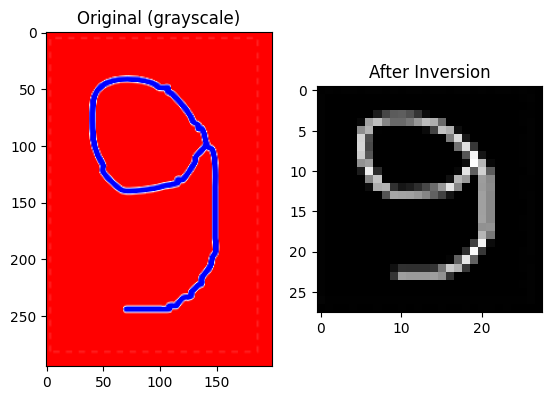

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.title("Original (grayscale)")
plt.imshow(Image.open(image_path).convert("L"), cmap="bwr")

plt.subplot(1, 2, 2)
plt.title("After Inversion")
plt.imshow(img, cmap="gray")
plt.show()

In [ ]:
model.eval()

# Move to GPU if available
device = t.device('cuda' if t.cuda.is_available() else 'cpu')
model.load_state_dict(t.load(path))
model = model.to(device)
img_tensor = img_tensor.to(device)

# Predict
with t.no_grad():
    output = model(img_tensor)
    prediction = output.argmax(dim=1, keepdim=True)

print("Predicted Digit:", prediction.item())


Predicted Digit: 7
